In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from netCDF4 import Dataset
import cdsapi

#import cdstoolbox as ct


In [3]:
panel_data = pd.read_pickle('panel_data')
data = pd.read_pickle('data')

0         1         2         3         4         5  \
ACCESS_CM2      0.375954  0.973208  0.497969  0.357068  0.355483  0.075743   
BCC_XSM2_MR    -0.601654 -0.662668 -0.236120 -0.233272 -0.753469 -0.352483   
CanESM5_CanOE   0.070961 -0.037884 -0.114808  0.024674 -0.313223  0.342073   
CNRM_CM6_1850  -0.581082 -0.416199 -0.350545 -0.439142 -0.498021 -0.356450   
KACE           -0.206761 -0.384065 -0.173415 -0.275843 -0.398944 -0.570094   
CNRM_CM6       -0.581082 -0.416199 -0.350545 -0.439142 -0.498021 -0.356450   
CESM2           0.057175 -0.042319 -0.133353  0.023327 -0.064955 -0.464965   
CNRM_ESM1       0.424696  0.248771  0.194304 -0.006229 -0.238467 -0.277502   
GFDL_ESM4      -0.363606 -0.324211  0.041495 -0.269533 -0.468456 -0.063029   
UKESM1          0.640044  0.712845  0.932074  0.806349  0.632522  0.871653   
HadGEM_GC31_LL  0.549923  0.604639  0.642588  0.375610  0.591042  0.710176   
MIROC6          0.045581  0.135325 -0.020864  0.286527  0.626435 -0.085767   
TRUE           -0.348009 -0.395596 -0.225602 -0.395580 -0.318921 -0.292743   

                       6         7         8         9  ...       154  \
ACCESS_CM2      0.457747  0.404658  0.364769  0.359265  ...  0.877988   
BCC_XSM2_MR    -0.217083 -0.243474 -0.290667 -0.375541  ...  0.771382   
CanESM5_CanOE   0.041480 -0.054697  0.089825  0.022939  ...  1.484307   
CNRM_CM6_1850  -0.638886 -0.698903 -0.715590 -0.253494  ...  0.721402   
KACE           -0.213835 -0.354035  0.150916 -0.065190  ...  1.173276   
CNRM_CM6       -0.638886 -0.698903 -0.715590 -0.253494  ...  0.721402   
CESM2           0.064814 -0.452447 -0.422981  0.120920  ...  1.224203   
CNRM_ESM1      -0.013747 -0.504865  0.339638  0.290103  ...  1.101596   
GFDL_ESM4       0.278416 -0.076807  0.196711 -0.371597  ...  0.391741   
UKESM1          0.699701  0.936906  0.815910  1.031701  ...  1.511475   
HadGEM_GC31_LL  1.019449  1.091706  0.507917  0.833559  ...  1.688518   
MIROC6         -0.032126  0.024868  0.183334  0.251997  ...  0.839724   
TRUE           -0.501344 -0.304632 -0.388180 -0.436533  ...  0.757958   

                     155       156       157       158       159       160  \
ACCESS_CM2      1.331639  0.754243  0.893143  1.070729  0.946666  1.065684   
BCC_XSM2_MR     0.562137  1.137145  0.848418  0.772349  0.733400  0.820573   
CanESM5_CanOE   1.195094  1.546099  1.464548  1.579082  1.599628  1.562484   
CNRM_CM6_1850   0.831528  1.195797  1.039085  1.164883  0.836600  0.973993   
KACE            1.244752  1.361589  1.447278  1.636726  1.334453  1.651888   
CNRM_CM6        0.831528  1.195797  1.039085  1.164883  0.836600  0.973993   
CESM2           1.257094  1.517293  1.265665  1.108791  1.507458  1.512052   
CNRM_ESM1       1.184901  0.985517  1.596023  1.009894  1.104560  0.983257   
GFDL_ESM4       0.796102  0.320017  0.413391  0.657472  0.985515  0.578576   
UKESM1          1.248112  1.406077  1.794811  1.795474  1.649651  2.046785   
HadGEM_GC31_LL  1.776143  1.970851  1.823069  1.507112  1.816843  2.161680   
MIROC6          1.089104  0.998434  1.260334  1.469412  1.159357  0.824013   
TRUE            0.879893  0.901505  0.444649  0.619857  0.925151  0.729730   

                     161       162           model  
ACCESS_CM2      1.747993  1.440901      ACCESS_CM2  
BCC_XSM2_MR     0.953064  0.918503     BCC_XSM2_MR  
CanESM5_CanOE   2.044906  2.201975   CanESM5_CanOE  
CNRM_CM6_1850   0.992446  1.250461   CNRM_CM6_1850  
KACE            1.306054  1.536155            KACE  
CNRM_CM6        0.992446  1.250461        CNRM_CM6  
CESM2           1.466749  1.689176           CESM2  
CNRM_ESM1       1.093769  1.049651       CNRM_ESM1  
GFDL_ESM4       0.767760  0.846035       GFDL_ESM4  
UKESM1          1.740632  2.113947          UKESM1  
HadGEM_GC31_LL  2.242140  1.872814  HadGEM_GC31_LL  
MIROC6          1.091642  1.361308          MIROC6  
TRUE            0.717177  0.606018            TRUE  

[13 rows x 164 columns]

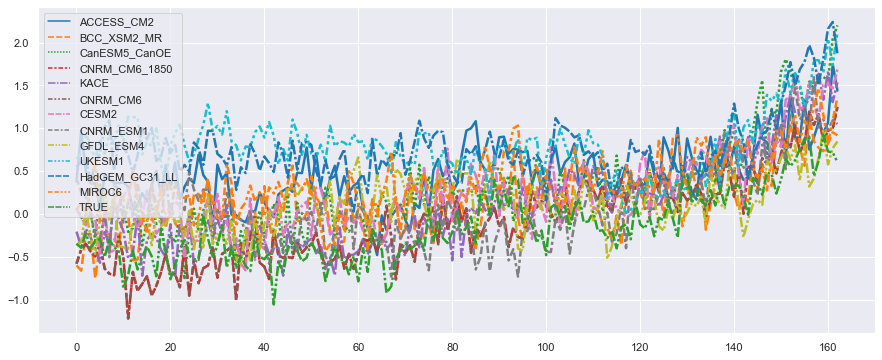

In [4]:
sns.set_theme(style="darkgrid")
f, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(data=data, palette="tab10", linewidth=2.5)
panel_data

# Matrix Completion with Nuclear norm regularization

In [196]:
import numpy as np
import numpy.ma as ma
from numpy.linalg import svd
from scipy.optimize import minimize
from numpy.linalg import matrix_rank

def getsvd(A) : return  svd(A)

all_year_pred_all = panel_data.loc[panel_data.index != 'model', :]
fifty_year_pred = all_year_pred_all.loc[:,[i for i in list(range(100, 150))]].values
mask = np.zeros((13,50))
mask[12][49] =1
all_year_pred = all_year_pred_all.loc[:,[i for i in list(range(0, 163))]].values
mask_all = np.zeros((13,163))
mask_all[12][162] = 1
five_year_avg = all_year_pred_all.loc[:,[i for i in list(range(0, 160))]].values
five_year_avg = np.average(five_year_avg.reshape(-1, 5), axis=1).reshape((13,-1))
print(five_year_avg.shape)
mask_fivey = np.zeros((13, 32))
mask_fivey[12][31]=1

(13, 32)


Method: Initialize the fixed time and unit effects assuming L is 0. Find also maximum value of lamda.
Iterate 

In [197]:
def FinalMatrix( L,  u,  v): return np.outer(u.T,np.ones(L.shape[1])) + np.outer(np.ones(L.shape[0]).T, v ) + L


In [198]:
def SVT( U, V, sing_values,  lamda):
    #performs the "shrinking"
    lamda_vec = np.ones(sing_values.size)*lamda
    new_sing = sing_values - lamda_vec
    new_sing[new_sing < 0] = 0
    smat = np.zeros((U.shape[0], V.shape[0]))
    smat[:sing_values.size, :sing_values.size] = np.diag(new_sing)
    b = np.dot(smat, V)
    Cp = np.dot(U, b)
    return Cp , new_sing

def NNM_with_uv_init( M,  mask,  u_init,  v_init,  to_estimate_u,  to_estimate_v, smoothing, l2,lambda_L,  niter = 1000,  rel_tol = 1e-5):
    #iteration 0 that calls recursively next iterations
    num_lam = lambda_L.size
    num_rows , num_cols = M.shape
    L_init = np.zeros((num_rows , num_cols))
    res = []
    for i in range(0,num_lam):
        L_init,  u_init , v_init = NNM_fit(M, mask, L_init, u_init, v_init, to_estimate_u, to_estimate_v, smoothing,lambda_L[i],l2, niter, rel_tol)
        res.append( [L_init,  u_init , v_init])
    return res[-1]

In [199]:
def update_L( M,  mask,  L,  u,  v,  lambda_L):

  # updates L in coordinate descent and saves the singular values 
    train_size = np.count_nonzero(mask)
    H = FinalMatrix(L,u,v)
    P_omega = M - H
    masked_P_omega_ = ma.masked_array(P_omega, mask=mask) 
    proj = masked_P_omega_ + L
    U , sing, V = getsvd(proj)
    #shrink operation with lamda*|O|/2
    L_upd, sing = SVT(U, V, sing, lambda_L*train_size/2)
    return L_upd, sing 

def update_unit_effects( M,  mask,  L, v):

  #update unit_effects, coordinate descent
    row, col = M.shape
    res = np.zeros(row)
    for i in range(0,row):
        b = L[i] +v -M[i] #v.T??
        h = mask[i]
        b_mask  = ma.masked_array(b, mask=h)
        l = h.size - np.count_nonzero(h)
       
        if (l>0):
            res[i]=-b_mask.sum()/l
        else:
            res[i] =0
    return res


def update_time_effects(M,  mask,  L, u, smoothing,sum_sing_vals,  lambda_L,l2):

  #  updates ttime_effects, coordinate descent 

    row, col = M.shape
    res = np.zeros(col)
    for  i in range(0,col):
        b = L[:,i]+u -M[:,i]
        h = mask[:,i]
        b_mask = ma.masked_array(b, mask=h)
        l = h.size - np.count_nonzero(h)
        if (l>0):
            res[i]=-b_mask.sum()/l
        else:
            res[i] = 0
    if smoothing:
        res = minimize(smooth_time, res, method='nelder-mead', args =(M,  mask,  L,  u,l2),
               options={'xatol': 1e-2,'fatol':1e-2, 'disp': True})
    return res

def smooth_time(v, M,  mask,  L,  u, l2):
    train_size = M.shape[0]*M.shape[1] + mask.sum()
    est_mat = FinalMatrix(L,u,np.zeros(M.shape[1]))
    for i in range(0,M.shape[0]):
         est_mat[i] += v  #v.T
    err_mat = est_mat - M;
    err_mask= ma.masked_array(err_mat, mask=mask)
    obj_val = (1/train_size) * np.sum(err_mask**2)  + l2*np.sum(v**2)
    return obj_val

def Compute_objval( M,  mask,  L,  u,  time,  sum_sing_vals,  lambda_L,l2):

  # objective value : weighted combination of error + nuclear norm
    train_size = M.shape[0]*M.shape[1] + mask.sum()
    est_mat = FinalMatrix(L,u,time)
    err_mat = est_mat - M;
    err_mask= ma.masked_array(err_mat, mask=mask)
    obj_val = (1/train_size) * np.sum(err_mask**2) + lambda_L * sum_sing_vals +  l2*np.sum(v**2)
    return obj_val


In [200]:
def initialize_uv( M,  mask,  to_estimate_u,  to_estimate_v, smoothing, l2,niter = 1000,  rel_tol = 1e-5):
  # solves finds the optimal u and v assuming that L is zero, outputs
  # the smallest value of lambda_L which causes L to be zero (all singular values vanish after a SVT update)
    new_obj_val=0
    row , col = M.shape
    u = np.zeros(row)
    v = np.zeros(col)
    L = np.zeros((row,col))
    obj_val = Compute_objval(M, mask, L, u , v,  0,0 ,l2)
    for it in range(0, niter):
        # Update u
        if(to_estimate_u == 1):
            u = update_unit_effects(M, mask, L, v)
        else:
            u =np.zeros(row)
        # Update v
        if(to_estimate_v == 1):
            res = update_time_effects(M, mask, L, u,smoothing,0,  0 ,l2)
            if smoothing:
                v= res.x
                print(v)
            else:
                v=res
        else:
            v = np.zeros(col)
        new_obj_val = Compute_objval(M, mask, L, u, v, 0,0,l2)
        rel_error = (new_obj_val-obj_val)/obj_val
        if(rel_error < rel_tol and rel_error >= 0):
            break
        obj_val = new_obj_val
    E = FinalMatrix(L, u, v);
    P_omega = M - E
    masked_P_omega = ma.masked_array(P_omega, mask=mask)
    U, s, V = getsvd(masked_P_omega)
    lambda_L_max = 2.0 * np.amax(s)/mask.sum()
    print(MSE(M,L, u, v,mask))
    return  u,v, lambda_L_max
#uin,vin,l = initialize_uv( X0,  mask,  1,  1,  niter = 1000,  rel_tol = 1e-5)
#print(uin,vin)


In [201]:
def NNM_fit( M,  mask,  L_init,  u_init,  v_init,  to_estimate_u,  to_estimate_v, smoothing,  lambda_L, l2, niter = 1000,  rel_tol = 1e-5):

  # For given matrices M, mask, and initial starting decomposition L_init, u_init, and v_init,
  # matrices L, u, and v are updated till convergence via coordinate descent.

    obj_val = 10000
    new_obj_val=0
    U, sing , V = getsvd(L_init)
    sum_sigma = sing.sum()
    obj_val = Compute_objval(M, mask, L_init, u_init, v_init, sum_sigma, lambda_L,l2)
    L = L_init
    u = u_init
    v = v_init
    num_rows , num_cols = M.shape
    term_iter = 0;
    for it in range(0,niter):
        # Update u
        if(to_estimate_u == 1):
            u = update_unit_effects(M, mask, L, v)
        else:
            u =np.zeros(num_rows)
        # Update v
        if(to_estimate_v == 1):
            res = update_time_effects(M, mask, L, u, smoothing,sing.sum(),  lambda_L,l2)
            if smoothing:
                v= res.x
            else:
                v=res
        else:
            v = np.zeros(num_cols)
        # Update L
        L, sing = update_L(M, mask, L, u, v, lambda_L)
        sum_sigma = sing.sum()
        #Check if accuracy is achieved
        new_obj_val = Compute_objval(M, mask,  L, u, v, sum_sigma, lambda_L,l2)
        rel_error = (obj_val-new_obj_val)#/obj_val
        if(new_obj_val < 1e-8):
            break
        if(rel_error < rel_tol and rel_error >= 0):
            break
        term_iter = it
        obj_val = new_obj_val
    return  L,u,v


In [202]:
def MSE(M,L,u,v, mask):
    A =  ma.masked_array(M, mask=mask)
    B = FinalMatrix(L,u,v)
    B = ma.masked_array(B, mask=mask)
    mse = ((M - B)**2).mean()
    return mse

In [209]:
def cross_val(M, mask, to_estimate_u,  to_estimate_v,smoothing, l2, niter,folds_number, ratio, error = 1e-5):
#finds the best lamda using a short of binary search
    
    folds,L_max = createfolds(M, folds_number, ratio,mask , to_estimate_u, to_estimate_v,0, l2,niter, error)

    it=1
    prev_error=1
    current_error=0
    MSE_low= np.zeros(folds_number)
    MSE_high= np.zeros(folds_number)
    MSE_med= np.zeros(folds_number)
    L_low = L_max/100
    L_high = L_max
    print(L_high)
    while (prev_error> current_error and L_high>L_low):
        print(it)
        if (it==1):
            L_prev=0
        else:
            L_prev = L_med
            prev_error = current_error
        fold =0
        L_med = (L_high-L_low)/2
        for f in folds:
            fixet_unit_effects = f.get("u")
            fixed_time_effects = f.get("v")
            mask = f.get("mask")
            M = f.get("M")
            if (it==1):
                L1,u1,v1 = NNM_with_uv_init(M,  mask, fixet_unit_effects,fixed_time_effects,  to_estimate_u,  to_estimate_v,smoothing,l2,  np.array([L_low]),  niter,  error )
                L2,u2,v2 = NNM_with_uv_init(M,  mask, fixet_unit_effects,fixed_time_effects,  to_estimate_u,  to_estimate_v, smoothing,l2, np.array([L_high]),  niter,  error )
                MSE_low[fold] = MSE(M, L1,u1,v1,mask)
                MSE_high[fold] = MSE(M, L2,u2,v2,mask)
            L, u,v = NNM_with_uv_init(M,  mask, fixet_unit_effects,fixed_time_effects,  to_estimate_u,  to_estimate_v, smoothing,l2, np.array([L_med]),  niter,  error )
            MSE_med[fold] = MSE(M,L,u,v,mask )
            fold +=1
        current_error = np.mean(MSE_med)
        if (it==1):
            prev_error = current_error +1 
            TOTAL_LOW = np.mean(MSE_low)
            #print("error low",TOTAL_LOW)
            TOTAL_HGH = np.mean(MSE_high)
            #print(TOTAL_HGH)
        if(current_error> TOTAL_LOW ):
            L_high = L_med
            TOTAL_HGH = current_error
        else:
            TOTAL_LOW = current_error
            L_low = L_med
        it+=1
        print(L_low,L_high,L_med)
        print("prev err",prev_error, "curr errr", current_error)
    return L_prev
                

In [210]:
def createfolds(M, number, ratio,mask , to_estimate_u, to_estimate_v, smoothing,l2,niter, error):
    row, col = M.shape
    folds =[]
    L_max = np.inf
    for k in range(0,number):
        ma_new=np.zeros(row*col).reshape(row,col)
        for i in range(0,row):
            for j in range(0,col):
                ma_new[i][j]=  np.random.choice(np.arange(0, 2), p=[ratio, 1-ratio])
                if (mask[i][j]==1):
                    ma_new[i][j]=0
        new_mask = mask + ma_new
        new_M = ma.masked_array(M,mask=new_mask)
        u,v,max_L = initialize_uv(new_M, new_mask, to_estimate_u, to_estimate_v,smoothing,l2, niter ,error)
        new_dict=dict({'u':u,'v':v, 'L':max_L, 'M':new_M, 'mask':new_mask})
        folds.append(new_dict)
        if(max_L<L_max):
            L_max=max_L
    return folds,max_L

In [214]:
#l = cross_val(fifty_year_pred,mask,1,1,0,1000,5,0.8,1e-5)
u,v,max_L = initialize_uv(fifty_year_pred,mask,1,1,1,0.01,1000,1e-9)


Optimization terminated successfully.
         Current function value: 0.056575
         Iterations: 3606
         Function evaluations: 4037
[-0.157518   -0.08545441 -0.0949818  -0.09910105  0.0232053  -0.14986601
 -0.07401148 -0.02988283  0.08204939  0.07387096 -0.07478674 -0.08191974
 -0.07284592 -0.18912914 -0.24929876 -0.14642402 -0.14640751 -0.15000097
 -0.06177389 -0.11250848 -0.08307581 -0.11138261 -0.0663471  -0.09257042
 -0.06769647 -0.05370598 -0.0911383  -0.08643128 -0.03450455 -0.09326155
 -0.03679578  0.00041307  0.06082644  0.08044935 -0.06686232  0.03793202
  0.07872914  0.06159073  0.16819664  0.20078488  0.19531805  0.12102848
  0.00268555  0.11641258  0.14369073  0.16440069  0.26572342  0.21793799
  0.26546819  0.31517971]
Optimization terminated successfully.
         Current function value: 0.056932
         Iterations: 3162
         Function evaluations: 3519
[-1.70559920e-01 -8.68735025e-02 -1.07155563e-01 -9.78523120e-02
  6.21901641e-03 -1.50051267e-01 -6.97622

Optimization terminated successfully.
         Current function value: 0.056604
         Iterations: 4185
         Function evaluations: 4648
[-0.16563295 -0.09139552 -0.11155031 -0.09783146 -0.0019852  -0.15176457
 -0.08337269 -0.04993139  0.07993645  0.07062671 -0.07322837 -0.08524532
 -0.0818864  -0.20106488 -0.24898248 -0.16218652 -0.15733883 -0.1458053
 -0.08011933 -0.11056409 -0.07005277 -0.11191689 -0.07881227 -0.09450294
 -0.07876109 -0.06832902 -0.09287771 -0.09744069 -0.0639431  -0.07937201
 -0.06498269 -0.04125087 -0.00245589  0.0781848  -0.08025326  0.05105643
  0.06313967  0.08874737  0.15191694  0.20515036  0.19686122  0.11958113
 -0.02511787  0.11495723  0.1349536   0.16334633  0.24743158  0.20071592
  0.24490147  0.30744977]
Optimization terminated successfully.
         Current function value: 0.056512
         Iterations: 6045
         Function evaluations: 6724
[-0.15588053 -0.10192888 -0.1145419  -0.09268058  0.00048748 -0.16408658
 -0.08655405 -0.0764436   0.041320

Optimization terminated successfully.
         Current function value: 0.057031
         Iterations: 3541
         Function evaluations: 3916
[-0.17664178 -0.0968869  -0.13565206 -0.09053832  0.00046639 -0.15631435
 -0.08729485 -0.02156176  0.09017797  0.08396789 -0.09570909 -0.09158443
 -0.09612216 -0.21130977 -0.26868273 -0.16236406 -0.15949584 -0.16163025
 -0.07505819 -0.12391667 -0.0571878  -0.09312171 -0.07039921 -0.10781255
 -0.08106575 -0.11389246 -0.10225491 -0.10710493 -0.06798489 -0.08629543
 -0.07913531 -0.00773722  0.01045566  0.07770118 -0.08341088  0.03347124
  0.09897793  0.08857285  0.1592851   0.21291721  0.18911756  0.1078183
 -0.02446495  0.12863027  0.1481322   0.1655812   0.26406879  0.21286797
  0.25845862  0.29670605]
Optimization terminated successfully.
         Current function value: 0.056925
         Iterations: 3760
         Function evaluations: 4198
[-0.16730264 -0.08687993 -0.11842096 -0.10581941 -0.00085388 -0.14924417
 -0.08758827 -0.04766215  0.034509

Optimization terminated successfully.
         Current function value: 0.056605
         Iterations: 4338
         Function evaluations: 4868
[-0.17487569 -0.10699987 -0.10132808 -0.07485613  0.00330272 -0.16086818
 -0.07310238 -0.04938507  0.05396663  0.0226372  -0.06006537 -0.07774284
 -0.08768533 -0.21023737 -0.25896168 -0.16768566 -0.15421598 -0.16456028
 -0.08636789 -0.10421943 -0.05404884 -0.10392029 -0.06667619 -0.10808072
 -0.0795943  -0.07701874 -0.09549497 -0.09154382 -0.06746835 -0.05946614
 -0.11224269 -0.05068874  0.00462316  0.07413505 -0.07714618  0.03092863
  0.0619854   0.09192765  0.15902172  0.19788745  0.18914587  0.10602668
 -0.00301455  0.12814736  0.14342109  0.14989189  0.24627875  0.21539809
  0.25610845  0.3046987 ]
Optimization terminated successfully.
         Current function value: 0.057163
         Iterations: 3312
         Function evaluations: 3739
[-0.15769472 -0.10799698 -0.117851   -0.08243055 -0.00136269 -0.17099291
 -0.08031675 -0.06917414  0.05514

Optimization terminated successfully.
         Current function value: 0.056977
         Iterations: 3961
         Function evaluations: 4474
[-0.16573434 -0.08845044 -0.12664877 -0.0900495   0.00111025 -0.17161345
 -0.08334799 -0.08111861  0.05554414  0.08594753 -0.04730286 -0.08797066
 -0.08908717 -0.20197065 -0.26122083 -0.16274142 -0.14809974 -0.15655381
 -0.08009998 -0.10534459 -0.10590639 -0.10956586 -0.10314755 -0.10878291
 -0.07958834 -0.10700683 -0.09636359 -0.10495525 -0.05348051 -0.09888226
 -0.03972969 -0.01473315  0.01563361  0.06314811 -0.09499904  0.05573321
  0.06270027  0.0967746   0.15999532  0.19971987  0.18674222  0.11981042
 -0.02255806  0.13352778  0.15369195  0.16383085  0.25593631  0.21952519
  0.25524157  0.29186753]
Optimization terminated successfully.
         Current function value: 0.056868
         Iterations: 4254
         Function evaluations: 4776
[-0.17293829 -0.08227807 -0.09907026 -0.09131092  0.00208851 -0.15006385
 -0.07408368 -0.07165215  0.06991

Optimization terminated successfully.
         Current function value: 0.056613
         Iterations: 6194
         Function evaluations: 6930
[-0.16517772 -0.0972804  -0.10771711 -0.10198025 -0.00604396 -0.15809039
 -0.07683132 -0.0418394   0.05494281  0.09079114 -0.05176817 -0.09330439
 -0.09871839 -0.21317283 -0.25854964 -0.15838566 -0.14760247 -0.15238463
 -0.07263978 -0.11537466 -0.0534608  -0.10913375 -0.08093008 -0.10821978
 -0.09213216 -0.08848608 -0.09700944 -0.10195486 -0.04939506 -0.06623228
 -0.08672639 -0.00822807  0.00813651  0.0572921  -0.09216403  0.04831036
  0.09697569  0.0643216   0.14353471  0.21451455  0.19693561  0.1110878
  0.00050591  0.11108624  0.13878506  0.16005201  0.24184093  0.20488172
  0.25495166  0.30149957]
Optimization terminated successfully.
         Current function value: 0.057065
         Iterations: 3512
         Function evaluations: 3904
[-1.69245816e-01 -9.98051274e-02 -1.24041171e-01 -1.02744988e-01
 -1.27704757e-06 -1.58904189e-01 -9.597369

Optimization terminated successfully.
         Current function value: 0.057020
         Iterations: 3385
         Function evaluations: 3753
[-0.16544105 -0.10501037 -0.11198619 -0.09039922  0.00161492 -0.17005437
 -0.08097182 -0.06322439  0.04813654  0.08447208 -0.08701998 -0.09121219
 -0.09384555 -0.21082546 -0.26676478 -0.16654243 -0.16301178 -0.15889314
 -0.08619966 -0.11762835 -0.07527264 -0.09000609 -0.08486166 -0.10708644
 -0.08844895 -0.11566354 -0.09540188 -0.10025642 -0.08085231 -0.09721307
 -0.04057374 -0.02626556  0.00619688  0.08433819 -0.09720372  0.06545291
  0.11113636  0.06376051  0.16051766  0.20513186  0.18789082  0.1214484
 -0.02265397  0.11823079  0.14334089  0.1721768   0.25612122  0.21104996
  0.26309145  0.29669007]
Optimization terminated successfully.
         Current function value: 0.056703
         Iterations: 3688
         Function evaluations: 4131
[-0.16742551 -0.1059356  -0.113572   -0.09099661  0.00205994 -0.14756137
 -0.06996494 -0.06239468  0.083666

Optimization terminated successfully.
         Current function value: 0.057082
         Iterations: 3048
         Function evaluations: 3416
[-0.1688348  -0.10698686 -0.11850501 -0.11501494 -0.00742725 -0.16244422
 -0.09598175 -0.04356022  0.06052283  0.03614691 -0.07247437 -0.09488351
 -0.09665646 -0.2199865  -0.26471689 -0.16463435 -0.16303608 -0.16558677
 -0.10247855 -0.11444585 -0.08778186 -0.09782814 -0.08488456 -0.11154508
 -0.09524513 -0.06488351 -0.10649184 -0.10593533 -0.12529827 -0.07494139
 -0.10188867 -0.02799838  0.0020132   0.09841479 -0.09891052  0.05010421
  0.04691172  0.09792681  0.15432942  0.21310886  0.19327997  0.11010907
 -0.00435052  0.11432583  0.14436529  0.16239949  0.24086021  0.20519545
  0.25759782  0.29930717]
Optimization terminated successfully.
         Current function value: 0.057192
         Iterations: 3744
         Function evaluations: 4172
[-0.16858243 -0.10641091 -0.1268381  -0.10360464 -0.00578536 -0.15127533
 -0.0876728  -0.04197162  0.11815

Optimization terminated successfully.
         Current function value: 0.056513
         Iterations: 4800
         Function evaluations: 5338
[-0.16986989 -0.09055724 -0.11785738 -0.08782867  0.00110322 -0.14676524
 -0.09149849 -0.03168637  0.0637212   0.06533748 -0.07047525 -0.07288052
 -0.07163354 -0.21152442 -0.25545185 -0.1548055  -0.15032947 -0.15465638
 -0.07162984 -0.1110394  -0.0430459  -0.09335277 -0.06183183 -0.10693983
 -0.07884361 -0.07760809 -0.07976038 -0.10658795 -0.08577514 -0.0877564
 -0.06454746 -0.03001358  0.04389109  0.07574653 -0.07856703  0.05107693
  0.06342235  0.05897919  0.15291647  0.20253816  0.19741271  0.09617944
  0.00336981  0.1189745   0.14073692  0.15485645  0.24412143  0.20094655
  0.25365266  0.29801029]
Optimization terminated successfully.
         Current function value: 0.057042
         Iterations: 3037
         Function evaluations: 3420
[-1.72274520e-01 -1.10439709e-01 -1.08299062e-01 -1.15072096e-01
  6.58001178e-05 -1.56118746e-01 -8.670713

Optimization terminated successfully.
         Current function value: 0.056767
         Iterations: 3805
         Function evaluations: 4275
[-0.16822983 -0.08741307 -0.11721166 -0.09428232  0.00064433 -0.15874594
 -0.07461815 -0.07861343  0.08903576  0.06935391 -0.04431425 -0.10128257
 -0.10223459 -0.22030368 -0.26235685 -0.1523705  -0.16057038 -0.16131449
 -0.0743255  -0.10519135 -0.07738492 -0.09474885 -0.06941466 -0.10610254
 -0.08393669 -0.09645086 -0.09555488 -0.08599784 -0.06937695 -0.07683897
 -0.05103359 -0.049857    0.00728498  0.07714298 -0.0852457   0.02183895
  0.06168267  0.07126494  0.14766693  0.20536318  0.18510299  0.13682437
 -0.00973952  0.11775386  0.15608163  0.15937738  0.25212992  0.21067324
  0.24810563  0.30078542]
Optimization terminated successfully.
         Current function value: 0.056622
         Iterations: 3947
         Function evaluations: 4436
[-1.52843606e-01 -8.44811710e-02 -1.16577414e-01 -1.00486325e-01
  6.80477980e-05 -1.57761775e-01 -6.33510

Optimization terminated successfully.
         Current function value: 0.057005
         Iterations: 3553
         Function evaluations: 3977
[-1.71572722e-01 -1.03959985e-01 -1.23757984e-01 -1.12888642e-01
  1.91933819e-04 -1.61730374e-01 -5.71657013e-02 -4.46545038e-02
  7.57320884e-02  8.53215690e-02 -8.09954238e-02 -9.93492099e-02
 -9.12956255e-02 -2.06345756e-01 -2.51710427e-01 -1.62041343e-01
 -1.58081053e-01 -1.64328099e-01 -8.99760951e-02 -1.11641867e-01
 -4.28687469e-02 -1.15861418e-01 -8.79773801e-02 -1.08000001e-01
 -9.47196603e-02 -7.84481568e-02 -9.79412952e-02 -9.87878086e-02
 -8.00538658e-02 -8.27767256e-02 -3.95831400e-02 -1.05062999e-02
  2.12315379e-04  8.59722443e-02 -7.83950341e-02  1.15189891e-01
  8.40877993e-02  9.10934940e-02  1.63721536e-01  1.97195681e-01
  2.10754716e-01  1.27566839e-01 -9.62945228e-03  1.29119796e-01
  1.59374650e-01  1.51753849e-01  2.57593782e-01  2.23573745e-01
  2.47165147e-01  3.07513493e-01]
Optimization terminated successfully.
      

Optimization terminated successfully.
         Current function value: 0.057196
         Iterations: 3471
         Function evaluations: 3892
[-0.16113806 -0.09081795 -0.12377651 -0.08372591  0.00081025 -0.16482037
 -0.08598701 -0.08252501  0.05111539  0.07490852 -0.05146032 -0.08254114
 -0.09170413 -0.2072874  -0.26716766 -0.17023987 -0.15424601 -0.1652229
 -0.09793058 -0.13116689 -0.09917044 -0.09322381 -0.10030834 -0.11412437
 -0.11100584 -0.10588324 -0.09636867 -0.10510678 -0.05123195 -0.05978346
 -0.04997243 -0.01918245  0.00818288  0.07466249 -0.09153933  0.04795116
  0.07477931  0.11686139  0.17909603  0.22464266  0.19912175  0.13003448
 -0.01386145  0.15211054  0.16856835  0.17391727  0.25238565  0.21224243
  0.26343408  0.29468873]
Optimization terminated successfully.
         Current function value: 0.056402
         Iterations: 4890
         Function evaluations: 5471
[-0.16744319 -0.08774559 -0.11375776 -0.08874502  0.00040301 -0.15216227
 -0.05196045 -0.05482335  0.030251

Optimization terminated successfully.
         Current function value: 0.056456
         Iterations: 4545
         Function evaluations: 5070
[-0.16691313 -0.09021937 -0.09049055 -0.05337107  0.00051938 -0.16612795
 -0.06906978 -0.05647768  0.05920631  0.02120455 -0.05962407 -0.08693849
 -0.0785495  -0.20099448 -0.25896807 -0.17129823 -0.16428552 -0.15707398
 -0.06882662 -0.11040714 -0.05116112 -0.09140589 -0.0831654  -0.10025759
 -0.08152957 -0.09807359 -0.07868734 -0.08609695 -0.06580443 -0.07421281
 -0.05205257 -0.05646389  0.01800685  0.04609142 -0.07899391  0.06393074
  0.03964306  0.03670489  0.16672654  0.20337911  0.18585486  0.10912631
 -0.01313968  0.11572483  0.13789773  0.16089346  0.25580107  0.21580358
  0.25602873  0.29498277]
Optimization terminated successfully.
         Current function value: 0.056948
         Iterations: 3812
         Function evaluations: 4260
[-0.16536551 -0.090874   -0.11774819 -0.11180482 -0.00064639 -0.16603397
 -0.06042457 -0.06060042  0.07059

Optimization terminated successfully.
         Current function value: 0.057106
         Iterations: 3368
         Function evaluations: 3802
[-0.17475282 -0.09370027 -0.10530054 -0.102992    0.0019334  -0.16153142
 -0.07252895 -0.0458806   0.10267417  0.07562966 -0.08776529 -0.09812864
 -0.09697567 -0.21179794 -0.2489587  -0.16038895 -0.15506216 -0.15944949
 -0.08063769 -0.12728861 -0.07835048 -0.10411812 -0.09139029 -0.11128217
 -0.08383722 -0.10772992 -0.10110654 -0.10463467 -0.07007695 -0.10100312
 -0.06795724 -0.00685929 -0.00305061  0.07378422 -0.08128141  0.0868488
  0.08698312  0.08579792  0.15647583  0.21993586  0.18926133  0.12497896
 -0.00958595  0.12780461  0.15378939  0.16277585  0.26170532  0.22277327
  0.26210029  0.30424158]
Optimization terminated successfully.
         Current function value: 0.057264
         Iterations: 3323
         Function evaluations: 3714
[-0.17167446 -0.11286854 -0.12956819 -0.10147088  0.00098868 -0.1607682
 -0.07919562 -0.0651004   0.0695274

Optimization terminated successfully.
         Current function value: 0.056928
         Iterations: 3585
         Function evaluations: 3984
[-1.78829297e-01 -9.85979488e-02 -1.24481516e-01 -9.94951256e-02
 -8.65316203e-03 -1.47041226e-01 -7.31212620e-02 -2.90893675e-02
  8.26012209e-02  6.74748713e-02 -6.36232624e-02 -8.51119444e-02
 -8.37077272e-02 -2.12423584e-01 -2.61771816e-01 -1.61017990e-01
 -1.72438819e-01 -1.56995486e-01 -8.70709933e-02 -1.16855474e-01
 -6.18664068e-02 -8.71558838e-02 -7.24821264e-02 -1.05058220e-01
 -9.97297989e-02 -1.02840139e-01 -8.24251247e-02 -1.06639444e-01
 -5.44395749e-02 -7.50373097e-02 -1.00831412e-01 -4.90558795e-02
 -2.31347257e-06  8.70365944e-02 -7.37867307e-02  5.68578436e-02
  6.10250632e-02  1.07735255e-01  1.55764112e-01  2.13846917e-01
  1.95269631e-01  1.24784374e-01 -1.67821402e-02  1.31966792e-01
  1.43251232e-01  1.57045376e-01  2.52565291e-01  2.10295869e-01
  2.55962832e-01  2.90612689e-01]
Optimization terminated successfully.
      

Optimization terminated successfully.
         Current function value: 0.057218
         Iterations: 3661
         Function evaluations: 4121
[-0.17158572 -0.13863246 -0.1205461  -0.07796319 -0.01254672 -0.16998815
 -0.07951384 -0.05933027  0.08633338  0.08090067 -0.05212007 -0.09629773
 -0.10889261 -0.2163777  -0.27100278 -0.17477272 -0.15863948 -0.16751083
 -0.09291505 -0.10893121 -0.07044065 -0.10982496 -0.09771271 -0.11729253
 -0.1020626  -0.09263917 -0.11808407 -0.10462565 -0.04713926 -0.09827165
 -0.07633764 -0.0322318  -0.00087173  0.08965285 -0.10338971  0.07469055
  0.07179251  0.1018666   0.15448805  0.19793207  0.19925679  0.11647786
  0.00336031  0.12646612  0.15228244  0.16489112  0.24804426  0.21400222
  0.2510005   0.29965551]
Optimization terminated successfully.
         Current function value: 0.056763
         Iterations: 3241
         Function evaluations: 3643
[-0.16619806 -0.0851552  -0.1175839  -0.09443334 -0.00760159 -0.15967674
 -0.0748895  -0.09615029  0.08170

Optimization terminated successfully.
         Current function value: 0.056948
         Iterations: 3677
         Function evaluations: 4108
[-0.17427116 -0.09206882 -0.12983918 -0.08859399 -0.00150449 -0.16455761
 -0.06892253 -0.07881968  0.07499334  0.08443447 -0.05073183 -0.08177061
 -0.09314941 -0.20842582 -0.2604536  -0.1615272  -0.1597833  -0.16442391
 -0.0792318  -0.12480639 -0.11313017 -0.10794515 -0.08112338 -0.11067057
 -0.09149524 -0.10091158 -0.09259033 -0.10521062 -0.07047326 -0.08731472
 -0.03168754 -0.02079246  0.01492047  0.08155463 -0.07945831  0.05663948
  0.05339181  0.09922843  0.15163569  0.20261779  0.18321914  0.11564798
 -0.00726607  0.11623145  0.15046072  0.16791528  0.24864876  0.20959217
  0.2609929   0.29709273]
Optimization terminated successfully.
         Current function value: 0.057067
         Iterations: 4258
         Function evaluations: 4749
[-0.16858298 -0.08539361 -0.11248886 -0.08956763  0.00095132 -0.16273413
 -0.08081343 -0.09336056  0.05289

Optimization terminated successfully.
         Current function value: 0.056723
         Iterations: 3404
         Function evaluations: 3788
[-0.16946226 -0.09656863 -0.13656362 -0.10321179 -0.00109245 -0.15572802
 -0.08088109 -0.04825138  0.06773863  0.08169543 -0.05945284 -0.08510372
 -0.09661027 -0.20173696 -0.26586899 -0.15289449 -0.15863873 -0.14593777
 -0.08608972 -0.12229591 -0.07332056 -0.12012171 -0.10043831 -0.09754466
 -0.08985344 -0.07128503 -0.08901631 -0.08917163 -0.07766107 -0.07764098
 -0.06485051 -0.0307614  -0.00083276  0.06977995 -0.08737308  0.03488718
  0.05183893  0.09906622  0.15722198  0.20273314  0.19350244  0.12344622
 -0.03344426  0.1016578   0.13296773  0.15099104  0.25257198  0.20492591
  0.24682325  0.29924006]
Optimization terminated successfully.
         Current function value: 0.056702
         Iterations: 4210
         Function evaluations: 4699
[-0.16318814 -0.0869062  -0.11149589 -0.09856336 -0.0152531  -0.15343934
 -0.07078159 -0.08849452  0.01776

Optimization terminated successfully.
         Current function value: 0.056954
         Iterations: 3486
         Function evaluations: 3891
[-0.16237435 -0.1096687  -0.12054754 -0.10910447  0.00038078 -0.16663517
 -0.07367565 -0.06413794  0.07163954  0.07932002 -0.07295797 -0.07902696
 -0.11063491 -0.2114921  -0.24843568 -0.17266796 -0.15313141 -0.16899119
 -0.09306603 -0.11254475 -0.06225104 -0.09678942 -0.08396275 -0.10120023
 -0.09398252 -0.08417481 -0.0987521  -0.09941095 -0.10671638 -0.08736078
 -0.06313395 -0.00914339 -0.00194207  0.06822915 -0.09858841  0.08962322
  0.0775303   0.08134778  0.15421094  0.20546818  0.19211531  0.12160764
 -0.00891472  0.11641929  0.15406616  0.16707     0.24642128  0.21131574
  0.25044915  0.30741735]
Optimization terminated successfully.
         Current function value: 0.057067
         Iterations: 3450
         Function evaluations: 3854
[-0.16862539 -0.10545953 -0.11538951 -0.08460746  0.00122222 -0.16244956
 -0.08059338 -0.05260733  0.08246

Optimization terminated successfully.
         Current function value: 0.056811
         Iterations: 3682
         Function evaluations: 4124
[-0.1665967  -0.09637707 -0.10601365 -0.1043047   0.00137441 -0.14508604
 -0.08158245 -0.08293021  0.06752952  0.04192379 -0.05358157 -0.09306708
 -0.09803961 -0.2091744  -0.25799522 -0.16523549 -0.14663846 -0.1575807
 -0.07896091 -0.12039634 -0.04508122 -0.10014427 -0.07108301 -0.11033451
 -0.08585328 -0.08140945 -0.08631728 -0.10849147 -0.07760863 -0.0900462
 -0.04863783  0.01034949  0.02822581  0.09476675 -0.09364747  0.08439261
  0.10265772  0.09795593  0.16026962  0.21189888  0.19923229  0.11932176
 -0.01214076  0.10110548  0.15439946  0.15764447  0.2549214   0.20480883
  0.24877016  0.30412414]
Optimization terminated successfully.
         Current function value: 0.056787
         Iterations: 4134
         Function evaluations: 4578
[-0.16637734 -0.11013037 -0.11100105 -0.10404971  0.00128893 -0.16467681
 -0.07929424 -0.04481948  0.0484530

Optimization terminated successfully.
         Current function value: 0.056729
         Iterations: 3408
         Function evaluations: 3818
[-0.16921378 -0.09479881 -0.11318413 -0.09898235 -0.00175285 -0.16073072
 -0.07654254 -0.04783913  0.06615234  0.07924479 -0.07731281 -0.08918282
 -0.0939942  -0.20835052 -0.25308405 -0.16579219 -0.1540739  -0.14717138
 -0.07107511 -0.11704495 -0.07344794 -0.10853537 -0.08513394 -0.09886229
 -0.0824977  -0.08803363 -0.09143401 -0.08974151 -0.08272513 -0.07461054
 -0.06756667 -0.03440373 -0.00254576  0.08320855 -0.08547218  0.05701798
  0.06664592  0.10731802  0.14957847  0.20315355  0.18457731  0.12339787
 -0.02310383  0.11407083  0.14154621  0.1547507   0.24725363  0.20447996
  0.25138398  0.30206734]
Optimization terminated successfully.
         Current function value: 0.056860
         Iterations: 3660
         Function evaluations: 4104
[-0.15747914 -0.08159556 -0.12416716 -0.11344339  0.00030471 -0.16561201
 -0.07422063 -0.07032566  0.08690

Optimization terminated successfully.
         Current function value: 0.057132
         Iterations: 3421
         Function evaluations: 3861
[-1.64858920e-01 -1.10431591e-01 -1.12360793e-01 -9.92927399e-02
  2.00085159e-04 -1.56232271e-01 -9.47953512e-02 -8.16244085e-02
  4.25517911e-02  5.66066516e-02 -7.02448428e-02 -1.01569420e-01
 -1.03735948e-01 -2.13283326e-01 -2.61030918e-01 -1.66949641e-01
 -1.75634883e-01 -1.60855374e-01 -8.99442160e-02 -1.19993594e-01
 -1.22101196e-01 -1.11604467e-01 -7.19500543e-02 -1.00674734e-01
 -8.04252199e-02 -7.47572909e-02 -9.43086363e-02 -1.04451072e-01
 -7.78147632e-02 -9.67045459e-02 -6.75535716e-02 -6.82355374e-03
  3.44499219e-03  1.01458278e-01 -9.99155057e-02  5.28564134e-02
  9.29870453e-02  7.72992016e-02  1.59939891e-01  2.10835286e-01
  1.92223221e-01  1.32651393e-01 -1.71621944e-02  1.23827609e-01
  1.53454052e-01  1.61624696e-01  2.49346496e-01  2.17044070e-01
  2.62932624e-01  3.00425884e-01]
Optimization terminated successfully.
      

Optimization terminated successfully.
         Current function value: 0.056993
         Iterations: 3655
         Function evaluations: 4071
[-0.16689468 -0.09466446 -0.10955781 -0.09416501  0.00124674 -0.15881074
 -0.12349814 -0.04489395  0.05329807  0.07916888 -0.08934667 -0.07544302
 -0.08901461 -0.20968689 -0.25419516 -0.16365095 -0.15796614 -0.15465557
 -0.09393314 -0.11677934 -0.04790889 -0.10829068 -0.07471795 -0.10808829
 -0.10309437 -0.08733836 -0.09202592 -0.09962276 -0.09081791 -0.09955389
 -0.07294404 -0.01290668  0.01621971  0.08119426 -0.09444979  0.06959614
  0.07611662  0.07966215  0.17290403  0.22280812  0.20088516  0.11642365
  0.00476755  0.12744798  0.14562888  0.1554932   0.25361676  0.21840304
  0.25248039  0.30148955]
Optimization terminated successfully.
         Current function value: 0.056864
         Iterations: 3879
         Function evaluations: 4345
[-1.62001406e-01 -1.11455496e-01 -1.06348180e-01 -9.86030334e-02
  5.46139623e-05 -1.52944664e-01 -6.70847

Optimization terminated successfully.
         Current function value: 0.056425
         Iterations: 4678
         Function evaluations: 5240
[-0.17020797 -0.0916479  -0.11210085 -0.09110589 -0.00317594 -0.14594109
 -0.05579033 -0.05217692  0.04124005  0.06954583 -0.062736   -0.06233725
 -0.0881109  -0.20602474 -0.2549985  -0.15685774 -0.15213226 -0.156968
 -0.06243504 -0.10753554 -0.0656868  -0.10023232 -0.06101265 -0.09254263
 -0.09134829 -0.07768075 -0.0727375  -0.08447633 -0.08180913 -0.08042069
 -0.04250225 -0.02647459  0.00579006  0.08738862 -0.07992903  0.04225318
  0.06928964  0.04547535  0.1487786   0.20389436  0.18512899  0.11156418
 -0.04855794  0.11494609  0.13468267  0.14291425  0.25220868  0.20530003
  0.24850113  0.3023503 ]
Optimization terminated successfully.
         Current function value: 0.056916
         Iterations: 4434
         Function evaluations: 4943
[-0.15388383 -0.11667193 -0.11872694 -0.10669623  0.00041989 -0.15360008
 -0.09587705 -0.08152319  0.0664293

Optimization terminated successfully.
         Current function value: 0.057061
         Iterations: 3105
         Function evaluations: 3481
[-0.15376672 -0.11329983 -0.12569246 -0.11712626  0.00187966 -0.15833306
 -0.07524941 -0.05079231  0.09479017  0.07766212 -0.1055224  -0.09544104
 -0.10025429 -0.21505994 -0.24216421 -0.17308647 -0.15582863 -0.15669816
 -0.09094672 -0.11578865 -0.06058895 -0.11414991 -0.10557203 -0.11143029
 -0.09166401 -0.09812507 -0.10137922 -0.10060393 -0.06932089 -0.08876151
 -0.05363423 -0.00790832  0.00607343  0.06948572 -0.07469298  0.08290602
  0.0632491   0.0814271   0.15506774  0.21590231  0.19650858  0.1251065
 -0.01128691  0.12555075  0.14336036  0.16550756  0.26193362  0.21477296
  0.24949295  0.30791685]
Optimization terminated successfully.
         Current function value: 0.057262
         Iterations: 3344
         Function evaluations: 3767
[-1.70365171e-01 -1.26890879e-01 -1.34497786e-01 -9.16914187e-02
  2.58252564e-04 -1.63214065e-01 -7.215642

Optimization terminated successfully.
         Current function value: 0.056993
         Iterations: 4655
         Function evaluations: 5243
[-1.68218384e-01 -9.95291070e-02 -1.13557681e-01 -1.11333084e-01
 -1.21337575e-05 -1.59139585e-01 -8.75634901e-02 -4.33820506e-02
  1.13842244e-01  6.45576550e-02 -6.62048631e-02 -7.99824374e-02
 -9.97744288e-02 -2.13913954e-01 -2.52735336e-01 -1.52505342e-01
 -1.63724031e-01 -1.71451311e-01 -7.12826015e-02 -1.19434278e-01
 -2.97489901e-02 -1.23670795e-01 -7.29748846e-02 -1.25435674e-01
 -8.28718271e-02 -9.36854552e-02 -9.77697156e-02 -1.17229709e-01
 -1.01936129e-01 -7.33803671e-02 -6.86410556e-02 -1.66696133e-02
 -2.04018189e-03  7.26758158e-02 -1.03525203e-01  5.98826273e-02
  8.94805950e-02  6.72390236e-02  1.49865105e-01  2.14244188e-01
  1.84621672e-01  1.18057275e-01 -2.25863267e-02  1.09642087e-01
  1.42610455e-01  1.77829647e-01  2.47091795e-01  2.17065577e-01
  2.57298157e-01  3.09984667e-01]
Optimization terminated successfully.
      

Optimization terminated successfully.
         Current function value: 0.056977
         Iterations: 3961
         Function evaluations: 4474
[-0.16572886 -0.08844891 -0.12664906 -0.09004778  0.00111095 -0.17161733
 -0.083344   -0.08112232  0.0555439   0.08594685 -0.04730024 -0.08797445
 -0.08908288 -0.20197416 -0.26122489 -0.16274539 -0.14810396 -0.1565529
 -0.08009676 -0.10534201 -0.10590913 -0.10956249 -0.10314969 -0.10877873
 -0.07958633 -0.10700768 -0.09636204 -0.1049544  -0.05348202 -0.09888301
 -0.03973181 -0.01473428  0.01563155  0.06314568 -0.09499908  0.05573159
  0.06270147  0.09677394  0.15999369  0.19971518  0.18674475  0.11980864
 -0.02255962  0.13353078  0.15368895  0.16382831  0.25594148  0.21952778
  0.25523948  0.29187327]
Optimization terminated successfully.
         Current function value: 0.056860
         Iterations: 4305
         Function evaluations: 4829
[-0.16917568 -0.08306238 -0.10273767 -0.09254172  0.0021857  -0.14786067
 -0.072874   -0.07166867  0.070274

Optimization terminated successfully.
         Current function value: 0.056520
         Iterations: 4304
         Function evaluations: 4800
[-0.17152769 -0.08598193 -0.11769095 -0.08998809  0.00043104 -0.15641215
 -0.05411247 -0.07367534  0.06013776  0.0245641  -0.0616632  -0.06715146
 -0.09232659 -0.20664928 -0.26187703 -0.16912032 -0.13889278 -0.15552801
 -0.06162103 -0.11391317 -0.09516259 -0.10701433 -0.1045407  -0.09364387
 -0.07676292 -0.06668758 -0.09589267 -0.10405203 -0.0338656  -0.06702803
 -0.05244871 -0.03794544  0.03292631  0.05134654 -0.09022929  0.06800746
  0.05134188  0.07016118  0.16674443  0.2003608   0.20212158  0.10252764
 -0.02876121  0.09974625  0.14204851  0.14736419  0.24187702  0.20942292
  0.25251793  0.30452243]
Optimization terminated successfully.
         Current function value: 0.057243
         Iterations: 3044
         Function evaluations: 3429
[-1.65081617e-01 -1.06977586e-01 -1.55625317e-01 -9.31768258e-02
 -5.25464158e-05 -1.68137275e-01 -7.26458

Optimization terminated successfully.
         Current function value: 0.056799
         Iterations: 3697
         Function evaluations: 4138
[-0.16674517 -0.09094947 -0.11653857 -0.10667337 -0.00123932 -0.15732338
 -0.07434318 -0.0682183   0.06581972  0.04807768 -0.07078574 -0.07047025
 -0.07965504 -0.21656093 -0.25473753 -0.16850322 -0.16078461 -0.1629743
 -0.06130888 -0.11448284 -0.10402082 -0.10376939 -0.08850558 -0.10160253
 -0.07168592 -0.08380431 -0.06410163 -0.08695701 -0.09167695 -0.07510589
 -0.05650976 -0.00641594  0.00827493  0.08463445 -0.08253844  0.07937324
  0.09061445  0.08121813  0.16909806  0.20797375  0.19368392  0.11532755
 -0.02083295  0.12093533  0.13886378  0.15627763  0.25172878  0.21528162
  0.25115255  0.30789932]
Optimization terminated successfully.
         Current function value: 0.056628
         Iterations: 4117
         Function evaluations: 4593
[-0.16738767 -0.09191098 -0.12655694 -0.09392309  0.00089801 -0.15356119
 -0.08592179 -0.08809394  0.075196

Optimization terminated successfully.
         Current function value: 0.057107
         Iterations: 2816
         Function evaluations: 3151
[-0.16821979 -0.09808751 -0.11450213 -0.10807943 -0.0003094  -0.16328536
 -0.08295433 -0.03461953  0.06560645  0.03533363 -0.09145712 -0.07639294
 -0.10182137 -0.21302731 -0.25613124 -0.16920037 -0.15702058 -0.15621302
 -0.08670759 -0.09762013 -0.10062661 -0.11637493 -0.07930392 -0.12021783
 -0.07459167 -0.0730513  -0.08588557 -0.08376882 -0.09678751 -0.07943297
 -0.07417882 -0.00877499  0.01412718  0.10080442 -0.1001186   0.07679864
  0.11869936  0.09753355  0.15176771  0.21312818  0.20438719  0.12949816
 -0.01007319  0.11607529  0.15717959  0.16671013  0.25503482  0.22465933
  0.25759415  0.30329377]
Optimization terminated successfully.
         Current function value: 0.057182
         Iterations: 3054
         Function evaluations: 3413
[-1.66449417e-01 -1.02752895e-01 -1.27133846e-01 -1.04347625e-01
 -1.65852554e-04 -1.56139808e-01 -1.12253

Optimization terminated successfully.
         Current function value: 0.057176
         Iterations: 3260
         Function evaluations: 3643
[-1.61524924e-01 -9.93426190e-02 -1.27516440e-01 -1.05223251e-01
  2.51169509e-05 -1.67522377e-01 -8.90775380e-02 -2.07658575e-02
  9.01694675e-02  7.57275956e-02 -8.27232726e-02 -9.84236987e-02
 -9.21931858e-02 -2.09990903e-01 -2.52855681e-01 -1.65664289e-01
 -1.59361497e-01 -1.62739674e-01 -6.46660970e-02 -1.17808342e-01
 -6.91908989e-02 -1.08335040e-01 -1.03495272e-01 -1.13365300e-01
 -9.70584371e-02 -1.02028725e-01 -1.05873417e-01 -9.93203715e-02
 -6.48359885e-02 -9.90475826e-02 -8.40114961e-02 -1.05543275e-02
  4.14025900e-03  8.95134920e-02 -9.08836078e-02  7.97950884e-02
  9.43631233e-02  1.02996401e-01  1.56949685e-01  2.15292525e-01
  1.94833795e-01  1.21833021e-01 -1.15681932e-02  1.31493043e-01
  1.58380806e-01  1.58018548e-01  2.50725737e-01  2.21454932e-01
  2.59569210e-01  3.05453482e-01]
Optimization terminated successfully.
      

Optimization terminated successfully.
         Current function value: 0.056508
         Iterations: 4902
         Function evaluations: 5463
[-0.17693138 -0.086855   -0.10982717 -0.10070824 -0.04192909 -0.1587237
 -0.0463672  -0.07636807  0.0593864   0.03514804 -0.07424873 -0.08801787
 -0.09416634 -0.20907343 -0.2533012  -0.1704566  -0.15060646 -0.15657218
 -0.06123348 -0.10722482 -0.06270604 -0.09590255 -0.07368637 -0.10335289
 -0.08389503 -0.05923938 -0.0855628  -0.10973018 -0.09161316 -0.07489361
 -0.08688168 -0.00584071 -0.00033005  0.05437158 -0.08078101  0.04475792
  0.05266579  0.06757988  0.15515744  0.19605832  0.18562996  0.09893163
 -0.01225992  0.09011905  0.13434655  0.14146353  0.24451769  0.20623145
  0.24846572  0.31124297]
Optimization terminated successfully.
         Current function value: 0.056832
         Iterations: 4158
         Function evaluations: 4643
[-0.17281893 -0.09649582 -0.11835761 -0.10396973 -0.0185707  -0.16031383
 -0.08579046 -0.06977512  0.106693

Optimization terminated successfully.
         Current function value: 0.056893
         Iterations: 3549
         Function evaluations: 3981
[-1.73244690e-01 -9.68382414e-02 -1.06716322e-01 -1.06359586e-01
 -4.20671030e-06 -1.52515920e-01 -7.40390818e-02 -4.46353022e-02
  7.34939500e-02  1.06776925e-01 -7.76447445e-02 -8.75832112e-02
 -9.06565837e-02 -2.07917247e-01 -2.52028712e-01 -1.58590913e-01
 -1.58352004e-01 -1.42260605e-01 -9.15725954e-02 -1.19949947e-01
 -6.53726357e-02 -1.21594443e-01 -8.68054227e-02 -1.13188545e-01
 -1.00882618e-01 -9.18470567e-02 -9.27990072e-02 -1.07334904e-01
 -6.98378287e-02 -7.14202061e-02 -6.97225621e-02 -7.17453860e-03
  1.21875109e-03  6.29404143e-02 -9.99821005e-02  5.56199581e-02
  7.97903747e-02  7.31721349e-02  1.61771301e-01  2.16401794e-01
  1.87055978e-01  1.16978012e-01 -3.36988628e-02  1.29113919e-01
  1.51816852e-01  1.43738707e-01  2.58509528e-01  2.11256181e-01
  2.46501514e-01  3.04899653e-01]
Optimization terminated successfully.
      

Optimization terminated successfully.
         Current function value: 0.056935
         Iterations: 3904
         Function evaluations: 4376
[-1.69566554e-01 -9.47480847e-02 -1.28828259e-01 -9.87914968e-02
  1.23269476e-04 -1.61954491e-01 -8.33043028e-02 -3.49703066e-02
  6.26468705e-02  9.00731220e-02 -5.73721505e-02 -8.92092388e-02
 -9.39483708e-02 -2.05434760e-01 -2.63231229e-01 -1.53789198e-01
 -1.58763410e-01 -1.66312927e-01 -7.73350683e-02 -1.21085168e-01
 -4.32764941e-02 -1.11704305e-01 -5.58913059e-02 -1.04195789e-01
 -1.09043984e-01 -9.10128244e-02 -9.11643969e-02 -1.13109877e-01
 -1.05899996e-01 -8.04247806e-02 -4.59739539e-02 -2.57668301e-02
 -1.60422181e-03  9.78502232e-02 -9.62039211e-02  8.75840388e-02
  8.17714292e-02  9.02663578e-02  1.66303357e-01  2.12171161e-01
  1.96102329e-01  1.21650430e-01 -1.47482587e-02  9.97511799e-02
  1.47345986e-01  1.59281489e-01  2.54340909e-01  2.22685190e-01
  2.49555814e-01  3.04513013e-01]
Optimization terminated successfully.
      

Optimization terminated successfully.
         Current function value: 0.056756
         Iterations: 4280
         Function evaluations: 4790
[-0.17050116 -0.09887266 -0.11222625 -0.09906717 -0.00194298 -0.15676841
 -0.05797141 -0.05883495  0.07237693  0.03243462 -0.05099101 -0.07340932
 -0.06705345 -0.20707688 -0.26040738 -0.17102791 -0.14444324 -0.15495537
 -0.08379407 -0.12418655 -0.09811006 -0.10253234 -0.06781085 -0.09843559
 -0.08130916 -0.07727088 -0.06330849 -0.08390741 -0.09731988 -0.08259223
 -0.0734847  -0.0145814   0.00709084  0.0888533  -0.09047873  0.07349695
  0.09932788  0.06680279  0.15096233  0.20653106  0.19733376  0.11707328
 -0.01899793  0.11869235  0.14961189  0.15879867  0.24605207  0.20866268
  0.2583357   0.30083594]
Optimization terminated successfully.
         Current function value: 0.057013
         Iterations: 3900
         Function evaluations: 4352
[-1.75862212e-01 -9.44755023e-02 -1.22290685e-01 -1.00771852e-01
 -2.99687209e-04 -1.58298657e-01 -8.19163

Optimization terminated successfully.
         Current function value: 0.056530
         Iterations: 5439
         Function evaluations: 6071
[-0.16661228 -0.07826    -0.11449551 -0.11642285 -0.00263097 -0.14723888
 -0.06674362 -0.06741983  0.05207717  0.06345755 -0.08035205 -0.08271628
 -0.07832331 -0.20828878 -0.25699311 -0.16719614 -0.16583618 -0.16617626
 -0.06112168 -0.1247519  -0.08859789 -0.09611564 -0.05934636 -0.09987775
 -0.10183931 -0.07941985 -0.10267995 -0.09576727 -0.05343277 -0.07540523
 -0.04406006 -0.01972737  0.01067243  0.04019902 -0.08761606  0.05570216
  0.07921274  0.07315176  0.15303444  0.18992888  0.189869    0.10831942
 -0.02894907  0.10316699  0.14490506  0.1504686   0.23881361  0.19745693
  0.24875571  0.30161364]
Optimization terminated successfully.
         Current function value: 0.056540
         Iterations: 3900
         Function evaluations: 4360
[-0.17065719 -0.09106323 -0.11129817 -0.09960326  0.004718   -0.15709812
 -0.0766255  -0.05810156  0.08150

Optimization terminated successfully.
         Current function value: 0.057162
         Iterations: 2846
         Function evaluations: 3195
[-0.17004671 -0.0897503  -0.12976583 -0.09311088  0.00139693 -0.14327978
 -0.10535683 -0.02732409  0.07599763  0.03445463 -0.07319661 -0.09016072
 -0.10081814 -0.20430426 -0.26363045 -0.1739897  -0.17621683 -0.1554172
 -0.09956476 -0.123314   -0.06153727 -0.10157955 -0.10523095 -0.11719302
 -0.10754956 -0.08475304 -0.08989315 -0.10208518 -0.1107703  -0.08977256
 -0.04663665 -0.01187389  0.01590014  0.10398439 -0.10972283  0.0912728
  0.08700273  0.08530611  0.14952112  0.21297325  0.20082602  0.13172952
 -0.00761081  0.11450464  0.15433316  0.16879496  0.25432187  0.21796733
  0.26369175  0.30190815]
Optimization terminated successfully.
         Current function value: 0.057080
         Iterations: 3607
         Function evaluations: 4040
[-1.66817044e-01 -9.08774536e-02 -1.22045759e-01 -9.17838449e-02
 -4.95513829e-05 -1.65106324e-01 -8.7462525

Optimization terminated successfully.
         Current function value: 0.057062
         Iterations: 3400
         Function evaluations: 3809
[-0.16157778 -0.10355566 -0.1135786  -0.09713962  0.00055832 -0.14852097
 -0.0839967  -0.08142262  0.08411743  0.06956242 -0.07721288 -0.08213548
 -0.10060315 -0.2147509  -0.26501323 -0.16381319 -0.15280502 -0.15448048
 -0.0613797  -0.12900123 -0.06523393 -0.10924605 -0.08939494 -0.12791351
 -0.10884971 -0.09457297 -0.09035305 -0.09746747 -0.08489989 -0.10288933
 -0.05934161  0.00647406  0.01792512  0.05953771 -0.10542721  0.0766366
  0.07034008  0.09696695  0.16715513  0.21902462  0.19644501  0.13207465
  0.00139684  0.11174553  0.14498741  0.14850925  0.25267892  0.23031001
  0.26279723  0.30589402]
Optimization terminated successfully.
         Current function value: 0.057073
         Iterations: 2807
         Function evaluations: 3134
[-0.17000849 -0.10026836 -0.13034564 -0.09372591 -0.0005355  -0.16436768
 -0.06089232 -0.03577382  0.074662

Optimization terminated successfully.
         Current function value: 0.056852
         Iterations: 3467
         Function evaluations: 3912
[-1.69668977e-01 -1.01434331e-01 -1.10201302e-01 -1.00881207e-01
  3.74019372e-05 -1.47834775e-01 -7.91346890e-02 -5.04992374e-02
  7.71319540e-02  8.42944379e-02 -9.22607911e-02 -9.36439923e-02
 -8.99640391e-02 -2.07973610e-01 -2.57475336e-01 -1.66161729e-01
 -1.51249646e-01 -1.59617526e-01 -9.56086247e-02 -1.15676759e-01
 -9.37484705e-02 -1.10198709e-01 -8.49456275e-02 -1.03388726e-01
 -1.00324423e-01 -6.85935549e-02 -9.63799238e-02 -1.12918635e-01
 -7.05598301e-02 -7.60602665e-02 -2.67534798e-02 -8.39797746e-04
  2.70022292e-03  8.38779332e-02 -9.08473140e-02  5.81871659e-02
  8.55937465e-02  4.85735501e-02  1.55004571e-01  2.07856775e-01
  1.96121341e-01  1.10046470e-01 -4.13205473e-02  1.06308792e-01
  1.48966294e-01  1.62788806e-01  2.42899141e-01  2.10527076e-01
  2.57046749e-01  3.02095974e-01]
Optimization terminated successfully.
      

Optimization terminated successfully.
         Current function value: 0.057035
         Iterations: 3553
         Function evaluations: 3975
[-0.18919434 -0.09788866 -0.09739174 -0.09843777 -0.01110147 -0.15248054
 -0.07488561  0.01309343  0.06518816  0.08619488 -0.07376201 -0.10232556
 -0.10976013 -0.21384034 -0.26496067 -0.1586785  -0.15783117 -0.16526532
 -0.08765393 -0.11945321 -0.08431762 -0.11012311 -0.08588078 -0.11569962
 -0.08017397 -0.08513311 -0.10214372 -0.10508851 -0.08564646 -0.09954431
 -0.07933821 -0.04017402 -0.00101574  0.06237479 -0.09972363  0.04817432
  0.10502306  0.09701681  0.17438758  0.20386919  0.19009888  0.11274979
 -0.01801584  0.12150648  0.13839106  0.15363363  0.24547363  0.21179386
  0.25303844  0.2992783 ]
Optimization terminated successfully.
         Current function value: 0.057026
         Iterations: 3556
         Function evaluations: 3985
[-0.17539811 -0.09688366 -0.11806403 -0.10474465  0.00157732 -0.16434901
 -0.09371664 -0.06703989  0.05465

Optimization terminated successfully.
         Current function value: 0.057158
         Iterations: 2883
         Function evaluations: 3239
[-0.17337603 -0.09731079 -0.12855006 -0.09506011 -0.00089714 -0.17106138
 -0.08656067 -0.10031494  0.06851133  0.06752898 -0.07504202 -0.10071859
 -0.1041486  -0.20171682 -0.2640153  -0.17782407 -0.15888012 -0.16720566
 -0.08604664 -0.13181702 -0.09375825 -0.11301819 -0.0972948  -0.11225365
 -0.09460188 -0.09525654 -0.09895044 -0.10500818 -0.10278415 -0.09214878
 -0.03631698 -0.01565152  0.0108518   0.05703377 -0.08542129  0.0594005
  0.05968748  0.10115424  0.16589458  0.20680042  0.20137331  0.1173132
 -0.0024843   0.12285839  0.14864243  0.15902466  0.25860394  0.20088679
  0.26071482  0.29875434]
Optimization terminated successfully.
         Current function value: 0.057191
         Iterations: 3140
         Function evaluations: 3518
[-0.17679215 -0.09013243 -0.12454183 -0.09122496 -0.01357716 -0.15732682
 -0.10304302 -0.09088302  0.0675171

Optimization terminated successfully.
         Current function value: 0.056913
         Iterations: 3645
         Function evaluations: 4078
[-0.16325629 -0.10128075 -0.11011861 -0.08121119  0.00202046 -0.15723414
 -0.07639623 -0.10221747  0.0487352   0.0738873  -0.0793962  -0.09729702
 -0.11626494 -0.20948434 -0.26221399 -0.16722255 -0.16377177 -0.15326866
 -0.06926272 -0.11986991 -0.0542627  -0.10186284 -0.08147665 -0.10532974
 -0.09525451 -0.08236088 -0.09037222 -0.11329199 -0.09104483 -0.08793479
 -0.06047857  0.00973088  0.02526879  0.04544396 -0.08888888  0.06016758
  0.07162468  0.08117739  0.17355214  0.21026152  0.2037077   0.12618205
  0.01176033  0.12804516  0.14499804  0.15210595  0.24373155  0.21985004
  0.25218865  0.30417963]
Optimization terminated successfully.
         Current function value: 0.056966
         Iterations: 4171
         Function evaluations: 4654
[-0.17178709 -0.08274131 -0.11553379 -0.11937658  0.00046552 -0.16137635
 -0.07800747 -0.05787687  0.11017

Optimization terminated successfully.
         Current function value: 0.056919
         Iterations: 3605
         Function evaluations: 4043
[-0.1671395  -0.08454682 -0.10443272 -0.09496593 -0.00740585 -0.16736101
 -0.09803689 -0.0608325   0.05000207  0.04081483 -0.06921816 -0.08800692
 -0.1024531  -0.21576921 -0.27178659 -0.1527919  -0.15747575 -0.15938497
 -0.09568925 -0.11642799 -0.0994997  -0.08587132 -0.08813576 -0.11192036
 -0.08913396 -0.08399006 -0.10656822 -0.09275896 -0.0861627  -0.09667606
 -0.09153427 -0.02480939  0.00093149  0.0694798  -0.07218322  0.06821521
  0.07428855  0.10232143  0.15582516  0.20656239  0.18880893  0.10540187
 -0.01762718  0.11729706  0.15172894  0.16123827  0.24781991  0.21251777
  0.25060278  0.29962788]
Optimization terminated successfully.
         Current function value: 0.057019
         Iterations: 4065
         Function evaluations: 4547
[-0.17402851 -0.08406179 -0.11001903 -0.08023522 -0.01337264 -0.1588403
 -0.08420946 -0.05149789  0.070603

Optimization terminated successfully.
         Current function value: 0.057037
         Iterations: 3223
         Function evaluations: 3578
[-1.68755464e-01 -9.90232587e-02 -1.32449477e-01 -1.06268073e-01
 -5.92458693e-05 -1.48177765e-01 -9.07385922e-02 -4.31893832e-02
  7.16908700e-02  9.62528300e-02 -7.33807583e-02 -9.62367353e-02
 -8.96100050e-02 -2.17483486e-01 -2.61297523e-01 -1.70470449e-01
 -1.55458205e-01 -1.52376313e-01 -8.96219558e-02 -1.19823812e-01
 -7.01730679e-02 -1.25185627e-01 -7.96150955e-02 -1.08509896e-01
 -8.69850893e-02 -7.94377646e-02 -7.73472274e-02 -1.04872684e-01
 -8.10345577e-02 -6.75615359e-02 -8.10062916e-02 -2.03697446e-03
  3.93290276e-03  8.39121603e-02 -9.84448856e-02  8.21006476e-02
  9.03902406e-02  7.20631123e-02  1.68291663e-01  2.07358072e-01
  1.95412913e-01  1.18131681e-01 -3.03024447e-02  1.31983299e-01
  1.56720570e-01  1.48251645e-01  2.50348233e-01  2.19656957e-01
  2.49897409e-01  3.06119810e-01]
Optimization terminated successfully.
      

Optimization terminated successfully.
         Current function value: 0.056871
         Iterations: 3773
         Function evaluations: 4245
[-1.69929096e-01 -9.27369208e-02 -1.10001966e-01 -1.05788072e-01
 -1.74193252e-04 -1.56259644e-01 -7.38604915e-02 -6.96444330e-02
  7.81827842e-02  6.32472111e-02 -9.93322889e-02 -8.51625549e-02
 -9.94530382e-02 -2.17549630e-01 -2.50303563e-01 -1.67047772e-01
 -1.57036996e-01 -1.72739947e-01 -7.24046941e-02 -1.07360892e-01
 -6.22747008e-02 -9.37917575e-02 -7.29724226e-02 -1.22151678e-01
 -1.11019911e-01 -9.56611227e-02 -9.48946698e-02 -1.02045913e-01
 -6.83615819e-02 -8.64292367e-02 -6.56444482e-02 -5.71385660e-02
 -3.92758590e-03  6.20941671e-02 -8.91564413e-02  5.63870504e-02
  8.41798822e-02  7.37788093e-02  1.49760899e-01  2.11643549e-01
  1.81881328e-01  1.14385721e-01 -2.45471468e-02  1.23621389e-01
  1.46390034e-01  1.55805181e-01  2.49836711e-01  2.09038775e-01
  2.59210214e-01  2.98661676e-01]
Optimization terminated successfully.
      

Optimization terminated successfully.
         Current function value: 0.056608
         Iterations: 4271
         Function evaluations: 4754
[-1.60556362e-01 -8.78303465e-02 -1.15463755e-01 -8.20821391e-02
  2.18742259e-04 -1.47535221e-01 -3.75359569e-02 -4.56940240e-02
  6.62260190e-02  6.38974639e-02 -7.99036791e-02 -1.03695457e-01
 -8.97527687e-02 -2.02179640e-01 -2.59857206e-01 -1.73667995e-01
 -1.47329268e-01 -1.61879643e-01 -9.16221792e-02 -1.13005787e-01
 -4.06967668e-02 -1.09283344e-01 -7.99417266e-02 -1.02556033e-01
 -1.00134456e-01 -4.57111660e-02 -8.30817395e-02 -7.89365296e-02
 -6.59728242e-02 -7.94059597e-02 -5.09321565e-02 -2.51753827e-02
 -1.23307502e-03  8.22450637e-02 -5.98669163e-02  9.65136735e-02
  6.47094223e-02  8.92046308e-02  1.56990031e-01  2.03915200e-01
  1.84400260e-01  1.20178728e-01 -1.65013432e-02  1.03808966e-01
  1.41607953e-01  1.58694737e-01  2.50099396e-01  2.07546851e-01
  2.52520175e-01  3.08127690e-01]
Optimization terminated successfully.
      

Optimization terminated successfully.
         Current function value: 0.057160
         Iterations: 3820
         Function evaluations: 4248
[-1.70062567e-01 -1.04308974e-01 -1.15795511e-01 -1.01760982e-01
 -2.18454379e-04 -1.57983298e-01 -1.27258894e-01 -4.20203588e-02
  6.14565446e-02  6.43065885e-02 -9.18056509e-02 -9.53369765e-02
 -8.94367581e-02 -2.06610784e-01 -2.51772314e-01 -1.56440767e-01
 -1.63558973e-01 -1.53691933e-01 -1.15111203e-01 -1.11293980e-01
 -6.41948488e-02 -1.16821779e-01 -8.11611191e-02 -1.13546783e-01
 -1.19135103e-01 -7.57730422e-02 -9.52958411e-02 -1.10900596e-01
 -9.07340931e-02 -9.80976071e-02 -6.46059287e-02 -1.33366204e-02
  1.35445335e-02  8.68876653e-02 -1.07148455e-01  5.77290073e-02
  7.81740926e-02  8.56216141e-02  1.61197388e-01  2.17585221e-01
  1.99776469e-01  1.34530892e-01 -9.26812273e-03  1.27006340e-01
  1.52318333e-01  1.49144718e-01  2.43500705e-01  2.21012861e-01
  2.51454469e-01  3.00567226e-01]
Optimization terminated successfully.
      

Optimization terminated successfully.
         Current function value: 0.057022
         Iterations: 3594
         Function evaluations: 4023
[-0.16990325 -0.09670771 -0.11300778 -0.10007773 -0.00439332 -0.1615346
 -0.08006404 -0.05198423  0.05625363  0.08048198 -0.08745467 -0.0916754
 -0.11010438 -0.21300667 -0.25417816 -0.16524791 -0.16541504 -0.16962331
 -0.08469928 -0.11712581 -0.10057989 -0.12488729 -0.07719303 -0.09631025
 -0.09826313 -0.09120222 -0.0849942  -0.09247439 -0.07891764 -0.07989378
 -0.08395145 -0.03394247 -0.00155352  0.06793693 -0.09844217  0.05631996
  0.09091904  0.10329283  0.14840114  0.20258887  0.19079561  0.12567536
 -0.03225836  0.11812095  0.15054478  0.14757218  0.24951133  0.22096042
  0.24778047  0.29681277]
Optimization terminated successfully.
         Current function value: 0.056692
         Iterations: 4940
         Function evaluations: 5519
[-0.16085082 -0.1012029  -0.09336539 -0.10046087 -0.02179169 -0.16285713
 -0.0685144  -0.02126694  0.0935800

Optimization terminated successfully.
         Current function value: 0.056860
         Iterations: 3495
         Function evaluations: 3925
[-0.17280385 -0.08062726 -0.10847164 -0.08523738 -0.00104829 -0.16057693
 -0.07124632 -0.05955923  0.08218785  0.03478811 -0.08170827 -0.07176675
 -0.09390562 -0.20147343 -0.25631963 -0.15721151 -0.15528019 -0.17157113
 -0.07224064 -0.11637166 -0.11448099 -0.10920749 -0.08462284 -0.10236822
 -0.07906262 -0.07380656 -0.08073147 -0.09136865 -0.06564234 -0.08298728
 -0.07996111 -0.0121665   0.00744918  0.0868115  -0.08798289  0.06093346
  0.09478994  0.07626009  0.16300258  0.21134762  0.20026948  0.13288872
 -0.01888575  0.11624499  0.15638067  0.1524768   0.24227562  0.21173726
  0.25155676  0.30684667]
Optimization terminated successfully.
         Current function value: 0.056695
         Iterations: 3927
         Function evaluations: 4402
[-0.17577496 -0.09565693 -0.09724823 -0.11636     0.00067051 -0.1558779
 -0.07653676 -0.08043734  0.043688

Optimization terminated successfully.
         Current function value: 0.056500
         Iterations: 4008
         Function evaluations: 4465
[-0.16024706 -0.09110913 -0.10519314 -0.08704246  0.00458479 -0.14991438
 -0.06618423 -0.0497862   0.07340754  0.04741383 -0.07354797 -0.07803799
 -0.08742081 -0.20887091 -0.24939275 -0.16681944 -0.16901866 -0.14540908
 -0.0744438  -0.11449537 -0.08131596 -0.07975023 -0.06236895 -0.09055648
 -0.08361482 -0.0861864  -0.09137352 -0.09435008 -0.06159176 -0.08639302
 -0.03669051 -0.06083263  0.00951925  0.05632025 -0.10132381  0.05011956
  0.04960037  0.06859302  0.13972127  0.19898293  0.18333852  0.11576638
 -0.04206081  0.10806843  0.13914904  0.14647894  0.25577222  0.20788387
  0.25544043  0.29598508]
Optimization terminated successfully.
         Current function value: 0.056985
         Iterations: 3998
         Function evaluations: 4495
[-0.16896025 -0.08469975 -0.11979829 -0.09437702 -0.00123297 -0.15698691
 -0.06347988 -0.05840512  0.09377

Optimization terminated successfully.
         Current function value: 0.057129
         Iterations: 4272
         Function evaluations: 4804
[-0.17169064 -0.11054356 -0.10679563 -0.08847646 -0.00079872 -0.15464183
 -0.0781162  -0.04403272  0.08113545  0.05352081 -0.06753327 -0.06944958
 -0.09785466 -0.20680959 -0.26547331 -0.17390209 -0.15684407 -0.15644764
 -0.11337541 -0.11393067 -0.10567402 -0.10472448 -0.10016012 -0.11550133
 -0.08995243 -0.10986991 -0.10425652 -0.11153342 -0.06917896 -0.10585856
 -0.04831918 -0.02221236  0.01110385  0.06820067 -0.09389102  0.06057443
  0.09333626  0.11769499  0.16293201  0.20210269  0.18727385  0.12512063
 -0.01055417  0.12243636  0.1517053   0.16911848  0.25138265  0.20956607
  0.26475562  0.29354709]
Optimization terminated successfully.
         Current function value: 0.056740
         Iterations: 4792
         Function evaluations: 5342
[-0.1636821  -0.09217927 -0.11622731 -0.08749778  0.00045702 -0.17117198
 -0.06806781 -0.09524902  0.03851

Optimization terminated successfully.
         Current function value: 0.056932
         Iterations: 4344
         Function evaluations: 4865
[-1.69961419e-01 -1.05046202e-01 -1.12061490e-01 -8.68303935e-02
 -1.64893554e-04 -1.56691825e-01 -8.41879425e-02 -1.09532389e-02
  6.66883314e-02  1.04269878e-01 -8.66580482e-02 -8.68669400e-02
 -1.01577179e-01 -2.13135450e-01 -2.55839765e-01 -1.65737923e-01
 -1.61499728e-01 -1.53557055e-01 -9.21251308e-02 -1.01606670e-01
 -4.74077246e-02 -1.29540552e-01 -8.21610327e-02 -1.06257082e-01
 -8.68738002e-02 -8.01428802e-02 -1.00673365e-01 -1.16837685e-01
 -6.97744405e-02 -9.37768312e-02 -5.84225457e-02 -1.26327382e-02
  4.63258639e-03  7.41202390e-02 -9.75806245e-02  5.56845096e-02
  1.10502982e-01  7.38393473e-02  1.62167378e-01  2.09960641e-01
  1.97921499e-01  1.17079048e-01 -2.69471064e-02  1.17585789e-01
  1.36852927e-01  1.47502411e-01  2.45734009e-01  2.15653635e-01
  2.61478728e-01  3.04638567e-01]
Optimization terminated successfully.
      

Optimization terminated successfully.
         Current function value: 0.056820
         Iterations: 4091
         Function evaluations: 4555
[-0.16834584 -0.0915899  -0.11892564 -0.10683239 -0.00043429 -0.15928313
 -0.07529577 -0.05064413  0.10154377  0.05146613 -0.08503009 -0.08341432
 -0.08692078 -0.20209123 -0.25870082 -0.16461362 -0.15425929 -0.16226391
 -0.06409246 -0.11463324 -0.09331977 -0.0931903  -0.08602783 -0.09954356
 -0.07902485 -0.07756618 -0.10178843 -0.09475408 -0.07962795 -0.06821513
 -0.0796613  -0.01741524  0.00081862  0.0689129  -0.09042835  0.04599733
  0.08584196  0.08129339  0.15642474  0.20347823  0.19275157  0.12414351
 -0.03666552  0.11812117  0.15672462  0.14630248  0.24520689  0.21451236
  0.25090173  0.30428068]
Optimization terminated successfully.
         Current function value: 0.056818
         Iterations: 5376
         Function evaluations: 6045
[-0.16456656 -0.09854246 -0.12201462 -0.08626132  0.00103438 -0.15027107
 -0.085564   -0.04002787  0.05336

Optimization terminated successfully.
         Current function value: 0.057118
         Iterations: 4332
         Function evaluations: 4861
[-0.17902246 -0.10262635 -0.09606749 -0.09383949 -0.0086846  -0.16361973
 -0.08579084 -0.08126742  0.07004402  0.03431611 -0.09344273 -0.09469871
 -0.09894197 -0.21705552 -0.26115884 -0.16036162 -0.17144467 -0.16242018
 -0.0771779  -0.10843527 -0.07466121 -0.11226136 -0.10580849 -0.12456651
 -0.09024759 -0.05817526 -0.0966636  -0.09924025 -0.09462956 -0.1141768
 -0.03534327 -0.02000947 -0.00267751  0.06142921 -0.10568267  0.0696743
  0.08183471  0.09611677  0.16485932  0.20252858  0.19394462  0.11803952
 -0.06600107  0.12648181  0.15655367  0.16330207  0.26167675  0.22516589
  0.25014362  0.29506237]
Optimization terminated successfully.
         Current function value: 0.057092
         Iterations: 3572
         Function evaluations: 3990
[-1.69952244e-01 -1.16213802e-01 -1.23432569e-01 -1.03343674e-01
 -6.40892411e-03 -1.63956889e-01 -6.4294115

Optimization terminated successfully.
         Current function value: 0.056976
         Iterations: 3203
         Function evaluations: 3565
[-0.17141037 -0.09583638 -0.10877906 -0.08711345  0.00049308 -0.1521325
 -0.10191715 -0.06157781  0.04915092  0.06776257 -0.07426537 -0.07551568
 -0.09845385 -0.20919159 -0.25570998 -0.16726999 -0.1569817  -0.14991385
 -0.09904775 -0.12601499 -0.06128061 -0.11592485 -0.09062039 -0.11649323
 -0.09685887 -0.078744   -0.08246426 -0.09787964 -0.10565993 -0.07849379
 -0.0770357  -0.01153685  0.0087309   0.08835164 -0.08839679  0.05265078
  0.08763858  0.10478437  0.1649825   0.2070195   0.19854512  0.11846019
 -0.00995583  0.13191959  0.14213772  0.1484924   0.25708172  0.2217327
  0.24734588  0.30483261]
Optimization terminated successfully.
         Current function value: 0.056520
         Iterations: 4304
         Function evaluations: 4800
[-0.1715275  -0.08598175 -0.11769073 -0.08998791  0.00043093 -0.15641197
 -0.05411227 -0.07367447  0.0601381

Optimization terminated successfully.
         Current function value: 0.057082
         Iterations: 3619
         Function evaluations: 4069
[-0.1640951  -0.08831558 -0.11706246 -0.10829855 -0.00042128 -0.15395447
 -0.05338279 -0.06986182  0.07395755  0.06200793 -0.08136998 -0.10116387
 -0.09213177 -0.20463092 -0.25903151 -0.16538058 -0.16464543 -0.17392618
 -0.09042055 -0.11643862 -0.10963647 -0.08741484 -0.08685174 -0.10818866
 -0.0920544  -0.09662567 -0.1101011  -0.09628686 -0.10472777 -0.08237246
 -0.0496637  -0.01087324  0.00284553  0.08910393 -0.10435136  0.0432381
  0.084619    0.09969315  0.16030831  0.21296257  0.18910739  0.11740334
 -0.01471466  0.12840741  0.15458058  0.15879396  0.25345238  0.21274172
  0.24921554  0.2977321 ]
Optimization terminated successfully.
         Current function value: 0.056764
         Iterations: 4154
         Function evaluations: 4633
[-0.16634392 -0.09555902 -0.11320815 -0.10130806  0.00364493 -0.15908994
 -0.0462111  -0.08655822  0.080816

Optimization terminated successfully.
         Current function value: 0.057081
         Iterations: 3816
         Function evaluations: 4284
[-0.16875222 -0.10141063 -0.12483935 -0.09748251  0.00159892 -0.16267827
 -0.089093   -0.03259064  0.06314736  0.0506714  -0.11219882 -0.11638743
 -0.09860434 -0.20258346 -0.25462009 -0.16035589 -0.16432877 -0.14881118
 -0.09520984 -0.10698087 -0.07668527 -0.10577861 -0.0840368  -0.11016855
 -0.09080146 -0.0824449  -0.08894528 -0.09483519 -0.08636157 -0.08820644
 -0.06640908 -0.01212003  0.01925966  0.09727192 -0.10882725  0.07994413
  0.10227819  0.09042482  0.15450871  0.20806789  0.19174476  0.11958291
 -0.00062943  0.11930858  0.13787234  0.16662981  0.2545413   0.22081734
  0.25818249  0.30867519]
Optimization terminated successfully.
         Current function value: 0.057036
         Iterations: 3477
         Function evaluations: 3891
[-0.17088949 -0.08976017 -0.12540093 -0.09605496  0.00039862 -0.15607823
 -0.08476157 -0.0306158   0.08793

Optimization terminated successfully.
         Current function value: 0.056921
         Iterations: 4492
         Function evaluations: 5034
[-0.16875583 -0.09173494 -0.11782194 -0.07839051  0.00453036 -0.1570225
 -0.05872201 -0.07057993  0.07766192  0.08560497 -0.06693448 -0.09890881
 -0.08855751 -0.20772753 -0.26696375 -0.15733112 -0.15539847 -0.15188462
 -0.09154863 -0.10961069 -0.08854814 -0.10150585 -0.0895689  -0.10471245
 -0.08881912 -0.09405026 -0.09099528 -0.10703368 -0.06985917 -0.07992292
 -0.03156417 -0.03418446  0.02170449  0.08196937 -0.09018162  0.07812835
  0.07189149  0.09709261  0.15852776  0.20871395  0.19461109  0.10957896
 -0.01585277  0.1348199   0.14942422  0.15341873  0.24494258  0.21590243
  0.26326435  0.29865293]
Optimization terminated successfully.
         Current function value: 0.057114
         Iterations: 3474
         Function evaluations: 3866
[-1.53339940e-01 -1.13281132e-01 -1.09776752e-01 -1.15095253e-01
  1.77196084e-04 -1.65016089e-01 -9.455825

Optimization terminated successfully.
         Current function value: 0.056574
         Iterations: 3634
         Function evaluations: 4059
[-0.15498209 -0.08768101 -0.10108997 -0.09492871 -0.018063   -0.1526259
 -0.06208694 -0.0428676   0.07926498  0.04279308 -0.04905206 -0.09403335
 -0.0958437  -0.19688403 -0.2607197  -0.18169208 -0.15112136 -0.17891037
 -0.06927964 -0.10640496 -0.05942214 -0.09156512 -0.06930042 -0.10136326
 -0.08364807 -0.08135078 -0.09805264 -0.09204222 -0.06893102 -0.06822092
 -0.08670371 -0.06226951 -0.00120638  0.06226017 -0.08895544  0.03423603
  0.05686854  0.08392833  0.16312864  0.1958077   0.18840992  0.12587701
 -0.00614571  0.11754568  0.14978545  0.14604634  0.23368809  0.20205606
  0.23559116  0.30160341]
Optimization terminated successfully.
         Current function value: 0.056790
         Iterations: 3564
         Function evaluations: 3999
[-0.16744704 -0.08732416 -0.11247059 -0.1000849   0.00502168 -0.16094836
 -0.05765624 -0.06413869  0.088184

Optimization terminated successfully.
         Current function value: 0.057261
         Iterations: 4077
         Function evaluations: 4546
[-0.17799953 -0.10997481 -0.10903992 -0.11101542 -0.00429372 -0.1636287
 -0.07111832 -0.04673264  0.05844913  0.04654419 -0.04593667 -0.0864718
 -0.10077373 -0.21223197 -0.26221834 -0.16864637 -0.15528198 -0.16016531
 -0.07981408 -0.12510814 -0.07214777 -0.09106585 -0.10427663 -0.11710571
 -0.10082535 -0.12699494 -0.09492637 -0.08699489 -0.03773721 -0.09977624
 -0.09905774 -0.02381818  0.00418891  0.11479609 -0.0912893   0.07110536
  0.10647143  0.08706956  0.17451113  0.22014768  0.18773172  0.12828707
  0.01716118  0.13008908  0.16129875  0.17630916  0.26138206  0.21717284
  0.25519287  0.29216446]
Optimization terminated successfully.
         Current function value: 0.056954
         Iterations: 3486
         Function evaluations: 3891
[-0.16237436 -0.10966872 -0.12054756 -0.10910449  0.00038076 -0.16663519
 -0.07367567 -0.06413801  0.0716395

Optimization terminated successfully.
         Current function value: 0.056833
         Iterations: 3864
         Function evaluations: 4339
[-0.16457704 -0.10418881 -0.10682761 -0.08983003  0.00103725 -0.14621158
 -0.06509752 -0.07899293  0.09547225  0.07796713 -0.05531198 -0.07747818
 -0.09839904 -0.20119651 -0.25784229 -0.17393549 -0.15835059 -0.15380756
 -0.09142269 -0.10892557 -0.06728318 -0.10160767 -0.10060219 -0.10086266
 -0.07767655 -0.10705641 -0.09913145 -0.09249511 -0.05726511 -0.0778731
 -0.04721406 -0.0173819   0.02475642  0.03868324 -0.09222821  0.07037116
  0.07355576  0.09046404  0.15395696  0.21197713  0.2002702   0.11228134
 -0.00133069  0.12188603  0.14397644  0.16413774  0.24581505  0.20919256
  0.2575927   0.29639807]
Optimization terminated successfully.
         Current function value: 0.056811
         Iterations: 3684
         Function evaluations: 4126
[-0.16640229 -0.09643392 -0.10616397 -0.10442316  0.00137453 -0.14501117
 -0.08169592 -0.08288537  0.067324

Optimization terminated successfully.
         Current function value: 0.056883
         Iterations: 3401
         Function evaluations: 3824
[-1.70290907e-01 -9.50074325e-02 -1.21711373e-01 -1.11181099e-01
 -4.92215086e-06 -1.62240412e-01 -8.89962069e-02 -5.92064250e-02
  7.58530870e-02  3.91444647e-02 -9.01183672e-02 -8.76713559e-02
 -9.79588233e-02 -2.12003788e-01 -2.55783454e-01 -1.58342523e-01
 -1.57595850e-01 -1.55693469e-01 -1.01376061e-01 -1.00952408e-01
 -7.17175782e-02 -1.00480967e-01 -9.14542247e-02 -9.84097266e-02
 -8.89481723e-02 -6.79523134e-02 -9.67930383e-02 -1.13611454e-01
 -8.78333715e-02 -7.82484006e-02 -7.48659646e-02 -1.38326011e-02
 -5.69344808e-03  7.59010188e-02 -7.49167642e-02  5.55734562e-02
  9.45311650e-02  8.71414560e-02  1.54772246e-01  2.16278049e-01
  1.99588510e-01  1.23161330e-01 -3.95257217e-02  1.23163350e-01
  1.44567096e-01  1.52260335e-01  2.56708845e-01  2.04493115e-01
  2.53284157e-01  3.02868207e-01]
Optimization terminated successfully.
      

Optimization terminated successfully.
         Current function value: 0.057087
         Iterations: 3383
         Function evaluations: 3793
[-0.1648474  -0.10782998 -0.11667368 -0.11310748  0.00159015 -0.16515212
 -0.09488019 -0.05191121  0.09103856  0.08807282 -0.09722322 -0.09848895
 -0.09875188 -0.21060344 -0.25683124 -0.17144901 -0.16190375 -0.15852021
 -0.0739762  -0.12384933 -0.07094612 -0.11106085 -0.10219348 -0.10621401
 -0.08976838 -0.08903888 -0.10820359 -0.09344342 -0.0636814  -0.09784844
 -0.04440249 -0.01025854  0.00562547  0.07332293 -0.08542637  0.07950363
  0.08623789  0.08155054  0.15622048  0.2122771   0.19587555  0.12805944
 -0.01022676  0.12981473  0.14372384  0.16646295  0.24746283  0.20611462
  0.25622613  0.30998994]
Optimization terminated successfully.
         Current function value: 0.056735
         Iterations: 4253
         Function evaluations: 4745
[-1.63764072e-01 -9.60353288e-02 -1.26360304e-01 -1.02382720e-01
 -1.54355733e-04 -1.60059555e-01 -5.34310

Optimization terminated successfully.
         Current function value: 0.056739
         Iterations: 4136
         Function evaluations: 4654
[-1.71337097e-01 -8.78531293e-02 -1.13424941e-01 -1.03422894e-01
  2.11969391e-04 -1.61532911e-01 -5.73624420e-02 -4.09510442e-02
  7.43637569e-02  1.09120946e-01 -5.17529009e-02 -8.94752833e-02
 -9.97799609e-02 -2.02405202e-01 -2.54599996e-01 -1.58535802e-01
 -1.52719425e-01 -1.55105386e-01 -8.28647367e-02 -1.11080668e-01
 -7.17745804e-02 -1.02178529e-01 -8.65704505e-02 -1.10421802e-01
 -9.27067814e-02 -7.48825199e-02 -9.52728161e-02 -8.93338987e-02
 -4.15449102e-02 -7.62378810e-02 -6.55319706e-02 -2.23926694e-02
 -1.05141321e-02  7.35523839e-02 -9.89689543e-02  6.63075031e-02
  8.49665550e-02  5.66254226e-02  1.52845690e-01  2.15297192e-01
  1.91652686e-01  1.11328704e-01 -4.07442875e-02  1.07624520e-01
  1.38855121e-01  1.47039302e-01  2.53520426e-01  2.14257109e-01
  2.55779317e-01  3.04420823e-01]
Optimization terminated successfully.
      

Optimization terminated successfully.
         Current function value: 0.056612
         Iterations: 3569
         Function evaluations: 3991
[-0.16077158 -0.08525082 -0.10772805 -0.09282062 -0.01978868 -0.16118077
 -0.07672385 -0.05774051  0.07438327  0.05573926 -0.09957216 -0.08629594
 -0.09627405 -0.21064428 -0.25889204 -0.15846883 -0.16081206 -0.15652276
 -0.09164996 -0.11430026 -0.04774458 -0.10440191 -0.06325896 -0.1041678
 -0.07024233 -0.05780159 -0.07691622 -0.09866281 -0.06942604 -0.08968263
 -0.044936   -0.04790474 -0.0020972   0.05134284 -0.07835682  0.06650852
  0.06089338  0.08354771  0.17145711  0.19633413  0.17770267  0.11635604
 -0.02088945  0.10645481  0.15031254  0.15964777  0.2588355   0.21283318
  0.25154091  0.30173602]
Optimization terminated successfully.
         Current function value: 0.056892
         Iterations: 4346
         Function evaluations: 4847
[-0.1800213  -0.09874134 -0.12347302 -0.10512466 -0.00052211 -0.17588973
 -0.08620443 -0.047598    0.081332

Optimization terminated successfully.
         Current function value: 0.057008
         Iterations: 3256
         Function evaluations: 3638
[-0.16306798 -0.1046275  -0.12683248 -0.09888042 -0.01515425 -0.17613934
 -0.09532891 -0.04327848  0.07322588  0.01715179 -0.07736149 -0.10170314
 -0.11063789 -0.21208821 -0.2613451  -0.17044927 -0.15324693 -0.16666011
 -0.0740809  -0.12129166 -0.0974994  -0.09879019 -0.07689293 -0.11302545
 -0.09502628 -0.10223088 -0.08601316 -0.10684801 -0.10332893 -0.0753103
 -0.07823496 -0.01620248  0.00116231  0.09535773 -0.08551695  0.02891254
  0.09311954  0.10937862  0.15174738  0.20640482  0.18840279  0.11021163
 -0.01655625  0.1113615   0.13611409  0.1551147   0.2503567   0.21560149
  0.24860761  0.29798865]
Optimization terminated successfully.
         Current function value: 0.056519
         Iterations: 4258
         Function evaluations: 4772
[-1.70647594e-01 -9.30219600e-02 -1.22958121e-01 -1.11904533e-01
 -2.62641813e-02 -1.63192353e-01 -5.849971

Optimization terminated successfully.
         Current function value: 0.056920
         Iterations: 2955
         Function evaluations: 3320
[-0.16108038 -0.09844697 -0.11401729 -0.10227533  0.00042636 -0.15814882
 -0.08473411 -0.03768628  0.05698195  0.07508838 -0.08800324 -0.10506596
 -0.09279623 -0.20513136 -0.26091601 -0.17048527 -0.14836158 -0.15318959
 -0.07494368 -0.11858176 -0.0564095  -0.10106363 -0.07304466 -0.10177603
 -0.09230876 -0.10427882 -0.09912036 -0.10295263 -0.08035559 -0.07393444
 -0.09608826 -0.01974347  0.01079571  0.11185529 -0.08163552  0.05270567
  0.07320703  0.09178372  0.16291592  0.21609364  0.19214444  0.10720216
 -0.00148609  0.11191297  0.15392946  0.1536604   0.24979497  0.21643136
  0.2503841   0.31329786]
Optimization terminated successfully.
         Current function value: 0.057038
         Iterations: 3320
         Function evaluations: 3715
[-1.70052984e-01 -9.72341239e-02 -1.08591645e-01 -1.13663497e-01
 -1.25121099e-04 -1.57505259e-01 -1.05109

Optimization terminated successfully.
         Current function value: 0.057106
         Iterations: 3401
         Function evaluations: 3800
[-0.17287198 -0.10787192 -0.11262997 -0.10027964 -0.00786723 -0.16009811
 -0.0938171   0.0015691   0.08233659  0.08047634 -0.07573624 -0.09870159
 -0.10583748 -0.22083548 -0.25610114 -0.16764677 -0.16149163 -0.15923682
 -0.08187663 -0.12694681 -0.09191462 -0.12429996 -0.07946874 -0.1160222
 -0.09225781 -0.08865142 -0.10189405 -0.10361729 -0.08111569 -0.09112545
 -0.08680374 -0.02960257 -0.00134273  0.0711192  -0.09787599  0.05013686
  0.07894489  0.11578232  0.1600711   0.2022962   0.19680714  0.11259054
 -0.01613193  0.12361655  0.14411875  0.16707623  0.24336584  0.21668833
  0.25320791  0.30038626]
Optimization terminated successfully.
         Current function value: 0.056852
         Iterations: 3173
         Function evaluations: 3548
[-0.16070838 -0.10087661 -0.11445543 -0.08709673 -0.00832406 -0.16510499
 -0.07692932 -0.07252598  0.052116

Optimization terminated successfully.
         Current function value: 0.057012
         Iterations: 3472
         Function evaluations: 3904
[-0.15944295 -0.09468959 -0.11275382 -0.10794498 -0.00670098 -0.15231599
 -0.08334614 -0.03910507  0.08536073  0.02170394 -0.07616364 -0.09714072
 -0.10246903 -0.21227    -0.26432847 -0.17447278 -0.16014037 -0.16980166
 -0.09802759 -0.12496977 -0.09318669 -0.10539105 -0.07440854 -0.09722987
 -0.09540332 -0.07407687 -0.09482271 -0.10054835 -0.08613824 -0.07640736
 -0.08759859 -0.03804614  0.00060096  0.07613074 -0.10628369  0.07516719
  0.09829581  0.10766543  0.15240552  0.19690547  0.19004009  0.12390215
 -0.01759667  0.12063913  0.15767549  0.15716329  0.24885781  0.21444397
  0.2385168   0.29778091]
Optimization terminated successfully.
         Current function value: 0.056772
         Iterations: 3645
         Function evaluations: 4116
[-0.15853106 -0.08393162 -0.12144331 -0.10322857 -0.01586923 -0.14470274
 -0.05375223 -0.03766647  0.06806

Optimization terminated successfully.
         Current function value: 0.056522
         Iterations: 4840
         Function evaluations: 5425
[-0.16753149 -0.0977625  -0.10613555 -0.09567221 -0.01806571 -0.15923643
 -0.06724314 -0.07470991  0.05526544  0.05203101 -0.05656686 -0.09841474
 -0.09769366 -0.21086516 -0.25039472 -0.15731931 -0.15856533 -0.14998536
 -0.06751179 -0.10909596 -0.06710638 -0.10096035 -0.09077725 -0.10946925
 -0.07300615 -0.05684525 -0.099692   -0.09157116 -0.07280581 -0.06938443
 -0.09568021 -0.024953    0.0004676   0.06908916 -0.08112742  0.03549127
  0.03928033  0.07350949  0.15263526  0.20477971  0.18943943  0.10700893
 -0.01529072  0.09864951  0.1372998   0.14831544  0.23555755  0.20775289
  0.25261028  0.30260255]
Optimization terminated successfully.
         Current function value: 0.057094
         Iterations: 3640
         Function evaluations: 4075
[-0.17632766 -0.10990332 -0.12540266 -0.10079517 -0.00131228 -0.17029607
 -0.09996348 -0.02503135  0.07361

Optimization terminated successfully.
         Current function value: 0.056795
         Iterations: 3843
         Function evaluations: 4305
[-0.17589462 -0.10470828 -0.10089131 -0.10384276 -0.00647235 -0.1633796
 -0.07202162 -0.05568     0.05184713  0.03193392 -0.07798898 -0.09786207
 -0.08729897 -0.19723995 -0.25805969 -0.15070161 -0.16346482 -0.15968261
 -0.07912953 -0.12430814 -0.10051781 -0.10292043 -0.07983493 -0.10789012
 -0.08138317 -0.04885868 -0.10093297 -0.08801499 -0.07448201 -0.07505514
 -0.10498239 -0.04141079 -0.00102092  0.07382516 -0.09265287  0.04191594
  0.08933698  0.09270991  0.15233738  0.20172169  0.18753529  0.1100592
 -0.02714457  0.11184658  0.13417305  0.16316447  0.23978253  0.20832805
  0.25945952  0.30298728]
Optimization terminated successfully.
         Current function value: 0.056571
         Iterations: 4497
         Function evaluations: 4992
[-0.17581772 -0.08881553 -0.09386725 -0.09340233 -0.0138767  -0.16865692
 -0.0622898  -0.04461713  0.0607010

Optimization terminated successfully.
         Current function value: 0.057288
         Iterations: 3663
         Function evaluations: 4118
[-0.17715782 -0.10701579 -0.15778383 -0.08091127 -0.00047852 -0.15776412
 -0.07090101 -0.09434576  0.04123039  0.05390048 -0.05336637 -0.09569853
 -0.09441136 -0.21166666 -0.26295875 -0.16197505 -0.16925899 -0.16875228
 -0.09566841 -0.13356801 -0.11400984 -0.09344539 -0.09673518 -0.12105368
 -0.10233898 -0.11203843 -0.11704466 -0.1088476  -0.06557365 -0.08796675
 -0.04173882 -0.0084243   0.01210508  0.0746615  -0.09917053  0.07009363
  0.06694757  0.09605394  0.17262505  0.20726388  0.19589003  0.13128471
 -0.00761273  0.12407709  0.17359403  0.16122631  0.26616217  0.21221177
  0.26032213  0.29588142]
Optimization terminated successfully.
         Current function value: 0.057120
         Iterations: 3127
         Function evaluations: 3469
[-1.79384199e-01 -9.51031081e-02 -1.15588145e-01 -9.24468808e-02
 -2.70179364e-03 -1.71881839e-01 -8.80806

Optimization terminated successfully.
         Current function value: 0.056843
         Iterations: 3701
         Function evaluations: 4148
[-0.17641215 -0.08894669 -0.1151497  -0.08505556 -0.0088913  -0.14448444
 -0.07182618 -0.08875495  0.01839757  0.02470693 -0.06136823 -0.09289775
 -0.09776497 -0.20720261 -0.25588823 -0.15957658 -0.17283531 -0.159077
 -0.08378634 -0.12786716 -0.08542191 -0.10457792 -0.08081898 -0.09984929
 -0.1043068  -0.09134815 -0.09675458 -0.09320197 -0.07575409 -0.07641894
 -0.09662069 -0.03462044  0.00170055  0.09803893 -0.09883755  0.06116188
  0.0572027   0.08041541  0.15285003  0.20853242  0.18334931  0.11730328
 -0.0060847   0.11440045  0.14717079  0.15181553  0.2469799   0.21712153
  0.26054976  0.3010486 ]
Optimization terminated successfully.
         Current function value: 0.056757
         Iterations: 4831
         Function evaluations: 5413
[-0.16685512 -0.11359217 -0.1043684  -0.10633675 -0.02940387 -0.15430616
 -0.06211291 -0.06793523  0.0923699

Optimization terminated successfully.
         Current function value: 0.056973
         Iterations: 3576
         Function evaluations: 4044
[-1.60426619e-01 -1.09325928e-01 -1.32935863e-01 -1.05525609e-01
  4.55614151e-05 -1.65460242e-01 -5.81454402e-02 -3.92241812e-02
  7.32396042e-02  1.04936719e-01 -6.47420157e-02 -9.33837662e-02
 -1.01734432e-01 -2.06658514e-01 -2.50537952e-01 -1.65944293e-01
 -1.48653419e-01 -1.62926652e-01 -8.82165365e-02 -1.15787777e-01
 -5.01198377e-02 -1.10744786e-01 -8.62637657e-02 -1.05456423e-01
 -9.03818683e-02 -8.08931193e-02 -9.85827550e-02 -1.00594040e-01
 -9.68953375e-02 -8.53716358e-02 -5.39845386e-02 -1.33611326e-03
  3.44518009e-03  9.72723462e-02 -8.11781154e-02  9.01419735e-02
  7.87374823e-02  7.22318087e-02  1.62707885e-01  2.05377795e-01
  1.99703223e-01  1.26136203e-01 -1.38853689e-02  1.24159563e-01
  1.40686140e-01  1.52461060e-01  2.49259954e-01  2.21525380e-01
  2.55287131e-01  3.03316762e-01]
Optimization terminated successfully.
      

Optimization terminated successfully.
         Current function value: 0.057092
         Iterations: 3533
         Function evaluations: 3977
[-0.16056894 -0.09225599 -0.09827131 -0.11359169 -0.00053457 -0.16454972
 -0.09166221 -0.04352353  0.06403093  0.0475771  -0.08415568 -0.10219376
 -0.10346751 -0.21452118 -0.25508784 -0.16313343 -0.15652327 -0.15873517
 -0.07813467 -0.10688696 -0.09089118 -0.1140756  -0.07732916 -0.10664973
 -0.09062753 -0.10869484 -0.09068214 -0.10203003 -0.0914325  -0.07650608
 -0.08059813 -0.01597878  0.01224319  0.10493452 -0.08547726  0.06269615
  0.08039263  0.07484542  0.1808907   0.1974451   0.19757462  0.13301203
 -0.01462109  0.15870752  0.14876714  0.16179987  0.25113368  0.20962087
  0.26145614  0.30173746]
Optimization terminated successfully.
         Current function value: 0.056473
         Iterations: 4512
         Function evaluations: 5065
[-0.1617766  -0.07990419 -0.11302924 -0.07352027 -0.00108457 -0.15487964
 -0.06413901 -0.06053269  0.03563

Optimization terminated successfully.
         Current function value: 0.057005
         Iterations: 3352
         Function evaluations: 3773
[-0.16615261 -0.09941912 -0.10461532 -0.10718569  0.00193697 -0.16130015
 -0.08967229 -0.04535597  0.05828966  0.07741524 -0.09120902 -0.09649328
 -0.10454983 -0.22101406 -0.26010179 -0.16183805 -0.14790518 -0.16045996
 -0.075229   -0.10653664 -0.06629794 -0.1133728  -0.08687001 -0.11188759
 -0.09706624 -0.1015077  -0.0925845  -0.10475101 -0.08907478 -0.07841267
 -0.09081045 -0.02559164  0.00812177  0.07219575 -0.08936684  0.07107078
  0.08394415  0.07840312  0.15969569  0.20322654  0.18881204  0.12996972
 -0.02103623  0.14168776  0.14248607  0.16906594  0.24845631  0.20922641
  0.25505653  0.30051056]
Optimization terminated successfully.
         Current function value: 0.056839
         Iterations: 3551
         Function evaluations: 4005
[-0.17268936 -0.10393551 -0.12408984 -0.10044679  0.00284495 -0.16307611
 -0.06085796 -0.08593701  0.07591

Optimization terminated successfully.
         Current function value: 0.056863
         Iterations: 3272
         Function evaluations: 3670
[-1.69905976e-01 -9.02660456e-02 -1.13296273e-01 -8.83220052e-02
  2.58419768e-04 -1.55863241e-01 -9.51996355e-02 -7.26021644e-02
  7.27126676e-02  4.58430463e-02 -8.57358974e-02 -8.20638540e-02
 -1.02159257e-01 -2.08729717e-01 -2.59327176e-01 -1.52990494e-01
 -1.57042634e-01 -1.51609681e-01 -7.75992299e-02 -1.12419120e-01
 -6.24246578e-02 -1.12142735e-01 -9.83200108e-02 -9.82586236e-02
 -8.91520860e-02 -8.15222359e-02 -9.19096448e-02 -8.69503861e-02
 -7.97077512e-02 -8.64711954e-02 -8.52426125e-02  2.07692715e-03
  1.55001162e-02  9.43868414e-02 -9.03112484e-02  6.27954762e-02
  5.61312329e-02  7.91246097e-02  1.62394058e-01  2.11944220e-01
  2.04680942e-01  1.29166659e-01 -2.07777970e-02  1.17198822e-01
  1.44393082e-01  1.61719928e-01  2.52883473e-01  2.03755599e-01
  2.58581405e-01  3.04596817e-01]
Optimization terminated successfully.
      

Optimization terminated successfully.
         Current function value: 0.057004
         Iterations: 3418
         Function evaluations: 3822
[-0.15598443 -0.10456894 -0.1286336  -0.09029561  0.00083415 -0.1628163
 -0.07355427 -0.07635039  0.06286696  0.05598753 -0.09886198 -0.0743156
 -0.09756545 -0.21298388 -0.25159987 -0.15749646 -0.16234283 -0.16011771
 -0.07837159 -0.12221458 -0.05556179 -0.11283597 -0.11022803 -0.10332737
 -0.09186386 -0.07674283 -0.09128483 -0.10451248 -0.09173218 -0.09234823
 -0.06855732  0.00269982  0.01640394  0.06898285 -0.09026808  0.08400551
  0.08591827  0.09374046  0.16878761  0.21462894  0.18779732  0.12852946
  0.00548069  0.11621476  0.16337514  0.15315165  0.24239972  0.21801608
  0.25935912  0.30371293]
Optimization terminated successfully.
         Current function value: 0.057144
         Iterations: 3633
         Function evaluations: 4032
[-0.1730579  -0.10068967 -0.1128572  -0.10991508 -0.00036681 -0.15797696
 -0.08490225 -0.0185652   0.0259557

Optimization terminated successfully.
         Current function value: 0.057025
         Iterations: 3952
         Function evaluations: 4444
[-0.17965746 -0.09309246 -0.10991389 -0.08699534  0.00155678 -0.15428775
 -0.0540375  -0.08924902  0.0478405   0.0753321  -0.03431607 -0.09417362
 -0.09811816 -0.21700695 -0.26366502 -0.1666778  -0.15017621 -0.16452126
 -0.07719893 -0.11205262 -0.11331576 -0.0970028  -0.07348275 -0.11364465
 -0.09037624 -0.11273792 -0.09428204 -0.1003401  -0.05905351 -0.0863317
 -0.04877843 -0.01134055  0.01702448  0.08500904 -0.09206402  0.07366202
  0.07413287  0.09289758  0.16984638  0.21221823  0.1965128   0.12870255
 -0.01697582  0.14407484  0.14345782  0.15369907  0.24295453  0.22164159
  0.2599325   0.30072144]
Optimization terminated successfully.
         Current function value: 0.056875
         Iterations: 3834
         Function evaluations: 4308
[-1.59029416e-01 -1.09345607e-01 -1.15736011e-01 -1.11477655e-01
 -1.69627334e-04 -1.50101284e-01 -7.341770

Optimization terminated successfully.
         Current function value: 0.057242
         Iterations: 4415
         Function evaluations: 4903
[-1.72788096e-01 -1.09914795e-01 -1.11278013e-01 -9.97682456e-02
 -7.00158399e-03 -1.56993976e-01 -8.88803116e-02 -8.37118194e-02
  7.68214054e-02  4.79170627e-02 -5.94562679e-02 -1.04230704e-01
 -1.01305460e-01 -2.11782089e-01 -2.63014750e-01 -1.69483911e-01
 -1.71326334e-01 -1.69051597e-01 -9.47929988e-02 -1.16379312e-01
 -7.67698411e-02 -9.77694876e-02 -8.86546334e-02 -1.25090862e-01
 -1.09501543e-01 -9.09455591e-02 -1.04080479e-01 -8.24683735e-02
 -7.73382324e-02 -8.77524791e-02 -9.53550903e-02 -2.27827061e-02
 -2.02574814e-04  6.79909460e-02 -8.41517106e-02  6.47778320e-02
  9.55572217e-02  1.20025443e-01  1.55291994e-01  2.09352039e-01
  1.89760988e-01  1.23386098e-01 -4.63767243e-04  1.42390567e-01
  1.46092520e-01  1.67785776e-01  2.42015953e-01  2.17703771e-01
  2.64635638e-01  2.92472162e-01]
Optimization terminated successfully.
      

Optimization terminated successfully.
         Current function value: 0.056881
         Iterations: 3319
         Function evaluations: 3717
[-1.60578590e-01 -8.67893598e-02 -9.32485588e-02 -8.95306766e-02
  9.93224763e-05 -1.45346496e-01 -8.62744218e-02 -4.99584996e-02
  4.69193048e-02  9.77518338e-02 -6.38365887e-02 -8.38726466e-02
 -8.31573190e-02 -2.08011698e-01 -2.50932581e-01 -1.67452262e-01
 -1.53437882e-01 -1.57354695e-01 -7.98339891e-02 -1.11208703e-01
 -7.17183981e-02 -1.03144571e-01 -8.35066090e-02 -1.07903588e-01
 -9.07403176e-02 -7.88376806e-02 -9.49848731e-02 -1.05184442e-01
 -8.15553514e-02 -7.38556786e-02 -9.03676715e-02 -2.05167946e-02
 -1.67306165e-03  6.76728256e-02 -1.05468106e-01  8.34320406e-02
  8.75964750e-02  6.39285696e-02  1.60994709e-01  2.08881774e-01
  1.89074882e-01  1.35733497e-01 -2.50932511e-02  1.12658460e-01
  1.43668660e-01  1.55417172e-01  2.66053129e-01  2.11232390e-01
  2.63634592e-01  3.00980307e-01]
Optimization terminated successfully.
      

Optimization terminated successfully.
         Current function value: 0.056967
         Iterations: 3557
         Function evaluations: 3972
[-0.15732667 -0.08952594 -0.11062716 -0.09276863  0.00169747 -0.16508192
 -0.07598673 -0.03085873  0.06002736  0.01803883 -0.0755115  -0.09669699
 -0.07995667 -0.21137533 -0.25815302 -0.16939055 -0.16127638 -0.15623663
 -0.09363661 -0.12081693 -0.06815606 -0.10062284 -0.06697795 -0.12114083
 -0.07962389 -0.06671895 -0.10140811 -0.11010657 -0.11552508 -0.09050823
 -0.08182205 -0.03772852  0.00398719  0.08042937 -0.10735512  0.10436339
  0.08229788  0.08939503  0.15781525  0.21005717  0.19042063  0.12154634
 -0.00259164  0.12789596  0.15518732  0.15683911  0.24170063  0.21883108
  0.25616346  0.30881469]
Optimization terminated successfully.
         Current function value: 0.057279
         Iterations: 3272
         Function evaluations: 3668
[-1.65039959e-01 -1.11990839e-01 -1.08436190e-01 -9.32272207e-02
  9.91272263e-06 -1.61090747e-01 -8.74331

Optimization terminated successfully.
         Current function value: 0.056623
         Iterations: 3598
         Function evaluations: 4009
[-0.15744742 -0.09797778 -0.10212761 -0.10124534 -0.01537008 -0.15703324
 -0.0788945  -0.05021364  0.07100009  0.0421546  -0.06551741 -0.09310493
 -0.09276971 -0.20693906 -0.25831566 -0.17363826 -0.14714562 -0.1588365
 -0.0854081  -0.12176025 -0.06710702 -0.10059398 -0.06038364 -0.0998549
 -0.06414723 -0.08195507 -0.09132486 -0.0869095  -0.0760353  -0.07898335
 -0.08396712 -0.05300907  0.00055842  0.0857349  -0.07621872  0.03540068
  0.06106902  0.08615293  0.15553915  0.19568228  0.18863239  0.12217921
 -0.01119933  0.11733271  0.15343097  0.14286237  0.24549819  0.21028883
  0.25248198  0.30544101]
Optimization terminated successfully.
         Current function value: 0.057134
         Iterations: 4142
         Function evaluations: 4638
[-1.77929188e-01 -1.04090230e-01 -1.15970064e-01 -9.89438025e-02
  2.10632453e-04 -1.56471173e-01 -7.9914569

Optimization terminated successfully.
         Current function value: 0.056779
         Iterations: 3569
         Function evaluations: 3980
[-0.16920936 -0.08814174 -0.12903568 -0.09442759  0.00061482 -0.17160616
 -0.0702535  -0.06567241  0.07109736  0.06521271 -0.05729012 -0.08425296
 -0.10604132 -0.20906373 -0.2463451  -0.16390366 -0.16418444 -0.14515379
 -0.08734816 -0.08325386 -0.05495675 -0.09391731 -0.07346712 -0.11496269
 -0.08186274 -0.09956859 -0.09595599 -0.08612774 -0.07098865 -0.08992699
 -0.05477853 -0.06745854  0.00639572  0.10144404 -0.08237562  0.03877356
  0.04361033  0.07077909  0.16186722  0.20147365  0.18944242  0.11202264
 -0.01234411  0.11003656  0.15225911  0.15792576  0.26432214  0.20548861
  0.25057506  0.30152654]
Optimization terminated successfully.
         Current function value: 0.057076
         Iterations: 3739
         Function evaluations: 4182
[-1.66085386e-01 -9.45870684e-02 -1.24616473e-01 -7.82237873e-02
  4.91776546e-05 -1.65299126e-01 -6.71346

Optimization terminated successfully.
         Current function value: 0.057102
         Iterations: 3504
         Function evaluations: 3913
[-0.17531221 -0.10824841 -0.12354682 -0.10812362 -0.00960014 -0.15920187
 -0.08494968 -0.07694939  0.03737088  0.03939284 -0.06831683 -0.09251575
 -0.09858841 -0.21543358 -0.25797837 -0.17179531 -0.15731614 -0.16557518
 -0.07583671 -0.11339738 -0.12896723 -0.11293634 -0.08088876 -0.11408117
 -0.09089954 -0.0736601  -0.10945233 -0.09273934 -0.06649014 -0.05670006
 -0.09674212 -0.03351709 -0.00090324  0.08031207 -0.10625562  0.05664782
  0.07754005  0.10793784  0.16967758  0.20484587  0.18940901  0.12519901
 -0.0108243   0.1165069   0.15835185  0.1629721   0.24999244  0.21587566
  0.25509167  0.30151531]
Optimization terminated successfully.
         Current function value: 0.057039
         Iterations: 3934
         Function evaluations: 4394
[-0.17383491 -0.08568825 -0.10424382 -0.10245271 -0.01615848 -0.16716491
 -0.08174704 -0.09124792  0.06345

Optimization terminated successfully.
         Current function value: 0.056711
         Iterations: 5437
         Function evaluations: 6092
[-0.17358882 -0.09211046 -0.12924651 -0.08560082 -0.00910311 -0.17195849
 -0.0962429  -0.03556428  0.03465707  0.0273082  -0.0869165  -0.10819069
 -0.09665089 -0.21157474 -0.25463382 -0.17067302 -0.16053537 -0.16618437
 -0.08182978 -0.13230276 -0.04782147 -0.1121137  -0.08997951 -0.09638891
 -0.09274351 -0.05813169 -0.08305144 -0.0989313  -0.0543892  -0.08986231
 -0.01587102 -0.07359494 -0.00040027  0.02218935 -0.10651845  0.04357657
  0.11162143  0.08819708  0.1604793   0.20976533  0.18536219  0.10551572
  0.00465608  0.09726254  0.13277593  0.15224385  0.22987071  0.2104303
  0.25528223  0.30102823]
Optimization terminated successfully.
         Current function value: 0.056957
         Iterations: 4362
         Function evaluations: 4876
[-1.67126921e-01 -1.14169386e-01 -1.17500417e-01 -7.57337655e-02
 -1.59815310e-02 -1.62773750e-01 -6.497100

Optimization terminated successfully.
         Current function value: 0.056934
         Iterations: 4034
         Function evaluations: 4519
[-1.66690279e-01 -9.73760627e-02 -1.23776680e-01 -1.04675827e-01
  1.16741022e-04 -1.57806846e-01 -8.32742322e-02 -3.40250561e-02
  5.77814220e-02  9.22914349e-02 -5.84456121e-02 -8.08980863e-02
 -8.82426177e-02 -1.99531922e-01 -2.66227976e-01 -1.58530104e-01
 -1.57837300e-01 -1.59903544e-01 -8.36887427e-02 -1.15910829e-01
 -4.52705780e-02 -1.13853531e-01 -4.40314193e-02 -1.05699851e-01
 -1.02366398e-01 -8.77706582e-02 -8.81324349e-02 -1.11705411e-01
 -1.12154278e-01 -8.26445817e-02 -4.67869480e-02 -2.74912449e-02
 -1.88914299e-03  8.49620141e-02 -1.00533228e-01  8.95576241e-02
  9.38885794e-02  9.00109481e-02  1.64706600e-01  2.14344338e-01
  1.94587246e-01  1.20441851e-01 -1.50049412e-02  9.76991436e-02
  1.46842073e-01  1.52920551e-01  2.48539018e-01  2.18742459e-01
  2.60061687e-01  3.04407497e-01]
Optimization terminated successfully.
      

Optimization terminated successfully.
         Current function value: 0.056893
         Iterations: 4181
         Function evaluations: 4710
[-1.75564998e-01 -9.30507632e-02 -1.13806047e-01 -1.04712516e-01
 -2.61169691e-04 -1.59518764e-01 -6.56134117e-02 -8.94500955e-02
  6.80528672e-02  7.83997142e-02 -9.72637077e-02 -7.79320353e-02
 -7.87655914e-02 -2.17035593e-01 -2.48658517e-01 -1.64805936e-01
 -1.60068630e-01 -1.51539913e-01 -8.58543004e-02 -1.29292886e-01
 -6.50807128e-02 -1.06859293e-01 -8.20939194e-02 -1.19398592e-01
 -9.48541860e-02 -7.38617961e-02 -1.08543354e-01 -1.18062461e-01
 -6.99136438e-02 -8.59039564e-02 -6.91167251e-02 -2.21666185e-03
  1.10749690e-02  4.82725949e-02 -8.64151633e-02  6.46032108e-02
  6.89657193e-02  8.48211222e-02  1.64939652e-01  2.08534684e-01
  1.97210574e-01  1.18212519e-01 -1.47615665e-03  1.14285927e-01
  1.49730877e-01  1.56323158e-01  2.54843990e-01  2.10835803e-01
  2.54948358e-01  3.06426890e-01]
Optimization terminated successfully.
      

Optimization terminated successfully.
         Current function value: 0.057059
         Iterations: 3864
         Function evaluations: 4334
[-0.17446452 -0.1188789  -0.11981139 -0.10947445  0.00175123 -0.14142107
 -0.08569276 -0.06162336  0.10247206  0.03214532 -0.06615322 -0.11258381
 -0.09513042 -0.22879692 -0.26673532 -0.1647889  -0.15828943 -0.16311996
 -0.07709569 -0.12122686 -0.08268374 -0.08892833 -0.06993987 -0.1104116
 -0.09563468 -0.09029176 -0.09879609 -0.10489759 -0.06239882 -0.10173873
 -0.0626035  -0.02630851  0.00589863  0.08171054 -0.07870362  0.08553205
  0.08031061  0.10323929  0.15619985  0.20253372  0.18567484  0.12014725
 -0.02682468  0.13721247  0.14995772  0.15155146  0.24996494  0.21717616
  0.26048159  0.30209482]
Optimization terminated successfully.
         Current function value: 0.056901
         Iterations: 3758
         Function evaluations: 4205
[-0.16588137 -0.08427571 -0.11529805 -0.0955358   0.00445672 -0.15109339
 -0.0741294  -0.03850157  0.090284

Optimization terminated successfully.
         Current function value: 0.056820
         Iterations: 3865
         Function evaluations: 4323
[-0.16548355 -0.1173447  -0.11361447 -0.10249214 -0.0073904  -0.16970084
 -0.08533671 -0.01376227  0.07536855  0.03899929 -0.08967453 -0.08842965
 -0.11246031 -0.21346723 -0.25877894 -0.16747714 -0.16268849 -0.15807647
 -0.07566683 -0.11373108 -0.0980942  -0.09766358 -0.0771285  -0.09918808
 -0.07841264 -0.04833635 -0.09432472 -0.09890151 -0.07839146 -0.06742048
 -0.07272932 -0.06656822  0.00219494  0.06853602 -0.08896218  0.05038311
  0.07691458  0.09108089  0.15282816  0.19109573  0.19694631  0.11593264
 -0.01708388  0.13367004  0.15770428  0.14753754  0.2456528   0.21477088
  0.2521056   0.30422767]
Optimization terminated successfully.
         Current function value: 0.056620
         Iterations: 4394
         Function evaluations: 4909
[-0.16601405 -0.09479932 -0.10627145 -0.09755688  0.00318241 -0.14841887
 -0.08039948 -0.05585869  0.06786

Optimization terminated successfully.
         Current function value: 0.057240
         Iterations: 3836
         Function evaluations: 4279
[-0.17238899 -0.10461523 -0.14472008 -0.10949747  0.00166643 -0.17020152
 -0.08645906 -0.08463881  0.062967    0.04968015 -0.1013607  -0.07653603
 -0.11230163 -0.21244194 -0.24914592 -0.17586085 -0.16552616 -0.18055732
 -0.09901419 -0.14290014 -0.06557699 -0.09784273 -0.07123136 -0.13240778
 -0.09415957 -0.09513309 -0.11874374 -0.10344183 -0.091846   -0.08383664
 -0.09392385 -0.02738849 -0.002664    0.09178509 -0.10258615  0.06784325
  0.05700955  0.08414337  0.16238878  0.20178982  0.18552066  0.11696984
  0.01181096  0.11527594  0.12328566  0.15866352  0.2576294   0.20628621
  0.24834386  0.29976348]
Optimization terminated successfully.
         Current function value: 0.056763
         Iterations: 5019
         Function evaluations: 5624
[-0.17953122 -0.09349528 -0.12222464 -0.11367298 -0.01459695 -0.16368339
 -0.06040598 -0.08885251  0.06595

Optimization terminated successfully.
         Current function value: 0.057065
         Iterations: 3754
         Function evaluations: 4207
[-0.16085384 -0.08514012 -0.11729095 -0.1040165  -0.00085587 -0.15874894
 -0.06127866 -0.01410315  0.09434847  0.04634521 -0.09698526 -0.09415904
 -0.09830647 -0.21410865 -0.25503411 -0.16915403 -0.17031909 -0.16686803
 -0.07385858 -0.11218582 -0.07530828 -0.10206859 -0.07328542 -0.10523536
 -0.08124164 -0.10760507 -0.10093289 -0.09944862 -0.08678185 -0.09857421
 -0.11031867 -0.012741    0.01912745  0.05912384 -0.09184377  0.06964259
  0.06342225  0.08017977  0.15083858  0.22215028  0.19463576  0.13569965
 -0.01817091  0.12989607  0.15115848  0.15736892  0.2620252   0.21564838
  0.27067098  0.29827766]
Optimization terminated successfully.
         Current function value: 0.056832
         Iterations: 4588
         Function evaluations: 5163
[-0.17621361 -0.09475466 -0.12838929 -0.08830695  0.00083791 -0.16269617
 -0.07111973 -0.05569307  0.06954

Optimization terminated successfully.
         Current function value: 0.056930
         Iterations: 3213
         Function evaluations: 3585
[-0.1694592  -0.10531867 -0.13266765 -0.0977655  -0.00286804 -0.15343396
 -0.06727941 -0.03966428  0.01042293  0.07287028 -0.08439627 -0.08789111
 -0.09555388 -0.21581715 -0.25382425 -0.16585307 -0.15028904 -0.15980131
 -0.08473965 -0.10267102 -0.12174057 -0.10505044 -0.06864538 -0.10441289
 -0.07824072 -0.08474775 -0.10035409 -0.08828614 -0.09084918 -0.09694249
 -0.04794694 -0.01350952  0.00418946  0.07456691 -0.0900711   0.04028001
  0.09411476  0.09714303  0.16758758  0.20203103  0.20506802  0.11877001
 -0.02212681  0.11703112  0.15474562  0.16586783  0.25495319  0.21567448
  0.25204953  0.29915026]
Optimization terminated successfully.
         Current function value: 0.057247
         Iterations: 3234
         Function evaluations: 3684
[-0.1673534  -0.11196382 -0.12175948 -0.10143202 -0.00092542 -0.15625489
 -0.09093196 -0.04237472  0.07352

Optimization terminated successfully.
         Current function value: 0.057160
         Iterations: 3308
         Function evaluations: 3700
[-0.16513816 -0.09814769 -0.08942841 -0.10940685  0.00115244 -0.17325708
 -0.09192044 -0.06530343  0.04943981  0.05957528 -0.04994065 -0.09487116
 -0.07929902 -0.21888925 -0.26453687 -0.16437644 -0.14700153 -0.15655302
 -0.08481524 -0.10932883 -0.10196816 -0.11350251 -0.10584233 -0.11367262
 -0.07938592 -0.11975496 -0.09304251 -0.0991131  -0.06618213 -0.09229674
 -0.03456524 -0.01969616  0.01542226  0.08352763 -0.08603386  0.08143305
  0.09092435  0.12232593  0.16782496  0.21024284  0.19395287  0.12566138
 -0.00907623  0.14505308  0.15467431  0.1655458   0.25338263  0.20503796
  0.25211406  0.29411956]
Optimization terminated successfully.
         Current function value: 0.056787
         Iterations: 3513
         Function evaluations: 3947
[-1.67591930e-01 -1.18973722e-01 -1.15840712e-01 -8.73083704e-02
 -1.60132234e-04 -1.54024312e-01 -4.81480

In [146]:
u,v,max_L = initialize_uv(fifty_year_pred,mask,1,1,0,0.001,1000,1e-9)
print(v)

0.04487096666088135
[-0.22319807 -0.11200195 -0.13344915 -0.12034133  0.01346635 -0.2109856
 -0.05656771 -0.0083105   0.05494199  0.03746542 -0.04220033 -0.09644266
 -0.11117843 -0.29109767 -0.3586276  -0.21939107 -0.20867482 -0.20712597
 -0.07288272 -0.14561614 -0.03894826 -0.12187405 -0.07333434 -0.12150048
 -0.0935889  -0.06551422 -0.10079306 -0.116978   -0.04650871 -0.07042295
 -0.02249689  0.00250342  0.01917562  0.07628599 -0.09965455  0.06524866
  0.0848889   0.09790635  0.23123482  0.31010251  0.29196182  0.161147
  0.00447154  0.16265789  0.21319317  0.23106003  0.37917717  0.3210892
  0.38266012  0.4864905 ]


In [212]:
def complete_matric(X0, mask , to_estimate_v, to_estimate_u,smoothing,l2, niter, number_folds, ratio, tol=1e-5):
    l = cross_val(X0,mask,to_estimate_u,to_estimate_v,smoothing,l2,niter,number_folds,ratio,tol)
    print(l)
    uin,vin,l = initialize_uv( ma.masked_array(X0, mask=mask),  mask, to_estimate_u,to_estimate_v,smoothing,l2,  niter ,  rel_tol = 1e-5)
    L,u,v= NNM_with_uv_init( ma.masked_array(X0, mask=mask),  mask,  uin,vin, to_estimate_u,to_estimate_v, smoothing,l2, np.array([l]),  niter ,  rel_tol = 1e-5)
    print(MSE(X0,L,u,v,mask))
    FinalM = FinalMatrix(L,  u,  v)
    return FinalM

In [213]:
c = complete_matric(fifty_year_pred,mask,1,1,1,0.001,1000,5,0.8,1e-9)
d = complete_matric(all_year_pred,mask_all,1,1,1,0.001,1000,5,0.8,1e-9)
e = complete_matric(five_year_avg,mask_fivey,1,1,1,0.001,1000,5,0.8,1e-9)

0.043160878925067064
0.04243905566692058
0.04247747451991415
0.04193256505469173
0.04230133680445019
0.049691890367508464
1
Optimization terminated successfully.
         Current function value: 0.030829
         Iterations: 408
         Function evaluations: 498
Optimization terminated successfully.
         Current function value: 0.001595
         Iterations: 599
         Function evaluations: 701
Optimization terminated successfully.
         Current function value: 0.001413
         Iterations: 760
         Function evaluations: 867
Optimization terminated successfully.
         Current function value: 0.001269
         Iterations: 642
         Function evaluations: 743
Optimization terminated successfully.
         Current function value: 0.001157
         Iterations: 370
         Function evaluations: 453
Optimization terminated successfully.
         Current function value: 0.001067
         Iterations: 349
         Function evaluations: 425
Optimization terminated successfully

Optimization terminated successfully.
         Current function value: 0.000684
         Iterations: 17
         Function evaluations: 69
Optimization terminated successfully.
         Current function value: 0.000687
         Iterations: 16
         Function evaluations: 68
Optimization terminated successfully.
         Current function value: 0.000691
         Iterations: 17
         Function evaluations: 70
Optimization terminated successfully.
         Current function value: 0.000695
         Iterations: 17
         Function evaluations: 70
Optimization terminated successfully.
         Current function value: 0.000699
         Iterations: 18
         Function evaluations: 71
Optimization terminated successfully.
         Current function value: 0.000702
         Iterations: 20
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: 0.000693
         Iterations: 232
         Function evaluations: 325
Optimization terminated successf

Optimization terminated successfully.
         Current function value: 0.000741
         Iterations: 235
         Function evaluations: 323
Optimization terminated successfully.
         Current function value: 0.000733
         Iterations: 14
         Function evaluations: 66
Optimization terminated successfully.
         Current function value: 0.000736
         Iterations: 17
         Function evaluations: 69
Optimization terminated successfully.
         Current function value: 0.000739
         Iterations: 17
         Function evaluations: 69
Optimization terminated successfully.
         Current function value: 0.000743
         Iterations: 17
         Function evaluations: 69
Optimization terminated successfully.
         Current function value: 0.000746
         Iterations: 17
         Function evaluations: 69
Optimization terminated successfully.
         Current function value: 0.000749
         Iterations: 17
         Function evaluations: 69
Optimization terminated successf

Optimization terminated successfully.
         Current function value: 0.000765
         Iterations: 22
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: 0.000768
         Iterations: 23
         Function evaluations: 75
Optimization terminated successfully.
         Current function value: 0.000771
         Iterations: 12
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: 0.000774
         Iterations: 21
         Function evaluations: 73
Optimization terminated successfully.
         Current function value: 0.000777
         Iterations: 22
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: 0.000779
         Iterations: 22
         Function evaluations: 75
Optimization terminated successfully.
         Current function value: 0.000782
         Iterations: 23
         Function evaluations: 76
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.000777
         Iterations: 20
         Function evaluations: 72
Optimization terminated successfully.
         Current function value: 0.000780
         Iterations: 5
         Function evaluations: 57
Optimization terminated successfully.
         Current function value: 0.000782
         Iterations: 18
         Function evaluations: 71
Optimization terminated successfully.
         Current function value: 0.000772
         Iterations: 229
         Function evaluations: 312
Optimization terminated successfully.
         Current function value: 0.000765
         Iterations: 22
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: 0.000768
         Iterations: 22
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: 0.000770
         Iterations: 23
         Function evaluations: 75
Optimization terminated successfu

Optimization terminated successfully.
         Current function value: 0.000800
         Iterations: 21
         Function evaluations: 76
Optimization terminated successfully.
         Current function value: 0.000788
         Iterations: 247
         Function evaluations: 333
Optimization terminated successfully.
         Current function value: 0.000782
         Iterations: 21
         Function evaluations: 73
Optimization terminated successfully.
         Current function value: 0.000785
         Iterations: 22
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: 0.000787
         Iterations: 23
         Function evaluations: 75
Optimization terminated successfully.
         Current function value: 0.000790
         Iterations: 21
         Function evaluations: 73
Optimization terminated successfully.
         Current function value: 0.000780
         Iterations: 226
         Function evaluations: 322
Optimization terminated succes

Optimization terminated successfully.
         Current function value: 0.000762
         Iterations: 21
         Function evaluations: 72
Optimization terminated successfully.
         Current function value: 0.000765
         Iterations: 22
         Function evaluations: 73
Optimization terminated successfully.
         Current function value: 0.000767
         Iterations: 22
         Function evaluations: 73
Optimization terminated successfully.
         Current function value: 0.000770
         Iterations: 23
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: 0.000772
         Iterations: 21
         Function evaluations: 72
Optimization terminated successfully.
         Current function value: 0.000775
         Iterations: 21
         Function evaluations: 72
Optimization terminated successfully.
         Current function value: 0.000778
         Iterations: 5
         Function evaluations: 56
Optimization terminated successfull

Optimization terminated successfully.
         Current function value: 0.000749
         Iterations: 25
         Function evaluations: 76
Optimization terminated successfully.
         Current function value: 0.000752
         Iterations: 24
         Function evaluations: 75
Optimization terminated successfully.
         Current function value: 0.000754
         Iterations: 23
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: 0.000756
         Iterations: 23
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: 0.000759
         Iterations: 24
         Function evaluations: 75
Optimization terminated successfully.
         Current function value: 0.000761
         Iterations: 23
         Function evaluations: 75
Optimization terminated successfully.
         Current function value: 0.000764
         Iterations: 23
         Function evaluations: 75
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.000752
         Iterations: 25
         Function evaluations: 76
Optimization terminated successfully.
         Current function value: 0.000755
         Iterations: 23
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: 0.000757
         Iterations: 24
         Function evaluations: 75
Optimization terminated successfully.
         Current function value: 0.000757
         Iterations: 66
         Function evaluations: 130
Optimization terminated successfully.
         Current function value: 0.000759
         Iterations: 23
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: 0.000752
         Iterations: 200
         Function evaluations: 279
Optimization terminated successfully.
         Current function value: 0.000749
         Iterations: 1
         Function evaluations: 51
Optimization terminated successf

Optimization terminated successfully.
         Current function value: 0.000749
         Iterations: 21
         Function evaluations: 72
Optimization terminated successfully.
         Current function value: 0.000751
         Iterations: 21
         Function evaluations: 72
Optimization terminated successfully.
         Current function value: 0.000754
         Iterations: 23
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: 0.000756
         Iterations: 17
         Function evaluations: 68
Optimization terminated successfully.
         Current function value: 0.000758
         Iterations: 21
         Function evaluations: 72
Optimization terminated successfully.
         Current function value: 0.000761
         Iterations: 18
         Function evaluations: 69
Optimization terminated successfully.
         Current function value: 0.000763
         Iterations: 20
         Function evaluations: 71
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.000745
         Iterations: 22
         Function evaluations: 73
Optimization terminated successfully.
         Current function value: 0.000748
         Iterations: 22
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: 0.000750
         Iterations: 22
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: 0.000753
         Iterations: 21
         Function evaluations: 73
Optimization terminated successfully.
         Current function value: 0.000745
         Iterations: 221
         Function evaluations: 302
Optimization terminated successfully.
         Current function value: 0.000740
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000743
         Iterations: 22
         Function evaluations: 73
Optimization terminated successfu

Optimization terminated successfully.
         Current function value: 0.000747
         Iterations: 22
         Function evaluations: 73
Optimization terminated successfully.
         Current function value: 0.000750
         Iterations: 22
         Function evaluations: 73
Optimization terminated successfully.
         Current function value: 0.000740
         Iterations: 257
         Function evaluations: 345
Optimization terminated successfully.
         Current function value: 0.000732
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000736
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000738
         Iterations: 22
         Function evaluations: 73
Optimization terminated successfully.
         Current function value: 0.000741
         Iterations: 22
         Function evaluations: 73
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.000742
         Iterations: 139
         Function evaluations: 208
Optimization terminated successfully.
         Current function value: 0.000740
         Iterations: 21
         Function evaluations: 72
Optimization terminated successfully.
         Current function value: 0.000742
         Iterations: 21
         Function evaluations: 72
Optimization terminated successfully.
         Current function value: 0.000745
         Iterations: 21
         Function evaluations: 72
Optimization terminated successfully.
         Current function value: 0.000747
         Iterations: 23
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: 0.000750
         Iterations: 21
         Function evaluations: 72
Optimization terminated successfully.
         Current function value: 0.000739
         Iterations: 289
         Function evaluations: 381
Optimization terminated succes

Optimization terminated successfully.
         Current function value: 0.000737
         Iterations: 24
         Function evaluations: 75
Optimization terminated successfully.
         Current function value: 0.000739
         Iterations: 22
         Function evaluations: 73
Optimization terminated successfully.
         Current function value: 0.000742
         Iterations: 22
         Function evaluations: 73
Optimization terminated successfully.
         Current function value: 0.000734
         Iterations: 223
         Function evaluations: 303
Optimization terminated successfully.
         Current function value: 0.000729
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000732
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000735
         Iterations: 22
         Function evaluations: 73
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.000743
         Iterations: 23
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: 0.000746
         Iterations: 21
         Function evaluations: 72
Optimization terminated successfully.
         Current function value: 0.000738
         Iterations: 222
         Function evaluations: 310
Optimization terminated successfully.
         Current function value: 0.000732
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000735
         Iterations: 23
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: 0.000737
         Iterations: 23
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: 0.000739
         Iterations: 23
         Function evaluations: 74
Optimization terminated successfu

Optimization terminated successfully.
         Current function value: 0.000743
         Iterations: 67
         Function evaluations: 128
Optimization terminated successfully.
         Current function value: 0.000742
         Iterations: 66
         Function evaluations: 127
Optimization terminated successfully.
         Current function value: 0.000744
         Iterations: 23
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: 0.000746
         Iterations: 23
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: 0.000740
         Iterations: 206
         Function evaluations: 287
Optimization terminated successfully.
         Current function value: 0.000736
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000739
         Iterations: 1
         Function evaluations: 51
Optimization terminated successf

Optimization terminated successfully.
         Current function value: 0.029813
         Iterations: 593
         Function evaluations: 700
Optimization terminated successfully.
         Current function value: 0.029822
         Iterations: 420
         Function evaluations: 511
Optimization terminated successfully.
         Current function value: 0.029817
         Iterations: 603
         Function evaluations: 720
Optimization terminated successfully.
         Current function value: 0.029834
         Iterations: 524
         Function evaluations: 628
Optimization terminated successfully.
         Current function value: 0.029820
         Iterations: 650
         Function evaluations: 767
Optimization terminated successfully.
         Current function value: 0.029812
         Iterations: 683
         Function evaluations: 796
Optimization terminated successfully.
         Current function value: 0.029822
         Iterations: 593
         Function evaluations: 708
Optimization termina

Optimization terminated successfully.
         Current function value: 0.029844
         Iterations: 592
         Function evaluations: 710
Optimization terminated successfully.
         Current function value: 0.029844
         Iterations: 614
         Function evaluations: 721
Optimization terminated successfully.
         Current function value: 0.029847
         Iterations: 558
         Function evaluations: 662
Optimization terminated successfully.
         Current function value: 0.029839
         Iterations: 555
         Function evaluations: 660
Optimization terminated successfully.
         Current function value: 0.029838
         Iterations: 645
         Function evaluations: 758
Optimization terminated successfully.
         Current function value: 0.029838
         Iterations: 578
         Function evaluations: 681
Optimization terminated successfully.
         Current function value: 0.029839
         Iterations: 634
         Function evaluations: 748
Optimization termina

Optimization terminated successfully.
         Current function value: 0.029839
         Iterations: 602
         Function evaluations: 720
Optimization terminated successfully.
         Current function value: 0.029837
         Iterations: 569
         Function evaluations: 679
Optimization terminated successfully.
         Current function value: 0.029840
         Iterations: 656
         Function evaluations: 775
Optimization terminated successfully.
         Current function value: 0.029837
         Iterations: 642
         Function evaluations: 760
Optimization terminated successfully.
         Current function value: 0.029838
         Iterations: 629
         Function evaluations: 746
Optimization terminated successfully.
         Current function value: 0.029844
         Iterations: 616
         Function evaluations: 720
Optimization terminated successfully.
         Current function value: 0.029837
         Iterations: 608
         Function evaluations: 711
Optimization termina

Optimization terminated successfully.
         Current function value: 0.029845
         Iterations: 439
         Function evaluations: 533
Optimization terminated successfully.
         Current function value: 0.029828
         Iterations: 649
         Function evaluations: 765
Optimization terminated successfully.
         Current function value: 0.029830
         Iterations: 656
         Function evaluations: 775
Optimization terminated successfully.
         Current function value: 0.029832
         Iterations: 623
         Function evaluations: 721
Optimization terminated successfully.
         Current function value: 0.029833
         Iterations: 629
         Function evaluations: 742
Optimization terminated successfully.
         Current function value: 0.029839
         Iterations: 597
         Function evaluations: 704
Optimization terminated successfully.
         Current function value: 0.029839
         Iterations: 611
         Function evaluations: 717
Optimization termina

Optimization terminated successfully.
         Current function value: 0.029838
         Iterations: 569
         Function evaluations: 682
Optimization terminated successfully.
         Current function value: 0.029842
         Iterations: 575
         Function evaluations: 670
Optimization terminated successfully.
         Current function value: 0.029828
         Iterations: 606
         Function evaluations: 718
Optimization terminated successfully.
         Current function value: 0.029825
         Iterations: 661
         Function evaluations: 775
Optimization terminated successfully.
         Current function value: 0.029833
         Iterations: 565
         Function evaluations: 665
Optimization terminated successfully.
         Current function value: 0.029840
         Iterations: 489
         Function evaluations: 591
Optimization terminated successfully.
         Current function value: 0.029832
         Iterations: 645
         Function evaluations: 758
Optimization termina

Optimization terminated successfully.
         Current function value: 0.029825
         Iterations: 620
         Function evaluations: 734
Optimization terminated successfully.
         Current function value: 0.029830
         Iterations: 628
         Function evaluations: 751
Optimization terminated successfully.
         Current function value: 0.029835
         Iterations: 561
         Function evaluations: 677
Optimization terminated successfully.
         Current function value: 0.029833
         Iterations: 728
         Function evaluations: 859
Optimization terminated successfully.
         Current function value: 0.029828
         Iterations: 734
         Function evaluations: 851
Optimization terminated successfully.
         Current function value: 0.029841
         Iterations: 655
         Function evaluations: 781
Optimization terminated successfully.
         Current function value: 0.029830
         Iterations: 730
         Function evaluations: 850
Optimization termina

Optimization terminated successfully.
         Current function value: 0.029835
         Iterations: 749
         Function evaluations: 875
Optimization terminated successfully.
         Current function value: 0.029832
         Iterations: 640
         Function evaluations: 750
Optimization terminated successfully.
         Current function value: 0.029830
         Iterations: 798
         Function evaluations: 936
Optimization terminated successfully.
         Current function value: 0.029828
         Iterations: 600
         Function evaluations: 711
Optimization terminated successfully.
         Current function value: 0.029840
         Iterations: 620
         Function evaluations: 753
Optimization terminated successfully.
         Current function value: 0.029842
         Iterations: 495
         Function evaluations: 593
Optimization terminated successfully.
         Current function value: 0.029839
         Iterations: 581
         Function evaluations: 690
Optimization termina

Optimization terminated successfully.
         Current function value: 0.029828
         Iterations: 635
         Function evaluations: 745
Optimization terminated successfully.
         Current function value: 0.029830
         Iterations: 634
         Function evaluations: 745
Optimization terminated successfully.
         Current function value: 0.029846
         Iterations: 586
         Function evaluations: 698
Optimization terminated successfully.
         Current function value: 0.029838
         Iterations: 662
         Function evaluations: 779
Optimization terminated successfully.
         Current function value: 0.029848
         Iterations: 441
         Function evaluations: 537
Optimization terminated successfully.
         Current function value: 0.029841
         Iterations: 619
         Function evaluations: 727
Optimization terminated successfully.
         Current function value: 0.029832
         Iterations: 641
         Function evaluations: 755
Optimization termina

Optimization terminated successfully.
         Current function value: 0.029834
         Iterations: 688
         Function evaluations: 804
Optimization terminated successfully.
         Current function value: 0.029840
         Iterations: 603
         Function evaluations: 718
Optimization terminated successfully.
         Current function value: 0.029844
         Iterations: 630
         Function evaluations: 747
Optimization terminated successfully.
         Current function value: 0.029845
         Iterations: 496
         Function evaluations: 589
Optimization terminated successfully.
         Current function value: 0.029847
         Iterations: 549
         Function evaluations: 659
Optimization terminated successfully.
         Current function value: 0.029841
         Iterations: 587
         Function evaluations: 696
Optimization terminated successfully.
         Current function value: 0.029844
         Iterations: 589
         Function evaluations: 699
Optimization termina

Optimization terminated successfully.
         Current function value: 0.029835
         Iterations: 562
         Function evaluations: 674
Optimization terminated successfully.
         Current function value: 0.029832
         Iterations: 586
         Function evaluations: 693
Optimization terminated successfully.
         Current function value: 0.029832
         Iterations: 583
         Function evaluations: 696
Optimization terminated successfully.
         Current function value: 0.029833
         Iterations: 607
         Function evaluations: 722
Optimization terminated successfully.
         Current function value: 0.029836
         Iterations: 646
         Function evaluations: 755
Optimization terminated successfully.
         Current function value: 0.029834
         Iterations: 650
         Function evaluations: 755
Optimization terminated successfully.
         Current function value: 0.029838
         Iterations: 544
         Function evaluations: 656
Optimization termina

Optimization terminated successfully.
         Current function value: 0.029841
         Iterations: 592
         Function evaluations: 712
Optimization terminated successfully.
         Current function value: 0.029837
         Iterations: 605
         Function evaluations: 714
Optimization terminated successfully.
         Current function value: 0.029841
         Iterations: 589
         Function evaluations: 697
Optimization terminated successfully.
         Current function value: 0.029835
         Iterations: 620
         Function evaluations: 730
Optimization terminated successfully.
         Current function value: 0.029839
         Iterations: 636
         Function evaluations: 743
Optimization terminated successfully.
         Current function value: 0.029842
         Iterations: 568
         Function evaluations: 672
Optimization terminated successfully.
         Current function value: 0.029835
         Iterations: 619
         Function evaluations: 738
Optimization termina

Optimization terminated successfully.
         Current function value: 0.029836
         Iterations: 623
         Function evaluations: 727
Optimization terminated successfully.
         Current function value: 0.029835
         Iterations: 606
         Function evaluations: 715
Optimization terminated successfully.
         Current function value: 0.029839
         Iterations: 621
         Function evaluations: 729
Optimization terminated successfully.
         Current function value: 0.029840
         Iterations: 598
         Function evaluations: 719
Optimization terminated successfully.
         Current function value: 0.029834
         Iterations: 572
         Function evaluations: 679
Optimization terminated successfully.
         Current function value: 0.029839
         Iterations: 626
         Function evaluations: 728
Optimization terminated successfully.
         Current function value: 0.029835
         Iterations: 668
         Function evaluations: 799
Optimization termina

Optimization terminated successfully.
         Current function value: 0.029843
         Iterations: 542
         Function evaluations: 642
Optimization terminated successfully.
         Current function value: 0.029841
         Iterations: 624
         Function evaluations: 729
Optimization terminated successfully.
         Current function value: 0.029834
         Iterations: 644
         Function evaluations: 765
Optimization terminated successfully.
         Current function value: 0.029846
         Iterations: 535
         Function evaluations: 646
Optimization terminated successfully.
         Current function value: 0.029839
         Iterations: 632
         Function evaluations: 761
Optimization terminated successfully.
         Current function value: 0.029835
         Iterations: 572
         Function evaluations: 685
Optimization terminated successfully.
         Current function value: 0.029836
         Iterations: 680
         Function evaluations: 797
Optimization termina

Optimization terminated successfully.
         Current function value: 0.029832
         Iterations: 584
         Function evaluations: 694
Optimization terminated successfully.
         Current function value: 0.029843
         Iterations: 591
         Function evaluations: 703
Optimization terminated successfully.
         Current function value: 0.029834
         Iterations: 666
         Function evaluations: 778
Optimization terminated successfully.
         Current function value: 0.029836
         Iterations: 641
         Function evaluations: 751
Optimization terminated successfully.
         Current function value: 0.029835
         Iterations: 588
         Function evaluations: 701
Optimization terminated successfully.
         Current function value: 0.029835
         Iterations: 482
         Function evaluations: 586
Optimization terminated successfully.
         Current function value: 0.029824
         Iterations: 725
         Function evaluations: 843
Optimization termina

Optimization terminated successfully.
         Current function value: 0.029840
         Iterations: 530
         Function evaluations: 630
Optimization terminated successfully.
         Current function value: 0.029827
         Iterations: 705
         Function evaluations: 815
Optimization terminated successfully.
         Current function value: 0.029832
         Iterations: 591
         Function evaluations: 703
Optimization terminated successfully.
         Current function value: 0.029841
         Iterations: 565
         Function evaluations: 672
Optimization terminated successfully.
         Current function value: 0.029839
         Iterations: 642
         Function evaluations: 750
Optimization terminated successfully.
         Current function value: 0.029841
         Iterations: 606
         Function evaluations: 717
Optimization terminated successfully.
         Current function value: 0.029830
         Iterations: 605
         Function evaluations: 715
Optimization termina

Optimization terminated successfully.
         Current function value: 0.029839
         Iterations: 623
         Function evaluations: 738
Optimization terminated successfully.
         Current function value: 0.029836
         Iterations: 531
         Function evaluations: 631
Optimization terminated successfully.
         Current function value: 0.029831
         Iterations: 703
         Function evaluations: 824
Optimization terminated successfully.
         Current function value: 0.029840
         Iterations: 622
         Function evaluations: 726
Optimization terminated successfully.
         Current function value: 0.029849
         Iterations: 601
         Function evaluations: 713
Optimization terminated successfully.
         Current function value: 0.029834
         Iterations: 626
         Function evaluations: 737
Optimization terminated successfully.
         Current function value: 0.029837
         Iterations: 624
         Function evaluations: 734
Optimization termina

Optimization terminated successfully.
         Current function value: 0.029846
         Iterations: 420
         Function evaluations: 505
Optimization terminated successfully.
         Current function value: 0.029841
         Iterations: 618
         Function evaluations: 745
Optimization terminated successfully.
         Current function value: 0.029836
         Iterations: 634
         Function evaluations: 764
Optimization terminated successfully.
         Current function value: 0.029826
         Iterations: 713
         Function evaluations: 836
Optimization terminated successfully.
         Current function value: 0.029826
         Iterations: 684
         Function evaluations: 796
Optimization terminated successfully.
         Current function value: 0.029839
         Iterations: 571
         Function evaluations: 684
Optimization terminated successfully.
         Current function value: 0.029842
         Iterations: 572
         Function evaluations: 688
Optimization termina

Optimization terminated successfully.
         Current function value: 0.017210
         Iterations: 371
         Function evaluations: 455
Optimization terminated successfully.
         Current function value: 0.017221
         Iterations: 474
         Function evaluations: 568
Optimization terminated successfully.
         Current function value: 0.017237
         Iterations: 401
         Function evaluations: 483
Optimization terminated successfully.
         Current function value: 0.017225
         Iterations: 534
         Function evaluations: 624
Optimization terminated successfully.
         Current function value: 0.017220
         Iterations: 503
         Function evaluations: 596
Optimization terminated successfully.
         Current function value: 0.017212
         Iterations: 499
         Function evaluations: 599
Optimization terminated successfully.
         Current function value: 0.017231
         Iterations: 532
         Function evaluations: 633
Optimization termina

Optimization terminated successfully.
         Current function value: 0.017229
         Iterations: 445
         Function evaluations: 534
Optimization terminated successfully.
         Current function value: 0.017224
         Iterations: 446
         Function evaluations: 537
Optimization terminated successfully.
         Current function value: 0.017232
         Iterations: 491
         Function evaluations: 580
Optimization terminated successfully.
         Current function value: 0.017230
         Iterations: 367
         Function evaluations: 458
Optimization terminated successfully.
         Current function value: 0.017215
         Iterations: 497
         Function evaluations: 582
Optimization terminated successfully.
         Current function value: 0.017213
         Iterations: 434
         Function evaluations: 523
Optimization terminated successfully.
         Current function value: 0.017226
         Iterations: 376
         Function evaluations: 459
Optimization termina

Optimization terminated successfully.
         Current function value: 0.017215
         Iterations: 472
         Function evaluations: 561
Optimization terminated successfully.
         Current function value: 0.017235
         Iterations: 446
         Function evaluations: 532
Optimization terminated successfully.
         Current function value: 0.017223
         Iterations: 495
         Function evaluations: 579
Optimization terminated successfully.
         Current function value: 0.017215
         Iterations: 367
         Function evaluations: 453
Optimization terminated successfully.
         Current function value: 0.017218
         Iterations: 388
         Function evaluations: 469
Optimization terminated successfully.
         Current function value: 0.017220
         Iterations: 375
         Function evaluations: 463
Optimization terminated successfully.
         Current function value: 0.017217
         Iterations: 537
         Function evaluations: 627
Optimization termina

Optimization terminated successfully.
         Current function value: 0.017214
         Iterations: 558
         Function evaluations: 655
Optimization terminated successfully.
         Current function value: 0.017218
         Iterations: 390
         Function evaluations: 473
Optimization terminated successfully.
         Current function value: 0.017228
         Iterations: 406
         Function evaluations: 495
Optimization terminated successfully.
         Current function value: 0.017237
         Iterations: 385
         Function evaluations: 469
Optimization terminated successfully.
         Current function value: 0.017236
         Iterations: 384
         Function evaluations: 478
Optimization terminated successfully.
         Current function value: 0.017221
         Iterations: 514
         Function evaluations: 608
Optimization terminated successfully.
         Current function value: 0.017219
         Iterations: 568
         Function evaluations: 661
Optimization termina

Optimization terminated successfully.
         Current function value: 0.017219
         Iterations: 460
         Function evaluations: 549
Optimization terminated successfully.
         Current function value: 0.017231
         Iterations: 410
         Function evaluations: 498
Optimization terminated successfully.
         Current function value: 0.017232
         Iterations: 368
         Function evaluations: 453
Optimization terminated successfully.
         Current function value: 0.017242
         Iterations: 436
         Function evaluations: 536
Optimization terminated successfully.
         Current function value: 0.017221
         Iterations: 524
         Function evaluations: 622
Optimization terminated successfully.
         Current function value: 0.017217
         Iterations: 565
         Function evaluations: 668
Optimization terminated successfully.
         Current function value: 0.017216
         Iterations: 485
         Function evaluations: 572
Optimization termina

Optimization terminated successfully.
         Current function value: 0.017214
         Iterations: 384
         Function evaluations: 472
Optimization terminated successfully.
         Current function value: 0.017237
         Iterations: 393
         Function evaluations: 478
Optimization terminated successfully.
         Current function value: 0.017215
         Iterations: 448
         Function evaluations: 540
Optimization terminated successfully.
         Current function value: 0.017222
         Iterations: 583
         Function evaluations: 679
Optimization terminated successfully.
         Current function value: 0.017201
         Iterations: 476
         Function evaluations: 561
Optimization terminated successfully.
         Current function value: 0.017220
         Iterations: 462
         Function evaluations: 552
Optimization terminated successfully.
         Current function value: 0.017231
         Iterations: 362
         Function evaluations: 453
Optimization termina

Optimization terminated successfully.
         Current function value: 0.017236
         Iterations: 369
         Function evaluations: 455
Optimization terminated successfully.
         Current function value: 0.017235
         Iterations: 402
         Function evaluations: 485
Optimization terminated successfully.
         Current function value: 0.017231
         Iterations: 380
         Function evaluations: 469
Optimization terminated successfully.
         Current function value: 0.017239
         Iterations: 334
         Function evaluations: 414
Optimization terminated successfully.
         Current function value: 0.017232
         Iterations: 424
         Function evaluations: 520
Optimization terminated successfully.
         Current function value: 0.017229
         Iterations: 421
         Function evaluations: 505
Optimization terminated successfully.
         Current function value: 0.017225
         Iterations: 402
         Function evaluations: 491
Optimization termina

Optimization terminated successfully.
         Current function value: 0.017224
         Iterations: 462
         Function evaluations: 548
Optimization terminated successfully.
         Current function value: 0.017219
         Iterations: 617
         Function evaluations: 716
Optimization terminated successfully.
         Current function value: 0.017200
         Iterations: 584
         Function evaluations: 687
Optimization terminated successfully.
         Current function value: 0.017196
         Iterations: 395
         Function evaluations: 477
Optimization terminated successfully.
         Current function value: 0.017186
         Iterations: 595
         Function evaluations: 697
Optimization terminated successfully.
         Current function value: 0.017209
         Iterations: 404
         Function evaluations: 496
Optimization terminated successfully.
         Current function value: 0.017208
         Iterations: 402
         Function evaluations: 491
Optimization termina

Optimization terminated successfully.
         Current function value: 0.017233
         Iterations: 501
         Function evaluations: 598
Optimization terminated successfully.
         Current function value: 0.017222
         Iterations: 416
         Function evaluations: 503
Optimization terminated successfully.
         Current function value: 0.017245
         Iterations: 375
         Function evaluations: 458
Optimization terminated successfully.
         Current function value: 0.017231
         Iterations: 565
         Function evaluations: 662
Optimization terminated successfully.
         Current function value: 0.017224
         Iterations: 377
         Function evaluations: 459
Optimization terminated successfully.
         Current function value: 0.017220
         Iterations: 539
         Function evaluations: 631
Optimization terminated successfully.
         Current function value: 0.017233
         Iterations: 553
         Function evaluations: 660
Optimization termina

Optimization terminated successfully.
         Current function value: 0.017218
         Iterations: 617
         Function evaluations: 718
Optimization terminated successfully.
         Current function value: 0.017214
         Iterations: 386
         Function evaluations: 479
Optimization terminated successfully.
         Current function value: 0.017222
         Iterations: 414
         Function evaluations: 509
Optimization terminated successfully.
         Current function value: 0.017222
         Iterations: 503
         Function evaluations: 595
Optimization terminated successfully.
         Current function value: 0.017223
         Iterations: 344
         Function evaluations: 428
Optimization terminated successfully.
         Current function value: 0.017224
         Iterations: 547
         Function evaluations: 644
Optimization terminated successfully.
         Current function value: 0.017205
         Iterations: 604
         Function evaluations: 720
Optimization termina

Optimization terminated successfully.
         Current function value: 0.017229
         Iterations: 396
         Function evaluations: 482
Optimization terminated successfully.
         Current function value: 0.017212
         Iterations: 371
         Function evaluations: 455
Optimization terminated successfully.
         Current function value: 0.017228
         Iterations: 410
         Function evaluations: 493
Optimization terminated successfully.
         Current function value: 0.017220
         Iterations: 401
         Function evaluations: 493
Optimization terminated successfully.
         Current function value: 0.017223
         Iterations: 608
         Function evaluations: 715
Optimization terminated successfully.
         Current function value: 0.017198
         Iterations: 485
         Function evaluations: 573
Optimization terminated successfully.
         Current function value: 0.017217
         Iterations: 381
         Function evaluations: 470
Optimization termina

Optimization terminated successfully.
         Current function value: 0.017225
         Iterations: 362
         Function evaluations: 446
Optimization terminated successfully.
         Current function value: 0.017232
         Iterations: 630
         Function evaluations: 736
Optimization terminated successfully.
         Current function value: 0.017209
         Iterations: 464
         Function evaluations: 551
Optimization terminated successfully.
         Current function value: 0.017232
         Iterations: 458
         Function evaluations: 547
Optimization terminated successfully.
         Current function value: 0.017225
         Iterations: 538
         Function evaluations: 624
Optimization terminated successfully.
         Current function value: 0.017212
         Iterations: 417
         Function evaluations: 505
Optimization terminated successfully.
         Current function value: 0.017226
         Iterations: 434
         Function evaluations: 523
Optimization termina

Optimization terminated successfully.
         Current function value: 0.017210
         Iterations: 422
         Function evaluations: 511
Optimization terminated successfully.
         Current function value: 0.017236
         Iterations: 357
         Function evaluations: 438
Optimization terminated successfully.
         Current function value: 0.017237
         Iterations: 366
         Function evaluations: 452
Optimization terminated successfully.
         Current function value: 0.017222
         Iterations: 471
         Function evaluations: 557
Optimization terminated successfully.
         Current function value: 0.017228
         Iterations: 392
         Function evaluations: 491
Optimization terminated successfully.
         Current function value: 0.017232
         Iterations: 391
         Function evaluations: 472
Optimization terminated successfully.
         Current function value: 0.017220
         Iterations: 408
         Function evaluations: 504
Optimization termina

Optimization terminated successfully.
         Current function value: 0.017209
         Iterations: 410
         Function evaluations: 498
Optimization terminated successfully.
         Current function value: 0.017226
         Iterations: 464
         Function evaluations: 552
Optimization terminated successfully.
         Current function value: 0.017226
         Iterations: 409
         Function evaluations: 496
Optimization terminated successfully.
         Current function value: 0.017200
         Iterations: 606
         Function evaluations: 710
Optimization terminated successfully.
         Current function value: 0.017210
         Iterations: 552
         Function evaluations: 648
Optimization terminated successfully.
         Current function value: 0.017231
         Iterations: 370
         Function evaluations: 459
Optimization terminated successfully.
         Current function value: 0.017233
         Iterations: 592
         Function evaluations: 700
Optimization termina

Optimization terminated successfully.
         Current function value: 0.017222
         Iterations: 415
         Function evaluations: 499
Optimization terminated successfully.
         Current function value: 0.017224
         Iterations: 518
         Function evaluations: 613
Optimization terminated successfully.
         Current function value: 0.017224
         Iterations: 389
         Function evaluations: 475
Optimization terminated successfully.
         Current function value: 0.017218
         Iterations: 547
         Function evaluations: 642
Optimization terminated successfully.
         Current function value: 0.017212
         Iterations: 400
         Function evaluations: 481
Optimization terminated successfully.
         Current function value: 0.017209
         Iterations: 351
         Function evaluations: 428
Optimization terminated successfully.
         Current function value: 0.017213
         Iterations: 616
         Function evaluations: 725
Optimization termina

Optimization terminated successfully.
         Current function value: 0.017215
         Iterations: 537
         Function evaluations: 626
Optimization terminated successfully.
         Current function value: 0.017225
         Iterations: 381
         Function evaluations: 465
Optimization terminated successfully.
         Current function value: 0.017234
         Iterations: 488
         Function evaluations: 574
Optimization terminated successfully.
         Current function value: 0.017236
         Iterations: 388
         Function evaluations: 476
Optimization terminated successfully.
         Current function value: 0.017228
         Iterations: 555
         Function evaluations: 649
Optimization terminated successfully.
         Current function value: 0.017225
         Iterations: 550
         Function evaluations: 652
Optimization terminated successfully.
         Current function value: 0.017216
         Iterations: 534
         Function evaluations: 625
Optimization termina

Optimization terminated successfully.
         Current function value: 0.017237
         Iterations: 541
         Function evaluations: 638
Optimization terminated successfully.
         Current function value: 0.017227
         Iterations: 371
         Function evaluations: 455
Optimization terminated successfully.
         Current function value: 0.029734
         Iterations: 599
         Function evaluations: 706
Optimization terminated successfully.
         Current function value: 0.001468
         Iterations: 570
         Function evaluations: 664
Optimization terminated successfully.
         Current function value: 0.001337
         Iterations: 340
         Function evaluations: 429
Optimization terminated successfully.
         Current function value: 0.001234
         Iterations: 395
         Function evaluations: 472
Optimization terminated successfully.
         Current function value: 0.001138
         Iterations: 473
         Function evaluations: 569
Optimization termina

Optimization terminated successfully.
         Current function value: 0.000725
         Iterations: 18
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: 0.000727
         Iterations: 19
         Function evaluations: 76
Optimization terminated successfully.
         Current function value: 0.000728
         Iterations: 20
         Function evaluations: 78
Optimization terminated successfully.
         Current function value: 0.000710
         Iterations: 296
         Function evaluations: 394
Optimization terminated successfully.
         Current function value: 0.000689
         Iterations: 7
         Function evaluations: 59
Optimization terminated successfully.
         Current function value: 0.000691
         Iterations: 12
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: 0.000694
         Iterations: 12
         Function evaluations: 64
Optimization terminated successfu

Optimization terminated successfully.
         Current function value: 0.000702
         Iterations: 14
         Function evaluations: 68
Optimization terminated successfully.
         Current function value: 0.000704
         Iterations: 15
         Function evaluations: 70
Optimization terminated successfully.
         Current function value: 0.000706
         Iterations: 17
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: 0.000686
         Iterations: 298
         Function evaluations: 383
Optimization terminated successfully.
         Current function value: 0.000666
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000669
         Iterations: 6
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: 0.000672
         Iterations: 7
         Function evaluations: 59
Optimization terminated successfull

Optimization terminated successfully.
         Current function value: 0.000680
         Iterations: 12
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: 0.000682
         Iterations: 12
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: 0.000684
         Iterations: 12
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: 0.000687
         Iterations: 7
         Function evaluations: 59
Optimization terminated successfully.
         Current function value: 0.000689
         Iterations: 13
         Function evaluations: 65
Optimization terminated successfully.
         Current function value: 0.000691
         Iterations: 12
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: 0.000694
         Iterations: 12
         Function evaluations: 64
Optimization terminated successfull

Optimization terminated successfully.
         Current function value: 0.000676
         Iterations: 12
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: 0.000679
         Iterations: 12
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: 0.000681
         Iterations: 12
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: 0.000683
         Iterations: 12
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: 0.000686
         Iterations: 12
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: 0.000688
         Iterations: 12
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: 0.000690
         Iterations: 13
         Function evaluations: 65
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.000688
         Iterations: 12
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: 0.000690
         Iterations: 13
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000692
         Iterations: 15
         Function evaluations: 70
Optimization terminated successfully.
         Current function value: 0.000694
         Iterations: 16
         Function evaluations: 72
Optimization terminated successfully.
         Current function value: 0.000696
         Iterations: 16
         Function evaluations: 72
Optimization terminated successfully.
         Current function value: 0.000672
         Iterations: 335
         Function evaluations: 421
Optimization terminated successfully.
         Current function value: 0.000658
         Iterations: 7
         Function evaluations: 59
Optimization terminated successfu

Optimization terminated successfully.
         Current function value: 0.000679
         Iterations: 13
         Function evaluations: 65
Optimization terminated successfully.
         Current function value: 0.000681
         Iterations: 13
         Function evaluations: 65
Optimization terminated successfully.
         Current function value: 0.000683
         Iterations: 14
         Function evaluations: 66
Optimization terminated successfully.
         Current function value: 0.000685
         Iterations: 15
         Function evaluations: 68
Optimization terminated successfully.
         Current function value: 0.000686
         Iterations: 16
         Function evaluations: 71
Optimization terminated successfully.
         Current function value: 0.000665
         Iterations: 292
         Function evaluations: 374
Optimization terminated successfully.
         Current function value: 0.000651
         Iterations: 7
         Function evaluations: 59
Optimization terminated successfu

Optimization terminated successfully.
         Current function value: 0.000678
         Iterations: 13
         Function evaluations: 65
Optimization terminated successfully.
         Current function value: 0.000680
         Iterations: 13
         Function evaluations: 65
Optimization terminated successfully.
         Current function value: 0.000682
         Iterations: 13
         Function evaluations: 65
Optimization terminated successfully.
         Current function value: 0.000684
         Iterations: 13
         Function evaluations: 65
Optimization terminated successfully.
         Current function value: 0.000686
         Iterations: 15
         Function evaluations: 68
Optimization terminated successfully.
         Current function value: 0.000688
         Iterations: 15
         Function evaluations: 68
Optimization terminated successfully.
         Current function value: 0.000689
         Iterations: 16
         Function evaluations: 71
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.000687
         Iterations: 14
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000689
         Iterations: 14
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000691
         Iterations: 15
         Function evaluations: 68
Optimization terminated successfully.
         Current function value: 0.000670
         Iterations: 270
         Function evaluations: 351
Optimization terminated successfully.
         Current function value: 0.000656
         Iterations: 7
         Function evaluations: 59
Optimization terminated successfully.
         Current function value: 0.000658
         Iterations: 11
         Function evaluations: 63
Optimization terminated successfully.
         Current function value: 0.000660
         Iterations: 12
         Function evaluations: 64
Optimization terminated successfu

Optimization terminated successfully.
         Current function value: 0.000639
         Iterations: 398
         Function evaluations: 474
Optimization terminated successfully.
         Current function value: 0.000623
         Iterations: 13
         Function evaluations: 65
Optimization terminated successfully.
         Current function value: 0.000625
         Iterations: 13
         Function evaluations: 65
Optimization terminated successfully.
         Current function value: 0.000628
         Iterations: 14
         Function evaluations: 66
Optimization terminated successfully.
         Current function value: 0.000630
         Iterations: 14
         Function evaluations: 66
Optimization terminated successfully.
         Current function value: 0.000633
         Iterations: 14
         Function evaluations: 66
Optimization terminated successfully.
         Current function value: 0.000635
         Iterations: 14
         Function evaluations: 66
Optimization terminated successf

Optimization terminated successfully.
         Current function value: 0.000661
         Iterations: 14
         Function evaluations: 66
Optimization terminated successfully.
         Current function value: 0.000663
         Iterations: 14
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000665
         Iterations: 14
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000667
         Iterations: 14
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000669
         Iterations: 14
         Function evaluations: 66
Optimization terminated successfully.
         Current function value: 0.000671
         Iterations: 16
         Function evaluations: 69
Optimization terminated successfully.
         Current function value: 0.000673
         Iterations: 16
         Function evaluations: 69
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.000661
         Iterations: 14
         Function evaluations: 66
Optimization terminated successfully.
         Current function value: 0.000663
         Iterations: 13
         Function evaluations: 65
Optimization terminated successfully.
         Current function value: 0.000665
         Iterations: 15
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000667
         Iterations: 15
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000669
         Iterations: 15
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000671
         Iterations: 14
         Function evaluations: 66
Optimization terminated successfully.
         Current function value: 0.000673
         Iterations: 16
         Function evaluations: 69
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.000665
         Iterations: 15
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000667
         Iterations: 15
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000669
         Iterations: 15
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000671
         Iterations: 15
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000673
         Iterations: 15
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000675
         Iterations: 15
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000677
         Iterations: 16
         Function evaluations: 69
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.000651
         Iterations: 15
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000653
         Iterations: 15
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000655
         Iterations: 15
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000657
         Iterations: 15
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000659
         Iterations: 15
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000661
         Iterations: 15
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000663
         Iterations: 15
         Function evaluations: 67
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.000662
         Iterations: 16
         Function evaluations: 68
Optimization terminated successfully.
         Current function value: 0.000643
         Iterations: 269
         Function evaluations: 363
Optimization terminated successfully.
         Current function value: 0.000629
         Iterations: 14
         Function evaluations: 66
Optimization terminated successfully.
         Current function value: 0.000631
         Iterations: 15
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000634
         Iterations: 15
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000636
         Iterations: 15
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000638
         Iterations: 15
         Function evaluations: 67
Optimization terminated successf

Optimization terminated successfully.
         Current function value: 0.000667
         Iterations: 15
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000669
         Iterations: 16
         Function evaluations: 68
Optimization terminated successfully.
         Current function value: 0.000671
         Iterations: 16
         Function evaluations: 68
Optimization terminated successfully.
         Current function value: 0.000673
         Iterations: 15
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000675
         Iterations: 16
         Function evaluations: 68
Optimization terminated successfully.
         Current function value: 0.000676
         Iterations: 16
         Function evaluations: 68
Optimization terminated successfully.
         Current function value: 0.000678
         Iterations: 17
         Function evaluations: 69
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.028779
         Iterations: 635
         Function evaluations: 742
Optimization terminated successfully.
         Current function value: 0.028780
         Iterations: 533
         Function evaluations: 622
Optimization terminated successfully.
         Current function value: 0.028786
         Iterations: 607
         Function evaluations: 709
Optimization terminated successfully.
         Current function value: 0.028778
         Iterations: 654
         Function evaluations: 761
Optimization terminated successfully.
         Current function value: 0.028775
         Iterations: 618
         Function evaluations: 723
Optimization terminated successfully.
         Current function value: 0.028776
         Iterations: 651
         Function evaluations: 756
Optimization terminated successfully.
         Current function value: 0.028772
         Iterations: 635
         Function evaluations: 736
Optimization termina

Optimization terminated successfully.
         Current function value: 0.028809
         Iterations: 591
         Function evaluations: 693
Optimization terminated successfully.
         Current function value: 0.028811
         Iterations: 632
         Function evaluations: 726
Optimization terminated successfully.
         Current function value: 0.028817
         Iterations: 595
         Function evaluations: 696
Optimization terminated successfully.
         Current function value: 0.028823
         Iterations: 625
         Function evaluations: 729
Optimization terminated successfully.
         Current function value: 0.028818
         Iterations: 632
         Function evaluations: 736
Optimization terminated successfully.
         Current function value: 0.028819
         Iterations: 591
         Function evaluations: 695
Optimization terminated successfully.
         Current function value: 0.028811
         Iterations: 685
         Function evaluations: 791
Optimization termina

Optimization terminated successfully.
         Current function value: 0.028825
         Iterations: 581
         Function evaluations: 675
Optimization terminated successfully.
         Current function value: 0.028822
         Iterations: 640
         Function evaluations: 747
Optimization terminated successfully.
         Current function value: 0.028815
         Iterations: 668
         Function evaluations: 788
Optimization terminated successfully.
         Current function value: 0.028825
         Iterations: 586
         Function evaluations: 689
Optimization terminated successfully.
         Current function value: 0.028819
         Iterations: 646
         Function evaluations: 745
Optimization terminated successfully.
         Current function value: 0.028816
         Iterations: 590
         Function evaluations: 696
Optimization terminated successfully.
         Current function value: 0.028813
         Iterations: 615
         Function evaluations: 712
Optimization termina

Optimization terminated successfully.
         Current function value: 0.028822
         Iterations: 633
         Function evaluations: 742
Optimization terminated successfully.
         Current function value: 0.028829
         Iterations: 553
         Function evaluations: 654
Optimization terminated successfully.
         Current function value: 0.028828
         Iterations: 591
         Function evaluations: 697
Optimization terminated successfully.
         Current function value: 0.028820
         Iterations: 588
         Function evaluations: 689
Optimization terminated successfully.
         Current function value: 0.028820
         Iterations: 613
         Function evaluations: 720
Optimization terminated successfully.
         Current function value: 0.028805
         Iterations: 683
         Function evaluations: 793
Optimization terminated successfully.
         Current function value: 0.028809
         Iterations: 634
         Function evaluations: 737
Optimization termina

Optimization terminated successfully.
         Current function value: 0.028817
         Iterations: 597
         Function evaluations: 698
Optimization terminated successfully.
         Current function value: 0.028830
         Iterations: 537
         Function evaluations: 632
Optimization terminated successfully.
         Current function value: 0.028835
         Iterations: 595
         Function evaluations: 696
Optimization terminated successfully.
         Current function value: 0.028834
         Iterations: 641
         Function evaluations: 748
Optimization terminated successfully.
         Current function value: 0.028823
         Iterations: 675
         Function evaluations: 789
Optimization terminated successfully.
         Current function value: 0.028809
         Iterations: 619
         Function evaluations: 720
Optimization terminated successfully.
         Current function value: 0.028812
         Iterations: 620
         Function evaluations: 729
Optimization termina

Optimization terminated successfully.
         Current function value: 0.028828
         Iterations: 627
         Function evaluations: 735
Optimization terminated successfully.
         Current function value: 0.028828
         Iterations: 637
         Function evaluations: 740
Optimization terminated successfully.
         Current function value: 0.028817
         Iterations: 602
         Function evaluations: 708
Optimization terminated successfully.
         Current function value: 0.028818
         Iterations: 610
         Function evaluations: 715
Optimization terminated successfully.
         Current function value: 0.028823
         Iterations: 619
         Function evaluations: 718
Optimization terminated successfully.
         Current function value: 0.028817
         Iterations: 694
         Function evaluations: 803
Optimization terminated successfully.
         Current function value: 0.028825
         Iterations: 600
         Function evaluations: 709
Optimization termina

Optimization terminated successfully.
         Current function value: 0.028824
         Iterations: 634
         Function evaluations: 741
Optimization terminated successfully.
         Current function value: 0.028820
         Iterations: 623
         Function evaluations: 725
Optimization terminated successfully.
         Current function value: 0.028819
         Iterations: 645
         Function evaluations: 759
Optimization terminated successfully.
         Current function value: 0.028817
         Iterations: 632
         Function evaluations: 737
Optimization terminated successfully.
         Current function value: 0.028825
         Iterations: 589
         Function evaluations: 691
Optimization terminated successfully.
         Current function value: 0.028822
         Iterations: 598
         Function evaluations: 699
Optimization terminated successfully.
         Current function value: 0.028822
         Iterations: 666
         Function evaluations: 777
Optimization termina

Optimization terminated successfully.
         Current function value: 0.028832
         Iterations: 588
         Function evaluations: 682
Optimization terminated successfully.
         Current function value: 0.028822
         Iterations: 613
         Function evaluations: 716
Optimization terminated successfully.
         Current function value: 0.028816
         Iterations: 664
         Function evaluations: 777
Optimization terminated successfully.
         Current function value: 0.028824
         Iterations: 614
         Function evaluations: 721
Optimization terminated successfully.
         Current function value: 0.028824
         Iterations: 654
         Function evaluations: 761
Optimization terminated successfully.
         Current function value: 0.028819
         Iterations: 576
         Function evaluations: 669
Optimization terminated successfully.
         Current function value: 0.028823
         Iterations: 599
         Function evaluations: 701
Optimization termina

Optimization terminated successfully.
         Current function value: 0.028827
         Iterations: 647
         Function evaluations: 753
Optimization terminated successfully.
         Current function value: 0.028827
         Iterations: 583
         Function evaluations: 685
Optimization terminated successfully.
         Current function value: 0.028816
         Iterations: 652
         Function evaluations: 754
Optimization terminated successfully.
         Current function value: 0.028818
         Iterations: 631
         Function evaluations: 745
Optimization terminated successfully.
         Current function value: 0.028812
         Iterations: 641
         Function evaluations: 746
Optimization terminated successfully.
         Current function value: 0.028816
         Iterations: 577
         Function evaluations: 673
Optimization terminated successfully.
         Current function value: 0.028826
         Iterations: 607
         Function evaluations: 715
Optimization termina

Optimization terminated successfully.
         Current function value: 0.028819
         Iterations: 612
         Function evaluations: 715
Optimization terminated successfully.
         Current function value: 0.028816
         Iterations: 630
         Function evaluations: 739
Optimization terminated successfully.
         Current function value: 0.028821
         Iterations: 612
         Function evaluations: 714
Optimization terminated successfully.
         Current function value: 0.028821
         Iterations: 614
         Function evaluations: 716
Optimization terminated successfully.
         Current function value: 0.028827
         Iterations: 582
         Function evaluations: 681
Optimization terminated successfully.
         Current function value: 0.028827
         Iterations: 596
         Function evaluations: 696
Optimization terminated successfully.
         Current function value: 0.028820
         Iterations: 651
         Function evaluations: 756
Optimization termina

Optimization terminated successfully.
         Current function value: 0.028816
         Iterations: 641
         Function evaluations: 752
Optimization terminated successfully.
         Current function value: 0.028826
         Iterations: 632
         Function evaluations: 735
Optimization terminated successfully.
         Current function value: 0.028818
         Iterations: 651
         Function evaluations: 759
Optimization terminated successfully.
         Current function value: 0.028826
         Iterations: 614
         Function evaluations: 714
Optimization terminated successfully.
         Current function value: 0.028817
         Iterations: 625
         Function evaluations: 728
Optimization terminated successfully.
         Current function value: 0.028821
         Iterations: 625
         Function evaluations: 727
Optimization terminated successfully.
         Current function value: 0.028823
         Iterations: 595
         Function evaluations: 697
Optimization termina

Optimization terminated successfully.
         Current function value: 0.028805
         Iterations: 598
         Function evaluations: 702
Optimization terminated successfully.
         Current function value: 0.028815
         Iterations: 605
         Function evaluations: 710
Optimization terminated successfully.
         Current function value: 0.028812
         Iterations: 621
         Function evaluations: 724
Optimization terminated successfully.
         Current function value: 0.028817
         Iterations: 609
         Function evaluations: 709
Optimization terminated successfully.
         Current function value: 0.028817
         Iterations: 569
         Function evaluations: 681
Optimization terminated successfully.
         Current function value: 0.028827
         Iterations: 618
         Function evaluations: 723
Optimization terminated successfully.
         Current function value: 0.028835
         Iterations: 563
         Function evaluations: 667
Optimization termina

Optimization terminated successfully.
         Current function value: 0.028832
         Iterations: 679
         Function evaluations: 784
Optimization terminated successfully.
         Current function value: 0.028813
         Iterations: 550
         Function evaluations: 648
Optimization terminated successfully.
         Current function value: 0.028816
         Iterations: 573
         Function evaluations: 672
Optimization terminated successfully.
         Current function value: 0.028823
         Iterations: 580
         Function evaluations: 680
Optimization terminated successfully.
         Current function value: 0.028827
         Iterations: 619
         Function evaluations: 729
Optimization terminated successfully.
         Current function value: 0.028827
         Iterations: 612
         Function evaluations: 718
Optimization terminated successfully.
         Current function value: 0.028823
         Iterations: 623
         Function evaluations: 737
Optimization termina

Optimization terminated successfully.
         Current function value: 0.028820
         Iterations: 620
         Function evaluations: 720
Optimization terminated successfully.
         Current function value: 0.028825
         Iterations: 659
         Function evaluations: 762
Optimization terminated successfully.
         Current function value: 0.028831
         Iterations: 541
         Function evaluations: 630
Optimization terminated successfully.
         Current function value: 0.028829
         Iterations: 537
         Function evaluations: 633
Optimization terminated successfully.
         Current function value: 0.028820
         Iterations: 649
         Function evaluations: 745
Optimization terminated successfully.
         Current function value: 0.028822
         Iterations: 569
         Function evaluations: 672
Optimization terminated successfully.
         Current function value: 0.028830
         Iterations: 615
         Function evaluations: 728
Optimization termina

Optimization terminated successfully.
         Current function value: 0.028814
         Iterations: 630
         Function evaluations: 747
Optimization terminated successfully.
         Current function value: 0.028818
         Iterations: 567
         Function evaluations: 665
Optimization terminated successfully.
         Current function value: 0.028820
         Iterations: 604
         Function evaluations: 707
Optimization terminated successfully.
         Current function value: 0.028816
         Iterations: 609
         Function evaluations: 709
Optimization terminated successfully.
         Current function value: 0.028819
         Iterations: 653
         Function evaluations: 763
Optimization terminated successfully.
         Current function value: 0.028819
         Iterations: 661
         Function evaluations: 769
Optimization terminated successfully.
         Current function value: 0.028816
         Iterations: 646
         Function evaluations: 749
Optimization termina

Optimization terminated successfully.
         Current function value: 0.028818
         Iterations: 593
         Function evaluations: 702
Optimization terminated successfully.
         Current function value: 0.028827
         Iterations: 548
         Function evaluations: 654
Optimization terminated successfully.
         Current function value: 0.028829
         Iterations: 627
         Function evaluations: 733
Optimization terminated successfully.
         Current function value: 0.028823
         Iterations: 641
         Function evaluations: 741
Optimization terminated successfully.
         Current function value: 0.028819
         Iterations: 576
         Function evaluations: 676
Optimization terminated successfully.
         Current function value: 0.028813
         Iterations: 673
         Function evaluations: 778
Optimization terminated successfully.
         Current function value: 0.028814
         Iterations: 586
         Function evaluations: 687
Optimization termina

Optimization terminated successfully.
         Current function value: 0.028824
         Iterations: 580
         Function evaluations: 683
Optimization terminated successfully.
         Current function value: 0.028815
         Iterations: 681
         Function evaluations: 784
Optimization terminated successfully.
         Current function value: 0.028820
         Iterations: 594
         Function evaluations: 699
Optimization terminated successfully.
         Current function value: 0.028822
         Iterations: 634
         Function evaluations: 732
Optimization terminated successfully.
         Current function value: 0.028821
         Iterations: 563
         Function evaluations: 663
Optimization terminated successfully.
         Current function value: 0.028823
         Iterations: 598
         Function evaluations: 699
Optimization terminated successfully.
         Current function value: 0.028829
         Iterations: 640
         Function evaluations: 749
Optimization termina

Optimization terminated successfully.
         Current function value: 0.017821
         Iterations: 430
         Function evaluations: 512
Optimization terminated successfully.
         Current function value: 0.017811
         Iterations: 443
         Function evaluations: 530
Optimization terminated successfully.
         Current function value: 0.017801
         Iterations: 442
         Function evaluations: 527
Optimization terminated successfully.
         Current function value: 0.017821
         Iterations: 381
         Function evaluations: 462
Optimization terminated successfully.
         Current function value: 0.017803
         Iterations: 498
         Function evaluations: 593
Optimization terminated successfully.
         Current function value: 0.017793
         Iterations: 483
         Function evaluations: 571
Optimization terminated successfully.
         Current function value: 0.017799
         Iterations: 560
         Function evaluations: 661
Optimization termina

Optimization terminated successfully.
         Current function value: 0.017810
         Iterations: 527
         Function evaluations: 633
Optimization terminated successfully.
         Current function value: 0.017800
         Iterations: 466
         Function evaluations: 553
Optimization terminated successfully.
         Current function value: 0.017829
         Iterations: 378
         Function evaluations: 462
Optimization terminated successfully.
         Current function value: 0.017812
         Iterations: 446
         Function evaluations: 527
Optimization terminated successfully.
         Current function value: 0.017827
         Iterations: 408
         Function evaluations: 495
Optimization terminated successfully.
         Current function value: 0.017822
         Iterations: 449
         Function evaluations: 530
Optimization terminated successfully.
         Current function value: 0.017831
         Iterations: 468
         Function evaluations: 565
Optimization termina

Optimization terminated successfully.
         Current function value: 0.017802
         Iterations: 456
         Function evaluations: 546
Optimization terminated successfully.
         Current function value: 0.017806
         Iterations: 417
         Function evaluations: 504
Optimization terminated successfully.
         Current function value: 0.017829
         Iterations: 371
         Function evaluations: 450
Optimization terminated successfully.
         Current function value: 0.017814
         Iterations: 433
         Function evaluations: 511
Optimization terminated successfully.
         Current function value: 0.017829
         Iterations: 455
         Function evaluations: 542
Optimization terminated successfully.
         Current function value: 0.017817
         Iterations: 401
         Function evaluations: 485
Optimization terminated successfully.
         Current function value: 0.017814
         Iterations: 477
         Function evaluations: 569
Optimization termina

Optimization terminated successfully.
         Current function value: 0.017820
         Iterations: 480
         Function evaluations: 569
Optimization terminated successfully.
         Current function value: 0.017812
         Iterations: 521
         Function evaluations: 615
Optimization terminated successfully.
         Current function value: 0.017829
         Iterations: 415
         Function evaluations: 499
Optimization terminated successfully.
         Current function value: 0.017826
         Iterations: 367
         Function evaluations: 455
Optimization terminated successfully.
         Current function value: 0.017818
         Iterations: 422
         Function evaluations: 510
Optimization terminated successfully.
         Current function value: 0.017827
         Iterations: 393
         Function evaluations: 478
Optimization terminated successfully.
         Current function value: 0.017818
         Iterations: 501
         Function evaluations: 596
Optimization termina

Optimization terminated successfully.
         Current function value: 0.017819
         Iterations: 409
         Function evaluations: 493
Optimization terminated successfully.
         Current function value: 0.017814
         Iterations: 524
         Function evaluations: 614
Optimization terminated successfully.
         Current function value: 0.017819
         Iterations: 391
         Function evaluations: 477
Optimization terminated successfully.
         Current function value: 0.017831
         Iterations: 482
         Function evaluations: 571
Optimization terminated successfully.
         Current function value: 0.017836
         Iterations: 361
         Function evaluations: 443
Optimization terminated successfully.
         Current function value: 0.017834
         Iterations: 421
         Function evaluations: 507
Optimization terminated successfully.
         Current function value: 0.017825
         Iterations: 442
         Function evaluations: 524
Optimization termina

Optimization terminated successfully.
         Current function value: 0.017824
         Iterations: 418
         Function evaluations: 502
Optimization terminated successfully.
         Current function value: 0.017828
         Iterations: 468
         Function evaluations: 550
Optimization terminated successfully.
         Current function value: 0.017830
         Iterations: 494
         Function evaluations: 578
Optimization terminated successfully.
         Current function value: 0.017825
         Iterations: 474
         Function evaluations: 560
Optimization terminated successfully.
         Current function value: 0.017829
         Iterations: 458
         Function evaluations: 544
Optimization terminated successfully.
         Current function value: 0.017825
         Iterations: 455
         Function evaluations: 543
Optimization terminated successfully.
         Current function value: 0.017835
         Iterations: 432
         Function evaluations: 514
Optimization termina

Optimization terminated successfully.
         Current function value: 0.017809
         Iterations: 505
         Function evaluations: 597
Optimization terminated successfully.
         Current function value: 0.017816
         Iterations: 482
         Function evaluations: 567
Optimization terminated successfully.
         Current function value: 0.017821
         Iterations: 437
         Function evaluations: 524
Optimization terminated successfully.
         Current function value: 0.017813
         Iterations: 572
         Function evaluations: 672
Optimization terminated successfully.
         Current function value: 0.017821
         Iterations: 484
         Function evaluations: 564
Optimization terminated successfully.
         Current function value: 0.017806
         Iterations: 469
         Function evaluations: 559
Optimization terminated successfully.
         Current function value: 0.017810
         Iterations: 377
         Function evaluations: 462
Optimization termina

Optimization terminated successfully.
         Current function value: 0.017809
         Iterations: 374
         Function evaluations: 455
Optimization terminated successfully.
         Current function value: 0.017816
         Iterations: 446
         Function evaluations: 536
Optimization terminated successfully.
         Current function value: 0.017819
         Iterations: 408
         Function evaluations: 492
Optimization terminated successfully.
         Current function value: 0.017831
         Iterations: 386
         Function evaluations: 465
Optimization terminated successfully.
         Current function value: 0.017823
         Iterations: 378
         Function evaluations: 463
Optimization terminated successfully.
         Current function value: 0.017827
         Iterations: 408
         Function evaluations: 496
Optimization terminated successfully.
         Current function value: 0.017836
         Iterations: 376
         Function evaluations: 460
Optimization termina

Optimization terminated successfully.
         Current function value: 0.017809
         Iterations: 386
         Function evaluations: 463
Optimization terminated successfully.
         Current function value: 0.017823
         Iterations: 438
         Function evaluations: 525
Optimization terminated successfully.
         Current function value: 0.017826
         Iterations: 541
         Function evaluations: 636
Optimization terminated successfully.
         Current function value: 0.017829
         Iterations: 472
         Function evaluations: 556
Optimization terminated successfully.
         Current function value: 0.017819
         Iterations: 476
         Function evaluations: 559
Optimization terminated successfully.
         Current function value: 0.017815
         Iterations: 392
         Function evaluations: 483
Optimization terminated successfully.
         Current function value: 0.017826
         Iterations: 455
         Function evaluations: 541
Optimization termina

Optimization terminated successfully.
         Current function value: 0.017811
         Iterations: 423
         Function evaluations: 508
Optimization terminated successfully.
         Current function value: 0.017822
         Iterations: 405
         Function evaluations: 481
Optimization terminated successfully.
         Current function value: 0.017842
         Iterations: 360
         Function evaluations: 438
Optimization terminated successfully.
         Current function value: 0.017827
         Iterations: 384
         Function evaluations: 459
Optimization terminated successfully.
         Current function value: 0.017819
         Iterations: 537
         Function evaluations: 628
Optimization terminated successfully.
         Current function value: 0.017823
         Iterations: 371
         Function evaluations: 455
Optimization terminated successfully.
         Current function value: 0.017829
         Iterations: 597
         Function evaluations: 692
Optimization termina

Optimization terminated successfully.
         Current function value: 0.017838
         Iterations: 436
         Function evaluations: 520
Optimization terminated successfully.
         Current function value: 0.017820
         Iterations: 542
         Function evaluations: 633
Optimization terminated successfully.
         Current function value: 0.017832
         Iterations: 419
         Function evaluations: 499
Optimization terminated successfully.
         Current function value: 0.017832
         Iterations: 482
         Function evaluations: 574
Optimization terminated successfully.
         Current function value: 0.017836
         Iterations: 383
         Function evaluations: 467
Optimization terminated successfully.
         Current function value: 0.017841
         Iterations: 489
         Function evaluations: 584
Optimization terminated successfully.
         Current function value: 0.017815
         Iterations: 436
         Function evaluations: 526
Optimization termina

Optimization terminated successfully.
         Current function value: 0.017834
         Iterations: 436
         Function evaluations: 520
Optimization terminated successfully.
         Current function value: 0.017838
         Iterations: 540
         Function evaluations: 641
Optimization terminated successfully.
         Current function value: 0.017823
         Iterations: 521
         Function evaluations: 620
Optimization terminated successfully.
         Current function value: 0.017815
         Iterations: 385
         Function evaluations: 472
Optimization terminated successfully.
         Current function value: 0.017806
         Iterations: 407
         Function evaluations: 491
Optimization terminated successfully.
         Current function value: 0.017815
         Iterations: 462
         Function evaluations: 543
Optimization terminated successfully.
         Current function value: 0.017807
         Iterations: 391
         Function evaluations: 471
Optimization termina

Optimization terminated successfully.
         Current function value: 0.017831
         Iterations: 451
         Function evaluations: 539
Optimization terminated successfully.
         Current function value: 0.017823
         Iterations: 378
         Function evaluations: 468
Optimization terminated successfully.
         Current function value: 0.017811
         Iterations: 479
         Function evaluations: 573
Optimization terminated successfully.
         Current function value: 0.017802
         Iterations: 560
         Function evaluations: 660
Optimization terminated successfully.
         Current function value: 0.017822
         Iterations: 518
         Function evaluations: 615
Optimization terminated successfully.
         Current function value: 0.017797
         Iterations: 402
         Function evaluations: 480
Optimization terminated successfully.
         Current function value: 0.017798
         Iterations: 460
         Function evaluations: 555
Optimization termina

Optimization terminated successfully.
         Current function value: 0.017819
         Iterations: 443
         Function evaluations: 532
Optimization terminated successfully.
         Current function value: 0.017831
         Iterations: 501
         Function evaluations: 585
Optimization terminated successfully.
         Current function value: 0.017827
         Iterations: 455
         Function evaluations: 539
Optimization terminated successfully.
         Current function value: 0.017824
         Iterations: 519
         Function evaluations: 612
Optimization terminated successfully.
         Current function value: 0.017831
         Iterations: 429
         Function evaluations: 521
Optimization terminated successfully.
         Current function value: 0.017825
         Iterations: 359
         Function evaluations: 439
Optimization terminated successfully.
         Current function value: 0.017817
         Iterations: 488
         Function evaluations: 569
Optimization termina

Optimization terminated successfully.
         Current function value: 0.017817
         Iterations: 489
         Function evaluations: 578
Optimization terminated successfully.
         Current function value: 0.017827
         Iterations: 422
         Function evaluations: 503
Optimization terminated successfully.
         Current function value: 0.017829
         Iterations: 359
         Function evaluations: 433
Optimization terminated successfully.
         Current function value: 0.017830
         Iterations: 537
         Function evaluations: 621
Optimization terminated successfully.
         Current function value: 0.017815
         Iterations: 517
         Function evaluations: 608
Optimization terminated successfully.
         Current function value: 0.017826
         Iterations: 413
         Function evaluations: 502
Optimization terminated successfully.
         Current function value: 0.017820
         Iterations: 505
         Function evaluations: 584
Optimization termina

Optimization terminated successfully.
         Current function value: 0.017821
         Iterations: 474
         Function evaluations: 575
Optimization terminated successfully.
         Current function value: 0.017815
         Iterations: 450
         Function evaluations: 538
Optimization terminated successfully.
         Current function value: 0.017814
         Iterations: 407
         Function evaluations: 486
Optimization terminated successfully.
         Current function value: 0.017801
         Iterations: 519
         Function evaluations: 611
Optimization terminated successfully.
         Current function value: 0.017801
         Iterations: 492
         Function evaluations: 584
Optimization terminated successfully.
         Current function value: 0.017810
         Iterations: 448
         Function evaluations: 531
Optimization terminated successfully.
         Current function value: 0.017821
         Iterations: 391
         Function evaluations: 474
Optimization termina

Optimization terminated successfully.
         Current function value: 0.017823
         Iterations: 441
         Function evaluations: 528
Optimization terminated successfully.
         Current function value: 0.017829
         Iterations: 410
         Function evaluations: 493
Optimization terminated successfully.
         Current function value: 0.017835
         Iterations: 437
         Function evaluations: 523
Optimization terminated successfully.
         Current function value: 0.017816
         Iterations: 462
         Function evaluations: 551
Optimization terminated successfully.
         Current function value: 0.017810
         Iterations: 554
         Function evaluations: 643
Optimization terminated successfully.
         Current function value: 0.017824
         Iterations: 412
         Function evaluations: 494
Optimization terminated successfully.
         Current function value: 0.017825
         Iterations: 530
         Function evaluations: 632
Optimization termina

Optimization terminated successfully.
         Current function value: 0.000587
         Iterations: 129
         Function evaluations: 193
Optimization terminated successfully.
         Current function value: 0.000587
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000590
         Iterations: 19
         Function evaluations: 71
Optimization terminated successfully.
         Current function value: 0.000579
         Iterations: 228
         Function evaluations: 326
Optimization terminated successfully.
         Current function value: 0.000572
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000575
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000579
         Iterations: 1
         Function evaluations: 51
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.000564
         Iterations: 56
         Function evaluations: 114
Optimization terminated successfully.
         Current function value: 0.000566
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000565
         Iterations: 56
         Function evaluations: 113
Optimization terminated successfully.
         Current function value: 0.000563
         Iterations: 56
         Function evaluations: 114
Optimization terminated successfully.
         Current function value: 0.000565
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000564
         Iterations: 55
         Function evaluations: 112
Optimization terminated successfully.
         Current function value: 0.000567
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfu

Optimization terminated successfully.
         Current function value: 0.000565
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000564
         Iterations: 53
         Function evaluations: 111
Optimization terminated successfully.
         Current function value: 0.000562
         Iterations: 54
         Function evaluations: 111
Optimization terminated successfully.
         Current function value: 0.000565
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000564
         Iterations: 51
         Function evaluations: 108
Optimization terminated successfully.
         Current function value: 0.000563
         Iterations: 55
         Function evaluations: 112
Optimization terminated successfully.
         Current function value: 0.000565
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfu

Optimization terminated successfully.
         Current function value: 0.000562
         Iterations: 55
         Function evaluations: 112
Optimization terminated successfully.
         Current function value: 0.000560
         Iterations: 58
         Function evaluations: 115
Optimization terminated successfully.
         Current function value: 0.000562
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000561
         Iterations: 51
         Function evaluations: 108
Optimization terminated successfully.
         Current function value: 0.000563
         Iterations: 27
         Function evaluations: 79
Optimization terminated successfully.
         Current function value: 0.000562
         Iterations: 53
         Function evaluations: 110
Optimization terminated successfully.
         Current function value: 0.000560
         Iterations: 55
         Function evaluations: 112
Optimization terminated succes

Optimization terminated successfully.
         Current function value: 0.000561
         Iterations: 55
         Function evaluations: 111
Optimization terminated successfully.
         Current function value: 0.000563
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000562
         Iterations: 50
         Function evaluations: 108
Optimization terminated successfully.
         Current function value: 0.000560
         Iterations: 57
         Function evaluations: 114
Optimization terminated successfully.
         Current function value: 0.000562
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000561
         Iterations: 53
         Function evaluations: 111
Optimization terminated successfully.
         Current function value: 0.000563
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfu

Optimization terminated successfully.
         Current function value: 0.000566
         Iterations: 28
         Function evaluations: 80
Optimization terminated successfully.
         Current function value: 0.000564
         Iterations: 59
         Function evaluations: 116
Optimization terminated successfully.
         Current function value: 0.000566
         Iterations: 26
         Function evaluations: 78
Optimization terminated successfully.
         Current function value: 0.000565
         Iterations: 55
         Function evaluations: 112
Optimization terminated successfully.
         Current function value: 0.000563
         Iterations: 56
         Function evaluations: 112
Optimization terminated successfully.
         Current function value: 0.000565
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000565
         Iterations: 52
         Function evaluations: 109
Optimization terminated success

Optimization terminated successfully.
         Current function value: 0.000566
         Iterations: 51
         Function evaluations: 108
Optimization terminated successfully.
         Current function value: 0.000564
         Iterations: 58
         Function evaluations: 115
Optimization terminated successfully.
         Current function value: 0.000566
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000566
         Iterations: 54
         Function evaluations: 111
Optimization terminated successfully.
         Current function value: 0.000563
         Iterations: 58
         Function evaluations: 115
Optimization terminated successfully.
         Current function value: 0.000566
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000565
         Iterations: 55
         Function evaluations: 112
Optimization terminated success

Optimization terminated successfully.
         Current function value: 0.000567
         Iterations: 51
         Function evaluations: 108
Optimization terminated successfully.
         Current function value: 0.000566
         Iterations: 56
         Function evaluations: 112
Optimization terminated successfully.
         Current function value: 0.000568
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000567
         Iterations: 52
         Function evaluations: 108
Optimization terminated successfully.
         Current function value: 0.000569
         Iterations: 27
         Function evaluations: 79
Optimization terminated successfully.
         Current function value: 0.000567
         Iterations: 57
         Function evaluations: 114
Optimization terminated successfully.
         Current function value: 0.000565
         Iterations: 57
         Function evaluations: 115
Optimization terminated succes

Optimization terminated successfully.
         Current function value: 0.000570
         Iterations: 58
         Function evaluations: 116
Optimization terminated successfully.
         Current function value: 0.000569
         Iterations: 52
         Function evaluations: 108
Optimization terminated successfully.
         Current function value: 0.000567
         Iterations: 59
         Function evaluations: 116
Optimization terminated successfully.
         Current function value: 0.000569
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000568
         Iterations: 56
         Function evaluations: 112
Optimization terminated successfully.
         Current function value: 0.000570
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000569
         Iterations: 55
         Function evaluations: 112
Optimization terminated success

Optimization terminated successfully.
         Current function value: 0.000571
         Iterations: 39
         Function evaluations: 95
Optimization terminated successfully.
         Current function value: 0.000569
         Iterations: 41
         Function evaluations: 97
Optimization terminated successfully.
         Current function value: 0.000567
         Iterations: 55
         Function evaluations: 111
Optimization terminated successfully.
         Current function value: 0.000566
         Iterations: 55
         Function evaluations: 112
Optimization terminated successfully.
         Current function value: 0.000568
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000570
         Iterations: 29
         Function evaluations: 81
Optimization terminated successfully.
         Current function value: 0.000571
         Iterations: 30
         Function evaluations: 83
Optimization terminated successfu

Optimization terminated successfully.
         Current function value: 0.000570
         Iterations: 29
         Function evaluations: 81
Optimization terminated successfully.
         Current function value: 0.000568
         Iterations: 55
         Function evaluations: 112
Optimization terminated successfully.
         Current function value: 0.000569
         Iterations: 29
         Function evaluations: 81
Optimization terminated successfully.
         Current function value: 0.000571
         Iterations: 29
         Function evaluations: 81
Optimization terminated successfully.
         Current function value: 0.000569
         Iterations: 55
         Function evaluations: 112
Optimization terminated successfully.
         Current function value: 0.000568
         Iterations: 53
         Function evaluations: 110
Optimization terminated successfully.
         Current function value: 0.000566
         Iterations: 56
         Function evaluations: 113
Optimization terminated succes

Optimization terminated successfully.
         Current function value: 0.000569
         Iterations: 55
         Function evaluations: 112
Optimization terminated successfully.
         Current function value: 0.000567
         Iterations: 56
         Function evaluations: 112
Optimization terminated successfully.
         Current function value: 0.000569
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000567
         Iterations: 60
         Function evaluations: 117
Optimization terminated successfully.
         Current function value: 0.000569
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000571
         Iterations: 28
         Function evaluations: 80
Optimization terminated successfully.
         Current function value: 0.000570
         Iterations: 53
         Function evaluations: 111
Optimization terminated successf

Optimization terminated successfully.
         Current function value: 0.000571
         Iterations: 27
         Function evaluations: 79
Optimization terminated successfully.
         Current function value: 0.000572
         Iterations: 29
         Function evaluations: 81
Optimization terminated successfully.
         Current function value: 0.000574
         Iterations: 29
         Function evaluations: 81
Optimization terminated successfully.
         Current function value: 0.000573
         Iterations: 48
         Function evaluations: 104
Optimization terminated successfully.
         Current function value: 0.000574
         Iterations: 29
         Function evaluations: 81
Optimization terminated successfully.
         Current function value: 0.000572
         Iterations: 54
         Function evaluations: 111
Optimization terminated successfully.
         Current function value: 0.000573
         Iterations: 29
         Function evaluations: 81
Optimization terminated successf

Optimization terminated successfully.
         Current function value: 0.000569
         Iterations: 53
         Function evaluations: 108
Optimization terminated successfully.
         Current function value: 0.000570
         Iterations: 29
         Function evaluations: 81
Optimization terminated successfully.
         Current function value: 0.000569
         Iterations: 53
         Function evaluations: 112
Optimization terminated successfully.
         Current function value: 0.000567
         Iterations: 56
         Function evaluations: 112
Optimization terminated successfully.
         Current function value: 0.000569
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000568
         Iterations: 56
         Function evaluations: 114
Optimization terminated successfully.
         Current function value: 0.000570
         Iterations: 1
         Function evaluations: 51
Optimization terminated successf

Optimization terminated successfully.
         Current function value: 0.000571
         Iterations: 29
         Function evaluations: 81
Optimization terminated successfully.
         Current function value: 0.000573
         Iterations: 29
         Function evaluations: 81
Optimization terminated successfully.
         Current function value: 0.000572
         Iterations: 53
         Function evaluations: 110
Optimization terminated successfully.
         Current function value: 0.000573
         Iterations: 29
         Function evaluations: 81
Optimization terminated successfully.
         Current function value: 0.000571
         Iterations: 53
         Function evaluations: 110
Optimization terminated successfully.
         Current function value: 0.000573
         Iterations: 29
         Function evaluations: 81
Optimization terminated successfully.
         Current function value: 0.000572
         Iterations: 40
         Function evaluations: 96
Optimization terminated successf

Optimization terminated successfully.
         Current function value: 0.028726
         Iterations: 423
         Function evaluations: 508
Optimization terminated successfully.
         Current function value: 0.028728
         Iterations: 366
         Function evaluations: 450
Optimization terminated successfully.
         Current function value: 0.028719
         Iterations: 485
         Function evaluations: 578
Optimization terminated successfully.
         Current function value: 0.028722
         Iterations: 455
         Function evaluations: 549
Optimization terminated successfully.
         Current function value: 0.028721
         Iterations: 443
         Function evaluations: 529
Optimization terminated successfully.
         Current function value: 0.028716
         Iterations: 563
         Function evaluations: 669
Optimization terminated successfully.
         Current function value: 0.028717
         Iterations: 564
         Function evaluations: 659
Optimization termina

Optimization terminated successfully.
         Current function value: 0.028737
         Iterations: 458
         Function evaluations: 550
Optimization terminated successfully.
         Current function value: 0.028737
         Iterations: 485
         Function evaluations: 583
Optimization terminated successfully.
         Current function value: 0.028728
         Iterations: 512
         Function evaluations: 611
Optimization terminated successfully.
         Current function value: 0.028726
         Iterations: 453
         Function evaluations: 539
Optimization terminated successfully.
         Current function value: 0.028745
         Iterations: 390
         Function evaluations: 476
Optimization terminated successfully.
         Current function value: 0.028745
         Iterations: 388
         Function evaluations: 482
Optimization terminated successfully.
         Current function value: 0.028746
         Iterations: 367
         Function evaluations: 452
Optimization termina

Optimization terminated successfully.
         Current function value: 0.028729
         Iterations: 433
         Function evaluations: 529
Optimization terminated successfully.
         Current function value: 0.028743
         Iterations: 426
         Function evaluations: 521
Optimization terminated successfully.
         Current function value: 0.028724
         Iterations: 546
         Function evaluations: 641
Optimization terminated successfully.
         Current function value: 0.028726
         Iterations: 464
         Function evaluations: 556
Optimization terminated successfully.
         Current function value: 0.028703
         Iterations: 687
         Function evaluations: 811
Optimization terminated successfully.
         Current function value: 0.028725
         Iterations: 353
         Function evaluations: 445
Optimization terminated successfully.
         Current function value: 0.028715
         Iterations: 505
         Function evaluations: 602
Optimization termina

Optimization terminated successfully.
         Current function value: 0.028716
         Iterations: 687
         Function evaluations: 802
Optimization terminated successfully.
         Current function value: 0.028725
         Iterations: 459
         Function evaluations: 555
Optimization terminated successfully.
         Current function value: 0.028723
         Iterations: 560
         Function evaluations: 654
Optimization terminated successfully.
         Current function value: 0.028737
         Iterations: 375
         Function evaluations: 460
Optimization terminated successfully.
         Current function value: 0.028728
         Iterations: 588
         Function evaluations: 679
Optimization terminated successfully.
         Current function value: 0.028727
         Iterations: 551
         Function evaluations: 660
Optimization terminated successfully.
         Current function value: 0.028720
         Iterations: 451
         Function evaluations: 546
Optimization termina

Optimization terminated successfully.
         Current function value: 0.028738
         Iterations: 358
         Function evaluations: 448
Optimization terminated successfully.
         Current function value: 0.028731
         Iterations: 409
         Function evaluations: 498
Optimization terminated successfully.
         Current function value: 0.028717
         Iterations: 532
         Function evaluations: 628
Optimization terminated successfully.
         Current function value: 0.028730
         Iterations: 414
         Function evaluations: 504
Optimization terminated successfully.
         Current function value: 0.028738
         Iterations: 519
         Function evaluations: 620
Optimization terminated successfully.
         Current function value: 0.028744
         Iterations: 363
         Function evaluations: 454
Optimization terminated successfully.
         Current function value: 0.028720
         Iterations: 550
         Function evaluations: 651
Optimization termina

Optimization terminated successfully.
         Current function value: 0.028732
         Iterations: 438
         Function evaluations: 536
Optimization terminated successfully.
         Current function value: 0.028732
         Iterations: 428
         Function evaluations: 517
Optimization terminated successfully.
         Current function value: 0.028726
         Iterations: 583
         Function evaluations: 684
Optimization terminated successfully.
         Current function value: 0.028732
         Iterations: 573
         Function evaluations: 666
Optimization terminated successfully.
         Current function value: 0.028741
         Iterations: 380
         Function evaluations: 458
Optimization terminated successfully.
         Current function value: 0.028731
         Iterations: 658
         Function evaluations: 761
Optimization terminated successfully.
         Current function value: 0.028732
         Iterations: 488
         Function evaluations: 588
Optimization termina

Optimization terminated successfully.
         Current function value: 0.028727
         Iterations: 406
         Function evaluations: 503
Optimization terminated successfully.
         Current function value: 0.028739
         Iterations: 411
         Function evaluations: 495
Optimization terminated successfully.
         Current function value: 0.028731
         Iterations: 416
         Function evaluations: 505
Optimization terminated successfully.
         Current function value: 0.028719
         Iterations: 481
         Function evaluations: 567
Optimization terminated successfully.
         Current function value: 0.028740
         Iterations: 505
         Function evaluations: 596
Optimization terminated successfully.
         Current function value: 0.028742
         Iterations: 418
         Function evaluations: 506
Optimization terminated successfully.
         Current function value: 0.028729
         Iterations: 572
         Function evaluations: 679
Optimization termina

Optimization terminated successfully.
         Current function value: 0.028725
         Iterations: 620
         Function evaluations: 723
Optimization terminated successfully.
         Current function value: 0.028709
         Iterations: 626
         Function evaluations: 728
Optimization terminated successfully.
         Current function value: 0.028725
         Iterations: 501
         Function evaluations: 603
Optimization terminated successfully.
         Current function value: 0.028732
         Iterations: 573
         Function evaluations: 678
Optimization terminated successfully.
         Current function value: 0.028723
         Iterations: 402
         Function evaluations: 494
Optimization terminated successfully.
         Current function value: 0.028735
         Iterations: 362
         Function evaluations: 448
Optimization terminated successfully.
         Current function value: 0.028733
         Iterations: 491
         Function evaluations: 582
Optimization termina

Optimization terminated successfully.
         Current function value: 0.028722
         Iterations: 425
         Function evaluations: 512
Optimization terminated successfully.
         Current function value: 0.028718
         Iterations: 627
         Function evaluations: 737
Optimization terminated successfully.
         Current function value: 0.028742
         Iterations: 496
         Function evaluations: 583
Optimization terminated successfully.
         Current function value: 0.028742
         Iterations: 537
         Function evaluations: 637
Optimization terminated successfully.
         Current function value: 0.028711
         Iterations: 543
         Function evaluations: 632
Optimization terminated successfully.
         Current function value: 0.028725
         Iterations: 617
         Function evaluations: 724
Optimization terminated successfully.
         Current function value: 0.028724
         Iterations: 682
         Function evaluations: 782
Optimization termina

Optimization terminated successfully.
         Current function value: 0.028726
         Iterations: 387
         Function evaluations: 474
Optimization terminated successfully.
         Current function value: 0.028726
         Iterations: 537
         Function evaluations: 631
Optimization terminated successfully.
         Current function value: 0.028742
         Iterations: 434
         Function evaluations: 520
Optimization terminated successfully.
         Current function value: 0.028726
         Iterations: 452
         Function evaluations: 547
Optimization terminated successfully.
         Current function value: 0.028732
         Iterations: 572
         Function evaluations: 664
Optimization terminated successfully.
         Current function value: 0.028741
         Iterations: 414
         Function evaluations: 502
Optimization terminated successfully.
         Current function value: 0.028725
         Iterations: 465
         Function evaluations: 553
Optimization termina

Optimization terminated successfully.
         Current function value: 0.028744
         Iterations: 466
         Function evaluations: 559
Optimization terminated successfully.
         Current function value: 0.028730
         Iterations: 506
         Function evaluations: 606
Optimization terminated successfully.
         Current function value: 0.028737
         Iterations: 366
         Function evaluations: 458
Optimization terminated successfully.
         Current function value: 0.028710
         Iterations: 588
         Function evaluations: 686
Optimization terminated successfully.
         Current function value: 0.028738
         Iterations: 466
         Function evaluations: 557
Optimization terminated successfully.
         Current function value: 0.028727
         Iterations: 472
         Function evaluations: 561
Optimization terminated successfully.
         Current function value: 0.028748
         Iterations: 381
         Function evaluations: 472
Optimization termina

Optimization terminated successfully.
         Current function value: 0.028718
         Iterations: 602
         Function evaluations: 703
Optimization terminated successfully.
         Current function value: 0.028723
         Iterations: 607
         Function evaluations: 716
Optimization terminated successfully.
         Current function value: 0.028733
         Iterations: 612
         Function evaluations: 720
Optimization terminated successfully.
         Current function value: 0.028731
         Iterations: 534
         Function evaluations: 633
Optimization terminated successfully.
         Current function value: 0.028729
         Iterations: 648
         Function evaluations: 753
Optimization terminated successfully.
         Current function value: 0.028741
         Iterations: 384
         Function evaluations: 476
Optimization terminated successfully.
         Current function value: 0.028739
         Iterations: 462
         Function evaluations: 553
Optimization termina

Optimization terminated successfully.
         Current function value: 0.028734
         Iterations: 472
         Function evaluations: 563
Optimization terminated successfully.
         Current function value: 0.028728
         Iterations: 584
         Function evaluations: 683
Optimization terminated successfully.
         Current function value: 0.028736
         Iterations: 417
         Function evaluations: 497
Optimization terminated successfully.
         Current function value: 0.028740
         Iterations: 440
         Function evaluations: 533
Optimization terminated successfully.
         Current function value: 0.028723
         Iterations: 528
         Function evaluations: 622
Optimization terminated successfully.
         Current function value: 0.028745
         Iterations: 416
         Function evaluations: 501
Optimization terminated successfully.
         Current function value: 0.028728
         Iterations: 605
         Function evaluations: 710
Optimization termina

Optimization terminated successfully.
         Current function value: 0.028729
         Iterations: 548
         Function evaluations: 640
Optimization terminated successfully.
         Current function value: 0.028735
         Iterations: 357
         Function evaluations: 444
Optimization terminated successfully.
         Current function value: 0.028718
         Iterations: 488
         Function evaluations: 580
Optimization terminated successfully.
         Current function value: 0.028722
         Iterations: 531
         Function evaluations: 623
Optimization terminated successfully.
         Current function value: 0.028735
         Iterations: 478
         Function evaluations: 570
Optimization terminated successfully.
         Current function value: 0.028720
         Iterations: 515
         Function evaluations: 616
Optimization terminated successfully.
         Current function value: 0.028723
         Iterations: 671
         Function evaluations: 772
Optimization termina

Optimization terminated successfully.
         Current function value: 0.028730
         Iterations: 467
         Function evaluations: 561
Optimization terminated successfully.
         Current function value: 0.028730
         Iterations: 376
         Function evaluations: 467
Optimization terminated successfully.
         Current function value: 0.028722
         Iterations: 563
         Function evaluations: 657
Optimization terminated successfully.
         Current function value: 0.028720
         Iterations: 531
         Function evaluations: 642
Optimization terminated successfully.
         Current function value: 0.028723
         Iterations: 575
         Function evaluations: 677
Optimization terminated successfully.
         Current function value: 0.028739
         Iterations: 401
         Function evaluations: 486
Optimization terminated successfully.
         Current function value: 0.028739
         Iterations: 440
         Function evaluations: 523
Optimization termina

Optimization terminated successfully.
         Current function value: 0.028733
         Iterations: 386
         Function evaluations: 477
Optimization terminated successfully.
         Current function value: 0.028716
         Iterations: 597
         Function evaluations: 698
Optimization terminated successfully.
         Current function value: 0.028728
         Iterations: 700
         Function evaluations: 816
Optimization terminated successfully.
         Current function value: 0.028734
         Iterations: 448
         Function evaluations: 546
Optimization terminated successfully.
         Current function value: 0.028730
         Iterations: 567
         Function evaluations: 670
Optimization terminated successfully.
         Current function value: 0.028727
         Iterations: 615
         Function evaluations: 717
Optimization terminated successfully.
         Current function value: 0.028719
         Iterations: 571
         Function evaluations: 672
Optimization termina

Optimization terminated successfully.
         Current function value: 0.028729
         Iterations: 508
         Function evaluations: 597
Optimization terminated successfully.
         Current function value: 0.028737
         Iterations: 457
         Function evaluations: 549
Optimization terminated successfully.
         Current function value: 0.028726
         Iterations: 539
         Function evaluations: 629
Optimization terminated successfully.
         Current function value: 0.028743
         Iterations: 417
         Function evaluations: 503
Optimization terminated successfully.
         Current function value: 0.028722
         Iterations: 602
         Function evaluations: 705
Optimization terminated successfully.
         Current function value: 0.028727
         Iterations: 570
         Function evaluations: 674
Optimization terminated successfully.
         Current function value: 0.028727
         Iterations: 444
         Function evaluations: 529
Optimization termina

Optimization terminated successfully.
         Current function value: 0.015011
         Iterations: 372
         Function evaluations: 460
Optimization terminated successfully.
         Current function value: 0.015024
         Iterations: 407
         Function evaluations: 493
Optimization terminated successfully.
         Current function value: 0.015015
         Iterations: 326
         Function evaluations: 405
Optimization terminated successfully.
         Current function value: 0.015016
         Iterations: 357
         Function evaluations: 440
Optimization terminated successfully.
         Current function value: 0.015005
         Iterations: 368
         Function evaluations: 457
Optimization terminated successfully.
         Current function value: 0.015007
         Iterations: 419
         Function evaluations: 501
Optimization terminated successfully.
         Current function value: 0.014999
         Iterations: 524
         Function evaluations: 619
Optimization termina

Optimization terminated successfully.
         Current function value: 0.014998
         Iterations: 359
         Function evaluations: 441
Optimization terminated successfully.
         Current function value: 0.014996
         Iterations: 394
         Function evaluations: 481
Optimization terminated successfully.
         Current function value: 0.014999
         Iterations: 376
         Function evaluations: 459
Optimization terminated successfully.
         Current function value: 0.015006
         Iterations: 343
         Function evaluations: 427
Optimization terminated successfully.
         Current function value: 0.015007
         Iterations: 451
         Function evaluations: 536
Optimization terminated successfully.
         Current function value: 0.015011
         Iterations: 353
         Function evaluations: 443
Optimization terminated successfully.
         Current function value: 0.015014
         Iterations: 354
         Function evaluations: 439
Optimization termina

Optimization terminated successfully.
         Current function value: 0.015032
         Iterations: 367
         Function evaluations: 450
Optimization terminated successfully.
         Current function value: 0.015028
         Iterations: 364
         Function evaluations: 448
Optimization terminated successfully.
         Current function value: 0.015015
         Iterations: 523
         Function evaluations: 616
Optimization terminated successfully.
         Current function value: 0.015030
         Iterations: 349
         Function evaluations: 438
Optimization terminated successfully.
         Current function value: 0.015019
         Iterations: 405
         Function evaluations: 482
Optimization terminated successfully.
         Current function value: 0.015029
         Iterations: 346
         Function evaluations: 429
Optimization terminated successfully.
         Current function value: 0.015017
         Iterations: 444
         Function evaluations: 526
Optimization termina

Optimization terminated successfully.
         Current function value: 0.014997
         Iterations: 422
         Function evaluations: 507
Optimization terminated successfully.
         Current function value: 0.014992
         Iterations: 386
         Function evaluations: 469
Optimization terminated successfully.
         Current function value: 0.015015
         Iterations: 355
         Function evaluations: 442
Optimization terminated successfully.
         Current function value: 0.015001
         Iterations: 344
         Function evaluations: 430
Optimization terminated successfully.
         Current function value: 0.015000
         Iterations: 360
         Function evaluations: 445
Optimization terminated successfully.
         Current function value: 0.015003
         Iterations: 347
         Function evaluations: 437
Optimization terminated successfully.
         Current function value: 0.014993
         Iterations: 350
         Function evaluations: 437
Optimization termina

Optimization terminated successfully.
         Current function value: 0.015009
         Iterations: 387
         Function evaluations: 472
Optimization terminated successfully.
         Current function value: 0.015007
         Iterations: 381
         Function evaluations: 459
Optimization terminated successfully.
         Current function value: 0.015018
         Iterations: 360
         Function evaluations: 447
Optimization terminated successfully.
         Current function value: 0.015010
         Iterations: 376
         Function evaluations: 455
Optimization terminated successfully.
         Current function value: 0.015010
         Iterations: 416
         Function evaluations: 505
Optimization terminated successfully.
         Current function value: 0.015012
         Iterations: 387
         Function evaluations: 471
Optimization terminated successfully.
         Current function value: 0.015015
         Iterations: 376
         Function evaluations: 460
Optimization termina

Optimization terminated successfully.
         Current function value: 0.015016
         Iterations: 360
         Function evaluations: 436
Optimization terminated successfully.
         Current function value: 0.015021
         Iterations: 348
         Function evaluations: 429
Optimization terminated successfully.
         Current function value: 0.015004
         Iterations: 358
         Function evaluations: 438
Optimization terminated successfully.
         Current function value: 0.015001
         Iterations: 358
         Function evaluations: 444
Optimization terminated successfully.
         Current function value: 0.014998
         Iterations: 380
         Function evaluations: 458
Optimization terminated successfully.
         Current function value: 0.015008
         Iterations: 389
         Function evaluations: 476
Optimization terminated successfully.
         Current function value: 0.014997
         Iterations: 398
         Function evaluations: 482
Optimization termina

Optimization terminated successfully.
         Current function value: 0.015017
         Iterations: 560
         Function evaluations: 662
Optimization terminated successfully.
         Current function value: 0.015016
         Iterations: 374
         Function evaluations: 458
Optimization terminated successfully.
         Current function value: 0.015017
         Iterations: 379
         Function evaluations: 468
Optimization terminated successfully.
         Current function value: 0.015019
         Iterations: 413
         Function evaluations: 496
Optimization terminated successfully.
         Current function value: 0.015022
         Iterations: 366
         Function evaluations: 452
Optimization terminated successfully.
         Current function value: 0.015025
         Iterations: 377
         Function evaluations: 462
Optimization terminated successfully.
         Current function value: 0.015006
         Iterations: 491
         Function evaluations: 581
Optimization termina

Optimization terminated successfully.
         Current function value: 0.015021
         Iterations: 376
         Function evaluations: 458
Optimization terminated successfully.
         Current function value: 0.015019
         Iterations: 370
         Function evaluations: 454
Optimization terminated successfully.
         Current function value: 0.015014
         Iterations: 491
         Function evaluations: 577
Optimization terminated successfully.
         Current function value: 0.015025
         Iterations: 401
         Function evaluations: 486
Optimization terminated successfully.
         Current function value: 0.015018
         Iterations: 357
         Function evaluations: 438
Optimization terminated successfully.
         Current function value: 0.015014
         Iterations: 371
         Function evaluations: 457
Optimization terminated successfully.
         Current function value: 0.015002
         Iterations: 513
         Function evaluations: 603
Optimization termina

Optimization terminated successfully.
         Current function value: 0.015000
         Iterations: 491
         Function evaluations: 589
Optimization terminated successfully.
         Current function value: 0.015021
         Iterations: 365
         Function evaluations: 451
Optimization terminated successfully.
         Current function value: 0.015013
         Iterations: 351
         Function evaluations: 430
Optimization terminated successfully.
         Current function value: 0.015015
         Iterations: 369
         Function evaluations: 449
Optimization terminated successfully.
         Current function value: 0.015007
         Iterations: 408
         Function evaluations: 488
Optimization terminated successfully.
         Current function value: 0.015017
         Iterations: 352
         Function evaluations: 436
Optimization terminated successfully.
         Current function value: 0.015009
         Iterations: 458
         Function evaluations: 546
Optimization termina

Optimization terminated successfully.
         Current function value: 0.014997
         Iterations: 416
         Function evaluations: 498
Optimization terminated successfully.
         Current function value: 0.015003
         Iterations: 359
         Function evaluations: 442
Optimization terminated successfully.
         Current function value: 0.015008
         Iterations: 362
         Function evaluations: 446
Optimization terminated successfully.
         Current function value: 0.015008
         Iterations: 409
         Function evaluations: 496
Optimization terminated successfully.
         Current function value: 0.015004
         Iterations: 387
         Function evaluations: 471
Optimization terminated successfully.
         Current function value: 0.014998
         Iterations: 415
         Function evaluations: 497
Optimization terminated successfully.
         Current function value: 0.015002
         Iterations: 400
         Function evaluations: 477
Optimization termina

Optimization terminated successfully.
         Current function value: 0.015012
         Iterations: 382
         Function evaluations: 472
Optimization terminated successfully.
         Current function value: 0.015012
         Iterations: 367
         Function evaluations: 452
Optimization terminated successfully.
         Current function value: 0.015009
         Iterations: 372
         Function evaluations: 451
Optimization terminated successfully.
         Current function value: 0.015000
         Iterations: 354
         Function evaluations: 439
Optimization terminated successfully.
         Current function value: 0.015004
         Iterations: 382
         Function evaluations: 467
Optimization terminated successfully.
         Current function value: 0.015000
         Iterations: 348
         Function evaluations: 432
Optimization terminated successfully.
         Current function value: 0.014995
         Iterations: 432
         Function evaluations: 519
Optimization termina

Optimization terminated successfully.
         Current function value: 0.014999
         Iterations: 370
         Function evaluations: 458
Optimization terminated successfully.
         Current function value: 0.015005
         Iterations: 318
         Function evaluations: 387
Optimization terminated successfully.
         Current function value: 0.014988
         Iterations: 439
         Function evaluations: 519
Optimization terminated successfully.
         Current function value: 0.014989
         Iterations: 367
         Function evaluations: 448
Optimization terminated successfully.
         Current function value: 0.014994
         Iterations: 347
         Function evaluations: 429
Optimization terminated successfully.
         Current function value: 0.015005
         Iterations: 364
         Function evaluations: 453
Optimization terminated successfully.
         Current function value: 0.015007
         Iterations: 343
         Function evaluations: 421
Optimization termina

Optimization terminated successfully.
         Current function value: 0.015014
         Iterations: 359
         Function evaluations: 439
Optimization terminated successfully.
         Current function value: 0.015016
         Iterations: 427
         Function evaluations: 514
Optimization terminated successfully.
         Current function value: 0.015026
         Iterations: 348
         Function evaluations: 431
Optimization terminated successfully.
         Current function value: 0.015010
         Iterations: 336
         Function evaluations: 422
Optimization terminated successfully.
         Current function value: 0.015009
         Iterations: 349
         Function evaluations: 432
Optimization terminated successfully.
         Current function value: 0.014996
         Iterations: 335
         Function evaluations: 420
Optimization terminated successfully.
         Current function value: 0.015000
         Iterations: 365
         Function evaluations: 449
Optimization termina

Optimization terminated successfully.
         Current function value: 0.015006
         Iterations: 380
         Function evaluations: 458
Optimization terminated successfully.
         Current function value: 0.015012
         Iterations: 377
         Function evaluations: 455
Optimization terminated successfully.
         Current function value: 0.015010
         Iterations: 362
         Function evaluations: 449
Optimization terminated successfully.
         Current function value: 0.015013
         Iterations: 370
         Function evaluations: 447
Optimization terminated successfully.
         Current function value: 0.015001
         Iterations: 362
         Function evaluations: 451
Optimization terminated successfully.
         Current function value: 0.015013
         Iterations: 367
         Function evaluations: 454
Optimization terminated successfully.
         Current function value: 0.015016
         Iterations: 369
         Function evaluations: 453
Optimization termina

Optimization terminated successfully.
         Current function value: 0.014999
         Iterations: 387
         Function evaluations: 473
Optimization terminated successfully.
         Current function value: 0.015000
         Iterations: 355
         Function evaluations: 433
Optimization terminated successfully.
         Current function value: 0.015002
         Iterations: 365
         Function evaluations: 450
Optimization terminated successfully.
         Current function value: 0.014997
         Iterations: 378
         Function evaluations: 464
Optimization terminated successfully.
         Current function value: 0.014994
         Iterations: 570
         Function evaluations: 671
Optimization terminated successfully.
         Current function value: 0.015023
         Iterations: 380
         Function evaluations: 468
Optimization terminated successfully.
         Current function value: 0.015014
         Iterations: 360
         Function evaluations: 442
Optimization termina

Optimization terminated successfully.
         Current function value: 0.015006
         Iterations: 433
         Function evaluations: 513
Optimization terminated successfully.
         Current function value: 0.014993
         Iterations: 522
         Function evaluations: 615
Optimization terminated successfully.
         Current function value: 0.015027
         Iterations: 387
         Function evaluations: 477
Optimization terminated successfully.
         Current function value: 0.015024
         Iterations: 345
         Function evaluations: 426
Optimization terminated successfully.
         Current function value: 0.015022
         Iterations: 372
         Function evaluations: 459
Optimization terminated successfully.
         Current function value: 0.015005
         Iterations: 405
         Function evaluations: 493
Optimization terminated successfully.
         Current function value: 0.015023
         Iterations: 326
         Function evaluations: 402
Optimization termina

Optimization terminated successfully.
         Current function value: 0.001234
         Iterations: 392
         Function evaluations: 476
Optimization terminated successfully.
         Current function value: 0.001140
         Iterations: 444
         Function evaluations: 538
Optimization terminated successfully.
         Current function value: 0.001053
         Iterations: 384
         Function evaluations: 472
Optimization terminated successfully.
         Current function value: 0.000983
         Iterations: 370
         Function evaluations: 463
Optimization terminated successfully.
         Current function value: 0.000919
         Iterations: 338
         Function evaluations: 423
Optimization terminated successfully.
         Current function value: 0.000859
         Iterations: 329
         Function evaluations: 414
Optimization terminated successfully.
         Current function value: 0.000800
         Iterations: 435
         Function evaluations: 539
Optimization termina

Optimization terminated successfully.
         Current function value: 0.000622
         Iterations: 10
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: 0.000610
         Iterations: 274
         Function evaluations: 359
Optimization terminated successfully.
         Current function value: 0.000597
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000602
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000606
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000610
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000615
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.

Optimization terminated successfully.
         Current function value: 0.000621
         Iterations: 231
         Function evaluations: 312
Optimization terminated successfully.
         Current function value: 0.000612
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000616
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000620
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000624
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000628
         Iterations: 5
         Function evaluations: 57
Optimization terminated successfully.
         Current function value: 0.000631
         Iterations: 8
         Function evaluations: 60
Optimization terminated successfully.


Optimization terminated successfully.
         Current function value: 0.000618
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000622
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000626
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000630
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000634
         Iterations: 5
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: 0.000637
         Iterations: 8
         Function evaluations: 61
Optimization terminated successfully.
         Current function value: 0.000640
         Iterations: 9
         Function evaluations: 62
Optimization terminated successfully.
   

Optimization terminated successfully.
         Current function value: 0.000620
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000624
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000628
         Iterations: 4
         Function evaluations: 57
Optimization terminated successfully.
         Current function value: 0.000631
         Iterations: 6
         Function evaluations: 59
Optimization terminated successfully.
         Current function value: 0.000633
         Iterations: 8
         Function evaluations: 61
Optimization terminated successfully.
         Current function value: 0.000636
         Iterations: 8
         Function evaluations: 61
Optimization terminated successfully.
         Current function value: 0.000639
         Iterations: 6
         Function evaluations: 59
Optimization terminated successfully.
   

Optimization terminated successfully.
         Current function value: 0.000626
         Iterations: 255
         Function evaluations: 344
Optimization terminated successfully.
         Current function value: 0.000611
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000615
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000618
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000622
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000626
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000630
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.


Optimization terminated successfully.
         Current function value: 0.000632
         Iterations: 9
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: 0.000618
         Iterations: 256
         Function evaluations: 344
Optimization terminated successfully.
         Current function value: 0.000604
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000608
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000612
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000615
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000619
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.


Optimization terminated successfully.
         Current function value: 0.000613
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000616
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000620
         Iterations: 6
         Function evaluations: 59
Optimization terminated successfully.
         Current function value: 0.000605
         Iterations: 272
         Function evaluations: 365
Optimization terminated successfully.
         Current function value: 0.000591
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000595
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000599
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.


Optimization terminated successfully.
         Current function value: 0.000597
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000601
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000605
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000609
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000613
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000617
         Iterations: 4
         Function evaluations: 57
Optimization terminated successfully.
         Current function value: 0.000619
         Iterations: 5
         Function evaluations: 58
Optimization terminated successfully.
   

Optimization terminated successfully.
         Current function value: 0.000587
         Iterations: 307
         Function evaluations: 398
Optimization terminated successfully.
         Current function value: 0.000573
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000577
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000582
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000586
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000590
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000594
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.


Optimization terminated successfully.
         Current function value: 0.000599
         Iterations: 5
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: 0.000602
         Iterations: 4
         Function evaluations: 57
Optimization terminated successfully.
         Current function value: 0.000604
         Iterations: 4
         Function evaluations: 57
Optimization terminated successfully.
         Current function value: 0.000607
         Iterations: 5
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: 0.000591
         Iterations: 302
         Function evaluations: 392
Optimization terminated successfully.
         Current function value: 0.000575
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000579
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.


Optimization terminated successfully.
         Current function value: 0.000576
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000581
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000585
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000589
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000593
         Iterations: 4
         Function evaluations: 57
Optimization terminated successfully.
         Current function value: 0.000595
         Iterations: 5
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: 0.000578
         Iterations: 315
         Function evaluations: 404
Optimization terminated successfully.


Optimization terminated successfully.
         Current function value: 0.000573
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000578
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000582
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000586
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000590
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000576
         Iterations: 277
         Function evaluations: 360
Optimization terminated successfully.
         Current function value: 0.000563
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.


Optimization terminated successfully.
         Current function value: 0.000563
         Iterations: 272
         Function evaluations: 360
Optimization terminated successfully.
         Current function value: 0.000555
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000559
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000563
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000567
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000572
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000564
         Iterations: 133
         Function evaluations: 194
Optimization terminated successfull

Optimization terminated successfully.
         Current function value: 0.000556
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000560
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000564
         Iterations: 5
         Function evaluations: 57
Optimization terminated successfully.
         Current function value: 0.000550
         Iterations: 307
         Function evaluations: 390
Optimization terminated successfully.
         Current function value: 0.000534
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000538
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000542
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.


Optimization terminated successfully.
         Current function value: 0.000541
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000546
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000550
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000554
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000559
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000563
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000567
         Iterations: 2
         Function evaluations: 53
Optimization terminated successfully.
   

Optimization terminated successfully.
         Current function value: 0.028131
         Iterations: 643
         Function evaluations: 749
Optimization terminated successfully.
         Current function value: 0.028143
         Iterations: 462
         Function evaluations: 562
Optimization terminated successfully.
         Current function value: 0.028131
         Iterations: 671
         Function evaluations: 784
Optimization terminated successfully.
         Current function value: 0.028141
         Iterations: 414
         Function evaluations: 501
Optimization terminated successfully.
         Current function value: 0.028143
         Iterations: 501
         Function evaluations: 606
Optimization terminated successfully.
         Current function value: 0.028151
         Iterations: 502
         Function evaluations: 594
Optimization terminated successfully.
         Current function value: 0.028148
         Iterations: 576
         Function evaluations: 682
Optimization termina

Optimization terminated successfully.
         Current function value: 0.028187
         Iterations: 346
         Function evaluations: 437
Optimization terminated successfully.
         Current function value: 0.028175
         Iterations: 676
         Function evaluations: 796
Optimization terminated successfully.
         Current function value: 0.028175
         Iterations: 518
         Function evaluations: 623
Optimization terminated successfully.
         Current function value: 0.028176
         Iterations: 607
         Function evaluations: 713
Optimization terminated successfully.
         Current function value: 0.028184
         Iterations: 419
         Function evaluations: 520
Optimization terminated successfully.
         Current function value: 0.028173
         Iterations: 614
         Function evaluations: 736
Optimization terminated successfully.
         Current function value: 0.028168
         Iterations: 638
         Function evaluations: 749
Optimization termina

Optimization terminated successfully.
         Current function value: 0.028167
         Iterations: 699
         Function evaluations: 823
Optimization terminated successfully.
         Current function value: 0.028180
         Iterations: 341
         Function evaluations: 432
Optimization terminated successfully.
         Current function value: 0.028179
         Iterations: 601
         Function evaluations: 713
Optimization terminated successfully.
         Current function value: 0.028169
         Iterations: 692
         Function evaluations: 814
Optimization terminated successfully.
         Current function value: 0.028164
         Iterations: 688
         Function evaluations: 818
Optimization terminated successfully.
         Current function value: 0.028174
         Iterations: 424
         Function evaluations: 518
Optimization terminated successfully.
         Current function value: 0.028179
         Iterations: 530
         Function evaluations: 641
Optimization termina

Optimization terminated successfully.
         Current function value: 0.028171
         Iterations: 536
         Function evaluations: 639
Optimization terminated successfully.
         Current function value: 0.028177
         Iterations: 449
         Function evaluations: 543
Optimization terminated successfully.
         Current function value: 0.028180
         Iterations: 451
         Function evaluations: 544
Optimization terminated successfully.
         Current function value: 0.028171
         Iterations: 559
         Function evaluations: 661
Optimization terminated successfully.
         Current function value: 0.028175
         Iterations: 548
         Function evaluations: 651
Optimization terminated successfully.
         Current function value: 0.028170
         Iterations: 551
         Function evaluations: 659
Optimization terminated successfully.
         Current function value: 0.028171
         Iterations: 607
         Function evaluations: 722
Optimization termina

Optimization terminated successfully.
         Current function value: 0.028171
         Iterations: 670
         Function evaluations: 786
Optimization terminated successfully.
         Current function value: 0.028161
         Iterations: 713
         Function evaluations: 851
Optimization terminated successfully.
         Current function value: 0.028187
         Iterations: 337
         Function evaluations: 428
Optimization terminated successfully.
         Current function value: 0.028177
         Iterations: 625
         Function evaluations: 739
Optimization terminated successfully.
         Current function value: 0.028171
         Iterations: 623
         Function evaluations: 747
Optimization terminated successfully.
         Current function value: 0.028175
         Iterations: 506
         Function evaluations: 620
Optimization terminated successfully.
         Current function value: 0.028168
         Iterations: 629
         Function evaluations: 752
Optimization termina

Optimization terminated successfully.
         Current function value: 0.028175
         Iterations: 544
         Function evaluations: 656
Optimization terminated successfully.
         Current function value: 0.028187
         Iterations: 384
         Function evaluations: 481
Optimization terminated successfully.
         Current function value: 0.028170
         Iterations: 739
         Function evaluations: 876
Optimization terminated successfully.
         Current function value: 0.028177
         Iterations: 337
         Function evaluations: 428
Optimization terminated successfully.
         Current function value: 0.028175
         Iterations: 609
         Function evaluations: 728
Optimization terminated successfully.
         Current function value: 0.028183
         Iterations: 430
         Function evaluations: 520
Optimization terminated successfully.
         Current function value: 0.028172
         Iterations: 746
         Function evaluations: 875
Optimization termina

Optimization terminated successfully.
         Current function value: 0.028177
         Iterations: 479
         Function evaluations: 581
Optimization terminated successfully.
         Current function value: 0.028188
         Iterations: 414
         Function evaluations: 513
Optimization terminated successfully.
         Current function value: 0.028176
         Iterations: 606
         Function evaluations: 727
Optimization terminated successfully.
         Current function value: 0.028161
         Iterations: 662
         Function evaluations: 792
Optimization terminated successfully.
         Current function value: 0.028169
         Iterations: 519
         Function evaluations: 628
Optimization terminated successfully.
         Current function value: 0.028177
         Iterations: 583
         Function evaluations: 695
Optimization terminated successfully.
         Current function value: 0.028173
         Iterations: 729
         Function evaluations: 867
Optimization termina

Optimization terminated successfully.
         Current function value: 0.028183
         Iterations: 588
         Function evaluations: 709
Optimization terminated successfully.
         Current function value: 0.028168
         Iterations: 651
         Function evaluations: 765
Optimization terminated successfully.
         Current function value: 0.028179
         Iterations: 433
         Function evaluations: 530
Optimization terminated successfully.
         Current function value: 0.028166
         Iterations: 778
         Function evaluations: 918
Optimization terminated successfully.
         Current function value: 0.028174
         Iterations: 492
         Function evaluations: 592
Optimization terminated successfully.
         Current function value: 0.028175
         Iterations: 576
         Function evaluations: 680
Optimization terminated successfully.
         Current function value: 0.028176
         Iterations: 674
         Function evaluations: 800
Optimization termina

Optimization terminated successfully.
         Current function value: 0.028176
         Iterations: 672
         Function evaluations: 802
Optimization terminated successfully.
         Current function value: 0.028173
         Iterations: 692
         Function evaluations: 834
Optimization terminated successfully.
         Current function value: 0.028177
         Iterations: 508
         Function evaluations: 608
Optimization terminated successfully.
         Current function value: 0.028181
         Iterations: 606
         Function evaluations: 722
Optimization terminated successfully.
         Current function value: 0.028174
         Iterations: 630
         Function evaluations: 751
Optimization terminated successfully.
         Current function value: 0.028177
         Iterations: 453
         Function evaluations: 545
Optimization terminated successfully.
         Current function value: 0.028168
         Iterations: 676
         Function evaluations: 811
Optimization termina

Optimization terminated successfully.
         Current function value: 0.028185
         Iterations: 449
         Function evaluations: 557
Optimization terminated successfully.
         Current function value: 0.028182
         Iterations: 579
         Function evaluations: 690
Optimization terminated successfully.
         Current function value: 0.028174
         Iterations: 604
         Function evaluations: 720
Optimization terminated successfully.
         Current function value: 0.028169
         Iterations: 593
         Function evaluations: 709
Optimization terminated successfully.
         Current function value: 0.028178
         Iterations: 369
         Function evaluations: 462
Optimization terminated successfully.
         Current function value: 0.028169
         Iterations: 681
         Function evaluations: 804
Optimization terminated successfully.
         Current function value: 0.028170
         Iterations: 606
         Function evaluations: 717
Optimization termina

Optimization terminated successfully.
         Current function value: 0.028160
         Iterations: 728
         Function evaluations: 858
Optimization terminated successfully.
         Current function value: 0.028183
         Iterations: 341
         Function evaluations: 430
Optimization terminated successfully.
         Current function value: 0.028165
         Iterations: 781
         Function evaluations: 922
Optimization terminated successfully.
         Current function value: 0.028172
         Iterations: 492
         Function evaluations: 604
Optimization terminated successfully.
         Current function value: 0.028172
         Iterations: 718
         Function evaluations: 854
Optimization terminated successfully.
         Current function value: 0.028165
         Iterations: 719
         Function evaluations: 847
Optimization terminated successfully.
         Current function value: 0.028172
         Iterations: 580
         Function evaluations: 693
Optimization termina

Optimization terminated successfully.
         Current function value: 0.028187
         Iterations: 344
         Function evaluations: 435
Optimization terminated successfully.
         Current function value: 0.028173
         Iterations: 756
         Function evaluations: 881
Optimization terminated successfully.
         Current function value: 0.028172
         Iterations: 470
         Function evaluations: 567
Optimization terminated successfully.
         Current function value: 0.028175
         Iterations: 674
         Function evaluations: 793
Optimization terminated successfully.
         Current function value: 0.028186
         Iterations: 430
         Function evaluations: 532
Optimization terminated successfully.
         Current function value: 0.028178
         Iterations: 627
         Function evaluations: 755
Optimization terminated successfully.
         Current function value: 0.028169
         Iterations: 622
         Function evaluations: 739
Optimization termina

Optimization terminated successfully.
         Current function value: 0.028187
         Iterations: 430
         Function evaluations: 531
Optimization terminated successfully.
         Current function value: 0.028178
         Iterations: 631
         Function evaluations: 749
Optimization terminated successfully.
         Current function value: 0.028171
         Iterations: 647
         Function evaluations: 764
Optimization terminated successfully.
         Current function value: 0.028180
         Iterations: 438
         Function evaluations: 529
Optimization terminated successfully.
         Current function value: 0.028173
         Iterations: 707
         Function evaluations: 846
Optimization terminated successfully.
         Current function value: 0.028173
         Iterations: 650
         Function evaluations: 779
Optimization terminated successfully.
         Current function value: 0.028170
         Iterations: 601
         Function evaluations: 709
Optimization termina

Optimization terminated successfully.
         Current function value: 0.028179
         Iterations: 517
         Function evaluations: 623
Optimization terminated successfully.
         Current function value: 0.028177
         Iterations: 557
         Function evaluations: 666
Optimization terminated successfully.
         Current function value: 0.028170
         Iterations: 698
         Function evaluations: 817
Optimization terminated successfully.
         Current function value: 0.028177
         Iterations: 572
         Function evaluations: 688
Optimization terminated successfully.
         Current function value: 0.028178
         Iterations: 597
         Function evaluations: 715
Optimization terminated successfully.
         Current function value: 0.028180
         Iterations: 420
         Function evaluations: 516
Optimization terminated successfully.
         Current function value: 0.028178
         Iterations: 612
         Function evaluations: 735
Optimization termina

Optimization terminated successfully.
         Current function value: 0.028163
         Iterations: 636
         Function evaluations: 749
Optimization terminated successfully.
         Current function value: 0.028160
         Iterations: 636
         Function evaluations: 760
Optimization terminated successfully.
         Current function value: 0.028187
         Iterations: 350
         Function evaluations: 443
Optimization terminated successfully.
         Current function value: 0.028174
         Iterations: 741
         Function evaluations: 877
Optimization terminated successfully.
         Current function value: 0.028186
         Iterations: 336
         Function evaluations: 423
Optimization terminated successfully.
         Current function value: 0.028183
         Iterations: 537
         Function evaluations: 648
Optimization terminated successfully.
         Current function value: 0.028172
         Iterations: 656
         Function evaluations: 782
Optimization termina

Optimization terminated successfully.
         Current function value: 0.028176
         Iterations: 573
         Function evaluations: 693
Optimization terminated successfully.
         Current function value: 0.028176
         Iterations: 548
         Function evaluations: 661
Optimization terminated successfully.
         Current function value: 0.028191
         Iterations: 342
         Function evaluations: 433
Optimization terminated successfully.
         Current function value: 0.028185
         Iterations: 496
         Function evaluations: 594
Optimization terminated successfully.
         Current function value: 0.028188
         Iterations: 365
         Function evaluations: 459
Optimization terminated successfully.
         Current function value: 0.028172
         Iterations: 651
         Function evaluations: 781
Optimization terminated successfully.
         Current function value: 0.028176
         Iterations: 513
         Function evaluations: 623
Optimization termina

Optimization terminated successfully.
         Current function value: 0.028176
         Iterations: 596
         Function evaluations: 715
Optimization terminated successfully.
         Current function value: 0.028174
         Iterations: 559
         Function evaluations: 677
Optimization terminated successfully.
         Current function value: 0.028171
         Iterations: 605
         Function evaluations: 729
Optimization terminated successfully.
         Current function value: 0.028171
         Iterations: 631
         Function evaluations: 746
Optimization terminated successfully.
         Current function value: 0.028170
         Iterations: 627
         Function evaluations: 750
Optimization terminated successfully.
         Current function value: 0.028165
         Iterations: 618
         Function evaluations: 732
Optimization terminated successfully.
         Current function value: 0.028174
         Iterations: 509
         Function evaluations: 624
Optimization termina

Optimization terminated successfully.
         Current function value: 0.017764
         Iterations: 347
         Function evaluations: 436
Optimization terminated successfully.
         Current function value: 0.017766
         Iterations: 372
         Function evaluations: 458
Optimization terminated successfully.
         Current function value: 0.017766
         Iterations: 344
         Function evaluations: 433
Optimization terminated successfully.
         Current function value: 0.017764
         Iterations: 405
         Function evaluations: 493
Optimization terminated successfully.
         Current function value: 0.017772
         Iterations: 395
         Function evaluations: 492
Optimization terminated successfully.
         Current function value: 0.017777
         Iterations: 399
         Function evaluations: 494
Optimization terminated successfully.
         Current function value: 0.017771
         Iterations: 326
         Function evaluations: 410
Optimization termina

Optimization terminated successfully.
         Current function value: 0.017765
         Iterations: 354
         Function evaluations: 450
Optimization terminated successfully.
         Current function value: 0.017769
         Iterations: 341
         Function evaluations: 433
Optimization terminated successfully.
         Current function value: 0.017769
         Iterations: 338
         Function evaluations: 418
Optimization terminated successfully.
         Current function value: 0.017772
         Iterations: 333
         Function evaluations: 432
Optimization terminated successfully.
         Current function value: 0.017773
         Iterations: 283
         Function evaluations: 366
Optimization terminated successfully.
         Current function value: 0.017760
         Iterations: 418
         Function evaluations: 512
Optimization terminated successfully.
         Current function value: 0.017760
         Iterations: 515
         Function evaluations: 619
Optimization termina

Optimization terminated successfully.
         Current function value: 0.017768
         Iterations: 335
         Function evaluations: 415
Optimization terminated successfully.
         Current function value: 0.017760
         Iterations: 373
         Function evaluations: 465
Optimization terminated successfully.
         Current function value: 0.017780
         Iterations: 310
         Function evaluations: 390
Optimization terminated successfully.
         Current function value: 0.017764
         Iterations: 364
         Function evaluations: 446
Optimization terminated successfully.
         Current function value: 0.017764
         Iterations: 332
         Function evaluations: 413
Optimization terminated successfully.
         Current function value: 0.017772
         Iterations: 418
         Function evaluations: 512
Optimization terminated successfully.
         Current function value: 0.017772
         Iterations: 421
         Function evaluations: 524
Optimization termina

Optimization terminated successfully.
         Current function value: 0.017760
         Iterations: 463
         Function evaluations: 559
Optimization terminated successfully.
         Current function value: 0.017772
         Iterations: 286
         Function evaluations: 360
Optimization terminated successfully.
         Current function value: 0.017767
         Iterations: 438
         Function evaluations: 544
Optimization terminated successfully.
         Current function value: 0.017773
         Iterations: 349
         Function evaluations: 444
Optimization terminated successfully.
         Current function value: 0.017763
         Iterations: 473
         Function evaluations: 582
Optimization terminated successfully.
         Current function value: 0.017770
         Iterations: 344
         Function evaluations: 435
Optimization terminated successfully.
         Current function value: 0.017774
         Iterations: 370
         Function evaluations: 455
Optimization termina

Optimization terminated successfully.
         Current function value: 0.017764
         Iterations: 371
         Function evaluations: 464
Optimization terminated successfully.
         Current function value: 0.017775
         Iterations: 355
         Function evaluations: 451
Optimization terminated successfully.
         Current function value: 0.017772
         Iterations: 464
         Function evaluations: 565
Optimization terminated successfully.
         Current function value: 0.017776
         Iterations: 331
         Function evaluations: 417
Optimization terminated successfully.
         Current function value: 0.017781
         Iterations: 287
         Function evaluations: 367
Optimization terminated successfully.
         Current function value: 0.017765
         Iterations: 319
         Function evaluations: 401
Optimization terminated successfully.
         Current function value: 0.017760
         Iterations: 361
         Function evaluations: 444
Optimization termina

Optimization terminated successfully.
         Current function value: 0.017774
         Iterations: 391
         Function evaluations: 488
Optimization terminated successfully.
         Current function value: 0.017775
         Iterations: 350
         Function evaluations: 444
Optimization terminated successfully.
         Current function value: 0.017768
         Iterations: 284
         Function evaluations: 363
Optimization terminated successfully.
         Current function value: 0.017762
         Iterations: 468
         Function evaluations: 566
Optimization terminated successfully.
         Current function value: 0.017766
         Iterations: 368
         Function evaluations: 465
Optimization terminated successfully.
         Current function value: 0.017785
         Iterations: 344
         Function evaluations: 431
Optimization terminated successfully.
         Current function value: 0.017776
         Iterations: 341
         Function evaluations: 433
Optimization termina

Optimization terminated successfully.
         Current function value: 0.017767
         Iterations: 466
         Function evaluations: 565
Optimization terminated successfully.
         Current function value: 0.017776
         Iterations: 371
         Function evaluations: 456
Optimization terminated successfully.
         Current function value: 0.017780
         Iterations: 285
         Function evaluations: 359
Optimization terminated successfully.
         Current function value: 0.017766
         Iterations: 330
         Function evaluations: 409
Optimization terminated successfully.
         Current function value: 0.017776
         Iterations: 310
         Function evaluations: 398
Optimization terminated successfully.
         Current function value: 0.017764
         Iterations: 330
         Function evaluations: 422
Optimization terminated successfully.
         Current function value: 0.017764
         Iterations: 469
         Function evaluations: 572
Optimization termina

Optimization terminated successfully.
         Current function value: 0.017775
         Iterations: 446
         Function evaluations: 538
Optimization terminated successfully.
         Current function value: 0.017778
         Iterations: 331
         Function evaluations: 413
Optimization terminated successfully.
         Current function value: 0.017773
         Iterations: 367
         Function evaluations: 458
Optimization terminated successfully.
         Current function value: 0.017760
         Iterations: 480
         Function evaluations: 586
Optimization terminated successfully.
         Current function value: 0.017770
         Iterations: 338
         Function evaluations: 427
Optimization terminated successfully.
         Current function value: 0.017769
         Iterations: 332
         Function evaluations: 410
Optimization terminated successfully.
         Current function value: 0.017769
         Iterations: 350
         Function evaluations: 442
Optimization termina

Optimization terminated successfully.
         Current function value: 0.017782
         Iterations: 332
         Function evaluations: 426
Optimization terminated successfully.
         Current function value: 0.017772
         Iterations: 320
         Function evaluations: 411
Optimization terminated successfully.
         Current function value: 0.017770
         Iterations: 339
         Function evaluations: 430
Optimization terminated successfully.
         Current function value: 0.017784
         Iterations: 296
         Function evaluations: 381
Optimization terminated successfully.
         Current function value: 0.017775
         Iterations: 342
         Function evaluations: 424
Optimization terminated successfully.
         Current function value: 0.017774
         Iterations: 353
         Function evaluations: 440
Optimization terminated successfully.
         Current function value: 0.017765
         Iterations: 409
         Function evaluations: 510
Optimization termina

Optimization terminated successfully.
         Current function value: 0.017773
         Iterations: 337
         Function evaluations: 427
Optimization terminated successfully.
         Current function value: 0.017780
         Iterations: 326
         Function evaluations: 409
Optimization terminated successfully.
         Current function value: 0.017773
         Iterations: 425
         Function evaluations: 514
Optimization terminated successfully.
         Current function value: 0.017787
         Iterations: 344
         Function evaluations: 437
Optimization terminated successfully.
         Current function value: 0.017781
         Iterations: 341
         Function evaluations: 431
Optimization terminated successfully.
         Current function value: 0.017775
         Iterations: 282
         Function evaluations: 358
Optimization terminated successfully.
         Current function value: 0.017758
         Iterations: 339
         Function evaluations: 430
Optimization termina

Optimization terminated successfully.
         Current function value: 0.017768
         Iterations: 362
         Function evaluations: 454
Optimization terminated successfully.
         Current function value: 0.017772
         Iterations: 355
         Function evaluations: 437
Optimization terminated successfully.
         Current function value: 0.017766
         Iterations: 369
         Function evaluations: 456
Optimization terminated successfully.
         Current function value: 0.017758
         Iterations: 382
         Function evaluations: 465
Optimization terminated successfully.
         Current function value: 0.017762
         Iterations: 494
         Function evaluations: 592
Optimization terminated successfully.
         Current function value: 0.017764
         Iterations: 376
         Function evaluations: 466
Optimization terminated successfully.
         Current function value: 0.017777
         Iterations: 351
         Function evaluations: 436
Optimization termina

Optimization terminated successfully.
         Current function value: 0.017775
         Iterations: 279
         Function evaluations: 365
Optimization terminated successfully.
         Current function value: 0.017770
         Iterations: 311
         Function evaluations: 397
Optimization terminated successfully.
         Current function value: 0.017766
         Iterations: 344
         Function evaluations: 440
Optimization terminated successfully.
         Current function value: 0.017764
         Iterations: 519
         Function evaluations: 620
Optimization terminated successfully.
         Current function value: 0.017776
         Iterations: 357
         Function evaluations: 441
Optimization terminated successfully.
         Current function value: 0.017771
         Iterations: 337
         Function evaluations: 427
Optimization terminated successfully.
         Current function value: 0.017773
         Iterations: 299
         Function evaluations: 375
Optimization termina

Optimization terminated successfully.
         Current function value: 0.017769
         Iterations: 333
         Function evaluations: 430
Optimization terminated successfully.
         Current function value: 0.017775
         Iterations: 280
         Function evaluations: 362
Optimization terminated successfully.
         Current function value: 0.017763
         Iterations: 444
         Function evaluations: 549
Optimization terminated successfully.
         Current function value: 0.017773
         Iterations: 324
         Function evaluations: 409
Optimization terminated successfully.
         Current function value: 0.017760
         Iterations: 323
         Function evaluations: 414
Optimization terminated successfully.
         Current function value: 0.017759
         Iterations: 367
         Function evaluations: 459
Optimization terminated successfully.
         Current function value: 0.017759
         Iterations: 425
         Function evaluations: 513
Optimization termina

Optimization terminated successfully.
         Current function value: 0.017776
         Iterations: 339
         Function evaluations: 429
Optimization terminated successfully.
         Current function value: 0.017771
         Iterations: 337
         Function evaluations: 417
Optimization terminated successfully.
         Current function value: 0.017771
         Iterations: 381
         Function evaluations: 472
Optimization terminated successfully.
         Current function value: 0.017778
         Iterations: 465
         Function evaluations: 564
Optimization terminated successfully.
         Current function value: 0.017764
         Iterations: 378
         Function evaluations: 472
Optimization terminated successfully.
         Current function value: 0.017756
         Iterations: 345
         Function evaluations: 440
Optimization terminated successfully.
         Current function value: 0.017765
         Iterations: 362
         Function evaluations: 452
Optimization termina

Optimization terminated successfully.
         Current function value: 0.017761
         Iterations: 424
         Function evaluations: 512
Optimization terminated successfully.
         Current function value: 0.017769
         Iterations: 353
         Function evaluations: 449
Optimization terminated successfully.
         Current function value: 0.017772
         Iterations: 372
         Function evaluations: 458
Optimization terminated successfully.
         Current function value: 0.017768
         Iterations: 469
         Function evaluations: 582
Optimization terminated successfully.
         Current function value: 0.017761
         Iterations: 474
         Function evaluations: 578
Optimization terminated successfully.
         Current function value: 0.017770
         Iterations: 338
         Function evaluations: 425
Optimization terminated successfully.
         Current function value: 0.017757
         Iterations: 280
         Function evaluations: 354
Optimization termina

Optimization terminated successfully.
         Current function value: 0.017760
         Iterations: 382
         Function evaluations: 468
Optimization terminated successfully.
         Current function value: 0.017777
         Iterations: 351
         Function evaluations: 443
Optimization terminated successfully.
         Current function value: 0.017767
         Iterations: 363
         Function evaluations: 452
Optimization terminated successfully.
         Current function value: 0.017775
         Iterations: 281
         Function evaluations: 356
Optimization terminated successfully.
         Current function value: 0.017762
         Iterations: 336
         Function evaluations: 417
Optimization terminated successfully.
         Current function value: 0.017772
         Iterations: 459
         Function evaluations: 563
Optimization terminated successfully.
         Current function value: 0.017767
         Iterations: 338
         Function evaluations: 426
Optimization termina

Optimization terminated successfully.
         Current function value: 0.017763
         Iterations: 340
         Function evaluations: 426
Optimization terminated successfully.
         Current function value: 0.017755
         Iterations: 383
         Function evaluations: 467
Optimization terminated successfully.
         Current function value: 0.017764
         Iterations: 341
         Function evaluations: 426
Optimization terminated successfully.
         Current function value: 0.017770
         Iterations: 286
         Function evaluations: 362
Optimization terminated successfully.
         Current function value: 0.030137
         Iterations: 683
         Function evaluations: 789
Optimization terminated successfully.
         Current function value: 0.001504
         Iterations: 559
         Function evaluations: 662
Optimization terminated successfully.
         Current function value: 0.001365
         Iterations: 581
         Function evaluations: 685
Optimization termina

Optimization terminated successfully.
         Current function value: 0.000688
         Iterations: 13
         Function evaluations: 65
Optimization terminated successfully.
         Current function value: 0.000692
         Iterations: 14
         Function evaluations: 66
Optimization terminated successfully.
         Current function value: 0.000696
         Iterations: 14
         Function evaluations: 66
Optimization terminated successfully.
         Current function value: 0.000700
         Iterations: 15
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000703
         Iterations: 14
         Function evaluations: 66
Optimization terminated successfully.
         Current function value: 0.000707
         Iterations: 15
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000711
         Iterations: 17
         Function evaluations: 71
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.000729
         Iterations: 14
         Function evaluations: 65
Optimization terminated successfully.
         Current function value: 0.000732
         Iterations: 14
         Function evaluations: 65
Optimization terminated successfully.
         Current function value: 0.000736
         Iterations: 14
         Function evaluations: 65
Optimization terminated successfully.
         Current function value: 0.000740
         Iterations: 14
         Function evaluations: 65
Optimization terminated successfully.
         Current function value: 0.000743
         Iterations: 14
         Function evaluations: 65
Optimization terminated successfully.
         Current function value: 0.000747
         Iterations: 14
         Function evaluations: 66
Optimization terminated successfully.
         Current function value: 0.000751
         Iterations: 14
         Function evaluations: 66
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.000825
         Iterations: 19
         Function evaluations: 73
Optimization terminated successfully.
         Current function value: 0.000827
         Iterations: 20
         Function evaluations: 73
Optimization terminated successfully.
         Current function value: 0.000830
         Iterations: 21
         Function evaluations: 75
Optimization terminated successfully.
         Current function value: 0.000832
         Iterations: 21
         Function evaluations: 75
Optimization terminated successfully.
         Current function value: 0.000816
         Iterations: 264
         Function evaluations: 351
Optimization terminated successfully.
         Current function value: 0.000799
         Iterations: 14
         Function evaluations: 65
Optimization terminated successfully.
         Current function value: 0.000802
         Iterations: 14
         Function evaluations: 65
Optimization terminated successf

Optimization terminated successfully.
         Current function value: 0.000900
         Iterations: 16
         Function evaluations: 68
Optimization terminated successfully.
         Current function value: 0.000902
         Iterations: 19
         Function evaluations: 72
Optimization terminated successfully.
         Current function value: 0.000905
         Iterations: 18
         Function evaluations: 71
Optimization terminated successfully.
         Current function value: 0.000908
         Iterations: 20
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: 0.000910
         Iterations: 21
         Function evaluations: 75
Optimization terminated successfully.
         Current function value: 0.000912
         Iterations: 22
         Function evaluations: 76
Optimization terminated successfully.
         Current function value: 0.000914
         Iterations: 23
         Function evaluations: 78
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.000920
         Iterations: 17
         Function evaluations: 68
Optimization terminated successfully.
         Current function value: 0.000922
         Iterations: 17
         Function evaluations: 68
Optimization terminated successfully.
         Current function value: 0.000925
         Iterations: 21
         Function evaluations: 73
Optimization terminated successfully.
         Current function value: 0.000927
         Iterations: 20
         Function evaluations: 72
Optimization terminated successfully.
         Current function value: 0.000930
         Iterations: 20
         Function evaluations: 72
Optimization terminated successfully.
         Current function value: 0.000933
         Iterations: 22
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: 0.000935
         Iterations: 23
         Function evaluations: 76
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.000915
         Iterations: 22
         Function evaluations: 73
Optimization terminated successfully.
         Current function value: 0.000918
         Iterations: 19
         Function evaluations: 70
Optimization terminated successfully.
         Current function value: 0.000921
         Iterations: 19
         Function evaluations: 70
Optimization terminated successfully.
         Current function value: 0.000924
         Iterations: 21
         Function evaluations: 72
Optimization terminated successfully.
         Current function value: 0.000926
         Iterations: 21
         Function evaluations: 72
Optimization terminated successfully.
         Current function value: 0.000929
         Iterations: 23
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: 0.000931
         Iterations: 22
         Function evaluations: 73
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.000985
         Iterations: 27
         Function evaluations: 80
Optimization terminated successfully.
         Current function value: 0.000987
         Iterations: 28
         Function evaluations: 82
Optimization terminated successfully.
         Current function value: 0.000989
         Iterations: 29
         Function evaluations: 83
Optimization terminated successfully.
         Current function value: 0.000969
         Iterations: 352
         Function evaluations: 444
Optimization terminated successfully.
         Current function value: 0.000960
         Iterations: 19
         Function evaluations: 70
Optimization terminated successfully.
         Current function value: 0.000963
         Iterations: 21
         Function evaluations: 72
Optimization terminated successfully.
         Current function value: 0.000965
         Iterations: 23
         Function evaluations: 74
Optimization terminated successf

Optimization terminated successfully.
         Current function value: 0.000984
         Iterations: 689
         Function evaluations: 844
Optimization terminated successfully.
         Current function value: 0.000960
         Iterations: 23
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: 0.000963
         Iterations: 24
         Function evaluations: 75
Optimization terminated successfully.
         Current function value: 0.000965
         Iterations: 24
         Function evaluations: 75
Optimization terminated successfully.
         Current function value: 0.000968
         Iterations: 24
         Function evaluations: 76
Optimization terminated successfully.
         Current function value: 0.000970
         Iterations: 24
         Function evaluations: 76
Optimization terminated successfully.
         Current function value: 0.000973
         Iterations: 25
         Function evaluations: 79
Optimization terminated successf

Optimization terminated successfully.
         Current function value: 0.001015
         Iterations: 25
         Function evaluations: 76
Optimization terminated successfully.
         Current function value: 0.001017
         Iterations: 25
         Function evaluations: 77
Optimization terminated successfully.
         Current function value: 0.001020
         Iterations: 25
         Function evaluations: 77
Optimization terminated successfully.
         Current function value: 0.001022
         Iterations: 27
         Function evaluations: 80
Optimization terminated successfully.
         Current function value: 0.001023
         Iterations: 29
         Function evaluations: 82
Optimization terminated successfully.
         Current function value: 0.001026
         Iterations: 27
         Function evaluations: 81
Optimization terminated successfully.
         Current function value: 0.001027
         Iterations: 29
         Function evaluations: 84
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.001042
         Iterations: 25
         Function evaluations: 76
Optimization terminated successfully.
         Current function value: 0.001045
         Iterations: 25
         Function evaluations: 76
Optimization terminated successfully.
         Current function value: 0.001047
         Iterations: 26
         Function evaluations: 78
Optimization terminated successfully.
         Current function value: 0.001049
         Iterations: 29
         Function evaluations: 82
Optimization terminated successfully.
         Current function value: 0.001050
         Iterations: 27
         Function evaluations: 80
Optimization terminated successfully.
         Current function value: 0.001052
         Iterations: 29
         Function evaluations: 83
Optimization terminated successfully.
         Current function value: 0.001054
         Iterations: 30
         Function evaluations: 84
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.001051
         Iterations: 582
         Function evaluations: 718
Optimization terminated successfully.
         Current function value: 0.001031
         Iterations: 26
         Function evaluations: 77
Optimization terminated successfully.
         Current function value: 0.001033
         Iterations: 26
         Function evaluations: 77
Optimization terminated successfully.
         Current function value: 0.001035
         Iterations: 26
         Function evaluations: 77
Optimization terminated successfully.
         Current function value: 0.001037
         Iterations: 26
         Function evaluations: 77
Optimization terminated successfully.
         Current function value: 0.001040
         Iterations: 26
         Function evaluations: 77
Optimization terminated successfully.
         Current function value: 0.001042
         Iterations: 27
         Function evaluations: 78
Optimization terminated successf

Optimization terminated successfully.
         Current function value: 0.001071
         Iterations: 32
         Function evaluations: 88
Optimization terminated successfully.
         Current function value: 0.001072
         Iterations: 32
         Function evaluations: 88
Optimization terminated successfully.
         Current function value: 0.001074
         Iterations: 32
         Function evaluations: 88
Optimization terminated successfully.
         Current function value: 0.001075
         Iterations: 32
         Function evaluations: 88
Optimization terminated successfully.
         Current function value: 0.001077
         Iterations: 32
         Function evaluations: 88
Optimization terminated successfully.
         Current function value: 0.001078
         Iterations: 33
         Function evaluations: 90
Optimization terminated successfully.
         Current function value: 0.001079
         Iterations: 33
         Function evaluations: 90
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.001123
         Iterations: 32
         Function evaluations: 85
Optimization terminated successfully.
         Current function value: 0.001125
         Iterations: 31
         Function evaluations: 85
Optimization terminated successfully.
         Current function value: 0.001126
         Iterations: 32
         Function evaluations: 87
Optimization terminated successfully.
         Current function value: 0.001127
         Iterations: 32
         Function evaluations: 87
Optimization terminated successfully.
         Current function value: 0.001128
         Iterations: 32
         Function evaluations: 87
Optimization terminated successfully.
         Current function value: 0.001129
         Iterations: 33
         Function evaluations: 87
Optimization terminated successfully.
         Current function value: 0.001131
         Iterations: 32
         Function evaluations: 86
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.001149
         Iterations: 30
         Function evaluations: 81
Optimization terminated successfully.
         Current function value: 0.001151
         Iterations: 28
         Function evaluations: 79
Optimization terminated successfully.
         Current function value: 0.001152
         Iterations: 30
         Function evaluations: 81
Optimization terminated successfully.
         Current function value: 0.001154
         Iterations: 30
         Function evaluations: 81
Optimization terminated successfully.
         Current function value: 0.001155
         Iterations: 30
         Function evaluations: 81
Optimization terminated successfully.
         Current function value: 0.001157
         Iterations: 29
         Function evaluations: 80
Optimization terminated successfully.
         Current function value: 0.001158
         Iterations: 30
         Function evaluations: 82
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.001198
         Iterations: 33
         Function evaluations: 86
Optimization terminated successfully.
         Current function value: 0.001199
         Iterations: 33
         Function evaluations: 86
Optimization terminated successfully.
         Current function value: 0.001199
         Iterations: 34
         Function evaluations: 88
Optimization terminated successfully.
         Current function value: 0.001200
         Iterations: 34
         Function evaluations: 87
Optimization terminated successfully.
         Current function value: 0.001201
         Iterations: 34
         Function evaluations: 87
Optimization terminated successfully.
         Current function value: 0.001202
         Iterations: 34
         Function evaluations: 87
Optimization terminated successfully.
         Current function value: 0.001203
         Iterations: 34
         Function evaluations: 87
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.030137
         Iterations: 422
         Function evaluations: 515
Optimization terminated successfully.
         Current function value: 0.030149
         Iterations: 629
         Function evaluations: 735
Optimization terminated successfully.
         Current function value: 0.030125
         Iterations: 640
         Function evaluations: 741
Optimization terminated successfully.
         Current function value: 0.030120
         Iterations: 711
         Function evaluations: 841
Optimization terminated successfully.
         Current function value: 0.030131
         Iterations: 673
         Function evaluations: 788
Optimization terminated successfully.
         Current function value: 0.030132
         Iterations: 635
         Function evaluations: 747
Optimization terminated successfully.
         Current function value: 0.030136
         Iterations: 639
         Function evaluations: 757
Optimization termina

Optimization terminated successfully.
         Current function value: 0.030168
         Iterations: 600
         Function evaluations: 707
Optimization terminated successfully.
         Current function value: 0.030172
         Iterations: 593
         Function evaluations: 707
Optimization terminated successfully.
         Current function value: 0.030168
         Iterations: 655
         Function evaluations: 771
Optimization terminated successfully.
         Current function value: 0.030179
         Iterations: 608
         Function evaluations: 722
Optimization terminated successfully.
         Current function value: 0.030172
         Iterations: 564
         Function evaluations: 669
Optimization terminated successfully.
         Current function value: 0.030168
         Iterations: 663
         Function evaluations: 773
Optimization terminated successfully.
         Current function value: 0.030167
         Iterations: 583
         Function evaluations: 695
Optimization termina

Optimization terminated successfully.
         Current function value: 0.030178
         Iterations: 575
         Function evaluations: 681
Optimization terminated successfully.
         Current function value: 0.030165
         Iterations: 684
         Function evaluations: 800
Optimization terminated successfully.
         Current function value: 0.030171
         Iterations: 618
         Function evaluations: 728
Optimization terminated successfully.
         Current function value: 0.030165
         Iterations: 629
         Function evaluations: 743
Optimization terminated successfully.
         Current function value: 0.030157
         Iterations: 737
         Function evaluations: 867
Optimization terminated successfully.
         Current function value: 0.030164
         Iterations: 559
         Function evaluations: 670
Optimization terminated successfully.
         Current function value: 0.030159
         Iterations: 545
         Function evaluations: 651
Optimization termina

Optimization terminated successfully.
         Current function value: 0.030166
         Iterations: 608
         Function evaluations: 722
Optimization terminated successfully.
         Current function value: 0.030171
         Iterations: 626
         Function evaluations: 736
Optimization terminated successfully.
         Current function value: 0.030174
         Iterations: 655
         Function evaluations: 767
Optimization terminated successfully.
         Current function value: 0.030168
         Iterations: 662
         Function evaluations: 783
Optimization terminated successfully.
         Current function value: 0.030169
         Iterations: 630
         Function evaluations: 744
Optimization terminated successfully.
         Current function value: 0.030163
         Iterations: 602
         Function evaluations: 715
Optimization terminated successfully.
         Current function value: 0.030165
         Iterations: 654
         Function evaluations: 763
Optimization termina

Optimization terminated successfully.
         Current function value: 0.030174
         Iterations: 619
         Function evaluations: 733
Optimization terminated successfully.
         Current function value: 0.030170
         Iterations: 594
         Function evaluations: 702
Optimization terminated successfully.
         Current function value: 0.030164
         Iterations: 645
         Function evaluations: 771
Optimization terminated successfully.
         Current function value: 0.030168
         Iterations: 677
         Function evaluations: 795
Optimization terminated successfully.
         Current function value: 0.030171
         Iterations: 632
         Function evaluations: 744
Optimization terminated successfully.
         Current function value: 0.030177
         Iterations: 631
         Function evaluations: 763
Optimization terminated successfully.
         Current function value: 0.030172
         Iterations: 585
         Function evaluations: 698
Optimization termina

Optimization terminated successfully.
         Current function value: 0.030178
         Iterations: 575
         Function evaluations: 681
Optimization terminated successfully.
         Current function value: 0.030165
         Iterations: 683
         Function evaluations: 795
Optimization terminated successfully.
         Current function value: 0.030163
         Iterations: 801
         Function evaluations: 932
Optimization terminated successfully.
         Current function value: 0.030159
         Iterations: 654
         Function evaluations: 773
Optimization terminated successfully.
         Current function value: 0.030167
         Iterations: 570
         Function evaluations: 680
Optimization terminated successfully.
         Current function value: 0.030162
         Iterations: 605
         Function evaluations: 722
Optimization terminated successfully.
         Current function value: 0.030165
         Iterations: 562
         Function evaluations: 667
Optimization termina

Optimization terminated successfully.
         Current function value: 0.030163
         Iterations: 602
         Function evaluations: 715
Optimization terminated successfully.
         Current function value: 0.030165
         Iterations: 654
         Function evaluations: 763
Optimization terminated successfully.
         Current function value: 0.030168
         Iterations: 600
         Function evaluations: 707
Optimization terminated successfully.
         Current function value: 0.030172
         Iterations: 593
         Function evaluations: 707
Optimization terminated successfully.
         Current function value: 0.030171
         Iterations: 586
         Function evaluations: 693
Optimization terminated successfully.
         Current function value: 0.030168
         Iterations: 635
         Function evaluations: 766
Optimization terminated successfully.
         Current function value: 0.030174
         Iterations: 602
         Function evaluations: 709
Optimization termina

Optimization terminated successfully.
         Current function value: 0.030177
         Iterations: 631
         Function evaluations: 763
Optimization terminated successfully.
         Current function value: 0.030172
         Iterations: 585
         Function evaluations: 698
Optimization terminated successfully.
         Current function value: 0.030168
         Iterations: 625
         Function evaluations: 741
Optimization terminated successfully.
         Current function value: 0.030165
         Iterations: 671
         Function evaluations: 793
Optimization terminated successfully.
         Current function value: 0.030162
         Iterations: 682
         Function evaluations: 804
Optimization terminated successfully.
         Current function value: 0.030159
         Iterations: 585
         Function evaluations: 696
Optimization terminated successfully.
         Current function value: 0.030165
         Iterations: 594
         Function evaluations: 702
Optimization termina

Optimization terminated successfully.
         Current function value: 0.030172
         Iterations: 626
         Function evaluations: 736
Optimization terminated successfully.
         Current function value: 0.030174
         Iterations: 659
         Function evaluations: 771
Optimization terminated successfully.
         Current function value: 0.030168
         Iterations: 633
         Function evaluations: 764
Optimization terminated successfully.
         Current function value: 0.030176
         Iterations: 607
         Function evaluations: 720
Optimization terminated successfully.
         Current function value: 0.030174
         Iterations: 594
         Function evaluations: 705
Optimization terminated successfully.
         Current function value: 0.030166
         Iterations: 636
         Function evaluations: 752
Optimization terminated successfully.
         Current function value: 0.030167
         Iterations: 568
         Function evaluations: 679
Optimization termina

Optimization terminated successfully.
         Current function value: 0.030168
         Iterations: 600
         Function evaluations: 707
Optimization terminated successfully.
         Current function value: 0.030172
         Iterations: 593
         Function evaluations: 707
Optimization terminated successfully.
         Current function value: 0.030170
         Iterations: 592
         Function evaluations: 701
Optimization terminated successfully.
         Current function value: 0.030166
         Iterations: 608
         Function evaluations: 722
Optimization terminated successfully.
         Current function value: 0.030171
         Iterations: 615
         Function evaluations: 731
Optimization terminated successfully.
         Current function value: 0.030172
         Iterations: 626
         Function evaluations: 736
Optimization terminated successfully.
         Current function value: 0.030174
         Iterations: 659
         Function evaluations: 771
Optimization termina

Optimization terminated successfully.
         Current function value: 0.030168
         Iterations: 626
         Function evaluations: 736
Optimization terminated successfully.
         Current function value: 0.030178
         Iterations: 575
         Function evaluations: 681
Optimization terminated successfully.
         Current function value: 0.030165
         Iterations: 683
         Function evaluations: 795
Optimization terminated successfully.
         Current function value: 0.030163
         Iterations: 801
         Function evaluations: 932
Optimization terminated successfully.
         Current function value: 0.030159
         Iterations: 654
         Function evaluations: 773
Optimization terminated successfully.
         Current function value: 0.030167
         Iterations: 570
         Function evaluations: 680
Optimization terminated successfully.
         Current function value: 0.030162
         Iterations: 605
         Function evaluations: 722
Optimization termina

Optimization terminated successfully.
         Current function value: 0.030174
         Iterations: 633
         Function evaluations: 747
Optimization terminated successfully.
         Current function value: 0.030167
         Iterations: 657
         Function evaluations: 779
Optimization terminated successfully.
         Current function value: 0.030163
         Iterations: 574
         Function evaluations: 685
Optimization terminated successfully.
         Current function value: 0.030160
         Iterations: 607
         Function evaluations: 719
Optimization terminated successfully.
         Current function value: 0.030159
         Iterations: 642
         Function evaluations: 766
Optimization terminated successfully.
         Current function value: 0.030154
         Iterations: 604
         Function evaluations: 718
Optimization terminated successfully.
         Current function value: 0.030160
         Iterations: 562
         Function evaluations: 669
Optimization termina

Optimization terminated successfully.
         Current function value: 0.030172
         Iterations: 626
         Function evaluations: 736
Optimization terminated successfully.
         Current function value: 0.030174
         Iterations: 659
         Function evaluations: 771
Optimization terminated successfully.
         Current function value: 0.030168
         Iterations: 633
         Function evaluations: 764
Optimization terminated successfully.
         Current function value: 0.030174
         Iterations: 665
         Function evaluations: 785
Optimization terminated successfully.
         Current function value: 0.030170
         Iterations: 666
         Function evaluations: 787
Optimization terminated successfully.
         Current function value: 0.030160
         Iterations: 639
         Function evaluations: 761
Optimization terminated successfully.
         Current function value: 0.030154
         Iterations: 592
         Function evaluations: 707
Optimization termina

Optimization terminated successfully.
         Current function value: 0.030168
         Iterations: 655
         Function evaluations: 771
Optimization terminated successfully.
         Current function value: 0.030179
         Iterations: 608
         Function evaluations: 722
Optimization terminated successfully.
         Current function value: 0.030172
         Iterations: 564
         Function evaluations: 669
Optimization terminated successfully.
         Current function value: 0.030168
         Iterations: 663
         Function evaluations: 773
Optimization terminated successfully.
         Current function value: 0.030167
         Iterations: 583
         Function evaluations: 695
Optimization terminated successfully.
         Current function value: 0.030174
         Iterations: 620
         Function evaluations: 733
Optimization terminated successfully.
         Current function value: 0.030162
         Iterations: 598
         Function evaluations: 710
Optimization termina

Optimization terminated successfully.
         Current function value: 0.030166
         Iterations: 608
         Function evaluations: 722
Optimization terminated successfully.
         Current function value: 0.030171
         Iterations: 615
         Function evaluations: 731
Optimization terminated successfully.
         Current function value: 0.030172
         Iterations: 626
         Function evaluations: 736
Optimization terminated successfully.
         Current function value: 0.030174
         Iterations: 659
         Function evaluations: 771
Optimization terminated successfully.
         Current function value: 0.030168
         Iterations: 633
         Function evaluations: 764
Optimization terminated successfully.
         Current function value: 0.030176
         Iterations: 607
         Function evaluations: 720
Optimization terminated successfully.
         Current function value: 0.030174
         Iterations: 594
         Function evaluations: 705
Optimization termina

Optimization terminated successfully.
         Current function value: 0.030163
         Iterations: 602
         Function evaluations: 715
Optimization terminated successfully.
         Current function value: 0.030165
         Iterations: 654
         Function evaluations: 763
Optimization terminated successfully.
         Current function value: 0.030168
         Iterations: 600
         Function evaluations: 707
Optimization terminated successfully.
         Current function value: 0.030172
         Iterations: 593
         Function evaluations: 707
Optimization terminated successfully.
         Current function value: 0.030170
         Iterations: 592
         Function evaluations: 701
Optimization terminated successfully.
         Current function value: 0.030166
         Iterations: 608
         Function evaluations: 722
Optimization terminated successfully.
         Current function value: 0.030171
         Iterations: 615
         Function evaluations: 731
Optimization termina

Optimization terminated successfully.
         Current function value: 0.030170
         Iterations: 715
         Function evaluations: 834
Optimization terminated successfully.
         Current function value: 0.030167
         Iterations: 601
         Function evaluations: 707
Optimization terminated successfully.
         Current function value: 0.030168
         Iterations: 626
         Function evaluations: 736
Optimization terminated successfully.
         Current function value: 0.030178
         Iterations: 575
         Function evaluations: 681
Optimization terminated successfully.
         Current function value: 0.030165
         Iterations: 683
         Function evaluations: 795
Optimization terminated successfully.
         Current function value: 0.030163
         Iterations: 801
         Function evaluations: 932
Optimization terminated successfully.
         Current function value: 0.030159
         Iterations: 654
         Function evaluations: 773
Optimization termina

Optimization terminated successfully.
         Current function value: 0.016877
         Iterations: 563
         Function evaluations: 668
Optimization terminated successfully.
         Current function value: 0.016885
         Iterations: 512
         Function evaluations: 611
Optimization terminated successfully.
         Current function value: 0.016888
         Iterations: 482
         Function evaluations: 575
Optimization terminated successfully.
         Current function value: 0.016877
         Iterations: 685
         Function evaluations: 795
Optimization terminated successfully.
         Current function value: 0.016849
         Iterations: 511
         Function evaluations: 603
Optimization terminated successfully.
         Current function value: 0.016857
         Iterations: 548
         Function evaluations: 646
Optimization terminated successfully.
         Current function value: 0.016855
         Iterations: 640
         Function evaluations: 747
Optimization termina

Optimization terminated successfully.
         Current function value: 0.016854
         Iterations: 576
         Function evaluations: 676
Optimization terminated successfully.
         Current function value: 0.016846
         Iterations: 552
         Function evaluations: 648
Optimization terminated successfully.
         Current function value: 0.016849
         Iterations: 568
         Function evaluations: 670
Optimization terminated successfully.
         Current function value: 0.016856
         Iterations: 546
         Function evaluations: 653
Optimization terminated successfully.
         Current function value: 0.016856
         Iterations: 664
         Function evaluations: 766
Optimization terminated successfully.
         Current function value: 0.016858
         Iterations: 571
         Function evaluations: 663
Optimization terminated successfully.
         Current function value: 0.016851
         Iterations: 631
         Function evaluations: 746
Optimization termina

Optimization terminated successfully.
         Current function value: 0.016859
         Iterations: 348
         Function evaluations: 428
Optimization terminated successfully.
         Current function value: 0.016864
         Iterations: 535
         Function evaluations: 632
Optimization terminated successfully.
         Current function value: 0.016860
         Iterations: 447
         Function evaluations: 543
Optimization terminated successfully.
         Current function value: 0.016878
         Iterations: 375
         Function evaluations: 460
Optimization terminated successfully.
         Current function value: 0.016863
         Iterations: 628
         Function evaluations: 743
Optimization terminated successfully.
         Current function value: 0.016838
         Iterations: 565
         Function evaluations: 670
Optimization terminated successfully.
         Current function value: 0.016837
         Iterations: 545
         Function evaluations: 636
Optimization termina

Optimization terminated successfully.
         Current function value: 0.016865
         Iterations: 653
         Function evaluations: 771
Optimization terminated successfully.
         Current function value: 0.016860
         Iterations: 450
         Function evaluations: 540
Optimization terminated successfully.
         Current function value: 0.016847
         Iterations: 556
         Function evaluations: 653
Optimization terminated successfully.
         Current function value: 0.016848
         Iterations: 570
         Function evaluations: 663
Optimization terminated successfully.
         Current function value: 0.016829
         Iterations: 578
         Function evaluations: 671
Optimization terminated successfully.
         Current function value: 0.016838
         Iterations: 530
         Function evaluations: 629
Optimization terminated successfully.
         Current function value: 0.016849
         Iterations: 586
         Function evaluations: 686
Optimization termina

Optimization terminated successfully.
         Current function value: 0.016862
         Iterations: 425
         Function evaluations: 505
Optimization terminated successfully.
         Current function value: 0.016860
         Iterations: 597
         Function evaluations: 700
Optimization terminated successfully.
         Current function value: 0.016863
         Iterations: 546
         Function evaluations: 650
Optimization terminated successfully.
         Current function value: 0.016874
         Iterations: 606
         Function evaluations: 724
Optimization terminated successfully.
         Current function value: 0.016877
         Iterations: 504
         Function evaluations: 597
Optimization terminated successfully.
         Current function value: 0.016875
         Iterations: 504
         Function evaluations: 597
Optimization terminated successfully.
         Current function value: 0.016865
         Iterations: 608
         Function evaluations: 706
Optimization termina

Optimization terminated successfully.
         Current function value: 0.016864
         Iterations: 525
         Function evaluations: 615
Optimization terminated successfully.
         Current function value: 0.016882
         Iterations: 375
         Function evaluations: 466
Optimization terminated successfully.
         Current function value: 0.016874
         Iterations: 598
         Function evaluations: 701
Optimization terminated successfully.
         Current function value: 0.016852
         Iterations: 598
         Function evaluations: 707
Optimization terminated successfully.
         Current function value: 0.016859
         Iterations: 563
         Function evaluations: 653
Optimization terminated successfully.
         Current function value: 0.016858
         Iterations: 547
         Function evaluations: 641
Optimization terminated successfully.
         Current function value: 0.016855
         Iterations: 540
         Function evaluations: 645
Optimization termina

Optimization terminated successfully.
         Current function value: 0.016845
         Iterations: 571
         Function evaluations: 678
Optimization terminated successfully.
         Current function value: 0.016849
         Iterations: 560
         Function evaluations: 663
Optimization terminated successfully.
         Current function value: 0.016854
         Iterations: 610
         Function evaluations: 720
Optimization terminated successfully.
         Current function value: 0.016842
         Iterations: 558
         Function evaluations: 656
Optimization terminated successfully.
         Current function value: 0.016851
         Iterations: 574
         Function evaluations: 671
Optimization terminated successfully.
         Current function value: 0.016858
         Iterations: 611
         Function evaluations: 716
Optimization terminated successfully.
         Current function value: 0.016860
         Iterations: 372
         Function evaluations: 457
Optimization termina

Optimization terminated successfully.
         Current function value: 0.016854
         Iterations: 482
         Function evaluations: 573
Optimization terminated successfully.
         Current function value: 0.016854
         Iterations: 528
         Function evaluations: 629
Optimization terminated successfully.
         Current function value: 0.016866
         Iterations: 569
         Function evaluations: 665
Optimization terminated successfully.
         Current function value: 0.016850
         Iterations: 609
         Function evaluations: 714
Optimization terminated successfully.
         Current function value: 0.016830
         Iterations: 614
         Function evaluations: 720
Optimization terminated successfully.
         Current function value: 0.016847
         Iterations: 489
         Function evaluations: 587
Optimization terminated successfully.
         Current function value: 0.016847
         Iterations: 463
         Function evaluations: 554
Optimization termina

Optimization terminated successfully.
         Current function value: 0.016848
         Iterations: 576
         Function evaluations: 673
Optimization terminated successfully.
         Current function value: 0.016840
         Iterations: 656
         Function evaluations: 754
Optimization terminated successfully.
         Current function value: 0.016839
         Iterations: 546
         Function evaluations: 648
Optimization terminated successfully.
         Current function value: 0.016844
         Iterations: 535
         Function evaluations: 634
Optimization terminated successfully.
         Current function value: 0.016849
         Iterations: 528
         Function evaluations: 620
Optimization terminated successfully.
         Current function value: 0.016852
         Iterations: 618
         Function evaluations: 737
Optimization terminated successfully.
         Current function value: 0.016838
         Iterations: 755
         Function evaluations: 866
Optimization termina

Optimization terminated successfully.
         Current function value: 0.016858
         Iterations: 550
         Function evaluations: 656
Optimization terminated successfully.
         Current function value: 0.016856
         Iterations: 561
         Function evaluations: 658
Optimization terminated successfully.
         Current function value: 0.016847
         Iterations: 607
         Function evaluations: 712
Optimization terminated successfully.
         Current function value: 0.016836
         Iterations: 549
         Function evaluations: 643
Optimization terminated successfully.
         Current function value: 0.016846
         Iterations: 638
         Function evaluations: 749
Optimization terminated successfully.
         Current function value: 0.016842
         Iterations: 541
         Function evaluations: 651
Optimization terminated successfully.
         Current function value: 0.016847
         Iterations: 543
         Function evaluations: 648
Optimization termina

Optimization terminated successfully.
         Current function value: 0.016849
         Iterations: 509
         Function evaluations: 609
Optimization terminated successfully.
         Current function value: 0.016851
         Iterations: 625
         Function evaluations: 733
Optimization terminated successfully.
         Current function value: 0.016853
         Iterations: 678
         Function evaluations: 788
Optimization terminated successfully.
         Current function value: 0.016839
         Iterations: 600
         Function evaluations: 706
Optimization terminated successfully.
         Current function value: 0.016843
         Iterations: 586
         Function evaluations: 686
Optimization terminated successfully.
         Current function value: 0.016846
         Iterations: 380
         Function evaluations: 463
Optimization terminated successfully.
         Current function value: 0.016858
         Iterations: 563
         Function evaluations: 658
Optimization termina

Optimization terminated successfully.
         Current function value: 0.016866
         Iterations: 586
         Function evaluations: 689
Optimization terminated successfully.
         Current function value: 0.016859
         Iterations: 474
         Function evaluations: 566
Optimization terminated successfully.
         Current function value: 0.016871
         Iterations: 562
         Function evaluations: 672
Optimization terminated successfully.
         Current function value: 0.016860
         Iterations: 635
         Function evaluations: 751
Optimization terminated successfully.
         Current function value: 0.016847
         Iterations: 681
         Function evaluations: 803
Optimization terminated successfully.
         Current function value: 0.016839
         Iterations: 503
         Function evaluations: 595
Optimization terminated successfully.
         Current function value: 0.016850
         Iterations: 546
         Function evaluations: 646
Optimization termina

Optimization terminated successfully.
         Current function value: 0.016877
         Iterations: 546
         Function evaluations: 639
Optimization terminated successfully.
         Current function value: 0.016853
         Iterations: 547
         Function evaluations: 649
Optimization terminated successfully.
         Current function value: 0.016860
         Iterations: 513
         Function evaluations: 610
Optimization terminated successfully.
         Current function value: 0.016857
         Iterations: 547
         Function evaluations: 642
Optimization terminated successfully.
         Current function value: 0.016854
         Iterations: 553
         Function evaluations: 656
Optimization terminated successfully.
         Current function value: 0.016855
         Iterations: 388
         Function evaluations: 474
Optimization terminated successfully.
         Current function value: 0.016862
         Iterations: 589
         Function evaluations: 692
Optimization termina

Optimization terminated successfully.
         Current function value: 0.016864
         Iterations: 403
         Function evaluations: 488
Optimization terminated successfully.
         Current function value: 0.016859
         Iterations: 542
         Function evaluations: 649
Optimization terminated successfully.
         Current function value: 0.016855
         Iterations: 376
         Function evaluations: 460
Optimization terminated successfully.
         Current function value: 0.016854
         Iterations: 551
         Function evaluations: 653
Optimization terminated successfully.
         Current function value: 0.016858
         Iterations: 615
         Function evaluations: 726
Optimization terminated successfully.
         Current function value: 0.016844
         Iterations: 408
         Function evaluations: 492
Optimization terminated successfully.
         Current function value: 0.016859
         Iterations: 523
         Function evaluations: 612
Optimization termina

Optimization terminated successfully.
         Current function value: 0.016842
         Iterations: 567
         Function evaluations: 665
Optimization terminated successfully.
         Current function value: 0.016836
         Iterations: 639
         Function evaluations: 738
Optimization terminated successfully.
         Current function value: 0.016851
         Iterations: 530
         Function evaluations: 623
Optimization terminated successfully.
         Current function value: 0.016847
         Iterations: 565
         Function evaluations: 665
Optimization terminated successfully.
         Current function value: 0.016825
         Iterations: 591
         Function evaluations: 689
Optimization terminated successfully.
         Current function value: 0.016841
         Iterations: 356
         Function evaluations: 439
Optimization terminated successfully.
         Current function value: 0.016856
         Iterations: 510
         Function evaluations: 603
Optimization termina

Optimization terminated successfully.
         Current function value: 0.016863
         Iterations: 531
         Function evaluations: 624
Optimization terminated successfully.
         Current function value: 0.016849
         Iterations: 613
         Function evaluations: 720
Optimization terminated successfully.
         Current function value: 0.016843
         Iterations: 726
         Function evaluations: 839
Optimization terminated successfully.
         Current function value: 0.016845
         Iterations: 494
         Function evaluations: 583
Optimization terminated successfully.
         Current function value: 0.016856
         Iterations: 539
         Function evaluations: 631
Optimization terminated successfully.
         Current function value: 0.016851
         Iterations: 562
         Function evaluations: 660
Optimization terminated successfully.
         Current function value: 0.016849
         Iterations: 624
         Function evaluations: 732
Optimization termina

Optimization terminated successfully.
         Current function value: 0.016837
         Iterations: 550
         Function evaluations: 643
Optimization terminated successfully.
         Current function value: 0.016847
         Iterations: 594
         Function evaluations: 694
Optimization terminated successfully.
         Current function value: 0.016837
         Iterations: 641
         Function evaluations: 760
Optimization terminated successfully.
         Current function value: 0.016828
         Iterations: 509
         Function evaluations: 609
Optimization terminated successfully.
         Current function value: 0.016854
         Iterations: 450
         Function evaluations: 535
Optimization terminated successfully.
         Current function value: 0.016871
         Iterations: 417
         Function evaluations: 505
0.0004969189036750847 0.02459748573191669 0.02459748573191669
prev err 1.0234857941336686 curr errr 0.023485794133668622
2
Optimization terminated successfully.

Optimization terminated successfully.
         Current function value: 0.005959
         Iterations: 462
         Function evaluations: 545
Optimization terminated successfully.
         Current function value: 0.005959
         Iterations: 381
         Function evaluations: 466
Optimization terminated successfully.
         Current function value: 0.005961
         Iterations: 460
         Function evaluations: 548
Optimization terminated successfully.
         Current function value: 0.005960
         Iterations: 440
         Function evaluations: 526
Optimization terminated successfully.
         Current function value: 0.005969
         Iterations: 347
         Function evaluations: 424
Optimization terminated successfully.
         Current function value: 0.005971
         Iterations: 352
         Function evaluations: 433
Optimization terminated successfully.
         Current function value: 0.005982
         Iterations: 343
         Function evaluations: 423
Optimization termina

Optimization terminated successfully.
         Current function value: 0.005968
         Iterations: 349
         Function evaluations: 431
Optimization terminated successfully.
         Current function value: 0.005975
         Iterations: 314
         Function evaluations: 388
Optimization terminated successfully.
         Current function value: 0.005978
         Iterations: 410
         Function evaluations: 495
Optimization terminated successfully.
         Current function value: 0.005960
         Iterations: 471
         Function evaluations: 556
Optimization terminated successfully.
         Current function value: 0.005957
         Iterations: 353
         Function evaluations: 432
Optimization terminated successfully.
         Current function value: 0.005970
         Iterations: 341
         Function evaluations: 422
Optimization terminated successfully.
         Current function value: 0.005972
         Iterations: 370
         Function evaluations: 465
Optimization termina

Optimization terminated successfully.
         Current function value: 0.005985
         Iterations: 331
         Function evaluations: 407
Optimization terminated successfully.
         Current function value: 0.005983
         Iterations: 395
         Function evaluations: 482
Optimization terminated successfully.
         Current function value: 0.005994
         Iterations: 352
         Function evaluations: 436
Optimization terminated successfully.
         Current function value: 0.005986
         Iterations: 357
         Function evaluations: 441
Optimization terminated successfully.
         Current function value: 0.005977
         Iterations: 410
         Function evaluations: 487
Optimization terminated successfully.
         Current function value: 0.005972
         Iterations: 330
         Function evaluations: 426
Optimization terminated successfully.
         Current function value: 0.005976
         Iterations: 369
         Function evaluations: 461
Optimization termina

Optimization terminated successfully.
         Current function value: 0.005976
         Iterations: 372
         Function evaluations: 456
Optimization terminated successfully.
         Current function value: 0.005984
         Iterations: 355
         Function evaluations: 437
Optimization terminated successfully.
         Current function value: 0.005975
         Iterations: 522
         Function evaluations: 621
Optimization terminated successfully.
         Current function value: 0.005975
         Iterations: 353
         Function evaluations: 432
Optimization terminated successfully.
         Current function value: 0.005977
         Iterations: 358
         Function evaluations: 439
Optimization terminated successfully.
         Current function value: 0.005971
         Iterations: 393
         Function evaluations: 475
Optimization terminated successfully.
         Current function value: 0.005977
         Iterations: 317
         Function evaluations: 399
Optimization termina

Optimization terminated successfully.
         Current function value: 0.005969
         Iterations: 377
         Function evaluations: 458
Optimization terminated successfully.
         Current function value: 0.005972
         Iterations: 325
         Function evaluations: 400
Optimization terminated successfully.
         Current function value: 0.005979
         Iterations: 347
         Function evaluations: 437
Optimization terminated successfully.
         Current function value: 0.005980
         Iterations: 335
         Function evaluations: 418
Optimization terminated successfully.
         Current function value: 0.005974
         Iterations: 387
         Function evaluations: 478
Optimization terminated successfully.
         Current function value: 0.005979
         Iterations: 332
         Function evaluations: 412
Optimization terminated successfully.
         Current function value: 0.005979
         Iterations: 425
         Function evaluations: 513
Optimization termina

Optimization terminated successfully.
         Current function value: 0.005974
         Iterations: 369
         Function evaluations: 457
Optimization terminated successfully.
         Current function value: 0.005973
         Iterations: 320
         Function evaluations: 406
Optimization terminated successfully.
         Current function value: 0.005972
         Iterations: 342
         Function evaluations: 434
Optimization terminated successfully.
         Current function value: 0.005972
         Iterations: 405
         Function evaluations: 488
Optimization terminated successfully.
         Current function value: 0.005973
         Iterations: 350
         Function evaluations: 431
Optimization terminated successfully.
         Current function value: 0.005967
         Iterations: 436
         Function evaluations: 526
Optimization terminated successfully.
         Current function value: 0.005962
         Iterations: 348
         Function evaluations: 431
Optimization termina

Optimization terminated successfully.
         Current function value: 0.005959
         Iterations: 349
         Function evaluations: 426
Optimization terminated successfully.
         Current function value: 0.005958
         Iterations: 349
         Function evaluations: 435
Optimization terminated successfully.
         Current function value: 0.005953
         Iterations: 415
         Function evaluations: 501
Optimization terminated successfully.
         Current function value: 0.005954
         Iterations: 343
         Function evaluations: 426
Optimization terminated successfully.
         Current function value: 0.005968
         Iterations: 372
         Function evaluations: 460
Optimization terminated successfully.
         Current function value: 0.005969
         Iterations: 357
         Function evaluations: 437
Optimization terminated successfully.
         Current function value: 0.005972
         Iterations: 476
         Function evaluations: 559
Optimization termina

Optimization terminated successfully.
         Current function value: 0.005969
         Iterations: 352
         Function evaluations: 429
Optimization terminated successfully.
         Current function value: 0.005975
         Iterations: 378
         Function evaluations: 455
Optimization terminated successfully.
         Current function value: 0.005973
         Iterations: 412
         Function evaluations: 498
Optimization terminated successfully.
         Current function value: 0.005968
         Iterations: 395
         Function evaluations: 477
Optimization terminated successfully.
         Current function value: 0.005970
         Iterations: 358
         Function evaluations: 440
Optimization terminated successfully.
         Current function value: 0.005970
         Iterations: 438
         Function evaluations: 524
Optimization terminated successfully.
         Current function value: 0.005960
         Iterations: 394
         Function evaluations: 483
Optimization termina

Optimization terminated successfully.
         Current function value: 0.005961
         Iterations: 353
         Function evaluations: 440
Optimization terminated successfully.
         Current function value: 0.005971
         Iterations: 283
         Function evaluations: 353
Optimization terminated successfully.
         Current function value: 0.005974
         Iterations: 322
         Function evaluations: 397
Optimization terminated successfully.
         Current function value: 0.005968
         Iterations: 344
         Function evaluations: 423
Optimization terminated successfully.
         Current function value: 0.005970
         Iterations: 384
         Function evaluations: 463
Optimization terminated successfully.
         Current function value: 0.005968
         Iterations: 381
         Function evaluations: 469
Optimization terminated successfully.
         Current function value: 0.005963
         Iterations: 392
         Function evaluations: 472
Optimization termina

Optimization terminated successfully.
         Current function value: 0.005988
         Iterations: 336
         Function evaluations: 410
Optimization terminated successfully.
         Current function value: 0.005987
         Iterations: 442
         Function evaluations: 528
Optimization terminated successfully.
         Current function value: 0.005981
         Iterations: 368
         Function evaluations: 457
Optimization terminated successfully.
         Current function value: 0.005968
         Iterations: 340
         Function evaluations: 424
Optimization terminated successfully.
         Current function value: 0.005971
         Iterations: 359
         Function evaluations: 440
Optimization terminated successfully.
         Current function value: 0.005963
         Iterations: 364
         Function evaluations: 444
Optimization terminated successfully.
         Current function value: 0.005971
         Iterations: 395
         Function evaluations: 476
Optimization termina

Optimization terminated successfully.
         Current function value: 0.005973
         Iterations: 343
         Function evaluations: 425
Optimization terminated successfully.
         Current function value: 0.005971
         Iterations: 348
         Function evaluations: 432
Optimization terminated successfully.
         Current function value: 0.005972
         Iterations: 357
         Function evaluations: 442
Optimization terminated successfully.
         Current function value: 0.005981
         Iterations: 346
         Function evaluations: 420
Optimization terminated successfully.
         Current function value: 0.005978
         Iterations: 401
         Function evaluations: 487
Optimization terminated successfully.
         Current function value: 0.005972
         Iterations: 337
         Function evaluations: 414
Optimization terminated successfully.
         Current function value: 0.005970
         Iterations: 355
         Function evaluations: 443
Optimization termina

Optimization terminated successfully.
         Current function value: 0.006008
         Iterations: 310
         Function evaluations: 390
Optimization terminated successfully.
         Current function value: 0.006010
         Iterations: 385
         Function evaluations: 469
Optimization terminated successfully.
         Current function value: 0.005993
         Iterations: 370
         Function evaluations: 452
Optimization terminated successfully.
         Current function value: 0.005995
         Iterations: 335
         Function evaluations: 416
Optimization terminated successfully.
         Current function value: 0.005980
         Iterations: 528
         Function evaluations: 618
Optimization terminated successfully.
         Current function value: 0.005968
         Iterations: 347
         Function evaluations: 426
Optimization terminated successfully.
         Current function value: 0.005965
         Iterations: 392
         Function evaluations: 470
Optimization termina

Optimization terminated successfully.
         Current function value: 0.005975
         Iterations: 395
         Function evaluations: 484
Optimization terminated successfully.
         Current function value: 0.005973
         Iterations: 337
         Function evaluations: 421
Optimization terminated successfully.
         Current function value: 0.005966
         Iterations: 384
         Function evaluations: 469
Optimization terminated successfully.
         Current function value: 0.005966
         Iterations: 330
         Function evaluations: 415
Optimization terminated successfully.
         Current function value: 0.005968
         Iterations: 355
         Function evaluations: 443
Optimization terminated successfully.
         Current function value: 0.005966
         Iterations: 339
         Function evaluations: 414
Optimization terminated successfully.
         Current function value: 0.005965
         Iterations: 356
         Function evaluations: 436
Optimization termina

Optimization terminated successfully.
         Current function value: 0.005974
         Iterations: 344
         Function evaluations: 427
Optimization terminated successfully.
         Current function value: 0.005977
         Iterations: 401
         Function evaluations: 480
Optimization terminated successfully.
         Current function value: 0.005981
         Iterations: 352
         Function evaluations: 432
Optimization terminated successfully.
         Current function value: 0.005979
         Iterations: 355
         Function evaluations: 440
Optimization terminated successfully.
         Current function value: 0.005984
         Iterations: 347
         Function evaluations: 436
Optimization terminated successfully.
         Current function value: 0.005987
         Iterations: 430
         Function evaluations: 514
Optimization terminated successfully.
         Current function value: 0.005963
         Iterations: 370
         Function evaluations: 451
Optimization termina

Optimization terminated successfully.
         Current function value: 0.005953
         Iterations: 298
         Function evaluations: 367
Optimization terminated successfully.
         Current function value: 0.005963
         Iterations: 448
         Function evaluations: 532
Optimization terminated successfully.
         Current function value: 0.005964
         Iterations: 342
         Function evaluations: 422
Optimization terminated successfully.
         Current function value: 0.005965
         Iterations: 349
         Function evaluations: 429
Optimization terminated successfully.
         Current function value: 0.005976
         Iterations: 340
         Function evaluations: 420
Optimization terminated successfully.
         Current function value: 0.005973
         Iterations: 428
         Function evaluations: 517
Optimization terminated successfully.
         Current function value: 0.005963
         Iterations: 427
         Function evaluations: 512
Optimization termina

Optimization terminated successfully.
         Current function value: 0.005976
         Iterations: 357
         Function evaluations: 438
Optimization terminated successfully.
         Current function value: 0.005968
         Iterations: 301
         Function evaluations: 373
Optimization terminated successfully.
         Current function value: 0.005962
         Iterations: 421
         Function evaluations: 510
Optimization terminated successfully.
         Current function value: 0.005964
         Iterations: 332
         Function evaluations: 406
Optimization terminated successfully.
         Current function value: 0.005963
         Iterations: 322
         Function evaluations: 405
Optimization terminated successfully.
         Current function value: 0.005965
         Iterations: 362
         Function evaluations: 441
Optimization terminated successfully.
         Current function value: 0.005962
         Iterations: 382
         Function evaluations: 462
Optimization termina

Optimization terminated successfully.
         Current function value: 0.006035
         Iterations: 468
         Function evaluations: 556
Optimization terminated successfully.
         Current function value: 0.006049
         Iterations: 327
         Function evaluations: 402
Optimization terminated successfully.
         Current function value: 0.006065
         Iterations: 372
         Function evaluations: 455
Optimization terminated successfully.
         Current function value: 0.006074
         Iterations: 428
         Function evaluations: 527
Optimization terminated successfully.
         Current function value: 0.006066
         Iterations: 515
         Function evaluations: 608
Optimization terminated successfully.
         Current function value: 0.006075
         Iterations: 381
         Function evaluations: 472
Optimization terminated successfully.
         Current function value: 0.006089
         Iterations: 367
         Function evaluations: 452
Optimization termina

Optimization terminated successfully.
         Current function value: 0.006241
         Iterations: 324
         Function evaluations: 411
Optimization terminated successfully.
         Current function value: 0.006235
         Iterations: 354
         Function evaluations: 441
Optimization terminated successfully.
         Current function value: 0.006240
         Iterations: 351
         Function evaluations: 434
Optimization terminated successfully.
         Current function value: 0.006238
         Iterations: 352
         Function evaluations: 436
Optimization terminated successfully.
         Current function value: 0.006240
         Iterations: 313
         Function evaluations: 400
Optimization terminated successfully.
         Current function value: 0.006242
         Iterations: 379
         Function evaluations: 463
Optimization terminated successfully.
         Current function value: 0.006233
         Iterations: 331
         Function evaluations: 406
Optimization termina

Optimization terminated successfully.
         Current function value: 0.006235
         Iterations: 473
         Function evaluations: 561
Optimization terminated successfully.
         Current function value: 0.006233
         Iterations: 352
         Function evaluations: 434
Optimization terminated successfully.
         Current function value: 0.006236
         Iterations: 335
         Function evaluations: 412
Optimization terminated successfully.
         Current function value: 0.006231
         Iterations: 407
         Function evaluations: 497
Optimization terminated successfully.
         Current function value: 0.006231
         Iterations: 313
         Function evaluations: 391
Optimization terminated successfully.
         Current function value: 0.006237
         Iterations: 369
         Function evaluations: 450
Optimization terminated successfully.
         Current function value: 0.006242
         Iterations: 336
         Function evaluations: 416
Optimization termina

Optimization terminated successfully.
         Current function value: 0.006248
         Iterations: 309
         Function evaluations: 387
Optimization terminated successfully.
         Current function value: 0.006255
         Iterations: 399
         Function evaluations: 487
Optimization terminated successfully.
         Current function value: 0.006245
         Iterations: 339
         Function evaluations: 422
Optimization terminated successfully.
         Current function value: 0.006240
         Iterations: 379
         Function evaluations: 465
Optimization terminated successfully.
         Current function value: 0.006244
         Iterations: 306
         Function evaluations: 379
Optimization terminated successfully.
         Current function value: 0.006253
         Iterations: 324
         Function evaluations: 409
Optimization terminated successfully.
         Current function value: 0.006257
         Iterations: 349
         Function evaluations: 429
Optimization termina

Optimization terminated successfully.
         Current function value: 0.006257
         Iterations: 339
         Function evaluations: 426
Optimization terminated successfully.
         Current function value: 0.006255
         Iterations: 387
         Function evaluations: 471
Optimization terminated successfully.
         Current function value: 0.006249
         Iterations: 369
         Function evaluations: 451
Optimization terminated successfully.
         Current function value: 0.006257
         Iterations: 395
         Function evaluations: 475
Optimization terminated successfully.
         Current function value: 0.006262
         Iterations: 311
         Function evaluations: 385
Optimization terminated successfully.
         Current function value: 0.006261
         Iterations: 338
         Function evaluations: 422
Optimization terminated successfully.
         Current function value: 0.006256
         Iterations: 496
         Function evaluations: 598
Optimization termina

Optimization terminated successfully.
         Current function value: 0.006240
         Iterations: 382
         Function evaluations: 464
Optimization terminated successfully.
         Current function value: 0.006247
         Iterations: 360
         Function evaluations: 441
Optimization terminated successfully.
         Current function value: 0.006245
         Iterations: 409
         Function evaluations: 494
Optimization terminated successfully.
         Current function value: 0.006252
         Iterations: 341
         Function evaluations: 421
Optimization terminated successfully.
         Current function value: 0.006257
         Iterations: 343
         Function evaluations: 431
Optimization terminated successfully.
         Current function value: 0.006257
         Iterations: 331
         Function evaluations: 413
Optimization terminated successfully.
         Current function value: 0.006249
         Iterations: 365
         Function evaluations: 450
Optimization termina

Optimization terminated successfully.
         Current function value: 0.006241
         Iterations: 308
         Function evaluations: 389
Optimization terminated successfully.
         Current function value: 0.006246
         Iterations: 328
         Function evaluations: 409
Optimization terminated successfully.
         Current function value: 0.006249
         Iterations: 387
         Function evaluations: 474
Optimization terminated successfully.
         Current function value: 0.006246
         Iterations: 362
         Function evaluations: 445
Optimization terminated successfully.
         Current function value: 0.006248
         Iterations: 393
         Function evaluations: 481
Optimization terminated successfully.
         Current function value: 0.006246
         Iterations: 330
         Function evaluations: 410
Optimization terminated successfully.
         Current function value: 0.006248
         Iterations: 325
         Function evaluations: 404
Optimization termina

Optimization terminated successfully.
         Current function value: 0.006254
         Iterations: 323
         Function evaluations: 400
Optimization terminated successfully.
         Current function value: 0.006255
         Iterations: 421
         Function evaluations: 506
Optimization terminated successfully.
         Current function value: 0.006255
         Iterations: 395
         Function evaluations: 480
Optimization terminated successfully.
         Current function value: 0.006245
         Iterations: 377
         Function evaluations: 456
Optimization terminated successfully.
         Current function value: 0.006241
         Iterations: 318
         Function evaluations: 396
Optimization terminated successfully.
         Current function value: 0.006246
         Iterations: 314
         Function evaluations: 388
Optimization terminated successfully.
         Current function value: 0.006248
         Iterations: 426
         Function evaluations: 506
Optimization termina

Optimization terminated successfully.
         Current function value: 0.006231
         Iterations: 467
         Function evaluations: 565
Optimization terminated successfully.
         Current function value: 0.006237
         Iterations: 329
         Function evaluations: 406
Optimization terminated successfully.
         Current function value: 0.006237
         Iterations: 353
         Function evaluations: 438
Optimization terminated successfully.
         Current function value: 0.006233
         Iterations: 334
         Function evaluations: 409
Optimization terminated successfully.
         Current function value: 0.006246
         Iterations: 335
         Function evaluations: 413
Optimization terminated successfully.
         Current function value: 0.006251
         Iterations: 345
         Function evaluations: 430
Optimization terminated successfully.
         Current function value: 0.006249
         Iterations: 424
         Function evaluations: 511
Optimization termina

Optimization terminated successfully.
         Current function value: 0.006261
         Iterations: 375
         Function evaluations: 459
Optimization terminated successfully.
         Current function value: 0.006259
         Iterations: 318
         Function evaluations: 396
Optimization terminated successfully.
         Current function value: 0.006255
         Iterations: 351
         Function evaluations: 441
Optimization terminated successfully.
         Current function value: 0.006259
         Iterations: 327
         Function evaluations: 404
Optimization terminated successfully.
         Current function value: 0.006255
         Iterations: 379
         Function evaluations: 465
Optimization terminated successfully.
         Current function value: 0.006251
         Iterations: 398
         Function evaluations: 485
Optimization terminated successfully.
         Current function value: 0.006232
         Iterations: 452
         Function evaluations: 545
Optimization termina

Optimization terminated successfully.
         Current function value: 0.006247
         Iterations: 336
         Function evaluations: 412
Optimization terminated successfully.
         Current function value: 0.006252
         Iterations: 382
         Function evaluations: 463
Optimization terminated successfully.
         Current function value: 0.006245
         Iterations: 342
         Function evaluations: 422
Optimization terminated successfully.
         Current function value: 0.006248
         Iterations: 349
         Function evaluations: 431
Optimization terminated successfully.
         Current function value: 0.006246
         Iterations: 375
         Function evaluations: 457
Optimization terminated successfully.
         Current function value: 0.006247
         Iterations: 360
         Function evaluations: 443
Optimization terminated successfully.
         Current function value: 0.006253
         Iterations: 323
         Function evaluations: 400
Optimization termina

Optimization terminated successfully.
         Current function value: 0.006244
         Iterations: 350
         Function evaluations: 430
Optimization terminated successfully.
         Current function value: 0.006239
         Iterations: 387
         Function evaluations: 468
Optimization terminated successfully.
         Current function value: 0.006237
         Iterations: 339
         Function evaluations: 423
Optimization terminated successfully.
         Current function value: 0.006242
         Iterations: 305
         Function evaluations: 382
Optimization terminated successfully.
         Current function value: 0.006252
         Iterations: 390
         Function evaluations: 475
Optimization terminated successfully.
         Current function value: 0.006247
         Iterations: 336
         Function evaluations: 413
Optimization terminated successfully.
         Current function value: 0.006238
         Iterations: 351
         Function evaluations: 430
Optimization termina

Optimization terminated successfully.
         Current function value: 0.006244
         Iterations: 381
         Function evaluations: 464
Optimization terminated successfully.
         Current function value: 0.006238
         Iterations: 385
         Function evaluations: 469
Optimization terminated successfully.
         Current function value: 0.006230
         Iterations: 327
         Function evaluations: 409
Optimization terminated successfully.
         Current function value: 0.006244
         Iterations: 334
         Function evaluations: 414
Optimization terminated successfully.
         Current function value: 0.006243
         Iterations: 333
         Function evaluations: 419
Optimization terminated successfully.
         Current function value: 0.006240
         Iterations: 406
         Function evaluations: 492
Optimization terminated successfully.
         Current function value: 0.006232
         Iterations: 365
         Function evaluations: 445
Optimization termina

Optimization terminated successfully.
         Current function value: 0.006255
         Iterations: 326
         Function evaluations: 402
Optimization terminated successfully.
         Current function value: 0.006256
         Iterations: 434
         Function evaluations: 527
Optimization terminated successfully.
         Current function value: 0.006245
         Iterations: 314
         Function evaluations: 391
Optimization terminated successfully.
         Current function value: 0.006243
         Iterations: 374
         Function evaluations: 462
Optimization terminated successfully.
         Current function value: 0.006241
         Iterations: 360
         Function evaluations: 445
Optimization terminated successfully.
         Current function value: 0.006232
         Iterations: 353
         Function evaluations: 433
Optimization terminated successfully.
         Current function value: 0.006242
         Iterations: 373
         Function evaluations: 459
Optimization termina

Optimization terminated successfully.
         Current function value: 0.006241
         Iterations: 350
         Function evaluations: 430
Optimization terminated successfully.
         Current function value: 0.006245
         Iterations: 329
         Function evaluations: 412
Optimization terminated successfully.
         Current function value: 0.006253
         Iterations: 356
         Function evaluations: 437
Optimization terminated successfully.
         Current function value: 0.006249
         Iterations: 346
         Function evaluations: 423
Optimization terminated successfully.
         Current function value: 0.006246
         Iterations: 347
         Function evaluations: 428
Optimization terminated successfully.
         Current function value: 0.006248
         Iterations: 338
         Function evaluations: 416
Optimization terminated successfully.
         Current function value: 0.006243
         Iterations: 332
         Function evaluations: 409
Optimization termina

Optimization terminated successfully.
         Current function value: 0.006263
         Iterations: 334
         Function evaluations: 413
Optimization terminated successfully.
         Current function value: 0.006249
         Iterations: 452
         Function evaluations: 539
Optimization terminated successfully.
         Current function value: 0.006257
         Iterations: 302
         Function evaluations: 375
Optimization terminated successfully.
         Current function value: 0.006267
         Iterations: 318
         Function evaluations: 398
Optimization terminated successfully.
         Current function value: 0.006270
         Iterations: 342
         Function evaluations: 420
Optimization terminated successfully.
         Current function value: 0.006263
         Iterations: 316
         Function evaluations: 395
Optimization terminated successfully.
         Current function value: 0.006270
         Iterations: 362
         Function evaluations: 447
Optimization termina

Optimization terminated successfully.
         Current function value: 0.006239
         Iterations: 334
         Function evaluations: 417
Optimization terminated successfully.
         Current function value: 0.006246
         Iterations: 352
         Function evaluations: 430
Optimization terminated successfully.
         Current function value: 0.006254
         Iterations: 352
         Function evaluations: 432
Optimization terminated successfully.
         Current function value: 0.006261
         Iterations: 349
         Function evaluations: 435
Optimization terminated successfully.
         Current function value: 0.006261
         Iterations: 348
         Function evaluations: 429
Optimization terminated successfully.
         Current function value: 0.006262
         Iterations: 357
         Function evaluations: 446
Optimization terminated successfully.
         Current function value: 0.006261
         Iterations: 322
         Function evaluations: 400
Optimization termina

Optimization terminated successfully.
         Current function value: 0.005018
         Iterations: 547
         Function evaluations: 635
Optimization terminated successfully.
         Current function value: 0.005025
         Iterations: 352
         Function evaluations: 434
Optimization terminated successfully.
         Current function value: 0.005033
         Iterations: 373
         Function evaluations: 451
Optimization terminated successfully.
         Current function value: 0.005031
         Iterations: 387
         Function evaluations: 468
Optimization terminated successfully.
         Current function value: 0.005029
         Iterations: 394
         Function evaluations: 477
Optimization terminated successfully.
         Current function value: 0.005030
         Iterations: 496
         Function evaluations: 578
Optimization terminated successfully.
         Current function value: 0.005031
         Iterations: 358
         Function evaluations: 439
Optimization termina

Optimization terminated successfully.
         Current function value: 0.005051
         Iterations: 383
         Function evaluations: 472
Optimization terminated successfully.
         Current function value: 0.005060
         Iterations: 362
         Function evaluations: 443
Optimization terminated successfully.
         Current function value: 0.005054
         Iterations: 370
         Function evaluations: 444
Optimization terminated successfully.
         Current function value: 0.005058
         Iterations: 404
         Function evaluations: 483
Optimization terminated successfully.
         Current function value: 0.005049
         Iterations: 383
         Function evaluations: 465
Optimization terminated successfully.
         Current function value: 0.005050
         Iterations: 366
         Function evaluations: 445
Optimization terminated successfully.
         Current function value: 0.005069
         Iterations: 118
         Function evaluations: 174
Optimization termina

Optimization terminated successfully.
         Current function value: 0.005054
         Iterations: 368
         Function evaluations: 445
Optimization terminated successfully.
         Current function value: 0.005054
         Iterations: 327
         Function evaluations: 399
Optimization terminated successfully.
         Current function value: 0.005059
         Iterations: 384
         Function evaluations: 461
Optimization terminated successfully.
         Current function value: 0.005055
         Iterations: 399
         Function evaluations: 473
Optimization terminated successfully.
         Current function value: 0.005060
         Iterations: 341
         Function evaluations: 415
Optimization terminated successfully.
         Current function value: 0.005081
         Iterations: 119
         Function evaluations: 175
Optimization terminated successfully.
         Current function value: 0.005096
         Iterations: 358
         Function evaluations: 434
Optimization termina

Optimization terminated successfully.
         Current function value: 0.005062
         Iterations: 543
         Function evaluations: 631
Optimization terminated successfully.
         Current function value: 0.005062
         Iterations: 381
         Function evaluations: 463
Optimization terminated successfully.
         Current function value: 0.005053
         Iterations: 374
         Function evaluations: 453
Optimization terminated successfully.
         Current function value: 0.005057
         Iterations: 425
         Function evaluations: 505
Optimization terminated successfully.
         Current function value: 0.005055
         Iterations: 383
         Function evaluations: 463
Optimization terminated successfully.
         Current function value: 0.005052
         Iterations: 416
         Function evaluations: 492
Optimization terminated successfully.
         Current function value: 0.005045
         Iterations: 364
         Function evaluations: 443
Optimization termina

Optimization terminated successfully.
         Current function value: 0.005071
         Iterations: 353
         Function evaluations: 431
Optimization terminated successfully.
         Current function value: 0.005067
         Iterations: 366
         Function evaluations: 447
Optimization terminated successfully.
         Current function value: 0.005081
         Iterations: 117
         Function evaluations: 173
Optimization terminated successfully.
         Current function value: 0.005097
         Iterations: 369
         Function evaluations: 440
Optimization terminated successfully.
         Current function value: 0.005083
         Iterations: 359
         Function evaluations: 438
Optimization terminated successfully.
         Current function value: 0.005075
         Iterations: 393
         Function evaluations: 478
Optimization terminated successfully.
         Current function value: 0.005065
         Iterations: 365
         Function evaluations: 448
Optimization termina

Optimization terminated successfully.
         Current function value: 0.005064
         Iterations: 382
         Function evaluations: 467
Optimization terminated successfully.
         Current function value: 0.005084
         Iterations: 117
         Function evaluations: 173
Optimization terminated successfully.
         Current function value: 0.005102
         Iterations: 370
         Function evaluations: 451
Optimization terminated successfully.
         Current function value: 0.005081
         Iterations: 365
         Function evaluations: 446
Optimization terminated successfully.
         Current function value: 0.005069
         Iterations: 378
         Function evaluations: 457
Optimization terminated successfully.
         Current function value: 0.005085
         Iterations: 119
         Function evaluations: 175
Optimization terminated successfully.
         Current function value: 0.005093
         Iterations: 476
         Function evaluations: 555
Optimization termina

Optimization terminated successfully.
         Current function value: 0.005070
         Iterations: 356
         Function evaluations: 431
Optimization terminated successfully.
         Current function value: 0.005062
         Iterations: 391
         Function evaluations: 472
Optimization terminated successfully.
         Current function value: 0.005055
         Iterations: 377
         Function evaluations: 458
Optimization terminated successfully.
         Current function value: 0.005052
         Iterations: 412
         Function evaluations: 493
Optimization terminated successfully.
         Current function value: 0.005077
         Iterations: 114
         Function evaluations: 170
Optimization terminated successfully.
         Current function value: 0.005095
         Iterations: 386
         Function evaluations: 465
Optimization terminated successfully.
         Current function value: 0.005073
         Iterations: 383
         Function evaluations: 465
Optimization termina

Optimization terminated successfully.
         Current function value: 0.005080
         Iterations: 356
         Function evaluations: 433
Optimization terminated successfully.
         Current function value: 0.005087
         Iterations: 117
         Function evaluations: 173
Optimization terminated successfully.
         Current function value: 0.005095
         Iterations: 558
         Function evaluations: 646
Optimization terminated successfully.
         Current function value: 0.005082
         Iterations: 355
         Function evaluations: 440
Optimization terminated successfully.
         Current function value: 0.005069
         Iterations: 401
         Function evaluations: 484
Optimization terminated successfully.
         Current function value: 0.005060
         Iterations: 367
         Function evaluations: 443
Optimization terminated successfully.
         Current function value: 0.005053
         Iterations: 378
         Function evaluations: 458
Optimization termina

Optimization terminated successfully.
         Current function value: 0.005061
         Iterations: 383
         Function evaluations: 456
Optimization terminated successfully.
         Current function value: 0.005063
         Iterations: 353
         Function evaluations: 431
Optimization terminated successfully.
         Current function value: 0.005061
         Iterations: 414
         Function evaluations: 502
Optimization terminated successfully.
         Current function value: 0.005057
         Iterations: 380
         Function evaluations: 462
Optimization terminated successfully.
         Current function value: 0.005051
         Iterations: 372
         Function evaluations: 444
Optimization terminated successfully.
         Current function value: 0.005053
         Iterations: 361
         Function evaluations: 438
Optimization terminated successfully.
         Current function value: 0.005049
         Iterations: 358
         Function evaluations: 438
Optimization termina

Optimization terminated successfully.
         Current function value: 0.005086
         Iterations: 117
         Function evaluations: 173
Optimization terminated successfully.
         Current function value: 0.005105
         Iterations: 361
         Function evaluations: 436
Optimization terminated successfully.
         Current function value: 0.005089
         Iterations: 330
         Function evaluations: 403
Optimization terminated successfully.
         Current function value: 0.005108
         Iterations: 115
         Function evaluations: 171
Optimization terminated successfully.
         Current function value: 0.005118
         Iterations: 364
         Function evaluations: 448
Optimization terminated successfully.
         Current function value: 0.005098
         Iterations: 434
         Function evaluations: 520
Optimization terminated successfully.
         Current function value: 0.005086
         Iterations: 361
         Function evaluations: 444
Optimization termina

Optimization terminated successfully.
         Current function value: 0.005073
         Iterations: 116
         Function evaluations: 172
Optimization terminated successfully.
         Current function value: 0.005094
         Iterations: 366
         Function evaluations: 440
Optimization terminated successfully.
         Current function value: 0.005077
         Iterations: 409
         Function evaluations: 488
Optimization terminated successfully.
         Current function value: 0.005068
         Iterations: 363
         Function evaluations: 440
Optimization terminated successfully.
         Current function value: 0.005072
         Iterations: 358
         Function evaluations: 443
Optimization terminated successfully.
         Current function value: 0.005092
         Iterations: 117
         Function evaluations: 173
Optimization terminated successfully.
         Current function value: 0.005108
         Iterations: 366
         Function evaluations: 445
Optimization termina

Optimization terminated successfully.
         Current function value: 0.005089
         Iterations: 419
         Function evaluations: 498
Optimization terminated successfully.
         Current function value: 0.005080
         Iterations: 363
         Function evaluations: 442
Optimization terminated successfully.
         Current function value: 0.005071
         Iterations: 389
         Function evaluations: 471
Optimization terminated successfully.
         Current function value: 0.005061
         Iterations: 364
         Function evaluations: 445
Optimization terminated successfully.
         Current function value: 0.005055
         Iterations: 404
         Function evaluations: 481
Optimization terminated successfully.
         Current function value: 0.005049
         Iterations: 353
         Function evaluations: 430
Optimization terminated successfully.
         Current function value: 0.005054
         Iterations: 365
         Function evaluations: 447
Optimization termina

Optimization terminated successfully.
         Current function value: 0.005103
         Iterations: 407
         Function evaluations: 480
Optimization terminated successfully.
         Current function value: 0.005083
         Iterations: 390
         Function evaluations: 470
Optimization terminated successfully.
         Current function value: 0.005095
         Iterations: 119
         Function evaluations: 175
Optimization terminated successfully.
         Current function value: 0.005106
         Iterations: 402
         Function evaluations: 483
Optimization terminated successfully.
         Current function value: 0.005083
         Iterations: 391
         Function evaluations: 470
Optimization terminated successfully.
         Current function value: 0.005070
         Iterations: 397
         Function evaluations: 472
Optimization terminated successfully.
         Current function value: 0.005070
         Iterations: 354
         Function evaluations: 441
Optimization termina

Optimization terminated successfully.
         Current function value: 0.005062
         Iterations: 357
         Function evaluations: 435
Optimization terminated successfully.
         Current function value: 0.005061
         Iterations: 365
         Function evaluations: 448
Optimization terminated successfully.
         Current function value: 0.005049
         Iterations: 377
         Function evaluations: 458
Optimization terminated successfully.
         Current function value: 0.005065
         Iterations: 115
         Function evaluations: 171
Optimization terminated successfully.
         Current function value: 0.005088
         Iterations: 409
         Function evaluations: 489
Optimization terminated successfully.
         Current function value: 0.005068
         Iterations: 415
         Function evaluations: 496
Optimization terminated successfully.
         Current function value: 0.005078
         Iterations: 116
         Function evaluations: 172
Optimization termina

Optimization terminated successfully.
         Current function value: 0.005067
         Iterations: 352
         Function evaluations: 436
Optimization terminated successfully.
         Current function value: 0.005067
         Iterations: 355
         Function evaluations: 434
Optimization terminated successfully.
         Current function value: 0.005060
         Iterations: 401
         Function evaluations: 491
Optimization terminated successfully.
         Current function value: 0.005056
         Iterations: 388
         Function evaluations: 469
Optimization terminated successfully.
         Current function value: 0.005052
         Iterations: 397
         Function evaluations: 476
Optimization terminated successfully.
         Current function value: 0.005045
         Iterations: 389
         Function evaluations: 474
Optimization terminated successfully.
         Current function value: 0.005064
         Iterations: 119
         Function evaluations: 175
Optimization termina

Optimization terminated successfully.
         Current function value: 0.005108
         Iterations: 383
         Function evaluations: 469
Optimization terminated successfully.
         Current function value: 0.005108
         Iterations: 114
         Function evaluations: 170
Optimization terminated successfully.
         Current function value: 0.005117
         Iterations: 405
         Function evaluations: 490
Optimization terminated successfully.
         Current function value: 0.005097
         Iterations: 381
         Function evaluations: 464
Optimization terminated successfully.
         Current function value: 0.005079
         Iterations: 376
         Function evaluations: 449
Optimization terminated successfully.
         Current function value: 0.005066
         Iterations: 369
         Function evaluations: 453
Optimization terminated successfully.
         Current function value: 0.005068
         Iterations: 419
         Function evaluations: 502
Optimization termina

Optimization terminated successfully.
         Current function value: 0.005083
         Iterations: 411
         Function evaluations: 495
Optimization terminated successfully.
         Current function value: 0.005073
         Iterations: 383
         Function evaluations: 463
Optimization terminated successfully.
         Current function value: 0.005069
         Iterations: 358
         Function evaluations: 433
Optimization terminated successfully.
         Current function value: 0.005066
         Iterations: 396
         Function evaluations: 473
Optimization terminated successfully.
         Current function value: 0.005063
         Iterations: 383
         Function evaluations: 458
Optimization terminated successfully.
         Current function value: 0.005057
         Iterations: 424
         Function evaluations: 502
Optimization terminated successfully.
         Current function value: 0.005059
         Iterations: 358
         Function evaluations: 431
Optimization termina

Optimization terminated successfully.
         Current function value: 0.006475
         Iterations: 371
         Function evaluations: 460
Optimization terminated successfully.
         Current function value: 0.006470
         Iterations: 359
         Function evaluations: 439
Optimization terminated successfully.
         Current function value: 0.006474
         Iterations: 343
         Function evaluations: 429
Optimization terminated successfully.
         Current function value: 0.006475
         Iterations: 378
         Function evaluations: 464
Optimization terminated successfully.
         Current function value: 0.006474
         Iterations: 338
         Function evaluations: 426
Optimization terminated successfully.
         Current function value: 0.006478
         Iterations: 394
         Function evaluations: 479
Optimization terminated successfully.
         Current function value: 0.006480
         Iterations: 305
         Function evaluations: 392
Optimization termina

Optimization terminated successfully.
         Current function value: 0.006477
         Iterations: 328
         Function evaluations: 415
Optimization terminated successfully.
         Current function value: 0.006475
         Iterations: 431
         Function evaluations: 523
Optimization terminated successfully.
         Current function value: 0.006482
         Iterations: 379
         Function evaluations: 462
Optimization terminated successfully.
         Current function value: 0.006483
         Iterations: 351
         Function evaluations: 437
Optimization terminated successfully.
         Current function value: 0.006486
         Iterations: 278
         Function evaluations: 358
Optimization terminated successfully.
         Current function value: 0.006481
         Iterations: 336
         Function evaluations: 419
Optimization terminated successfully.
         Current function value: 0.006490
         Iterations: 283
         Function evaluations: 362
Optimization termina

Optimization terminated successfully.
         Current function value: 0.006481
         Iterations: 318
         Function evaluations: 399
Optimization terminated successfully.
         Current function value: 0.006476
         Iterations: 356
         Function evaluations: 435
Optimization terminated successfully.
         Current function value: 0.006473
         Iterations: 345
         Function evaluations: 439
Optimization terminated successfully.
         Current function value: 0.006478
         Iterations: 340
         Function evaluations: 425
Optimization terminated successfully.
         Current function value: 0.006480
         Iterations: 365
         Function evaluations: 448
Optimization terminated successfully.
         Current function value: 0.006478
         Iterations: 379
         Function evaluations: 467
Optimization terminated successfully.
         Current function value: 0.006476
         Iterations: 341
         Function evaluations: 425
Optimization termina

Optimization terminated successfully.
         Current function value: 0.006469
         Iterations: 349
         Function evaluations: 434
Optimization terminated successfully.
         Current function value: 0.006468
         Iterations: 419
         Function evaluations: 509
Optimization terminated successfully.
         Current function value: 0.006470
         Iterations: 289
         Function evaluations: 370
Optimization terminated successfully.
         Current function value: 0.006480
         Iterations: 357
         Function evaluations: 447
Optimization terminated successfully.
         Current function value: 0.006470
         Iterations: 378
         Function evaluations: 464
Optimization terminated successfully.
         Current function value: 0.006470
         Iterations: 324
         Function evaluations: 413
Optimization terminated successfully.
         Current function value: 0.006470
         Iterations: 343
         Function evaluations: 429
Optimization termina

Optimization terminated successfully.
         Current function value: 0.006480
         Iterations: 285
         Function evaluations: 364
Optimization terminated successfully.
         Current function value: 0.006483
         Iterations: 327
         Function evaluations: 409
Optimization terminated successfully.
         Current function value: 0.006478
         Iterations: 295
         Function evaluations: 378
Optimization terminated successfully.
         Current function value: 0.006478
         Iterations: 386
         Function evaluations: 472
Optimization terminated successfully.
         Current function value: 0.006486
         Iterations: 288
         Function evaluations: 367
Optimization terminated successfully.
         Current function value: 0.006486
         Iterations: 334
         Function evaluations: 418
Optimization terminated successfully.
         Current function value: 0.006486
         Iterations: 319
         Function evaluations: 399
Optimization termina

Optimization terminated successfully.
         Current function value: 0.006485
         Iterations: 282
         Function evaluations: 362
Optimization terminated successfully.
         Current function value: 0.006487
         Iterations: 279
         Function evaluations: 361
Optimization terminated successfully.
         Current function value: 0.006487
         Iterations: 288
         Function evaluations: 365
Optimization terminated successfully.
         Current function value: 0.006484
         Iterations: 337
         Function evaluations: 417
Optimization terminated successfully.
         Current function value: 0.006483
         Iterations: 379
         Function evaluations: 465
Optimization terminated successfully.
         Current function value: 0.006482
         Iterations: 292
         Function evaluations: 375
Optimization terminated successfully.
         Current function value: 0.006488
         Iterations: 273
         Function evaluations: 351
Optimization termina

Optimization terminated successfully.
         Current function value: 0.006482
         Iterations: 290
         Function evaluations: 370
Optimization terminated successfully.
         Current function value: 0.006480
         Iterations: 341
         Function evaluations: 431
Optimization terminated successfully.
         Current function value: 0.006475
         Iterations: 333
         Function evaluations: 415
Optimization terminated successfully.
         Current function value: 0.006468
         Iterations: 477
         Function evaluations: 573
Optimization terminated successfully.
         Current function value: 0.006477
         Iterations: 341
         Function evaluations: 427
Optimization terminated successfully.
         Current function value: 0.006471
         Iterations: 350
         Function evaluations: 440
Optimization terminated successfully.
         Current function value: 0.006478
         Iterations: 322
         Function evaluations: 411
Optimization termina

Optimization terminated successfully.
         Current function value: 0.006487
         Iterations: 344
         Function evaluations: 438
Optimization terminated successfully.
         Current function value: 0.006482
         Iterations: 289
         Function evaluations: 369
Optimization terminated successfully.
         Current function value: 0.006484
         Iterations: 288
         Function evaluations: 370
Optimization terminated successfully.
         Current function value: 0.006490
         Iterations: 284
         Function evaluations: 361
Optimization terminated successfully.
         Current function value: 0.006477
         Iterations: 363
         Function evaluations: 452
Optimization terminated successfully.
         Current function value: 0.006480
         Iterations: 340
         Function evaluations: 431
Optimization terminated successfully.
         Current function value: 0.006480
         Iterations: 345
         Function evaluations: 425
Optimization termina

Optimization terminated successfully.
         Current function value: 0.006465
         Iterations: 345
         Function evaluations: 427
Optimization terminated successfully.
         Current function value: 0.006471
         Iterations: 347
         Function evaluations: 428
Optimization terminated successfully.
         Current function value: 0.006477
         Iterations: 292
         Function evaluations: 374
Optimization terminated successfully.
         Current function value: 0.006468
         Iterations: 427
         Function evaluations: 511
Optimization terminated successfully.
         Current function value: 0.006475
         Iterations: 273
         Function evaluations: 353
Optimization terminated successfully.
         Current function value: 0.006471
         Iterations: 445
         Function evaluations: 534
Optimization terminated successfully.
         Current function value: 0.006477
         Iterations: 294
         Function evaluations: 375
Optimization termina

Optimization terminated successfully.
         Current function value: 0.006478
         Iterations: 474
         Function evaluations: 567
Optimization terminated successfully.
         Current function value: 0.006485
         Iterations: 290
         Function evaluations: 368
Optimization terminated successfully.
         Current function value: 0.006487
         Iterations: 285
         Function evaluations: 364
Optimization terminated successfully.
         Current function value: 0.006487
         Iterations: 336
         Function evaluations: 420
Optimization terminated successfully.
         Current function value: 0.006489
         Iterations: 283
         Function evaluations: 358
Optimization terminated successfully.
         Current function value: 0.006475
         Iterations: 427
         Function evaluations: 513
Optimization terminated successfully.
         Current function value: 0.006482
         Iterations: 330
         Function evaluations: 416
Optimization termina

Optimization terminated successfully.
         Current function value: 0.006479
         Iterations: 359
         Function evaluations: 444
Optimization terminated successfully.
         Current function value: 0.006483
         Iterations: 329
         Function evaluations: 419
Optimization terminated successfully.
         Current function value: 0.006480
         Iterations: 343
         Function evaluations: 419
Optimization terminated successfully.
         Current function value: 0.006478
         Iterations: 360
         Function evaluations: 448
Optimization terminated successfully.
         Current function value: 0.006475
         Iterations: 332
         Function evaluations: 417
Optimization terminated successfully.
         Current function value: 0.006478
         Iterations: 294
         Function evaluations: 377
Optimization terminated successfully.
         Current function value: 0.006472
         Iterations: 331
         Function evaluations: 407
Optimization termina

Optimization terminated successfully.
         Current function value: 0.006483
         Iterations: 301
         Function evaluations: 389
Optimization terminated successfully.
         Current function value: 0.006477
         Iterations: 355
         Function evaluations: 438
Optimization terminated successfully.
         Current function value: 0.006474
         Iterations: 370
         Function evaluations: 458
Optimization terminated successfully.
         Current function value: 0.006473
         Iterations: 441
         Function evaluations: 549
Optimization terminated successfully.
         Current function value: 0.006482
         Iterations: 318
         Function evaluations: 404
Optimization terminated successfully.
         Current function value: 0.006474
         Iterations: 328
         Function evaluations: 411
Optimization terminated successfully.
         Current function value: 0.006476
         Iterations: 416
         Function evaluations: 501
Optimization termina

Optimization terminated successfully.
         Current function value: 0.006483
         Iterations: 448
         Function evaluations: 544
Optimization terminated successfully.
         Current function value: 0.006480
         Iterations: 363
         Function evaluations: 445
Optimization terminated successfully.
         Current function value: 0.006482
         Iterations: 357
         Function evaluations: 447
Optimization terminated successfully.
         Current function value: 0.006476
         Iterations: 367
         Function evaluations: 455
Optimization terminated successfully.
         Current function value: 0.006480
         Iterations: 324
         Function evaluations: 408
Optimization terminated successfully.
         Current function value: 0.006485
         Iterations: 293
         Function evaluations: 379
Optimization terminated successfully.
         Current function value: 0.006485
         Iterations: 356
         Function evaluations: 440
Optimization termina

Optimization terminated successfully.
         Current function value: 0.006485
         Iterations: 288
         Function evaluations: 369
Optimization terminated successfully.
         Current function value: 0.006479
         Iterations: 459
         Function evaluations: 554
Optimization terminated successfully.
         Current function value: 0.006474
         Iterations: 355
         Function evaluations: 438
Optimization terminated successfully.
         Current function value: 0.006484
         Iterations: 279
         Function evaluations: 359
Optimization terminated successfully.
         Current function value: 0.006488
         Iterations: 301
         Function evaluations: 384
Optimization terminated successfully.
         Current function value: 0.006483
         Iterations: 275
         Function evaluations: 354
Optimization terminated successfully.
         Current function value: 0.006489
         Iterations: 285
         Function evaluations: 365
Optimization termina

Optimization terminated successfully.
         Current function value: 0.006479
         Iterations: 360
         Function evaluations: 447
Optimization terminated successfully.
         Current function value: 0.006481
         Iterations: 432
         Function evaluations: 521
Optimization terminated successfully.
         Current function value: 0.006483
         Iterations: 307
         Function evaluations: 386
Optimization terminated successfully.
         Current function value: 0.006485
         Iterations: 339
         Function evaluations: 421
Optimization terminated successfully.
         Current function value: 0.006491
         Iterations: 353
         Function evaluations: 433
Optimization terminated successfully.
         Current function value: 0.006486
         Iterations: 360
         Function evaluations: 450
Optimization terminated successfully.
         Current function value: 0.006476
         Iterations: 303
         Function evaluations: 384
Optimization termina

Optimization terminated successfully.
         Current function value: 0.006482
         Iterations: 344
         Function evaluations: 431
Optimization terminated successfully.
         Current function value: 0.006481
         Iterations: 358
         Function evaluations: 441
Optimization terminated successfully.
         Current function value: 0.006482
         Iterations: 328
         Function evaluations: 418
Optimization terminated successfully.
         Current function value: 0.006483
         Iterations: 282
         Function evaluations: 360
Optimization terminated successfully.
         Current function value: 0.006488
         Iterations: 377
         Function evaluations: 463
Optimization terminated successfully.
         Current function value: 0.006492
         Iterations: 325
         Function evaluations: 405
Optimization terminated successfully.
         Current function value: 0.006490
         Iterations: 335
         Function evaluations: 421
Optimization termina

Optimization terminated successfully.
         Current function value: 0.005783
         Iterations: 380
         Function evaluations: 463
Optimization terminated successfully.
         Current function value: 0.005787
         Iterations: 520
         Function evaluations: 613
Optimization terminated successfully.
         Current function value: 0.005795
         Iterations: 410
         Function evaluations: 495
Optimization terminated successfully.
         Current function value: 0.005812
         Iterations: 448
         Function evaluations: 535
Optimization terminated successfully.
         Current function value: 0.005827
         Iterations: 440
         Function evaluations: 534
Optimization terminated successfully.
         Current function value: 0.005847
         Iterations: 372
         Function evaluations: 458
Optimization terminated successfully.
         Current function value: 0.005866
         Iterations: 369
         Function evaluations: 457
Optimization termina

Optimization terminated successfully.
         Current function value: 0.006015
         Iterations: 350
         Function evaluations: 434
Optimization terminated successfully.
         Current function value: 0.006021
         Iterations: 375
         Function evaluations: 463
Optimization terminated successfully.
         Current function value: 0.006021
         Iterations: 345
         Function evaluations: 429
Optimization terminated successfully.
         Current function value: 0.006018
         Iterations: 368
         Function evaluations: 462
Optimization terminated successfully.
         Current function value: 0.006027
         Iterations: 320
         Function evaluations: 410
Optimization terminated successfully.
         Current function value: 0.006033
         Iterations: 321
         Function evaluations: 409
Optimization terminated successfully.
         Current function value: 0.006034
         Iterations: 378
         Function evaluations: 469
Optimization termina

Optimization terminated successfully.
         Current function value: 0.006007
         Iterations: 356
         Function evaluations: 438
Optimization terminated successfully.
         Current function value: 0.006005
         Iterations: 495
         Function evaluations: 585
Optimization terminated successfully.
         Current function value: 0.005997
         Iterations: 380
         Function evaluations: 454
Optimization terminated successfully.
         Current function value: 0.006003
         Iterations: 361
         Function evaluations: 440
Optimization terminated successfully.
         Current function value: 0.006006
         Iterations: 336
         Function evaluations: 422
Optimization terminated successfully.
         Current function value: 0.006012
         Iterations: 364
         Function evaluations: 456
Optimization terminated successfully.
         Current function value: 0.006014
         Iterations: 425
         Function evaluations: 518
Optimization termina

Optimization terminated successfully.
         Current function value: 0.005990
         Iterations: 436
         Function evaluations: 530
Optimization terminated successfully.
         Current function value: 0.005994
         Iterations: 462
         Function evaluations: 550
Optimization terminated successfully.
         Current function value: 0.005995
         Iterations: 352
         Function evaluations: 437
Optimization terminated successfully.
         Current function value: 0.006009
         Iterations: 361
         Function evaluations: 438
Optimization terminated successfully.
         Current function value: 0.006013
         Iterations: 382
         Function evaluations: 467
Optimization terminated successfully.
         Current function value: 0.006007
         Iterations: 540
         Function evaluations: 645
Optimization terminated successfully.
         Current function value: 0.006002
         Iterations: 459
         Function evaluations: 557
Optimization termina

Optimization terminated successfully.
         Current function value: 0.006025
         Iterations: 385
         Function evaluations: 475
Optimization terminated successfully.
         Current function value: 0.006027
         Iterations: 370
         Function evaluations: 458
Optimization terminated successfully.
         Current function value: 0.006024
         Iterations: 343
         Function evaluations: 431
Optimization terminated successfully.
         Current function value: 0.006029
         Iterations: 449
         Function evaluations: 539
Optimization terminated successfully.
         Current function value: 0.006029
         Iterations: 368
         Function evaluations: 456
Optimization terminated successfully.
         Current function value: 0.006020
         Iterations: 384
         Function evaluations: 476
Optimization terminated successfully.
         Current function value: 0.006019
         Iterations: 363
         Function evaluations: 459
Optimization termina

Optimization terminated successfully.
         Current function value: 0.005980
         Iterations: 435
         Function evaluations: 518
Optimization terminated successfully.
         Current function value: 0.005974
         Iterations: 557
         Function evaluations: 648
Optimization terminated successfully.
         Current function value: 0.005964
         Iterations: 348
         Function evaluations: 432
Optimization terminated successfully.
         Current function value: 0.005973
         Iterations: 373
         Function evaluations: 457
Optimization terminated successfully.
         Current function value: 0.005975
         Iterations: 367
         Function evaluations: 450
Optimization terminated successfully.
         Current function value: 0.005987
         Iterations: 373
         Function evaluations: 453
Optimization terminated successfully.
         Current function value: 0.005995
         Iterations: 374
         Function evaluations: 458
Optimization termina

Optimization terminated successfully.
         Current function value: 0.006022
         Iterations: 358
         Function evaluations: 442
Optimization terminated successfully.
         Current function value: 0.006014
         Iterations: 431
         Function evaluations: 526
Optimization terminated successfully.
         Current function value: 0.006016
         Iterations: 363
         Function evaluations: 450
Optimization terminated successfully.
         Current function value: 0.006028
         Iterations: 355
         Function evaluations: 446
Optimization terminated successfully.
         Current function value: 0.006023
         Iterations: 374
         Function evaluations: 458
Optimization terminated successfully.
         Current function value: 0.006012
         Iterations: 566
         Function evaluations: 667
Optimization terminated successfully.
         Current function value: 0.006007
         Iterations: 320
         Function evaluations: 404
Optimization termina

Optimization terminated successfully.
         Current function value: 0.006004
         Iterations: 379
         Function evaluations: 467
Optimization terminated successfully.
         Current function value: 0.006003
         Iterations: 367
         Function evaluations: 447
Optimization terminated successfully.
         Current function value: 0.005999
         Iterations: 414
         Function evaluations: 497
Optimization terminated successfully.
         Current function value: 0.006000
         Iterations: 368
         Function evaluations: 450
Optimization terminated successfully.
         Current function value: 0.005998
         Iterations: 427
         Function evaluations: 511
Optimization terminated successfully.
         Current function value: 0.005997
         Iterations: 375
         Function evaluations: 469
Optimization terminated successfully.
         Current function value: 0.005987
         Iterations: 458
         Function evaluations: 543
Optimization termina

Optimization terminated successfully.
         Current function value: 0.006016
         Iterations: 440
         Function evaluations: 521
Optimization terminated successfully.
         Current function value: 0.006007
         Iterations: 341
         Function evaluations: 433
Optimization terminated successfully.
         Current function value: 0.006019
         Iterations: 347
         Function evaluations: 433
Optimization terminated successfully.
         Current function value: 0.006027
         Iterations: 538
         Function evaluations: 633
Optimization terminated successfully.
         Current function value: 0.006017
         Iterations: 359
         Function evaluations: 446
Optimization terminated successfully.
         Current function value: 0.006007
         Iterations: 417
         Function evaluations: 506
Optimization terminated successfully.
         Current function value: 0.006004
         Iterations: 409
         Function evaluations: 505
Optimization termina

Optimization terminated successfully.
         Current function value: 0.006025
         Iterations: 393
         Function evaluations: 484
Optimization terminated successfully.
         Current function value: 0.006022
         Iterations: 361
         Function evaluations: 450
Optimization terminated successfully.
         Current function value: 0.006021
         Iterations: 359
         Function evaluations: 442
Optimization terminated successfully.
         Current function value: 0.006014
         Iterations: 409
         Function evaluations: 494
Optimization terminated successfully.
         Current function value: 0.006018
         Iterations: 395
         Function evaluations: 485
Optimization terminated successfully.
         Current function value: 0.006011
         Iterations: 422
         Function evaluations: 517
Optimization terminated successfully.
         Current function value: 0.006010
         Iterations: 431
         Function evaluations: 517
Optimization termina

Optimization terminated successfully.
         Current function value: 0.006009
         Iterations: 526
         Function evaluations: 623
Optimization terminated successfully.
         Current function value: 0.006005
         Iterations: 384
         Function evaluations: 465
Optimization terminated successfully.
         Current function value: 0.006000
         Iterations: 382
         Function evaluations: 463
Optimization terminated successfully.
         Current function value: 0.006006
         Iterations: 382
         Function evaluations: 469
Optimization terminated successfully.
         Current function value: 0.006005
         Iterations: 402
         Function evaluations: 487
Optimization terminated successfully.
         Current function value: 0.006001
         Iterations: 373
         Function evaluations: 454
Optimization terminated successfully.
         Current function value: 0.006007
         Iterations: 349
         Function evaluations: 432
Optimization termina

Optimization terminated successfully.
         Current function value: 0.006021
         Iterations: 321
         Function evaluations: 402
Optimization terminated successfully.
         Current function value: 0.006027
         Iterations: 339
         Function evaluations: 432
Optimization terminated successfully.
         Current function value: 0.006019
         Iterations: 383
         Function evaluations: 467
Optimization terminated successfully.
         Current function value: 0.006011
         Iterations: 467
         Function evaluations: 555
Optimization terminated successfully.
         Current function value: 0.006014
         Iterations: 350
         Function evaluations: 437
Optimization terminated successfully.
         Current function value: 0.006015
         Iterations: 392
         Function evaluations: 481
Optimization terminated successfully.
         Current function value: 0.006010
         Iterations: 314
         Function evaluations: 393
Optimization termina

Optimization terminated successfully.
         Current function value: 0.005992
         Iterations: 360
         Function evaluations: 442
Optimization terminated successfully.
         Current function value: 0.005985
         Iterations: 506
         Function evaluations: 594
Optimization terminated successfully.
         Current function value: 0.005968
         Iterations: 475
         Function evaluations: 560
Optimization terminated successfully.
         Current function value: 0.005971
         Iterations: 384
         Function evaluations: 474
Optimization terminated successfully.
         Current function value: 0.005987
         Iterations: 319
         Function evaluations: 399
Optimization terminated successfully.
         Current function value: 0.005999
         Iterations: 435
         Function evaluations: 513
Optimization terminated successfully.
         Current function value: 0.005996
         Iterations: 331
         Function evaluations: 410
Optimization termina

Optimization terminated successfully.
         Current function value: 0.006001
         Iterations: 363
         Function evaluations: 447
Optimization terminated successfully.
         Current function value: 0.006008
         Iterations: 459
         Function evaluations: 548
Optimization terminated successfully.
         Current function value: 0.006007
         Iterations: 357
         Function evaluations: 443
Optimization terminated successfully.
         Current function value: 0.006023
         Iterations: 345
         Function evaluations: 423
Optimization terminated successfully.
         Current function value: 0.006021
         Iterations: 449
         Function evaluations: 535
Optimization terminated successfully.
         Current function value: 0.006011
         Iterations: 414
         Function evaluations: 494
Optimization terminated successfully.
         Current function value: 0.006002
         Iterations: 402
         Function evaluations: 490
Optimization termina

Optimization terminated successfully.
         Current function value: 0.005992
         Iterations: 363
         Function evaluations: 445
Optimization terminated successfully.
         Current function value: 0.005996
         Iterations: 406
         Function evaluations: 491
Optimization terminated successfully.
         Current function value: 0.006004
         Iterations: 397
         Function evaluations: 477
Optimization terminated successfully.
         Current function value: 0.006009
         Iterations: 392
         Function evaluations: 474
Optimization terminated successfully.
         Current function value: 0.006014
         Iterations: 388
         Function evaluations: 466
Optimization terminated successfully.
         Current function value: 0.006020
         Iterations: 370
         Function evaluations: 456
Optimization terminated successfully.
         Current function value: 0.006020
         Iterations: 419
         Function evaluations: 504
Optimization termina

Optimization terminated successfully.
         Current function value: 0.005998
         Iterations: 465
         Function evaluations: 548
Optimization terminated successfully.
         Current function value: 0.005991
         Iterations: 436
         Function evaluations: 521
Optimization terminated successfully.
         Current function value: 0.005988
         Iterations: 400
         Function evaluations: 485
Optimization terminated successfully.
         Current function value: 0.005988
         Iterations: 390
         Function evaluations: 471
Optimization terminated successfully.
         Current function value: 0.005992
         Iterations: 492
         Function evaluations: 580
Optimization terminated successfully.
         Current function value: 0.005984
         Iterations: 468
         Function evaluations: 552
Optimization terminated successfully.
         Current function value: 0.005992
         Iterations: 420
         Function evaluations: 499
Optimization termina

Optimization terminated successfully.
         Current function value: 0.006011
         Iterations: 519
         Function evaluations: 612
Optimization terminated successfully.
         Current function value: 0.006004
         Iterations: 367
         Function evaluations: 447
Optimization terminated successfully.
         Current function value: 0.006008
         Iterations: 403
         Function evaluations: 488
Optimization terminated successfully.
         Current function value: 0.006013
         Iterations: 355
         Function evaluations: 444
Optimization terminated successfully.
         Current function value: 0.006021
         Iterations: 351
         Function evaluations: 436
Optimization terminated successfully.
         Current function value: 0.006024
         Iterations: 336
         Function evaluations: 415
Optimization terminated successfully.
         Current function value: 0.006020
         Iterations: 405
         Function evaluations: 495
Optimization termina

Optimization terminated successfully.
         Current function value: 0.001984
         Iterations: 438
         Function evaluations: 522
Optimization terminated successfully.
         Current function value: 0.001976
         Iterations: 350
         Function evaluations: 430
Optimization terminated successfully.
         Current function value: 0.001976
         Iterations: 353
         Function evaluations: 436
Optimization terminated successfully.
         Current function value: 0.001981
         Iterations: 307
         Function evaluations: 386
Optimization terminated successfully.
         Current function value: 0.001983
         Iterations: 301
         Function evaluations: 380
Optimization terminated successfully.
         Current function value: 0.001978
         Iterations: 329
         Function evaluations: 410
Optimization terminated successfully.
         Current function value: 0.001979
         Iterations: 405
         Function evaluations: 500
Optimization termina

Optimization terminated successfully.
         Current function value: 0.001954
         Iterations: 278
         Function evaluations: 359
Optimization terminated successfully.
         Current function value: 0.001959
         Iterations: 348
         Function evaluations: 432
Optimization terminated successfully.
         Current function value: 0.001955
         Iterations: 352
         Function evaluations: 440
Optimization terminated successfully.
         Current function value: 0.001959
         Iterations: 260
         Function evaluations: 343
Optimization terminated successfully.
         Current function value: 0.001968
         Iterations: 302
         Function evaluations: 382
Optimization terminated successfully.
         Current function value: 0.001964
         Iterations: 306
         Function evaluations: 380
Optimization terminated successfully.
         Current function value: 0.001961
         Iterations: 289
         Function evaluations: 361
Optimization termina

Optimization terminated successfully.
         Current function value: 0.001952
         Iterations: 290
         Function evaluations: 371
Optimization terminated successfully.
         Current function value: 0.001953
         Iterations: 314
         Function evaluations: 398
Optimization terminated successfully.
         Current function value: 0.001954
         Iterations: 323
         Function evaluations: 412
Optimization terminated successfully.
         Current function value: 0.001954
         Iterations: 269
         Function evaluations: 342
Optimization terminated successfully.
         Current function value: 0.001956
         Iterations: 329
         Function evaluations: 414
Optimization terminated successfully.
         Current function value: 0.001955
         Iterations: 304
         Function evaluations: 389
Optimization terminated successfully.
         Current function value: 0.001957
         Iterations: 324
         Function evaluations: 404
Optimization termina

Optimization terminated successfully.
         Current function value: 0.001966
         Iterations: 297
         Function evaluations: 372
Optimization terminated successfully.
         Current function value: 0.001964
         Iterations: 315
         Function evaluations: 399
Optimization terminated successfully.
         Current function value: 0.001961
         Iterations: 315
         Function evaluations: 402
Optimization terminated successfully.
         Current function value: 0.001960
         Iterations: 299
         Function evaluations: 375
Optimization terminated successfully.
         Current function value: 0.001962
         Iterations: 204
         Function evaluations: 267
Optimization terminated successfully.
         Current function value: 0.001968
         Iterations: 317
         Function evaluations: 401
Optimization terminated successfully.
         Current function value: 0.001971
         Iterations: 339
         Function evaluations: 419
Optimization termina

Optimization terminated successfully.
         Current function value: 0.001965
         Iterations: 321
         Function evaluations: 401
Optimization terminated successfully.
         Current function value: 0.001965
         Iterations: 309
         Function evaluations: 394
Optimization terminated successfully.
         Current function value: 0.001962
         Iterations: 319
         Function evaluations: 401
Optimization terminated successfully.
         Current function value: 0.001960
         Iterations: 322
         Function evaluations: 403
Optimization terminated successfully.
         Current function value: 0.001959
         Iterations: 310
         Function evaluations: 391
Optimization terminated successfully.
         Current function value: 0.001956
         Iterations: 311
         Function evaluations: 395
Optimization terminated successfully.
         Current function value: 0.001958
         Iterations: 304
         Function evaluations: 386
Optimization termina

Optimization terminated successfully.
         Current function value: 0.001960
         Iterations: 204
         Function evaluations: 269
Optimization terminated successfully.
         Current function value: 0.001968
         Iterations: 322
         Function evaluations: 405
Optimization terminated successfully.
         Current function value: 0.001967
         Iterations: 305
         Function evaluations: 389
Optimization terminated successfully.
         Current function value: 0.001965
         Iterations: 310
         Function evaluations: 388
Optimization terminated successfully.
         Current function value: 0.001969
         Iterations: 324
         Function evaluations: 403
Optimization terminated successfully.
         Current function value: 0.001964
         Iterations: 318
         Function evaluations: 401
Optimization terminated successfully.
         Current function value: 0.001965
         Iterations: 290
         Function evaluations: 373
Optimization termina

Optimization terminated successfully.
         Current function value: 0.001964
         Iterations: 328
         Function evaluations: 410
Optimization terminated successfully.
         Current function value: 0.001962
         Iterations: 285
         Function evaluations: 370
Optimization terminated successfully.
         Current function value: 0.001961
         Iterations: 315
         Function evaluations: 394
Optimization terminated successfully.
         Current function value: 0.001959
         Iterations: 335
         Function evaluations: 414
Optimization terminated successfully.
         Current function value: 0.001960
         Iterations: 259
         Function evaluations: 335
Optimization terminated successfully.
         Current function value: 0.001960
         Iterations: 329
         Function evaluations: 416
Optimization terminated successfully.
         Current function value: 0.001958
         Iterations: 301
         Function evaluations: 386
Optimization termina

Optimization terminated successfully.
         Current function value: 0.001951
         Iterations: 312
         Function evaluations: 394
Optimization terminated successfully.
         Current function value: 0.001954
         Iterations: 339
         Function evaluations: 423
Optimization terminated successfully.
         Current function value: 0.001951
         Iterations: 316
         Function evaluations: 398
Optimization terminated successfully.
         Current function value: 0.001951
         Iterations: 301
         Function evaluations: 379
Optimization terminated successfully.
         Current function value: 0.001952
         Iterations: 318
         Function evaluations: 401
Optimization terminated successfully.
         Current function value: 0.001954
         Iterations: 287
         Function evaluations: 365
Optimization terminated successfully.
         Current function value: 0.001956
         Iterations: 308
         Function evaluations: 394
Optimization termina

Optimization terminated successfully.
         Current function value: 0.001958
         Iterations: 338
         Function evaluations: 425
Optimization terminated successfully.
         Current function value: 0.001956
         Iterations: 304
         Function evaluations: 381
Optimization terminated successfully.
         Current function value: 0.001959
         Iterations: 316
         Function evaluations: 402
Optimization terminated successfully.
         Current function value: 0.001975
         Iterations: 52
         Function evaluations: 109
Optimization terminated successfully.
         Current function value: 0.001996
         Iterations: 308
         Function evaluations: 389
Optimization terminated successfully.
         Current function value: 0.001991
         Iterations: 298
         Function evaluations: 377
Optimization terminated successfully.
         Current function value: 0.001983
         Iterations: 311
         Function evaluations: 387
Optimization terminat

Optimization terminated successfully.
         Current function value: 0.001957
         Iterations: 304
         Function evaluations: 401
Optimization terminated successfully.
         Current function value: 0.001957
         Iterations: 325
         Function evaluations: 399
Optimization terminated successfully.
         Current function value: 0.001947
         Iterations: 445
         Function evaluations: 538
Optimization terminated successfully.
         Current function value: 0.001941
         Iterations: 317
         Function evaluations: 399
Optimization terminated successfully.
         Current function value: 0.001948
         Iterations: 287
         Function evaluations: 373
Optimization terminated successfully.
         Current function value: 0.001948
         Iterations: 341
         Function evaluations: 426
Optimization terminated successfully.
         Current function value: 0.001950
         Iterations: 333
         Function evaluations: 425
Optimization termina

Optimization terminated successfully.
         Current function value: 0.001954
         Iterations: 263
         Function evaluations: 339
Optimization terminated successfully.
         Current function value: 0.001961
         Iterations: 284
         Function evaluations: 369
Optimization terminated successfully.
         Current function value: 0.001964
         Iterations: 251
         Function evaluations: 328
Optimization terminated successfully.
         Current function value: 0.001968
         Iterations: 337
         Function evaluations: 423
Optimization terminated successfully.
         Current function value: 0.001967
         Iterations: 324
         Function evaluations: 410
Optimization terminated successfully.
         Current function value: 0.001966
         Iterations: 313
         Function evaluations: 395
Optimization terminated successfully.
         Current function value: 0.001966
         Iterations: 306
         Function evaluations: 391
Optimization termina

Optimization terminated successfully.
         Current function value: 0.001978
         Iterations: 256
         Function evaluations: 336
Optimization terminated successfully.
         Current function value: 0.001977
         Iterations: 317
         Function evaluations: 398
Optimization terminated successfully.
         Current function value: 0.001975
         Iterations: 358
         Function evaluations: 447
Optimization terminated successfully.
         Current function value: 0.001966
         Iterations: 273
         Function evaluations: 347
Optimization terminated successfully.
         Current function value: 0.001962
         Iterations: 306
         Function evaluations: 387
Optimization terminated successfully.
         Current function value: 0.001960
         Iterations: 304
         Function evaluations: 389
Optimization terminated successfully.
         Current function value: 0.001962
         Iterations: 308
         Function evaluations: 389
Optimization termina

Optimization terminated successfully.
         Current function value: 0.001964
         Iterations: 257
         Function evaluations: 340
Optimization terminated successfully.
         Current function value: 0.001966
         Iterations: 305
         Function evaluations: 391
Optimization terminated successfully.
         Current function value: 0.001968
         Iterations: 325
         Function evaluations: 406
Optimization terminated successfully.
         Current function value: 0.001974
         Iterations: 203
         Function evaluations: 266
Optimization terminated successfully.
         Current function value: 0.001977
         Iterations: 325
         Function evaluations: 407
Optimization terminated successfully.
         Current function value: 0.001973
         Iterations: 323
         Function evaluations: 409
Optimization terminated successfully.
         Current function value: 0.001972
         Iterations: 312
         Function evaluations: 396
Optimization termina

Optimization terminated successfully.
         Current function value: 0.001962
         Iterations: 305
         Function evaluations: 395
Optimization terminated successfully.
         Current function value: 0.001965
         Iterations: 289
         Function evaluations: 370
Optimization terminated successfully.
         Current function value: 0.001964
         Iterations: 292
         Function evaluations: 372
Optimization terminated successfully.
         Current function value: 0.001963
         Iterations: 310
         Function evaluations: 399
Optimization terminated successfully.
         Current function value: 0.001963
         Iterations: 302
         Function evaluations: 385
Optimization terminated successfully.
         Current function value: 0.001964
         Iterations: 294
         Function evaluations: 377
Optimization terminated successfully.
         Current function value: 0.001969
         Iterations: 318
         Function evaluations: 396
Optimization termina

Optimization terminated successfully.
         Current function value: 0.001969
         Iterations: 304
         Function evaluations: 384
Optimization terminated successfully.
         Current function value: 0.001969
         Iterations: 309
         Function evaluations: 391
Optimization terminated successfully.
         Current function value: 0.001966
         Iterations: 307
         Function evaluations: 390
Optimization terminated successfully.
         Current function value: 0.001965
         Iterations: 275
         Function evaluations: 355
Optimization terminated successfully.
         Current function value: 0.001964
         Iterations: 329
         Function evaluations: 413
Optimization terminated successfully.
         Current function value: 0.001965
         Iterations: 301
         Function evaluations: 385
Optimization terminated successfully.
         Current function value: 0.001962
         Iterations: 317
         Function evaluations: 397
Optimization termina

Optimization terminated successfully.
         Current function value: 0.001947
         Iterations: 327
         Function evaluations: 418
Optimization terminated successfully.
         Current function value: 0.001949
         Iterations: 333
         Function evaluations: 423
Optimization terminated successfully.
         Current function value: 0.001954
         Iterations: 325
         Function evaluations: 411
Optimization terminated successfully.
         Current function value: 0.001955
         Iterations: 318
         Function evaluations: 403
Optimization terminated successfully.
         Current function value: 0.001958
         Iterations: 304
         Function evaluations: 384
Optimization terminated successfully.
         Current function value: 0.001956
         Iterations: 300
         Function evaluations: 382
Optimization terminated successfully.
         Current function value: 0.001957
         Iterations: 268
         Function evaluations: 344
Optimization termina

Optimization terminated successfully.
         Current function value: 0.001966
         Iterations: 330
         Function evaluations: 417
Optimization terminated successfully.
         Current function value: 0.001965
         Iterations: 278
         Function evaluations: 356
Optimization terminated successfully.
         Current function value: 0.001967
         Iterations: 347
         Function evaluations: 425
Optimization terminated successfully.
         Current function value: 0.001964
         Iterations: 304
         Function evaluations: 391
Optimization terminated successfully.
         Current function value: 0.001963
         Iterations: 303
         Function evaluations: 389
Optimization terminated successfully.
         Current function value: 0.001960
         Iterations: 345
         Function evaluations: 435
Optimization terminated successfully.
         Current function value: 0.001960
         Iterations: 318
         Function evaluations: 403
Optimization termina

Optimization terminated successfully.
         Current function value: 0.001956
         Iterations: 375
         Function evaluations: 458
Optimization terminated successfully.
         Current function value: 0.001958
         Iterations: 272
         Function evaluations: 350
Optimization terminated successfully.
         Current function value: 0.001962
         Iterations: 313
         Function evaluations: 391
Optimization terminated successfully.
         Current function value: 0.001961
         Iterations: 332
         Function evaluations: 412
Optimization terminated successfully.
         Current function value: 0.001959
         Iterations: 327
         Function evaluations: 412
Optimization terminated successfully.
         Current function value: 0.001953
         Iterations: 337
         Function evaluations: 415
Optimization terminated successfully.
         Current function value: 0.001953
         Iterations: 310
         Function evaluations: 393
Optimization termina

Optimization terminated successfully.
         Current function value: 0.001988
         Iterations: 302
         Function evaluations: 390
Optimization terminated successfully.
         Current function value: 0.001984
         Iterations: 311
         Function evaluations: 396
Optimization terminated successfully.
         Current function value: 0.001982
         Iterations: 297
         Function evaluations: 374
Optimization terminated successfully.
         Current function value: 0.001984
         Iterations: 311
         Function evaluations: 393
Optimization terminated successfully.
         Current function value: 0.001981
         Iterations: 276
         Function evaluations: 361
Optimization terminated successfully.
         Current function value: 0.002002
         Iterations: 17
         Function evaluations: 72
Optimization terminated successfully.
         Current function value: 0.002019
         Iterations: 297
         Function evaluations: 374
Optimization terminate

Optimization terminated successfully.
         Current function value: 0.001983
         Iterations: 337
         Function evaluations: 418
Optimization terminated successfully.
         Current function value: 0.001998
         Iterations: 15
         Function evaluations: 69
Optimization terminated successfully.
         Current function value: 0.002013
         Iterations: 320
         Function evaluations: 408
Optimization terminated successfully.
         Current function value: 0.002004
         Iterations: 276
         Function evaluations: 347
Optimization terminated successfully.
         Current function value: 0.002004
         Iterations: 304
         Function evaluations: 382
Optimization terminated successfully.
         Current function value: 0.002003
         Iterations: 328
         Function evaluations: 404
Optimization terminated successfully.
         Current function value: 0.002001
         Iterations: 313
         Function evaluations: 389
Optimization terminate

Optimization terminated successfully.
         Current function value: 0.001989
         Iterations: 279
         Function evaluations: 354
Optimization terminated successfully.
         Current function value: 0.001994
         Iterations: 311
         Function evaluations: 398
Optimization terminated successfully.
         Current function value: 0.001994
         Iterations: 275
         Function evaluations: 350
Optimization terminated successfully.
         Current function value: 0.001996
         Iterations: 302
         Function evaluations: 391
Optimization terminated successfully.
         Current function value: 0.001997
         Iterations: 307
         Function evaluations: 386
Optimization terminated successfully.
         Current function value: 0.001996
         Iterations: 309
         Function evaluations: 388
Optimization terminated successfully.
         Current function value: 0.001996
         Iterations: 298
         Function evaluations: 370
Optimization termina

Optimization terminated successfully.
         Current function value: 0.002001
         Iterations: 310
         Function evaluations: 393
Optimization terminated successfully.
         Current function value: 0.001998
         Iterations: 303
         Function evaluations: 383
Optimization terminated successfully.
         Current function value: 0.001990
         Iterations: 324
         Function evaluations: 404
Optimization terminated successfully.
         Current function value: 0.001991
         Iterations: 277
         Function evaluations: 360
Optimization terminated successfully.
         Current function value: 0.001986
         Iterations: 316
         Function evaluations: 395
Optimization terminated successfully.
         Current function value: 0.001984
         Iterations: 288
         Function evaluations: 370
Optimization terminated successfully.
         Current function value: 0.001982
         Iterations: 321
         Function evaluations: 403
Optimization termina

Optimization terminated successfully.
         Current function value: 0.001999
         Iterations: 260
         Function evaluations: 337
Optimization terminated successfully.
         Current function value: 0.002000
         Iterations: 296
         Function evaluations: 378
Optimization terminated successfully.
         Current function value: 0.001996
         Iterations: 320
         Function evaluations: 398
Optimization terminated successfully.
         Current function value: 0.001992
         Iterations: 275
         Function evaluations: 357
Optimization terminated successfully.
         Current function value: 0.001997
         Iterations: 294
         Function evaluations: 377
Optimization terminated successfully.
         Current function value: 0.001994
         Iterations: 310
         Function evaluations: 397
Optimization terminated successfully.
         Current function value: 0.001995
         Iterations: 307
         Function evaluations: 388
Optimization termina

Optimization terminated successfully.
         Current function value: 0.002004
         Iterations: 296
         Function evaluations: 376
Optimization terminated successfully.
         Current function value: 0.002000
         Iterations: 297
         Function evaluations: 378
Optimization terminated successfully.
         Current function value: 0.002003
         Iterations: 297
         Function evaluations: 378
Optimization terminated successfully.
         Current function value: 0.002002
         Iterations: 350
         Function evaluations: 435
Optimization terminated successfully.
         Current function value: 0.002002
         Iterations: 308
         Function evaluations: 391
Optimization terminated successfully.
         Current function value: 0.002003
         Iterations: 295
         Function evaluations: 390
Optimization terminated successfully.
         Current function value: 0.001996
         Iterations: 320
         Function evaluations: 398
Optimization termina

Optimization terminated successfully.
         Current function value: 0.002014
         Iterations: 326
         Function evaluations: 412
Optimization terminated successfully.
         Current function value: 0.002006
         Iterations: 319
         Function evaluations: 397
Optimization terminated successfully.
         Current function value: 0.002005
         Iterations: 309
         Function evaluations: 389
Optimization terminated successfully.
         Current function value: 0.002004
         Iterations: 292
         Function evaluations: 376
Optimization terminated successfully.
         Current function value: 0.002004
         Iterations: 301
         Function evaluations: 382
Optimization terminated successfully.
         Current function value: 0.002006
         Iterations: 317
         Function evaluations: 395
Optimization terminated successfully.
         Current function value: 0.002001
         Iterations: 312
         Function evaluations: 403
Optimization termina

Optimization terminated successfully.
         Current function value: 0.002021
         Iterations: 291
         Function evaluations: 366
Optimization terminated successfully.
         Current function value: 0.002019
         Iterations: 319
         Function evaluations: 404
Optimization terminated successfully.
         Current function value: 0.002011
         Iterations: 285
         Function evaluations: 361
Optimization terminated successfully.
         Current function value: 0.002008
         Iterations: 342
         Function evaluations: 424
Optimization terminated successfully.
         Current function value: 0.002005
         Iterations: 311
         Function evaluations: 391
Optimization terminated successfully.
         Current function value: 0.002005
         Iterations: 309
         Function evaluations: 402
Optimization terminated successfully.
         Current function value: 0.001996
         Iterations: 307
         Function evaluations: 391
Optimization termina

Optimization terminated successfully.
         Current function value: 0.002007
         Iterations: 116
         Function evaluations: 182
Optimization terminated successfully.
         Current function value: 0.002020
         Iterations: 283
         Function evaluations: 363
Optimization terminated successfully.
         Current function value: 0.002015
         Iterations: 273
         Function evaluations: 348
Optimization terminated successfully.
         Current function value: 0.002013
         Iterations: 345
         Function evaluations: 427
Optimization terminated successfully.
         Current function value: 0.002010
         Iterations: 322
         Function evaluations: 402
Optimization terminated successfully.
         Current function value: 0.002004
         Iterations: 316
         Function evaluations: 393
Optimization terminated successfully.
         Current function value: 0.002005
         Iterations: 278
         Function evaluations: 366
Optimization termina

Optimization terminated successfully.
         Current function value: 0.002016
         Iterations: 328
         Function evaluations: 409
Optimization terminated successfully.
         Current function value: 0.002009
         Iterations: 294
         Function evaluations: 368
Optimization terminated successfully.
         Current function value: 0.002009
         Iterations: 276
         Function evaluations: 354
Optimization terminated successfully.
         Current function value: 0.002009
         Iterations: 288
         Function evaluations: 371
Optimization terminated successfully.
         Current function value: 0.002010
         Iterations: 283
         Function evaluations: 361
Optimization terminated successfully.
         Current function value: 0.002008
         Iterations: 309
         Function evaluations: 385
Optimization terminated successfully.
         Current function value: 0.002010
         Iterations: 303
         Function evaluations: 378
Optimization termina

Optimization terminated successfully.
         Current function value: 0.001999
         Iterations: 281
         Function evaluations: 361
Optimization terminated successfully.
         Current function value: 0.001995
         Iterations: 314
         Function evaluations: 394
Optimization terminated successfully.
         Current function value: 0.001994
         Iterations: 289
         Function evaluations: 364
Optimization terminated successfully.
         Current function value: 0.001993
         Iterations: 391
         Function evaluations: 474
Optimization terminated successfully.
         Current function value: 0.001988
         Iterations: 313
         Function evaluations: 394
Optimization terminated successfully.
         Current function value: 0.001988
         Iterations: 315
         Function evaluations: 400
Optimization terminated successfully.
         Current function value: 0.001989
         Iterations: 318
         Function evaluations: 402
Optimization termina

Optimization terminated successfully.
         Current function value: 0.001995
         Iterations: 296
         Function evaluations: 382
Optimization terminated successfully.
         Current function value: 0.002016
         Iterations: 18
         Function evaluations: 78
Optimization terminated successfully.
         Current function value: 0.002032
         Iterations: 278
         Function evaluations: 366
Optimization terminated successfully.
         Current function value: 0.002027
         Iterations: 307
         Function evaluations: 388
Optimization terminated successfully.
         Current function value: 0.002023
         Iterations: 274
         Function evaluations: 363
Optimization terminated successfully.
         Current function value: 0.002013
         Iterations: 319
         Function evaluations: 397
Optimization terminated successfully.
         Current function value: 0.002008
         Iterations: 319
         Function evaluations: 398
Optimization terminate

Optimization terminated successfully.
         Current function value: 0.001994
         Iterations: 321
         Function evaluations: 398
Optimization terminated successfully.
         Current function value: 0.001999
         Iterations: 287
         Function evaluations: 374
Optimization terminated successfully.
         Current function value: 0.001998
         Iterations: 302
         Function evaluations: 385
Optimization terminated successfully.
         Current function value: 0.002001
         Iterations: 314
         Function evaluations: 395
Optimization terminated successfully.
         Current function value: 0.001994
         Iterations: 366
         Function evaluations: 462
Optimization terminated successfully.
         Current function value: 0.001995
         Iterations: 312
         Function evaluations: 395
Optimization terminated successfully.
         Current function value: 0.001998
         Iterations: 269
         Function evaluations: 363
Optimization termina

Optimization terminated successfully.
         Current function value: 0.002022
         Iterations: 328
         Function evaluations: 415
Optimization terminated successfully.
         Current function value: 0.002011
         Iterations: 310
         Function evaluations: 392
Optimization terminated successfully.
         Current function value: 0.002010
         Iterations: 320
         Function evaluations: 402
Optimization terminated successfully.
         Current function value: 0.002003
         Iterations: 311
         Function evaluations: 393
Optimization terminated successfully.
         Current function value: 0.001998
         Iterations: 321
         Function evaluations: 401
Optimization terminated successfully.
         Current function value: 0.002003
         Iterations: 271
         Function evaluations: 349
Optimization terminated successfully.
         Current function value: 0.002007
         Iterations: 297
         Function evaluations: 380
Optimization termina

Optimization terminated successfully.
         Current function value: 0.001997
         Iterations: 316
         Function evaluations: 397
Optimization terminated successfully.
         Current function value: 0.001993
         Iterations: 282
         Function evaluations: 375
Optimization terminated successfully.
         Current function value: 0.001997
         Iterations: 288
         Function evaluations: 363
Optimization terminated successfully.
         Current function value: 0.001999
         Iterations: 303
         Function evaluations: 384
Optimization terminated successfully.
         Current function value: 0.002000
         Iterations: 304
         Function evaluations: 390
Optimization terminated successfully.
         Current function value: 0.001998
         Iterations: 265
         Function evaluations: 353
Optimization terminated successfully.
         Current function value: 0.002000
         Iterations: 314
         Function evaluations: 396
Optimization termina

Optimization terminated successfully.
         Current function value: 0.001774
         Iterations: 347
         Function evaluations: 425
Optimization terminated successfully.
         Current function value: 0.001759
         Iterations: 299
         Function evaluations: 369
Optimization terminated successfully.
         Current function value: 0.001748
         Iterations: 397
         Function evaluations: 478
Optimization terminated successfully.
         Current function value: 0.001735
         Iterations: 306
         Function evaluations: 378
Optimization terminated successfully.
         Current function value: 0.001732
         Iterations: 292
         Function evaluations: 371
Optimization terminated successfully.
         Current function value: 0.001753
         Iterations: 45
         Function evaluations: 99
Optimization terminated successfully.
         Current function value: 0.001792
         Iterations: 48
         Function evaluations: 102
Optimization terminated

Optimization terminated successfully.
         Current function value: 0.001811
         Iterations: 325
         Function evaluations: 400
Optimization terminated successfully.
         Current function value: 0.001796
         Iterations: 372
         Function evaluations: 457
Optimization terminated successfully.
         Current function value: 0.001796
         Iterations: 106
         Function evaluations: 162
Optimization terminated successfully.
         Current function value: 0.001821
         Iterations: 108
         Function evaluations: 164
Optimization terminated successfully.
         Current function value: 0.001848
         Iterations: 50
         Function evaluations: 104
Optimization terminated successfully.
         Current function value: 0.001868
         Iterations: 111
         Function evaluations: 167
Optimization terminated successfully.
         Current function value: 0.001881
         Iterations: 111
         Function evaluations: 167
Optimization terminat

Optimization terminated successfully.
         Current function value: 0.001937
         Iterations: 109
         Function evaluations: 165
Optimization terminated successfully.
         Current function value: 0.001943
         Iterations: 109
         Function evaluations: 165
Optimization terminated successfully.
         Current function value: 0.001948
         Iterations: 111
         Function evaluations: 167
Optimization terminated successfully.
         Current function value: 0.001953
         Iterations: 110
         Function evaluations: 166
Optimization terminated successfully.
         Current function value: 0.001958
         Iterations: 110
         Function evaluations: 166
Optimization terminated successfully.
         Current function value: 0.001942
         Iterations: 375
         Function evaluations: 456
Optimization terminated successfully.
         Current function value: 0.001893
         Iterations: 364
         Function evaluations: 448
Optimization termina

Optimization terminated successfully.
         Current function value: 0.001882
         Iterations: 352
         Function evaluations: 432
Optimization terminated successfully.
         Current function value: 0.001864
         Iterations: 109
         Function evaluations: 165
Optimization terminated successfully.
         Current function value: 0.001884
         Iterations: 51
         Function evaluations: 105
Optimization terminated successfully.
         Current function value: 0.001897
         Iterations: 112
         Function evaluations: 168
Optimization terminated successfully.
         Current function value: 0.001905
         Iterations: 112
         Function evaluations: 168
Optimization terminated successfully.
         Current function value: 0.001894
         Iterations: 358
         Function evaluations: 437
Optimization terminated successfully.
         Current function value: 0.001879
         Iterations: 110
         Function evaluations: 166
Optimization terminat

Optimization terminated successfully.
         Current function value: 0.001931
         Iterations: 112
         Function evaluations: 168
Optimization terminated successfully.
         Current function value: 0.001916
         Iterations: 387
         Function evaluations: 472
Optimization terminated successfully.
         Current function value: 0.001877
         Iterations: 365
         Function evaluations: 450
Optimization terminated successfully.
         Current function value: 0.001838
         Iterations: 368
         Function evaluations: 445
Optimization terminated successfully.
         Current function value: 0.001815
         Iterations: 357
         Function evaluations: 443
Optimization terminated successfully.
         Current function value: 0.001820
         Iterations: 52
         Function evaluations: 107
Optimization terminated successfully.
         Current function value: 0.001825
         Iterations: 361
         Function evaluations: 440
Optimization terminat

Optimization terminated successfully.
         Current function value: 0.001950
         Iterations: 108
         Function evaluations: 164
Optimization terminated successfully.
         Current function value: 0.001956
         Iterations: 112
         Function evaluations: 168
Optimization terminated successfully.
         Current function value: 0.001940
         Iterations: 361
         Function evaluations: 441
Optimization terminated successfully.
         Current function value: 0.001888
         Iterations: 381
         Function evaluations: 465
Optimization terminated successfully.
         Current function value: 0.001843
         Iterations: 411
         Function evaluations: 487
Optimization terminated successfully.
         Current function value: 0.001821
         Iterations: 366
         Function evaluations: 451
Optimization terminated successfully.
         Current function value: 0.001793
         Iterations: 443
         Function evaluations: 524
Optimization termina

Optimization terminated successfully.
         Current function value: 0.001796
         Iterations: 303
         Function evaluations: 372
Optimization terminated successfully.
         Current function value: 0.001780
         Iterations: 385
         Function evaluations: 472
Optimization terminated successfully.
         Current function value: 0.001754
         Iterations: 316
         Function evaluations: 393
Optimization terminated successfully.
         Current function value: 0.001743
         Iterations: 349
         Function evaluations: 427
Optimization terminated successfully.
         Current function value: 0.001736
         Iterations: 349
         Function evaluations: 432
Optimization terminated successfully.
         Current function value: 0.001752
         Iterations: 44
         Function evaluations: 98
Optimization terminated successfully.
         Current function value: 0.001788
         Iterations: 47
         Function evaluations: 101
Optimization terminated

Optimization terminated successfully.
         Current function value: 0.001931
         Iterations: 378
         Function evaluations: 460
Optimization terminated successfully.
         Current function value: 0.001888
         Iterations: 394
         Function evaluations: 479
Optimization terminated successfully.
         Current function value: 0.001852
         Iterations: 377
         Function evaluations: 454
Optimization terminated successfully.
         Current function value: 0.001818
         Iterations: 377
         Function evaluations: 460
Optimization terminated successfully.
         Current function value: 0.001795
         Iterations: 309
         Function evaluations: 378
Optimization terminated successfully.
         Current function value: 0.001780
         Iterations: 361
         Function evaluations: 439
Optimization terminated successfully.
         Current function value: 0.001762
         Iterations: 351
         Function evaluations: 434
Optimization termina

Optimization terminated successfully.
         Current function value: 0.001935
         Iterations: 110
         Function evaluations: 166
Optimization terminated successfully.
         Current function value: 0.001942
         Iterations: 109
         Function evaluations: 165
Optimization terminated successfully.
         Current function value: 0.001947
         Iterations: 110
         Function evaluations: 166
Optimization terminated successfully.
         Current function value: 0.001932
         Iterations: 356
         Function evaluations: 435
Optimization terminated successfully.
         Current function value: 0.001884
         Iterations: 423
         Function evaluations: 514
Optimization terminated successfully.
         Current function value: 0.001852
         Iterations: 346
         Function evaluations: 434
Optimization terminated successfully.
         Current function value: 0.001826
         Iterations: 404
         Function evaluations: 484
Optimization termina

Optimization terminated successfully.
         Current function value: 0.001928
         Iterations: 111
         Function evaluations: 167
Optimization terminated successfully.
         Current function value: 0.001937
         Iterations: 110
         Function evaluations: 166
Optimization terminated successfully.
         Current function value: 0.001945
         Iterations: 110
         Function evaluations: 166
Optimization terminated successfully.
         Current function value: 0.001952
         Iterations: 111
         Function evaluations: 167
Optimization terminated successfully.
         Current function value: 0.001957
         Iterations: 111
         Function evaluations: 167
Optimization terminated successfully.
         Current function value: 0.001962
         Iterations: 112
         Function evaluations: 168
Optimization terminated successfully.
         Current function value: 0.001968
         Iterations: 106
         Function evaluations: 162
Optimization termina

Optimization terminated successfully.
         Current function value: 0.001932
         Iterations: 109
         Function evaluations: 165
Optimization terminated successfully.
         Current function value: 0.001939
         Iterations: 109
         Function evaluations: 165
Optimization terminated successfully.
         Current function value: 0.001925
         Iterations: 355
         Function evaluations: 437
Optimization terminated successfully.
         Current function value: 0.001880
         Iterations: 368
         Function evaluations: 446
Optimization terminated successfully.
         Current function value: 0.001846
         Iterations: 368
         Function evaluations: 451
Optimization terminated successfully.
         Current function value: 0.001813
         Iterations: 371
         Function evaluations: 454
Optimization terminated successfully.
         Current function value: 0.001788
         Iterations: 372
         Function evaluations: 457
Optimization termina

Optimization terminated successfully.
         Current function value: 0.001936
         Iterations: 111
         Function evaluations: 167
Optimization terminated successfully.
         Current function value: 0.001923
         Iterations: 353
         Function evaluations: 436
Optimization terminated successfully.
         Current function value: 0.001882
         Iterations: 364
         Function evaluations: 441
Optimization terminated successfully.
         Current function value: 0.001844
         Iterations: 352
         Function evaluations: 440
Optimization terminated successfully.
         Current function value: 0.001817
         Iterations: 362
         Function evaluations: 445
Optimization terminated successfully.
         Current function value: 0.001792
         Iterations: 290
         Function evaluations: 357
Optimization terminated successfully.
         Current function value: 0.001791
         Iterations: 114
         Function evaluations: 171
Optimization termina

Optimization terminated successfully.
         Current function value: 0.001809
         Iterations: 48
         Function evaluations: 102
Optimization terminated successfully.
         Current function value: 0.001837
         Iterations: 51
         Function evaluations: 105
Optimization terminated successfully.
         Current function value: 0.001861
         Iterations: 51
         Function evaluations: 105
Optimization terminated successfully.
         Current function value: 0.001882
         Iterations: 52
         Function evaluations: 106
Optimization terminated successfully.
         Current function value: 0.001900
         Iterations: 52
         Function evaluations: 106
Optimization terminated successfully.
         Current function value: 0.001892
         Iterations: 394
         Function evaluations: 472
Optimization terminated successfully.
         Current function value: 0.001867
         Iterations: 109
         Function evaluations: 165
Optimization terminated s

Optimization terminated successfully.
         Current function value: 0.001878
         Iterations: 109
         Function evaluations: 165
Optimization terminated successfully.
         Current function value: 0.001889
         Iterations: 109
         Function evaluations: 165
Optimization terminated successfully.
         Current function value: 0.001899
         Iterations: 110
         Function evaluations: 166
Optimization terminated successfully.
         Current function value: 0.001908
         Iterations: 110
         Function evaluations: 166
Optimization terminated successfully.
         Current function value: 0.001916
         Iterations: 110
         Function evaluations: 166
Optimization terminated successfully.
         Current function value: 0.001905
         Iterations: 368
         Function evaluations: 452
Optimization terminated successfully.
         Current function value: 0.001862
         Iterations: 367
         Function evaluations: 442
Optimization termina

Optimization terminated successfully.
         Current function value: 0.001893
         Iterations: 111
         Function evaluations: 167
Optimization terminated successfully.
         Current function value: 0.001883
         Iterations: 374
         Function evaluations: 456
Optimization terminated successfully.
         Current function value: 0.001848
         Iterations: 349
         Function evaluations: 430
Optimization terminated successfully.
         Current function value: 0.001825
         Iterations: 374
         Function evaluations: 457
Optimization terminated successfully.
         Current function value: 0.001804
         Iterations: 324
         Function evaluations: 406
Optimization terminated successfully.
         Current function value: 0.001802
         Iterations: 46
         Function evaluations: 100
Optimization terminated successfully.
         Current function value: 0.001809
         Iterations: 374
         Function evaluations: 452
Optimization terminat

Optimization terminated successfully.
         Current function value: 0.001802
         Iterations: 48
         Function evaluations: 102
Optimization terminated successfully.
         Current function value: 0.001830
         Iterations: 50
         Function evaluations: 104
Optimization terminated successfully.
         Current function value: 0.001854
         Iterations: 51
         Function evaluations: 105
Optimization terminated successfully.
         Current function value: 0.001853
         Iterations: 360
         Function evaluations: 441
Optimization terminated successfully.
         Current function value: 0.001844
         Iterations: 50
         Function evaluations: 104
Optimization terminated successfully.
         Current function value: 0.001867
         Iterations: 51
         Function evaluations: 105
Optimization terminated successfully.
         Current function value: 0.001880
         Iterations: 113
         Function evaluations: 169
Optimization terminated s

Optimization terminated successfully.
         Current function value: 0.001852
         Iterations: 379
         Function evaluations: 457
Optimization terminated successfully.
         Current function value: 0.001847
         Iterations: 49
         Function evaluations: 103
Optimization terminated successfully.
         Current function value: 0.001850
         Iterations: 341
         Function evaluations: 425
Optimization terminated successfully.
         Current function value: 0.001818
         Iterations: 376
         Function evaluations: 452
Optimization terminated successfully.
         Current function value: 0.001819
         Iterations: 47
         Function evaluations: 101
Optimization terminated successfully.
         Current function value: 0.001842
         Iterations: 109
         Function evaluations: 165
Optimization terminated successfully.
         Current function value: 0.029252
         Iterations: 624
         Function evaluations: 733
Optimization terminate

Optimization terminated successfully.
         Current function value: 0.002040
         Iterations: 269
         Function evaluations: 347
Optimization terminated successfully.
         Current function value: 0.002041
         Iterations: 328
         Function evaluations: 410
Optimization terminated successfully.
         Current function value: 0.002034
         Iterations: 270
         Function evaluations: 345
Optimization terminated successfully.
         Current function value: 0.002034
         Iterations: 311
         Function evaluations: 391
Optimization terminated successfully.
         Current function value: 0.002036
         Iterations: 300
         Function evaluations: 379
Optimization terminated successfully.
         Current function value: 0.002040
         Iterations: 294
         Function evaluations: 377
Optimization terminated successfully.
         Current function value: 0.002042
         Iterations: 289
         Function evaluations: 372
Optimization termina

Optimization terminated successfully.
         Current function value: 0.002003
         Iterations: 293
         Function evaluations: 369
Optimization terminated successfully.
         Current function value: 0.002003
         Iterations: 335
         Function evaluations: 415
Optimization terminated successfully.
         Current function value: 0.002005
         Iterations: 312
         Function evaluations: 388
Optimization terminated successfully.
         Current function value: 0.002006
         Iterations: 298
         Function evaluations: 374
Optimization terminated successfully.
         Current function value: 0.002006
         Iterations: 299
         Function evaluations: 376
Optimization terminated successfully.
         Current function value: 0.002002
         Iterations: 299
         Function evaluations: 382
Optimization terminated successfully.
         Current function value: 0.001998
         Iterations: 291
         Function evaluations: 368
Optimization termina

Optimization terminated successfully.
         Current function value: 0.001998
         Iterations: 280
         Function evaluations: 358
Optimization terminated successfully.
         Current function value: 0.002001
         Iterations: 323
         Function evaluations: 402
Optimization terminated successfully.
         Current function value: 0.002000
         Iterations: 330
         Function evaluations: 410
Optimization terminated successfully.
         Current function value: 0.002003
         Iterations: 312
         Function evaluations: 392
Optimization terminated successfully.
         Current function value: 0.002005
         Iterations: 296
         Function evaluations: 375
Optimization terminated successfully.
         Current function value: 0.002005
         Iterations: 285
         Function evaluations: 358
Optimization terminated successfully.
         Current function value: 0.002005
         Iterations: 278
         Function evaluations: 352
Optimization termina

Optimization terminated successfully.
         Current function value: 0.002009
         Iterations: 305
         Function evaluations: 387
Optimization terminated successfully.
         Current function value: 0.002009
         Iterations: 306
         Function evaluations: 385
Optimization terminated successfully.
         Current function value: 0.002002
         Iterations: 289
         Function evaluations: 364
Optimization terminated successfully.
         Current function value: 0.002004
         Iterations: 316
         Function evaluations: 401
Optimization terminated successfully.
         Current function value: 0.001999
         Iterations: 300
         Function evaluations: 373
Optimization terminated successfully.
         Current function value: 0.002002
         Iterations: 305
         Function evaluations: 381
Optimization terminated successfully.
         Current function value: 0.002001
         Iterations: 304
         Function evaluations: 379
Optimization termina

Optimization terminated successfully.
         Current function value: 0.001999
         Iterations: 289
         Function evaluations: 362
Optimization terminated successfully.
         Current function value: 0.002003
         Iterations: 287
         Function evaluations: 366
Optimization terminated successfully.
         Current function value: 0.002002
         Iterations: 304
         Function evaluations: 386
Optimization terminated successfully.
         Current function value: 0.002003
         Iterations: 294
         Function evaluations: 372
Optimization terminated successfully.
         Current function value: 0.002003
         Iterations: 291
         Function evaluations: 365
Optimization terminated successfully.
         Current function value: 0.002003
         Iterations: 294
         Function evaluations: 372
Optimization terminated successfully.
         Current function value: 0.002000
         Iterations: 297
         Function evaluations: 372
Optimization termina

Optimization terminated successfully.
         Current function value: 0.002000
         Iterations: 280
         Function evaluations: 358
Optimization terminated successfully.
         Current function value: 0.002000
         Iterations: 282
         Function evaluations: 357
Optimization terminated successfully.
         Current function value: 0.002005
         Iterations: 303
         Function evaluations: 379
Optimization terminated successfully.
         Current function value: 0.002007
         Iterations: 322
         Function evaluations: 406
Optimization terminated successfully.
         Current function value: 0.002006
         Iterations: 199
         Function evaluations: 264
Optimization terminated successfully.
         Current function value: 0.002017
         Iterations: 299
         Function evaluations: 380
Optimization terminated successfully.
         Current function value: 0.002017
         Iterations: 308
         Function evaluations: 384
Optimization termina

Optimization terminated successfully.
         Current function value: 0.002009
         Iterations: 324
         Function evaluations: 403
Optimization terminated successfully.
         Current function value: 0.002002
         Iterations: 342
         Function evaluations: 425
Optimization terminated successfully.
         Current function value: 0.002003
         Iterations: 284
         Function evaluations: 364
Optimization terminated successfully.
         Current function value: 0.002005
         Iterations: 334
         Function evaluations: 413
Optimization terminated successfully.
         Current function value: 0.002005
         Iterations: 314
         Function evaluations: 393
Optimization terminated successfully.
         Current function value: 0.002006
         Iterations: 321
         Function evaluations: 403
Optimization terminated successfully.
         Current function value: 0.002014
         Iterations: 294
         Function evaluations: 372
Optimization termina

Optimization terminated successfully.
         Current function value: 0.002015
         Iterations: 292
         Function evaluations: 369
Optimization terminated successfully.
         Current function value: 0.002013
         Iterations: 300
         Function evaluations: 383
Optimization terminated successfully.
         Current function value: 0.002015
         Iterations: 299
         Function evaluations: 381
Optimization terminated successfully.
         Current function value: 0.002016
         Iterations: 298
         Function evaluations: 375
Optimization terminated successfully.
         Current function value: 0.002009
         Iterations: 311
         Function evaluations: 389
Optimization terminated successfully.
         Current function value: 0.002010
         Iterations: 275
         Function evaluations: 353
Optimization terminated successfully.
         Current function value: 0.002016
         Iterations: 312
         Function evaluations: 390
Optimization termina

Optimization terminated successfully.
         Current function value: 0.002019
         Iterations: 340
         Function evaluations: 428
Optimization terminated successfully.
         Current function value: 0.002019
         Iterations: 291
         Function evaluations: 370
Optimization terminated successfully.
         Current function value: 0.002022
         Iterations: 319
         Function evaluations: 398
Optimization terminated successfully.
         Current function value: 0.002016
         Iterations: 283
         Function evaluations: 360
Optimization terminated successfully.
         Current function value: 0.002014
         Iterations: 288
         Function evaluations: 362
Optimization terminated successfully.
         Current function value: 0.002014
         Iterations: 284
         Function evaluations: 360
Optimization terminated successfully.
         Current function value: 0.002016
         Iterations: 299
         Function evaluations: 379
Optimization termina

Optimization terminated successfully.
         Current function value: 0.002022
         Iterations: 305
         Function evaluations: 387
Optimization terminated successfully.
         Current function value: 0.002020
         Iterations: 291
         Function evaluations: 371
Optimization terminated successfully.
         Current function value: 0.002024
         Iterations: 298
         Function evaluations: 378
Optimization terminated successfully.
         Current function value: 0.002021
         Iterations: 287
         Function evaluations: 366
Optimization terminated successfully.
         Current function value: 0.002020
         Iterations: 289
         Function evaluations: 370
Optimization terminated successfully.
         Current function value: 0.002023
         Iterations: 289
         Function evaluations: 363
Optimization terminated successfully.
         Current function value: 0.002024
         Iterations: 307
         Function evaluations: 389
Optimization termina

Optimization terminated successfully.
         Current function value: 0.002014
         Iterations: 293
         Function evaluations: 369
Optimization terminated successfully.
         Current function value: 0.002013
         Iterations: 291
         Function evaluations: 370
Optimization terminated successfully.
         Current function value: 0.002012
         Iterations: 291
         Function evaluations: 369
Optimization terminated successfully.
         Current function value: 0.002013
         Iterations: 298
         Function evaluations: 377
Optimization terminated successfully.
         Current function value: 0.002009
         Iterations: 303
         Function evaluations: 386
Optimization terminated successfully.
         Current function value: 0.002007
         Iterations: 287
         Function evaluations: 364
Optimization terminated successfully.
         Current function value: 0.002005
         Iterations: 297
         Function evaluations: 377
Optimization termina

Optimization terminated successfully.
         Current function value: 0.002023
         Iterations: 302
         Function evaluations: 381
Optimization terminated successfully.
         Current function value: 0.002021
         Iterations: 310
         Function evaluations: 389
Optimization terminated successfully.
         Current function value: 0.002018
         Iterations: 299
         Function evaluations: 380
Optimization terminated successfully.
         Current function value: 0.002018
         Iterations: 272
         Function evaluations: 346
Optimization terminated successfully.
         Current function value: 0.002021
         Iterations: 285
         Function evaluations: 363
Optimization terminated successfully.
         Current function value: 0.002022
         Iterations: 295
         Function evaluations: 374
Optimization terminated successfully.
         Current function value: 0.002024
         Iterations: 291
         Function evaluations: 369
Optimization termina

Optimization terminated successfully.
         Current function value: 0.002012
         Iterations: 300
         Function evaluations: 376
Optimization terminated successfully.
         Current function value: 0.002015
         Iterations: 316
         Function evaluations: 394
Optimization terminated successfully.
         Current function value: 0.002017
         Iterations: 278
         Function evaluations: 358
Optimization terminated successfully.
         Current function value: 0.002020
         Iterations: 287
         Function evaluations: 368
Optimization terminated successfully.
         Current function value: 0.002019
         Iterations: 295
         Function evaluations: 373
Optimization terminated successfully.
         Current function value: 0.002014
         Iterations: 327
         Function evaluations: 407
Optimization terminated successfully.
         Current function value: 0.002012
         Iterations: 294
         Function evaluations: 378
Optimization termina

Optimization terminated successfully.
         Current function value: 0.002005
         Iterations: 278
         Function evaluations: 361
Optimization terminated successfully.
         Current function value: 0.002011
         Iterations: 295
         Function evaluations: 375
Optimization terminated successfully.
         Current function value: 0.002011
         Iterations: 294
         Function evaluations: 375
Optimization terminated successfully.
         Current function value: 0.002011
         Iterations: 299
         Function evaluations: 378
Optimization terminated successfully.
         Current function value: 0.002008
         Iterations: 323
         Function evaluations: 405
Optimization terminated successfully.
         Current function value: 0.002004
         Iterations: 330
         Function evaluations: 414
Optimization terminated successfully.
         Current function value: 0.002006
         Iterations: 301
         Function evaluations: 379
Optimization termina

Optimization terminated successfully.
         Current function value: 0.002014
         Iterations: 300
         Function evaluations: 377
Optimization terminated successfully.
         Current function value: 0.002011
         Iterations: 319
         Function evaluations: 399
Optimization terminated successfully.
         Current function value: 0.002009
         Iterations: 291
         Function evaluations: 372
Optimization terminated successfully.
         Current function value: 0.002011
         Iterations: 308
         Function evaluations: 386
Optimization terminated successfully.
         Current function value: 0.002010
         Iterations: 293
         Function evaluations: 371
Optimization terminated successfully.
         Current function value: 0.002011
         Iterations: 307
         Function evaluations: 384
Optimization terminated successfully.
         Current function value: 0.002005
         Iterations: 299
         Function evaluations: 375
Optimization termina

Optimization terminated successfully.
         Current function value: 0.002001
         Iterations: 321
         Function evaluations: 401
Optimization terminated successfully.
         Current function value: 0.002001
         Iterations: 302
         Function evaluations: 380
Optimization terminated successfully.
         Current function value: 0.001996
         Iterations: 348
         Function evaluations: 437
Optimization terminated successfully.
         Current function value: 0.001997
         Iterations: 332
         Function evaluations: 419
Optimization terminated successfully.
         Current function value: 0.001991
         Iterations: 290
         Function evaluations: 368
Optimization terminated successfully.
         Current function value: 0.001999
         Iterations: 279
         Function evaluations: 354
Optimization terminated successfully.
         Current function value: 0.001999
         Iterations: 295
         Function evaluations: 373
Optimization termina

Optimization terminated successfully.
         Current function value: 0.001980
         Iterations: 484
         Function evaluations: 580
Optimization terminated successfully.
         Current function value: 0.001975
         Iterations: 315
         Function evaluations: 401
Optimization terminated successfully.
         Current function value: 0.001978
         Iterations: 307
         Function evaluations: 401
Optimization terminated successfully.
         Current function value: 0.001976
         Iterations: 380
         Function evaluations: 471
Optimization terminated successfully.
         Current function value: 0.001970
         Iterations: 355
         Function evaluations: 453
Optimization terminated successfully.
         Current function value: 0.001969
         Iterations: 329
         Function evaluations: 419
Optimization terminated successfully.
         Current function value: 0.001965
         Iterations: 326
         Function evaluations: 414
Optimization termina

Optimization terminated successfully.
         Current function value: 0.002006
         Iterations: 323
         Function evaluations: 421
Optimization terminated successfully.
         Current function value: 0.002012
         Iterations: 317
         Function evaluations: 397
Optimization terminated successfully.
         Current function value: 0.002015
         Iterations: 308
         Function evaluations: 397
Optimization terminated successfully.
         Current function value: 0.002012
         Iterations: 292
         Function evaluations: 388
Optimization terminated successfully.
         Current function value: 0.002015
         Iterations: 306
         Function evaluations: 393
Optimization terminated successfully.
         Current function value: 0.002017
         Iterations: 287
         Function evaluations: 370
Optimization terminated successfully.
         Current function value: 0.002024
         Iterations: 307
         Function evaluations: 399
Optimization termina

Optimization terminated successfully.
         Current function value: 0.002029
         Iterations: 302
         Function evaluations: 393
Optimization terminated successfully.
         Current function value: 0.002031
         Iterations: 305
         Function evaluations: 394
Optimization terminated successfully.
         Current function value: 0.002038
         Iterations: 288
         Function evaluations: 368
Optimization terminated successfully.
         Current function value: 0.002038
         Iterations: 343
         Function evaluations: 427
Optimization terminated successfully.
         Current function value: 0.002040
         Iterations: 313
         Function evaluations: 400
Optimization terminated successfully.
         Current function value: 0.002041
         Iterations: 305
         Function evaluations: 394
Optimization terminated successfully.
         Current function value: 0.002044
         Iterations: 281
         Function evaluations: 366
Optimization termina

Optimization terminated successfully.
         Current function value: 0.002022
         Iterations: 312
         Function evaluations: 403
Optimization terminated successfully.
         Current function value: 0.002022
         Iterations: 289
         Function evaluations: 376
Optimization terminated successfully.
         Current function value: 0.002026
         Iterations: 313
         Function evaluations: 395
Optimization terminated successfully.
         Current function value: 0.002030
         Iterations: 317
         Function evaluations: 397
Optimization terminated successfully.
         Current function value: 0.002029
         Iterations: 344
         Function evaluations: 439
Optimization terminated successfully.
         Current function value: 0.002025
         Iterations: 295
         Function evaluations: 375
Optimization terminated successfully.
         Current function value: 0.002025
         Iterations: 301
         Function evaluations: 393
Optimization termina

Optimization terminated successfully.
         Current function value: 0.002047
         Iterations: 325
         Function evaluations: 419
Optimization terminated successfully.
         Current function value: 0.002043
         Iterations: 313
         Function evaluations: 390
Optimization terminated successfully.
         Current function value: 0.002043
         Iterations: 318
         Function evaluations: 400
Optimization terminated successfully.
         Current function value: 0.002039
         Iterations: 326
         Function evaluations: 418
Optimization terminated successfully.
         Current function value: 0.002034
         Iterations: 303
         Function evaluations: 381
Optimization terminated successfully.
         Current function value: 0.002034
         Iterations: 356
         Function evaluations: 447
Optimization terminated successfully.
         Current function value: 0.002027
         Iterations: 394
         Function evaluations: 487
Optimization termina

Optimization terminated successfully.
         Current function value: 0.002030
         Iterations: 331
         Function evaluations: 418
Optimization terminated successfully.
         Current function value: 0.002033
         Iterations: 288
         Function evaluations: 374
Optimization terminated successfully.
         Current function value: 0.002036
         Iterations: 292
         Function evaluations: 374
Optimization terminated successfully.
         Current function value: 0.002033
         Iterations: 313
         Function evaluations: 397
Optimization terminated successfully.
         Current function value: 0.002022
         Iterations: 425
         Function evaluations: 516
Optimization terminated successfully.
         Current function value: 0.002015
         Iterations: 272
         Function evaluations: 364
Optimization terminated successfully.
         Current function value: 0.002026
         Iterations: 335
         Function evaluations: 424
Optimization termina

Optimization terminated successfully.
         Current function value: 0.002031
         Iterations: 308
         Function evaluations: 386
Optimization terminated successfully.
         Current function value: 0.002032
         Iterations: 278
         Function evaluations: 366
Optimization terminated successfully.
         Current function value: 0.002037
         Iterations: 311
         Function evaluations: 398
Optimization terminated successfully.
         Current function value: 0.002031
         Iterations: 344
         Function evaluations: 427
Optimization terminated successfully.
         Current function value: 0.002030
         Iterations: 328
         Function evaluations: 415
Optimization terminated successfully.
         Current function value: 0.002024
         Iterations: 366
         Function evaluations: 454
Optimization terminated successfully.
         Current function value: 0.002026
         Iterations: 301
         Function evaluations: 395
Optimization termina

Optimization terminated successfully.
         Current function value: 0.002030
         Iterations: 304
         Function evaluations: 397
Optimization terminated successfully.
         Current function value: 0.002031
         Iterations: 346
         Function evaluations: 431
Optimization terminated successfully.
         Current function value: 0.002032
         Iterations: 305
         Function evaluations: 394
Optimization terminated successfully.
         Current function value: 0.002038
         Iterations: 310
         Function evaluations: 404
Optimization terminated successfully.
         Current function value: 0.002034
         Iterations: 358
         Function evaluations: 445
Optimization terminated successfully.
         Current function value: 0.002025
         Iterations: 302
         Function evaluations: 389
Optimization terminated successfully.
         Current function value: 0.002031
         Iterations: 301
         Function evaluations: 387
Optimization termina

Optimization terminated successfully.
         Current function value: 0.002022
         Iterations: 319
         Function evaluations: 402
Optimization terminated successfully.
         Current function value: 0.002017
         Iterations: 328
         Function evaluations: 407
Optimization terminated successfully.
         Current function value: 0.002015
         Iterations: 293
         Function evaluations: 379
Optimization terminated successfully.
         Current function value: 0.002019
         Iterations: 292
         Function evaluations: 379
Optimization terminated successfully.
         Current function value: 0.002022
         Iterations: 292
         Function evaluations: 379
Optimization terminated successfully.
         Current function value: 0.002026
         Iterations: 305
         Function evaluations: 393
Optimization terminated successfully.
         Current function value: 0.002027
         Iterations: 299
         Function evaluations: 385
Optimization termina

Optimization terminated successfully.
         Current function value: 0.002042
         Iterations: 302
         Function evaluations: 389
Optimization terminated successfully.
         Current function value: 0.002036
         Iterations: 330
         Function evaluations: 421
Optimization terminated successfully.
         Current function value: 0.002033
         Iterations: 381
         Function evaluations: 475
Optimization terminated successfully.
         Current function value: 0.002041
         Iterations: 311
         Function evaluations: 398
Optimization terminated successfully.
         Current function value: 0.002041
         Iterations: 317
         Function evaluations: 408
Optimization terminated successfully.
         Current function value: 0.002035
         Iterations: 428
         Function evaluations: 526
Optimization terminated successfully.
         Current function value: 0.002029
         Iterations: 309
         Function evaluations: 397
Optimization termina

Optimization terminated successfully.
         Current function value: 0.002048
         Iterations: 290
         Function evaluations: 375
Optimization terminated successfully.
         Current function value: 0.002051
         Iterations: 314
         Function evaluations: 398
Optimization terminated successfully.
         Current function value: 0.002046
         Iterations: 319
         Function evaluations: 406
Optimization terminated successfully.
         Current function value: 0.002040
         Iterations: 339
         Function evaluations: 428
Optimization terminated successfully.
         Current function value: 0.002041
         Iterations: 294
         Function evaluations: 384
Optimization terminated successfully.
         Current function value: 0.002040
         Iterations: 327
         Function evaluations: 423
Optimization terminated successfully.
         Current function value: 0.002043
         Iterations: 365
         Function evaluations: 446
Optimization termina

Optimization terminated successfully.
         Current function value: 0.002016
         Iterations: 313
         Function evaluations: 394
Optimization terminated successfully.
         Current function value: 0.002018
         Iterations: 305
         Function evaluations: 392
Optimization terminated successfully.
         Current function value: 0.002018
         Iterations: 356
         Function evaluations: 448
Optimization terminated successfully.
         Current function value: 0.002013
         Iterations: 286
         Function evaluations: 370
Optimization terminated successfully.
         Current function value: 0.002016
         Iterations: 318
         Function evaluations: 401
Optimization terminated successfully.
         Current function value: 0.002017
         Iterations: 305
         Function evaluations: 387
Optimization terminated successfully.
         Current function value: 0.002017
         Iterations: 303
         Function evaluations: 392
Optimization termina

Optimization terminated successfully.
         Current function value: 0.002048
         Iterations: 288
         Function evaluations: 377
Optimization terminated successfully.
         Current function value: 0.002050
         Iterations: 321
         Function evaluations: 412
Optimization terminated successfully.
         Current function value: 0.002043
         Iterations: 296
         Function evaluations: 379
Optimization terminated successfully.
         Current function value: 0.002040
         Iterations: 331
         Function evaluations: 409
Optimization terminated successfully.
         Current function value: 0.002038
         Iterations: 396
         Function evaluations: 484
Optimization terminated successfully.
         Current function value: 0.002032
         Iterations: 313
         Function evaluations: 392
Optimization terminated successfully.
         Current function value: 0.002036
         Iterations: 305
         Function evaluations: 385
Optimization termina

Optimization terminated successfully.
         Current function value: 0.002026
         Iterations: 363
         Function evaluations: 456
Optimization terminated successfully.
         Current function value: 0.002026
         Iterations: 296
         Function evaluations: 380
Optimization terminated successfully.
         Current function value: 0.002031
         Iterations: 322
         Function evaluations: 401
Optimization terminated successfully.
         Current function value: 0.002035
         Iterations: 326
         Function evaluations: 416
Optimization terminated successfully.
         Current function value: 0.002043
         Iterations: 286
         Function evaluations: 373
Optimization terminated successfully.
         Current function value: 0.002047
         Iterations: 330
         Function evaluations: 409
Optimization terminated successfully.
         Current function value: 0.002039
         Iterations: 335
         Function evaluations: 420
Optimization termina

Optimization terminated successfully.
         Current function value: 0.002041
         Iterations: 330
         Function evaluations: 411
Optimization terminated successfully.
         Current function value: 0.002042
         Iterations: 303
         Function evaluations: 391
Optimization terminated successfully.
         Current function value: 0.002035
         Iterations: 321
         Function evaluations: 413
Optimization terminated successfully.
         Current function value: 0.002037
         Iterations: 296
         Function evaluations: 384
Optimization terminated successfully.
         Current function value: 0.002042
         Iterations: 316
         Function evaluations: 398
Optimization terminated successfully.
         Current function value: 0.002036
         Iterations: 295
         Function evaluations: 376
Optimization terminated successfully.
         Current function value: 0.002034
         Iterations: 311
         Function evaluations: 401
Optimization termina

Optimization terminated successfully.
         Current function value: 0.002033
         Iterations: 306
         Function evaluations: 400
Optimization terminated successfully.
         Current function value: 0.002031
         Iterations: 344
         Function evaluations: 428
Optimization terminated successfully.
         Current function value: 0.002033
         Iterations: 307
         Function evaluations: 397
Optimization terminated successfully.
         Current function value: 0.002034
         Iterations: 333
         Function evaluations: 416
Optimization terminated successfully.
         Current function value: 0.002038
         Iterations: 300
         Function evaluations: 393
Optimization terminated successfully.
         Current function value: 0.002035
         Iterations: 322
         Function evaluations: 414
Optimization terminated successfully.
         Current function value: 0.002037
         Iterations: 312
         Function evaluations: 392
Optimization termina

Optimization terminated successfully.
         Current function value: 0.002042
         Iterations: 514
         Function evaluations: 615
Optimization terminated successfully.
         Current function value: 0.002032
         Iterations: 301
         Function evaluations: 385
Optimization terminated successfully.
         Current function value: 0.002027
         Iterations: 323
         Function evaluations: 410
Optimization terminated successfully.
         Current function value: 0.002028
         Iterations: 320
         Function evaluations: 402
Optimization terminated successfully.
         Current function value: 0.002027
         Iterations: 286
         Function evaluations: 376
Optimization terminated successfully.
         Current function value: 0.002037
         Iterations: 351
         Function evaluations: 428
Optimization terminated successfully.
         Current function value: 0.002030
         Iterations: 382
         Function evaluations: 473
Optimization termina

Optimization terminated successfully.
         Current function value: 0.000909
         Iterations: 277
         Function evaluations: 365
Optimization terminated successfully.
         Current function value: 0.000904
         Iterations: 240
         Function evaluations: 328
Optimization terminated successfully.
         Current function value: 0.000912
         Iterations: 14
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000920
         Iterations: 272
         Function evaluations: 356
Optimization terminated successfully.
         Current function value: 0.000916
         Iterations: 240
         Function evaluations: 329
Optimization terminated successfully.
         Current function value: 0.000925
         Iterations: 20
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: 0.000932
         Iterations: 284
         Function evaluations: 368
Optimization terminated 

Optimization terminated successfully.
         Current function value: 0.000926
         Iterations: 236
         Function evaluations: 326
Optimization terminated successfully.
         Current function value: 0.000919
         Iterations: 235
         Function evaluations: 320
Optimization terminated successfully.
         Current function value: 0.000929
         Iterations: 20
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: 0.000935
         Iterations: 238
         Function evaluations: 322
Optimization terminated successfully.
         Current function value: 0.000929
         Iterations: 244
         Function evaluations: 329
Optimization terminated successfully.
         Current function value: 0.000921
         Iterations: 235
         Function evaluations: 320
Optimization terminated successfully.
         Current function value: 0.000916
         Iterations: 240
         Function evaluations: 331
Optimization terminate

Optimization terminated successfully.
         Current function value: 0.000908
         Iterations: 222
         Function evaluations: 307
Optimization terminated successfully.
         Current function value: 0.000905
         Iterations: 220
         Function evaluations: 303
Optimization terminated successfully.
         Current function value: 0.000905
         Iterations: 229
         Function evaluations: 314
Optimization terminated successfully.
         Current function value: 0.000914
         Iterations: 18
         Function evaluations: 71
Optimization terminated successfully.
         Current function value: 0.000921
         Iterations: 223
         Function evaluations: 304
Optimization terminated successfully.
         Current function value: 0.000921
         Iterations: 238
         Function evaluations: 326
Optimization terminated successfully.
         Current function value: 0.000915
         Iterations: 234
         Function evaluations: 321
Optimization terminate

Optimization terminated successfully.
         Current function value: 0.000914
         Iterations: 237
         Function evaluations: 323
Optimization terminated successfully.
         Current function value: 0.000909
         Iterations: 244
         Function evaluations: 328
Optimization terminated successfully.
         Current function value: 0.000905
         Iterations: 233
         Function evaluations: 314
Optimization terminated successfully.
         Current function value: 0.000901
         Iterations: 243
         Function evaluations: 330
Optimization terminated successfully.
         Current function value: 0.000911
         Iterations: 18
         Function evaluations: 71
Optimization terminated successfully.
         Current function value: 0.000917
         Iterations: 238
         Function evaluations: 327
Optimization terminated successfully.
         Current function value: 0.000915
         Iterations: 248
         Function evaluations: 337
Optimization terminate

Optimization terminated successfully.
         Current function value: 0.000918
         Iterations: 244
         Function evaluations: 325
Optimization terminated successfully.
         Current function value: 0.000909
         Iterations: 238
         Function evaluations: 320
Optimization terminated successfully.
         Current function value: 0.000903
         Iterations: 241
         Function evaluations: 329
Optimization terminated successfully.
         Current function value: 0.000911
         Iterations: 17
         Function evaluations: 70
Optimization terminated successfully.
         Current function value: 0.000917
         Iterations: 237
         Function evaluations: 322
Optimization terminated successfully.
         Current function value: 0.000905
         Iterations: 244
         Function evaluations: 332
Optimization terminated successfully.
         Current function value: 0.000909
         Iterations: 17
         Function evaluations: 70
Optimization terminated 

Optimization terminated successfully.
         Current function value: 0.000915
         Iterations: 228
         Function evaluations: 313
Optimization terminated successfully.
         Current function value: 0.000909
         Iterations: 246
         Function evaluations: 330
Optimization terminated successfully.
         Current function value: 0.000913
         Iterations: 19
         Function evaluations: 72
Optimization terminated successfully.
         Current function value: 0.000920
         Iterations: 237
         Function evaluations: 319
Optimization terminated successfully.
         Current function value: 0.000913
         Iterations: 236
         Function evaluations: 320
Optimization terminated successfully.
         Current function value: 0.000908
         Iterations: 229
         Function evaluations: 313
Optimization terminated successfully.
         Current function value: 0.000901
         Iterations: 247
         Function evaluations: 338
Optimization terminate

Optimization terminated successfully.
         Current function value: 0.000906
         Iterations: 250
         Function evaluations: 341
Optimization terminated successfully.
         Current function value: 0.000903
         Iterations: 214
         Function evaluations: 294
Optimization terminated successfully.
         Current function value: 0.000912
         Iterations: 48
         Function evaluations: 109
Optimization terminated successfully.
         Current function value: 0.000918
         Iterations: 220
         Function evaluations: 301
Optimization terminated successfully.
         Current function value: 0.000916
         Iterations: 231
         Function evaluations: 318
Optimization terminated successfully.
         Current function value: 0.000910
         Iterations: 245
         Function evaluations: 332
Optimization terminated successfully.
         Current function value: 0.000917
         Iterations: 20
         Function evaluations: 75
Optimization terminated

Optimization terminated successfully.
         Current function value: 0.000901
         Iterations: 242
         Function evaluations: 326
Optimization terminated successfully.
         Current function value: 0.000906
         Iterations: 17
         Function evaluations: 70
Optimization terminated successfully.
         Current function value: 0.000912
         Iterations: 236
         Function evaluations: 321
Optimization terminated successfully.
         Current function value: 0.000907
         Iterations: 240
         Function evaluations: 323
Optimization terminated successfully.
         Current function value: 0.000898
         Iterations: 243
         Function evaluations: 333
Optimization terminated successfully.
         Current function value: 0.000909
         Iterations: 18
         Function evaluations: 71
Optimization terminated successfully.
         Current function value: 0.000915
         Iterations: 233
         Function evaluations: 314
Optimization terminated 

Optimization terminated successfully.
         Current function value: 0.000905
         Iterations: 244
         Function evaluations: 329
Optimization terminated successfully.
         Current function value: 0.000913
         Iterations: 18
         Function evaluations: 73
Optimization terminated successfully.
         Current function value: 0.000918
         Iterations: 241
         Function evaluations: 327
Optimization terminated successfully.
         Current function value: 0.000910
         Iterations: 224
         Function evaluations: 310
Optimization terminated successfully.
         Current function value: 0.000915
         Iterations: 20
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: 0.000919
         Iterations: 252
         Function evaluations: 344
Optimization terminated successfully.
         Current function value: 0.000908
         Iterations: 234
         Function evaluations: 316
Optimization terminated 

Optimization terminated successfully.
         Current function value: 0.000917
         Iterations: 233
         Function evaluations: 320
Optimization terminated successfully.
         Current function value: 0.000912
         Iterations: 235
         Function evaluations: 326
Optimization terminated successfully.
         Current function value: 0.000904
         Iterations: 237
         Function evaluations: 328
Optimization terminated successfully.
         Current function value: 0.000910
         Iterations: 18
         Function evaluations: 71
Optimization terminated successfully.
         Current function value: 0.000916
         Iterations: 236
         Function evaluations: 320
Optimization terminated successfully.
         Current function value: 0.000907
         Iterations: 243
         Function evaluations: 329
Optimization terminated successfully.
         Current function value: 0.000913
         Iterations: 19
         Function evaluations: 73
Optimization terminated 

Optimization terminated successfully.
         Current function value: 0.000901
         Iterations: 236
         Function evaluations: 327
Optimization terminated successfully.
         Current function value: 0.000898
         Iterations: 211
         Function evaluations: 298
Optimization terminated successfully.
         Current function value: 0.000911
         Iterations: 20
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: 0.000917
         Iterations: 225
         Function evaluations: 309
Optimization terminated successfully.
         Current function value: 0.000910
         Iterations: 231
         Function evaluations: 316
Optimization terminated successfully.
         Current function value: 0.000905
         Iterations: 238
         Function evaluations: 324
Optimization terminated successfully.
         Current function value: 0.000901
         Iterations: 236
         Function evaluations: 321
Optimization terminate

Optimization terminated successfully.
         Current function value: 0.000913
         Iterations: 222
         Function evaluations: 308
Optimization terminated successfully.
         Current function value: 0.000911
         Iterations: 237
         Function evaluations: 318
Optimization terminated successfully.
         Current function value: 0.000911
         Iterations: 52
         Function evaluations: 111
Optimization terminated successfully.
         Current function value: 0.000915
         Iterations: 261
         Function evaluations: 355
Optimization terminated successfully.
         Current function value: 0.000906
         Iterations: 240
         Function evaluations: 321
Optimization terminated successfully.
         Current function value: 0.000900
         Iterations: 237
         Function evaluations: 325
Optimization terminated successfully.
         Current function value: 0.000909
         Iterations: 20
         Function evaluations: 73
Optimization terminated

Optimization terminated successfully.
         Current function value: 0.000897
         Iterations: 232
         Function evaluations: 316
Optimization terminated successfully.
         Current function value: 0.000906
         Iterations: 17
         Function evaluations: 69
Optimization terminated successfully.
         Current function value: 0.000911
         Iterations: 247
         Function evaluations: 333
Optimization terminated successfully.
         Current function value: 0.000899
         Iterations: 242
         Function evaluations: 328
Optimization terminated successfully.
         Current function value: 0.000895
         Iterations: 238
         Function evaluations: 325
Optimization terminated successfully.
         Current function value: 0.000902
         Iterations: 17
         Function evaluations: 69
Optimization terminated successfully.
         Current function value: 0.000909
         Iterations: 213
         Function evaluations: 293
Optimization terminated 

Optimization terminated successfully.
         Current function value: 0.000912
         Iterations: 237
         Function evaluations: 320
Optimization terminated successfully.
         Current function value: 0.000905
         Iterations: 242
         Function evaluations: 325
Optimization terminated successfully.
         Current function value: 0.000898
         Iterations: 244
         Function evaluations: 329
Optimization terminated successfully.
         Current function value: 0.000907
         Iterations: 20
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: 0.000913
         Iterations: 237
         Function evaluations: 321
Optimization terminated successfully.
         Current function value: 0.000904
         Iterations: 241
         Function evaluations: 327
Optimization terminated successfully.
         Current function value: 0.000897
         Iterations: 241
         Function evaluations: 330
Optimization terminate

Optimization terminated successfully.
         Current function value: 0.000912
         Iterations: 243
         Function evaluations: 328
Optimization terminated successfully.
         Current function value: 0.000909
         Iterations: 160
         Function evaluations: 225
Optimization terminated successfully.
         Current function value: 0.000911
         Iterations: 240
         Function evaluations: 326
Optimization terminated successfully.
         Current function value: 0.000918
         Iterations: 21
         Function evaluations: 76
Optimization terminated successfully.
         Current function value: 0.000923
         Iterations: 234
         Function evaluations: 318
Optimization terminated successfully.
         Current function value: 0.000921
         Iterations: 238
         Function evaluations: 324
Optimization terminated successfully.
         Current function value: 0.000913
         Iterations: 241
         Function evaluations: 328
Optimization terminate

Optimization terminated successfully.
         Current function value: 0.000911
         Iterations: 240
         Function evaluations: 327
Optimization terminated successfully.
         Current function value: 0.000913
         Iterations: 64
         Function evaluations: 124
Optimization terminated successfully.
         Current function value: 0.000918
         Iterations: 234
         Function evaluations: 318
Optimization terminated successfully.
         Current function value: 0.000909
         Iterations: 231
         Function evaluations: 316
Optimization terminated successfully.
         Current function value: 0.000903
         Iterations: 241
         Function evaluations: 333
Optimization terminated successfully.
         Current function value: 0.000912
         Iterations: 20
         Function evaluations: 73
Optimization terminated successfully.
         Current function value: 0.000916
         Iterations: 252
         Function evaluations: 342
Optimization terminated

Optimization terminated successfully.
         Current function value: 0.001104
         Iterations: 372
         Function evaluations: 457
Optimization terminated successfully.
         Current function value: 0.001064
         Iterations: 316
         Function evaluations: 404
Optimization terminated successfully.
         Current function value: 0.001031
         Iterations: 314
         Function evaluations: 401
Optimization terminated successfully.
         Current function value: 0.001002
         Iterations: 281
         Function evaluations: 363
Optimization terminated successfully.
         Current function value: 0.000977
         Iterations: 307
         Function evaluations: 404
Optimization terminated successfully.
         Current function value: 0.000950
         Iterations: 327
         Function evaluations: 410
Optimization terminated successfully.
         Current function value: 0.000941
         Iterations: 14
         Function evaluations: 67
Optimization terminate

Optimization terminated successfully.
         Current function value: 0.000906
         Iterations: 342
         Function evaluations: 423
Optimization terminated successfully.
         Current function value: 0.000904
         Iterations: 11
         Function evaluations: 65
Optimization terminated successfully.
         Current function value: 0.000897
         Iterations: 325
         Function evaluations: 402
Optimization terminated successfully.
         Current function value: 0.000897
         Iterations: 6
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: 0.000893
         Iterations: 299
         Function evaluations: 375
Optimization terminated successfully.
         Current function value: 0.000897
         Iterations: 6
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: 0.000916
         Iterations: 12
         Function evaluations: 66
Optimization terminated succes

Optimization terminated successfully.
         Current function value: 0.000913
         Iterations: 15
         Function evaluations: 70
Optimization terminated successfully.
         Current function value: 0.000908
         Iterations: 302
         Function evaluations: 378
Optimization terminated successfully.
         Current function value: 0.000909
         Iterations: 12
         Function evaluations: 66
Optimization terminated successfully.
         Current function value: 0.000903
         Iterations: 322
         Function evaluations: 397
Optimization terminated successfully.
         Current function value: 0.000902
         Iterations: 8
         Function evaluations: 60
Optimization terminated successfully.
         Current function value: 0.000920
         Iterations: 18
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: 0.000912
         Iterations: 340
         Function evaluations: 424
Optimization terminated succe

Optimization terminated successfully.
         Current function value: 0.000904
         Iterations: 369
         Function evaluations: 457
Optimization terminated successfully.
         Current function value: 0.000901
         Iterations: 11
         Function evaluations: 63
Optimization terminated successfully.
         Current function value: 0.000919
         Iterations: 17
         Function evaluations: 72
Optimization terminated successfully.
         Current function value: 0.000914
         Iterations: 286
         Function evaluations: 361
Optimization terminated successfully.
         Current function value: 0.000914
         Iterations: 8
         Function evaluations: 60
Optimization terminated successfully.
         Current function value: 0.000906
         Iterations: 327
         Function evaluations: 415
Optimization terminated successfully.
         Current function value: 0.000906
         Iterations: 9
         Function evaluations: 61
Optimization terminated succes

Optimization terminated successfully.
         Current function value: 0.000925
         Iterations: 18
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: 0.000919
         Iterations: 316
         Function evaluations: 395
Optimization terminated successfully.
         Current function value: 0.000919
         Iterations: 14
         Function evaluations: 68
Optimization terminated successfully.
         Current function value: 0.000913
         Iterations: 322
         Function evaluations: 401
Optimization terminated successfully.
         Current function value: 0.000908
         Iterations: 12
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: 0.000902
         Iterations: 330
         Function evaluations: 408
Optimization terminated successfully.
         Current function value: 0.000903
         Iterations: 12
         Function evaluations: 64
Optimization terminated succ

Optimization terminated successfully.
         Current function value: 0.000917
         Iterations: 290
         Function evaluations: 367
Optimization terminated successfully.
         Current function value: 0.000916
         Iterations: 10
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: 0.000933
         Iterations: 16
         Function evaluations: 70
Optimization terminated successfully.
         Current function value: 0.000929
         Iterations: 276
         Function evaluations: 363
Optimization terminated successfully.
         Current function value: 0.000921
         Iterations: 12
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: 0.000917
         Iterations: 285
         Function evaluations: 361
Optimization terminated successfully.
         Current function value: 0.000918
         Iterations: 9
         Function evaluations: 61
Optimization terminated succe

Optimization terminated successfully.
         Current function value: 0.000908
         Iterations: 307
         Function evaluations: 390
Optimization terminated successfully.
         Current function value: 0.000904
         Iterations: 10
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: 0.000899
         Iterations: 319
         Function evaluations: 399
Optimization terminated successfully.
         Current function value: 0.000900
         Iterations: 10
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: 0.000898
         Iterations: 288
         Function evaluations: 369
Optimization terminated successfully.
         Current function value: 0.000898
         Iterations: 4
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: 0.000915
         Iterations: 14
         Function evaluations: 67
Optimization terminated succe

Optimization terminated successfully.
         Current function value: 0.000924
         Iterations: 342
         Function evaluations: 425
Optimization terminated successfully.
         Current function value: 0.000919
         Iterations: 12
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: 0.000916
         Iterations: 279
         Function evaluations: 352
Optimization terminated successfully.
         Current function value: 0.000918
         Iterations: 12
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: 0.000914
         Iterations: 299
         Function evaluations: 386
Optimization terminated successfully.
         Current function value: 0.000911
         Iterations: 9
         Function evaluations: 61
Optimization terminated successfully.
         Current function value: 0.000927
         Iterations: 15
         Function evaluations: 68
Optimization terminated succe

Optimization terminated successfully.
         Current function value: 0.000934
         Iterations: 18
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: 0.000927
         Iterations: 301
         Function evaluations: 376
Optimization terminated successfully.
         Current function value: 0.000927
         Iterations: 15
         Function evaluations: 69
Optimization terminated successfully.
         Current function value: 0.000922
         Iterations: 270
         Function evaluations: 342
Optimization terminated successfully.
         Current function value: 0.000923
         Iterations: 11
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: 0.000917
         Iterations: 319
         Function evaluations: 400
Optimization terminated successfully.
         Current function value: 0.000916
         Iterations: 9
         Function evaluations: 62
Optimization terminated succe

Optimization terminated successfully.
         Current function value: 0.000917
         Iterations: 322
         Function evaluations: 400
Optimization terminated successfully.
         Current function value: 0.000918
         Iterations: 12
         Function evaluations: 65
Optimization terminated successfully.
         Current function value: 0.000913
         Iterations: 286
         Function evaluations: 363
Optimization terminated successfully.
         Current function value: 0.000914
         Iterations: 15
         Function evaluations: 68
Optimization terminated successfully.
         Current function value: 0.000931
         Iterations: 15
         Function evaluations: 70
Optimization terminated successfully.
         Current function value: 0.000925
         Iterations: 291
         Function evaluations: 374
Optimization terminated successfully.
         Current function value: 0.000920
         Iterations: 15
         Function evaluations: 68
Optimization terminated succ

Optimization terminated successfully.
         Current function value: 0.000924
         Iterations: 12
         Function evaluations: 65
Optimization terminated successfully.
         Current function value: 0.000920
         Iterations: 267
         Function evaluations: 356
Optimization terminated successfully.
         Current function value: 0.000919
         Iterations: 9
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: 0.000914
         Iterations: 330
         Function evaluations: 411
Optimization terminated successfully.
         Current function value: 0.000914
         Iterations: 4
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: 0.000910
         Iterations: 298
         Function evaluations: 381
Optimization terminated successfully.
         Current function value: 0.000911
         Iterations: 11
         Function evaluations: 63
Optimization terminated succes

Optimization terminated successfully.
         Current function value: 0.000922
         Iterations: 306
         Function evaluations: 387
Optimization terminated successfully.
         Current function value: 0.000921
         Iterations: 12
         Function evaluations: 65
Optimization terminated successfully.
         Current function value: 0.000917
         Iterations: 279
         Function evaluations: 359
Optimization terminated successfully.
         Current function value: 0.000915
         Iterations: 4
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: 0.000931
         Iterations: 16
         Function evaluations: 71
Optimization terminated successfully.
         Current function value: 0.000926
         Iterations: 287
         Function evaluations: 362
Optimization terminated successfully.
         Current function value: 0.000925
         Iterations: 9
         Function evaluations: 61
Optimization terminated succes

Optimization terminated successfully.
         Current function value: 0.000909
         Iterations: 367
         Function evaluations: 453
Optimization terminated successfully.
         Current function value: 0.000905
         Iterations: 12
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: 0.000901
         Iterations: 310
         Function evaluations: 389
Optimization terminated successfully.
         Current function value: 0.000902
         Iterations: 9
         Function evaluations: 61
Optimization terminated successfully.
         Current function value: 0.000899
         Iterations: 313
         Function evaluations: 397
Optimization terminated successfully.
         Current function value: 0.000895
         Iterations: 12
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: 0.000913
         Iterations: 13
         Function evaluations: 65
Optimization terminated succe

Optimization terminated successfully.
         Current function value: 0.000916
         Iterations: 276
         Function evaluations: 364
Optimization terminated successfully.
         Current function value: 0.000914
         Iterations: 13
         Function evaluations: 65
Optimization terminated successfully.
         Current function value: 0.000906
         Iterations: 380
         Function evaluations: 468
Optimization terminated successfully.
         Current function value: 0.000908
         Iterations: 9
         Function evaluations: 61
Optimization terminated successfully.
         Current function value: 0.000905
         Iterations: 298
         Function evaluations: 376
Optimization terminated successfully.
         Current function value: 0.000905
         Iterations: 10
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: 0.000900
         Iterations: 322
         Function evaluations: 406
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.000917
         Iterations: 315
         Function evaluations: 395
Optimization terminated successfully.
         Current function value: 0.000914
         Iterations: 12
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: 0.000910
         Iterations: 295
         Function evaluations: 378
Optimization terminated successfully.
         Current function value: 0.000910
         Iterations: 10
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: 0.000909
         Iterations: 255
         Function evaluations: 339
Optimization terminated successfully.
         Current function value: 0.000909
         Iterations: 12
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: 0.000926
         Iterations: 17
         Function evaluations: 71
Optimization terminated succ

Optimization terminated successfully.
         Current function value: 0.000906
         Iterations: 9
         Function evaluations: 61
Optimization terminated successfully.
         Current function value: 0.000923
         Iterations: 17
         Function evaluations: 71
Optimization terminated successfully.
         Current function value: 0.000918
         Iterations: 316
         Function evaluations: 404
Optimization terminated successfully.
         Current function value: 0.000911
         Iterations: 10
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: 0.000907
         Iterations: 314
         Function evaluations: 398
Optimization terminated successfully.
         Current function value: 0.000906
         Iterations: 11
         Function evaluations: 63
Optimization terminated successfully.
         Current function value: 0.000922
         Iterations: 18
         Function evaluations: 74
Optimization terminated success

Optimization terminated successfully.
         Current function value: 0.001061
         Iterations: 313
         Function evaluations: 392
Optimization terminated successfully.
         Current function value: 0.001018
         Iterations: 320
         Function evaluations: 399
Optimization terminated successfully.
         Current function value: 0.000977
         Iterations: 316
         Function evaluations: 395
Optimization terminated successfully.
         Current function value: 0.000940
         Iterations: 350
         Function evaluations: 431
Optimization terminated successfully.
         Current function value: 0.000903
         Iterations: 324
         Function evaluations: 401
Optimization terminated successfully.
         Current function value: 0.000882
         Iterations: 263
         Function evaluations: 331
Optimization terminated successfully.
         Current function value: 0.000862
         Iterations: 281
         Function evaluations: 359
Optimization termina

Optimization terminated successfully.
         Current function value: 0.001003
         Iterations: 306
         Function evaluations: 380
Optimization terminated successfully.
         Current function value: 0.000962
         Iterations: 364
         Function evaluations: 443
Optimization terminated successfully.
         Current function value: 0.000922
         Iterations: 320
         Function evaluations: 400
Optimization terminated successfully.
         Current function value: 0.000904
         Iterations: 113
         Function evaluations: 171
Optimization terminated successfully.
         Current function value: 0.000907
         Iterations: 116
         Function evaluations: 173
Optimization terminated successfully.
         Current function value: 0.000899
         Iterations: 276
         Function evaluations: 344
Optimization terminated successfully.
         Current function value: 0.000877
         Iterations: 278
         Function evaluations: 348
Optimization termina

Optimization terminated successfully.
         Current function value: 0.000986
         Iterations: 50
         Function evaluations: 104
Optimization terminated successfully.
         Current function value: 0.000992
         Iterations: 50
         Function evaluations: 104
Optimization terminated successfully.
         Current function value: 0.000998
         Iterations: 51
         Function evaluations: 105
Optimization terminated successfully.
         Current function value: 0.001003
         Iterations: 52
         Function evaluations: 106
Optimization terminated successfully.
         Current function value: 0.001007
         Iterations: 52
         Function evaluations: 106
Optimization terminated successfully.
         Current function value: 0.001011
         Iterations: 52
         Function evaluations: 106
Optimization terminated successfully.
         Current function value: 0.001015
         Iterations: 52
         Function evaluations: 106
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.001004
         Iterations: 354
         Function evaluations: 432
Optimization terminated successfully.
         Current function value: 0.000990
         Iterations: 48
         Function evaluations: 102
Optimization terminated successfully.
         Current function value: 0.000997
         Iterations: 48
         Function evaluations: 102
Optimization terminated successfully.
         Current function value: 0.001003
         Iterations: 50
         Function evaluations: 104
Optimization terminated successfully.
         Current function value: 0.001009
         Iterations: 50
         Function evaluations: 104
Optimization terminated successfully.
         Current function value: 0.001014
         Iterations: 50
         Function evaluations: 104
Optimization terminated successfully.
         Current function value: 0.001019
         Iterations: 50
         Function evaluations: 104
Optimization terminated su

Optimization terminated successfully.
         Current function value: 0.001023
         Iterations: 51
         Function evaluations: 105
Optimization terminated successfully.
         Current function value: 0.001027
         Iterations: 51
         Function evaluations: 105
Optimization terminated successfully.
         Current function value: 0.001031
         Iterations: 51
         Function evaluations: 105
Optimization terminated successfully.
         Current function value: 0.001034
         Iterations: 52
         Function evaluations: 106
Optimization terminated successfully.
         Current function value: 0.001037
         Iterations: 52
         Function evaluations: 106
Optimization terminated successfully.
         Current function value: 0.001040
         Iterations: 52
         Function evaluations: 106
Optimization terminated successfully.
         Current function value: 0.001043
         Iterations: 52
         Function evaluations: 106
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.000849
         Iterations: 117
         Function evaluations: 176
Optimization terminated successfully.
         Current function value: 0.000860
         Iterations: 48
         Function evaluations: 103
Optimization terminated successfully.
         Current function value: 0.000872
         Iterations: 50
         Function evaluations: 105
Optimization terminated successfully.
         Current function value: 0.000883
         Iterations: 50
         Function evaluations: 105
Optimization terminated successfully.
         Current function value: 0.000894
         Iterations: 46
         Function evaluations: 100
Optimization terminated successfully.
         Current function value: 0.000906
         Iterations: 46
         Function evaluations: 100
Optimization terminated successfully.
         Current function value: 0.000916
         Iterations: 48
         Function evaluations: 102
Optimization terminated su

Optimization terminated successfully.
         Current function value: 0.001016
         Iterations: 52
         Function evaluations: 106
Optimization terminated successfully.
         Current function value: 0.001020
         Iterations: 52
         Function evaluations: 106
Optimization terminated successfully.
         Current function value: 0.001006
         Iterations: 277
         Function evaluations: 344
Optimization terminated successfully.
         Current function value: 0.000992
         Iterations: 48
         Function evaluations: 102
Optimization terminated successfully.
         Current function value: 0.000999
         Iterations: 48
         Function evaluations: 102
Optimization terminated successfully.
         Current function value: 0.001005
         Iterations: 48
         Function evaluations: 102
Optimization terminated successfully.
         Current function value: 0.001010
         Iterations: 52
         Function evaluations: 106
Optimization terminated su

Optimization terminated successfully.
         Current function value: 0.001013
         Iterations: 49
         Function evaluations: 103
Optimization terminated successfully.
         Current function value: 0.001018
         Iterations: 49
         Function evaluations: 103
Optimization terminated successfully.
         Current function value: 0.001023
         Iterations: 51
         Function evaluations: 105
Optimization terminated successfully.
         Current function value: 0.001027
         Iterations: 51
         Function evaluations: 105
Optimization terminated successfully.
         Current function value: 0.001031
         Iterations: 51
         Function evaluations: 105
Optimization terminated successfully.
         Current function value: 0.001034
         Iterations: 52
         Function evaluations: 106
Optimization terminated successfully.
         Current function value: 0.001037
         Iterations: 52
         Function evaluations: 106
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.001048
         Iterations: 353
         Function evaluations: 429
Optimization terminated successfully.
         Current function value: 0.001027
         Iterations: 49
         Function evaluations: 103
Optimization terminated successfully.
         Current function value: 0.001032
         Iterations: 49
         Function evaluations: 103
Optimization terminated successfully.
         Current function value: 0.001037
         Iterations: 49
         Function evaluations: 103
Optimization terminated successfully.
         Current function value: 0.001042
         Iterations: 49
         Function evaluations: 103
Optimization terminated successfully.
         Current function value: 0.001046
         Iterations: 51
         Function evaluations: 105
Optimization terminated successfully.
         Current function value: 0.001050
         Iterations: 51
         Function evaluations: 105
Optimization terminated su

Optimization terminated successfully.
         Current function value: 0.001040
         Iterations: 326
         Function evaluations: 395
Optimization terminated successfully.
         Current function value: 0.001022
         Iterations: 49
         Function evaluations: 103
Optimization terminated successfully.
         Current function value: 0.001028
         Iterations: 49
         Function evaluations: 103
Optimization terminated successfully.
         Current function value: 0.001032
         Iterations: 52
         Function evaluations: 106
Optimization terminated successfully.
         Current function value: 0.001036
         Iterations: 52
         Function evaluations: 106
Optimization terminated successfully.
         Current function value: 0.001039
         Iterations: 52
         Function evaluations: 106
Optimization terminated successfully.
         Current function value: 0.001043
         Iterations: 52
         Function evaluations: 106
Optimization terminated su

Optimization terminated successfully.
         Current function value: 0.001062
         Iterations: 52
         Function evaluations: 106
Optimization terminated successfully.
         Current function value: 0.001043
         Iterations: 342
         Function evaluations: 414
Optimization terminated successfully.
         Current function value: 0.001021
         Iterations: 48
         Function evaluations: 102
Optimization terminated successfully.
         Current function value: 0.001027
         Iterations: 48
         Function evaluations: 102
Optimization terminated successfully.
         Current function value: 0.001033
         Iterations: 49
         Function evaluations: 103
Optimization terminated successfully.
         Current function value: 0.001038
         Iterations: 49
         Function evaluations: 103
Optimization terminated successfully.
         Current function value: 0.001042
         Iterations: 51
         Function evaluations: 105
Optimization terminated su

Optimization terminated successfully.
         Current function value: 0.001052
         Iterations: 52
         Function evaluations: 106
Optimization terminated successfully.
         Current function value: 0.001055
         Iterations: 52
         Function evaluations: 106
Optimization terminated successfully.
         Current function value: 0.001057
         Iterations: 52
         Function evaluations: 106
Optimization terminated successfully.
         Current function value: 0.001039
         Iterations: 328
         Function evaluations: 398
Optimization terminated successfully.
         Current function value: 0.001023
         Iterations: 49
         Function evaluations: 103
Optimization terminated successfully.
         Current function value: 0.001028
         Iterations: 49
         Function evaluations: 103
Optimization terminated successfully.
         Current function value: 0.001034
         Iterations: 49
         Function evaluations: 103
Optimization terminated su

Optimization terminated successfully.
         Current function value: 0.001031
         Iterations: 52
         Function evaluations: 106
Optimization terminated successfully.
         Current function value: 0.001034
         Iterations: 52
         Function evaluations: 106
Optimization terminated successfully.
         Current function value: 0.001037
         Iterations: 52
         Function evaluations: 106
Optimization terminated successfully.
         Current function value: 0.001022
         Iterations: 310
         Function evaluations: 383
Optimization terminated successfully.
         Current function value: 0.001006
         Iterations: 49
         Function evaluations: 103
Optimization terminated successfully.
         Current function value: 0.001012
         Iterations: 49
         Function evaluations: 103
Optimization terminated successfully.
         Current function value: 0.001018
         Iterations: 49
         Function evaluations: 103
Optimization terminated su

Optimization terminated successfully.
         Current function value: 0.000861
         Iterations: 310
         Function evaluations: 385
Optimization terminated successfully.
         Current function value: 0.000835
         Iterations: 259
         Function evaluations: 343
Optimization terminated successfully.
         Current function value: 0.000819
         Iterations: 266
         Function evaluations: 340
Optimization terminated successfully.
         Current function value: 0.000802
         Iterations: 329
         Function evaluations: 406
Optimization terminated successfully.
         Current function value: 0.000783
         Iterations: 279
         Function evaluations: 363
Optimization terminated successfully.
         Current function value: 0.000780
         Iterations: 29
         Function evaluations: 85
Optimization terminated successfully.
         Current function value: 0.000797
         Iterations: 32
         Function evaluations: 86
Optimization terminated 

Optimization terminated successfully.
         Current function value: 0.001005
         Iterations: 51
         Function evaluations: 105
Optimization terminated successfully.
         Current function value: 0.000990
         Iterations: 341
         Function evaluations: 418
Optimization terminated successfully.
         Current function value: 0.000973
         Iterations: 48
         Function evaluations: 102
Optimization terminated successfully.
         Current function value: 0.000980
         Iterations: 48
         Function evaluations: 102
Optimization terminated successfully.
         Current function value: 0.000987
         Iterations: 48
         Function evaluations: 102
Optimization terminated successfully.
         Current function value: 0.000993
         Iterations: 52
         Function evaluations: 106
Optimization terminated successfully.
         Current function value: 0.000997
         Iterations: 52
         Function evaluations: 106
Optimization terminated su

Optimization terminated successfully.
         Current function value: 0.001040
         Iterations: 52
         Function evaluations: 106
Optimization terminated successfully.
         Current function value: 0.001042
         Iterations: 52
         Function evaluations: 106
Optimization terminated successfully.
         Current function value: 0.001045
         Iterations: 52
         Function evaluations: 106
Optimization terminated successfully.
         Current function value: 0.001047
         Iterations: 52
         Function evaluations: 106
Optimization terminated successfully.
         Current function value: 0.001049
         Iterations: 52
         Function evaluations: 106
Optimization terminated successfully.
         Current function value: 0.001051
         Iterations: 52
         Function evaluations: 106
Optimization terminated successfully.
         Current function value: 0.001053
         Iterations: 52
         Function evaluations: 106
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.000935
         Iterations: 327
         Function evaluations: 407
Optimization terminated successfully.
         Current function value: 0.000917
         Iterations: 308
         Function evaluations: 400
Optimization terminated successfully.
         Current function value: 0.000903
         Iterations: 311
         Function evaluations: 402
Optimization terminated successfully.
         Current function value: 0.000891
         Iterations: 260
         Function evaluations: 351
Optimization terminated successfully.
         Current function value: 0.000882
         Iterations: 292
         Function evaluations: 382
Optimization terminated successfully.
         Current function value: 0.000893
         Iterations: 6
         Function evaluations: 59
Optimization terminated successfully.
         Current function value: 0.000899
         Iterations: 277
         Function evaluations: 364
Optimization terminated

Optimization terminated successfully.
         Current function value: 0.000850
         Iterations: 306
         Function evaluations: 392
Optimization terminated successfully.
         Current function value: 0.000835
         Iterations: 318
         Function evaluations: 406
Optimization terminated successfully.
         Current function value: 0.000842
         Iterations: 5
         Function evaluations: 57
Optimization terminated successfully.
         Current function value: 0.000845
         Iterations: 303
         Function evaluations: 386
Optimization terminated successfully.
         Current function value: 0.000831
         Iterations: 315
         Function evaluations: 397
Optimization terminated successfully.
         Current function value: 0.000835
         Iterations: 5
         Function evaluations: 57
Optimization terminated successfully.
         Current function value: 0.000838
         Iterations: 310
         Function evaluations: 393
Optimization terminated su

Optimization terminated successfully.
         Current function value: 0.000814
         Iterations: 292
         Function evaluations: 376
Optimization terminated successfully.
         Current function value: 0.000820
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000843
         Iterations: 5
         Function evaluations: 57
Optimization terminated successfully.
         Current function value: 0.000846
         Iterations: 278
         Function evaluations: 350
Optimization terminated successfully.
         Current function value: 0.000830
         Iterations: 320
         Function evaluations: 402
Optimization terminated successfully.
         Current function value: 0.000832
         Iterations: 5
         Function evaluations: 57
Optimization terminated successfully.
         Current function value: 0.000835
         Iterations: 285
         Function evaluations: 362
Optimization terminated succe

Optimization terminated successfully.
         Current function value: 0.000836
         Iterations: 299
         Function evaluations: 377
Optimization terminated successfully.
         Current function value: 0.000818
         Iterations: 269
         Function evaluations: 348
Optimization terminated successfully.
         Current function value: 0.000822
         Iterations: 4
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: 0.000843
         Iterations: 5
         Function evaluations: 57
Optimization terminated successfully.
         Current function value: 0.000844
         Iterations: 265
         Function evaluations: 341
Optimization terminated successfully.
         Current function value: 0.000830
         Iterations: 276
         Function evaluations: 353
Optimization terminated successfully.
         Current function value: 0.000837
         Iterations: 5
         Function evaluations: 57
Optimization terminated succe

Optimization terminated successfully.
         Current function value: 0.000829
         Iterations: 277
         Function evaluations: 353
Optimization terminated successfully.
         Current function value: 0.000810
         Iterations: 304
         Function evaluations: 384
Optimization terminated successfully.
         Current function value: 0.000812
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000834
         Iterations: 5
         Function evaluations: 57
Optimization terminated successfully.
         Current function value: 0.000835
         Iterations: 300
         Function evaluations: 388
Optimization terminated successfully.
         Current function value: 0.000819
         Iterations: 299
         Function evaluations: 370
Optimization terminated successfully.
         Current function value: 0.000824
         Iterations: 5
         Function evaluations: 57
Optimization terminated succe

Optimization terminated successfully.
         Current function value: 0.000829
         Iterations: 319
         Function evaluations: 406
Optimization terminated successfully.
         Current function value: 0.000810
         Iterations: 294
         Function evaluations: 368
Optimization terminated successfully.
         Current function value: 0.000796
         Iterations: 315
         Function evaluations: 390
Optimization terminated successfully.
         Current function value: 0.000796
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000819
         Iterations: 5
         Function evaluations: 57
Optimization terminated successfully.
         Current function value: 0.000821
         Iterations: 276
         Function evaluations: 351
Optimization terminated successfully.
         Current function value: 0.000825
         Iterations: 5
         Function evaluations: 58
Optimization terminated succe

Optimization terminated successfully.
         Current function value: 0.000798
         Iterations: 301
         Function evaluations: 383
Optimization terminated successfully.
         Current function value: 0.000805
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000827
         Iterations: 5
         Function evaluations: 57
Optimization terminated successfully.
         Current function value: 0.000828
         Iterations: 306
         Function evaluations: 382
Optimization terminated successfully.
         Current function value: 0.000813
         Iterations: 281
         Function evaluations: 357
Optimization terminated successfully.
         Current function value: 0.000799
         Iterations: 274
         Function evaluations: 355
Optimization terminated successfully.
         Current function value: 0.000804
         Iterations: 1
         Function evaluations: 51
Optimization terminated succe

Optimization terminated successfully.
         Current function value: 0.000826
         Iterations: 186
         Function evaluations: 249
Optimization terminated successfully.
         Current function value: 0.000822
         Iterations: 266
         Function evaluations: 339
Optimization terminated successfully.
         Current function value: 0.000830
         Iterations: 5
         Function evaluations: 57
Optimization terminated successfully.
         Current function value: 0.000831
         Iterations: 285
         Function evaluations: 359
Optimization terminated successfully.
         Current function value: 0.000814
         Iterations: 246
         Function evaluations: 317
Optimization terminated successfully.
         Current function value: 0.000821
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000843
         Iterations: 5
         Function evaluations: 57
Optimization terminated succe

Optimization terminated successfully.
         Current function value: 0.000818
         Iterations: 267
         Function evaluations: 345
Optimization terminated successfully.
         Current function value: 0.000823
         Iterations: 5
         Function evaluations: 57
Optimization terminated successfully.
         Current function value: 0.000825
         Iterations: 283
         Function evaluations: 357
Optimization terminated successfully.
         Current function value: 0.000827
         Iterations: 5
         Function evaluations: 57
Optimization terminated successfully.
         Current function value: 0.000829
         Iterations: 303
         Function evaluations: 385
Optimization terminated successfully.
         Current function value: 0.000816
         Iterations: 300
         Function evaluations: 378
Optimization terminated successfully.
         Current function value: 0.000817
         Iterations: 1
         Function evaluations: 51
Optimization terminated succe

Optimization terminated successfully.
         Current function value: 0.000846
         Iterations: 273
         Function evaluations: 342
Optimization terminated successfully.
         Current function value: 0.000827
         Iterations: 288
         Function evaluations: 368
Optimization terminated successfully.
         Current function value: 0.000834
         Iterations: 5
         Function evaluations: 57
Optimization terminated successfully.
         Current function value: 0.000835
         Iterations: 296
         Function evaluations: 375
Optimization terminated successfully.
         Current function value: 0.000815
         Iterations: 296
         Function evaluations: 373
Optimization terminated successfully.
         Current function value: 0.000823
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000844
         Iterations: 5
         Function evaluations: 57
Optimization terminated succe

Optimization terminated successfully.
         Current function value: 0.000816
         Iterations: 265
         Function evaluations: 333
Optimization terminated successfully.
         Current function value: 0.000823
         Iterations: 5
         Function evaluations: 57
Optimization terminated successfully.
         Current function value: 0.000823
         Iterations: 302
         Function evaluations: 378
Optimization terminated successfully.
         Current function value: 0.000809
         Iterations: 289
         Function evaluations: 363
Optimization terminated successfully.
         Current function value: 0.000812
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000834
         Iterations: 5
         Function evaluations: 57
Optimization terminated successfully.
         Current function value: 0.000835
         Iterations: 285
         Function evaluations: 365
Optimization terminated succe

Optimization terminated successfully.
         Current function value: 0.000837
         Iterations: 5
         Function evaluations: 57
Optimization terminated successfully.
         Current function value: 0.000837
         Iterations: 291
         Function evaluations: 364
Optimization terminated successfully.
         Current function value: 0.000818
         Iterations: 293
         Function evaluations: 367
Optimization terminated successfully.
         Current function value: 0.000800
         Iterations: 332
         Function evaluations: 410
Optimization terminated successfully.
         Current function value: 0.000802
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000806
         Iterations: 293
         Function evaluations: 372
Optimization terminated successfully.
         Current function value: 0.000811
         Iterations: 1
         Function evaluations: 51
Optimization terminated succe

Optimization terminated successfully.
         Current function value: 0.000819
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000840
         Iterations: 5
         Function evaluations: 57
Optimization terminated successfully.
         Current function value: 0.000842
         Iterations: 272
         Function evaluations: 346
Optimization terminated successfully.
         Current function value: 0.000830
         Iterations: 182
         Function evaluations: 244
Optimization terminated successfully.
         Current function value: 0.000844
         Iterations: 5
         Function evaluations: 57
Optimization terminated successfully.
         Current function value: 0.000843
         Iterations: 310
         Function evaluations: 393
Optimization terminated successfully.
         Current function value: 0.000821
         Iterations: 299
         Function evaluations: 371
Optimization terminated succe

Optimization terminated successfully.
         Current function value: 0.000808
         Iterations: 243
         Function evaluations: 311
Optimization terminated successfully.
         Current function value: 0.000816
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000838
         Iterations: 5
         Function evaluations: 57
Optimization terminated successfully.
         Current function value: 0.000837
         Iterations: 297
         Function evaluations: 376
Optimization terminated successfully.
         Current function value: 0.000817
         Iterations: 306
         Function evaluations: 383
Optimization terminated successfully.
         Current function value: 0.000821
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000842
         Iterations: 5
         Function evaluations: 57
Optimization terminated successf

Optimization terminated successfully.
         Current function value: 0.000795
         Iterations: 271
         Function evaluations: 348
Optimization terminated successfully.
         Current function value: 0.000800
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000822
         Iterations: 5
         Function evaluations: 57
Optimization terminated successfully.
         Current function value: 0.000828
         Iterations: 185
         Function evaluations: 248
Optimization terminated successfully.
         Current function value: 0.000818
         Iterations: 308
         Function evaluations: 392
Optimization terminated successfully.
         Current function value: 0.000821
         Iterations: 5
         Function evaluations: 57
Optimization terminated successfully.
         Current function value: 0.000826
         Iterations: 184
         Function evaluations: 247
Optimization terminated succe

Optimization terminated successfully.
         Current function value: 0.000831
         Iterations: 277
         Function evaluations: 353
Optimization terminated successfully.
         Current function value: 0.000811
         Iterations: 316
         Function evaluations: 397
Optimization terminated successfully.
         Current function value: 0.000813
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000835
         Iterations: 5
         Function evaluations: 57
Optimization terminated successfully.
         Current function value: 0.000834
         Iterations: 316
         Function evaluations: 394
Optimization terminated successfully.
         Current function value: 0.000813
         Iterations: 255
         Function evaluations: 326
Optimization terminated successfully.
         Current function value: 0.000819
         Iterations: 5
         Function evaluations: 57
Optimization terminated succe

Optimization terminated successfully.
         Current function value: 0.000944
         Iterations: 328
         Function evaluations: 415
Optimization terminated successfully.
         Current function value: 0.000929
         Iterations: 292
         Function evaluations: 385
Optimization terminated successfully.
         Current function value: 0.000913
         Iterations: 316
         Function evaluations: 406
Optimization terminated successfully.
         Current function value: 0.000900
         Iterations: 275
         Function evaluations: 350
Optimization terminated successfully.
         Current function value: 0.000911
         Iterations: 15
         Function evaluations: 68
Optimization terminated successfully.
         Current function value: 0.000917
         Iterations: 323
         Function evaluations: 425
Optimization terminated successfully.
         Current function value: 0.000902
         Iterations: 301
         Function evaluations: 393
Optimization terminate

Optimization terminated successfully.
         Current function value: 0.000988
         Iterations: 10
         Function evaluations: 63
Optimization terminated successfully.
         Current function value: 0.000991
         Iterations: 284
         Function evaluations: 378
Optimization terminated successfully.
         Current function value: 0.001000
         Iterations: 21
         Function evaluations: 75
Optimization terminated successfully.
         Current function value: 0.001001
         Iterations: 331
         Function evaluations: 417
Optimization terminated successfully.
         Current function value: 0.000983
         Iterations: 303
         Function evaluations: 385
Optimization terminated successfully.
         Current function value: 0.000987
         Iterations: 8
         Function evaluations: 60
Optimization terminated successfully.
         Current function value: 0.000988
         Iterations: 323
         Function evaluations: 412
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.001029
         Iterations: 13
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.001031
         Iterations: 297
         Function evaluations: 383
Optimization terminated successfully.
         Current function value: 0.001031
         Iterations: 14
         Function evaluations: 69
Optimization terminated successfully.
         Current function value: 0.001027
         Iterations: 395
         Function evaluations: 481
Optimization terminated successfully.
         Current function value: 0.001030
         Iterations: 20
         Function evaluations: 75
Optimization terminated successfully.
         Current function value: 0.001031
         Iterations: 285
         Function evaluations: 380
Optimization terminated successfully.
         Current function value: 0.001039
         Iterations: 22
         Function evaluations: 79
Optimization terminated succ

Optimization terminated successfully.
         Current function value: 0.001068
         Iterations: 20
         Function evaluations: 76
Optimization terminated successfully.
         Current function value: 0.001066
         Iterations: 317
         Function evaluations: 403
Optimization terminated successfully.
         Current function value: 0.001062
         Iterations: 19
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: 0.001065
         Iterations: 248
         Function evaluations: 339
Optimization terminated successfully.
         Current function value: 0.001071
         Iterations: 21
         Function evaluations: 78
Optimization terminated successfully.
         Current function value: 0.001064
         Iterations: 432
         Function evaluations: 529
Optimization terminated successfully.
         Current function value: 0.001046
         Iterations: 261
         Function evaluations: 353
Optimization terminated su

Optimization terminated successfully.
         Current function value: 0.001071
         Iterations: 247
         Function evaluations: 340
Optimization terminated successfully.
         Current function value: 0.001080
         Iterations: 20
         Function evaluations: 76
Optimization terminated successfully.
         Current function value: 0.001081
         Iterations: 290
         Function evaluations: 384
Optimization terminated successfully.
         Current function value: 0.001083
         Iterations: 22
         Function evaluations: 78
Optimization terminated successfully.
         Current function value: 0.001076
         Iterations: 390
         Function evaluations: 481
Optimization terminated successfully.
         Current function value: 0.001053
         Iterations: 255
         Function evaluations: 344
Optimization terminated successfully.
         Current function value: 0.001057
         Iterations: 18
         Function evaluations: 73
Optimization terminated su

Optimization terminated successfully.
         Current function value: 0.001067
         Iterations: 20
         Function evaluations: 76
Optimization terminated successfully.
         Current function value: 0.001069
         Iterations: 290
         Function evaluations: 389
Optimization terminated successfully.
         Current function value: 0.001068
         Iterations: 17
         Function evaluations: 72
Optimization terminated successfully.
         Current function value: 0.001071
         Iterations: 260
         Function evaluations: 345
Optimization terminated successfully.
         Current function value: 0.001078
         Iterations: 21
         Function evaluations: 77
Optimization terminated successfully.
         Current function value: 0.001081
         Iterations: 251
         Function evaluations: 340
Optimization terminated successfully.
         Current function value: 0.001085
         Iterations: 22
         Function evaluations: 78
Optimization terminated succ

Optimization terminated successfully.
         Current function value: 0.001068
         Iterations: 22
         Function evaluations: 80
Optimization terminated successfully.
         Current function value: 0.001070
         Iterations: 263
         Function evaluations: 349
Optimization terminated successfully.
         Current function value: 0.001070
         Iterations: 22
         Function evaluations: 78
Optimization terminated successfully.
         Current function value: 0.001071
         Iterations: 309
         Function evaluations: 397
Optimization terminated successfully.
         Current function value: 0.001052
         Iterations: 365
         Function evaluations: 457
Optimization terminated successfully.
         Current function value: 0.001053
         Iterations: 18
         Function evaluations: 73
Optimization terminated successfully.
         Current function value: 0.001057
         Iterations: 253
         Function evaluations: 341
Optimization terminated su

Optimization terminated successfully.
         Current function value: 0.001055
         Iterations: 314
         Function evaluations: 408
Optimization terminated successfully.
         Current function value: 0.001062
         Iterations: 21
         Function evaluations: 78
Optimization terminated successfully.
         Current function value: 0.001065
         Iterations: 292
         Function evaluations: 382
Optimization terminated successfully.
         Current function value: 0.001070
         Iterations: 23
         Function evaluations: 80
Optimization terminated successfully.
         Current function value: 0.001071
         Iterations: 317
         Function evaluations: 405
Optimization terminated successfully.
         Current function value: 0.001054
         Iterations: 255
         Function evaluations: 350
Optimization terminated successfully.
         Current function value: 0.001060
         Iterations: 19
         Function evaluations: 74
Optimization terminated su

Optimization terminated successfully.
         Current function value: 0.001090
         Iterations: 268
         Function evaluations: 365
Optimization terminated successfully.
         Current function value: 0.001075
         Iterations: 262
         Function evaluations: 357
Optimization terminated successfully.
         Current function value: 0.001077
         Iterations: 13
         Function evaluations: 66
Optimization terminated successfully.
         Current function value: 0.001077
         Iterations: 334
         Function evaluations: 435
Optimization terminated successfully.
         Current function value: 0.001082
         Iterations: 22
         Function evaluations: 79
Optimization terminated successfully.
         Current function value: 0.001083
         Iterations: 269
         Function evaluations: 367
Optimization terminated successfully.
         Current function value: 0.001070
         Iterations: 250
         Function evaluations: 348
Optimization terminated 

Optimization terminated successfully.
         Current function value: 0.001071
         Iterations: 255
         Function evaluations: 342
Optimization terminated successfully.
         Current function value: 0.001074
         Iterations: 17
         Function evaluations: 71
Optimization terminated successfully.
         Current function value: 0.001078
         Iterations: 248
         Function evaluations: 346
Optimization terminated successfully.
         Current function value: 0.001082
         Iterations: 18
         Function evaluations: 72
Optimization terminated successfully.
         Current function value: 0.001083
         Iterations: 305
         Function evaluations: 394
Optimization terminated successfully.
         Current function value: 0.001082
         Iterations: 19
         Function evaluations: 73
Optimization terminated successfully.
         Current function value: 0.001083
         Iterations: 294
         Function evaluations: 382
Optimization terminated su

Optimization terminated successfully.
         Current function value: 0.001103
         Iterations: 297
         Function evaluations: 388
Optimization terminated successfully.
         Current function value: 0.001090
         Iterations: 253
         Function evaluations: 350
Optimization terminated successfully.
         Current function value: 0.001096
         Iterations: 17
         Function evaluations: 71
Optimization terminated successfully.
         Current function value: 0.001095
         Iterations: 355
         Function evaluations: 453
Optimization terminated successfully.
         Current function value: 0.001097
         Iterations: 22
         Function evaluations: 78
Optimization terminated successfully.
         Current function value: 0.001098
         Iterations: 314
         Function evaluations: 410
Optimization terminated successfully.
         Current function value: 0.001095
         Iterations: 20
         Function evaluations: 76
Optimization terminated su

Optimization terminated successfully.
         Current function value: 0.001114
         Iterations: 23
         Function evaluations: 78
Optimization terminated successfully.
         Current function value: 0.001115
         Iterations: 295
         Function evaluations: 393
Optimization terminated successfully.
         Current function value: 0.001115
         Iterations: 23
         Function evaluations: 79
Optimization terminated successfully.
         Current function value: 0.001114
         Iterations: 321
         Function evaluations: 406
Optimization terminated successfully.
         Current function value: 0.001095
         Iterations: 257
         Function evaluations: 341
Optimization terminated successfully.
         Current function value: 0.001097
         Iterations: 17
         Function evaluations: 71
Optimization terminated successfully.
         Current function value: 0.001099
         Iterations: 302
         Function evaluations: 395
Optimization terminated su

Optimization terminated successfully.
         Current function value: 0.001090
         Iterations: 21
         Function evaluations: 77
Optimization terminated successfully.
         Current function value: 0.001093
         Iterations: 274
         Function evaluations: 370
Optimization terminated successfully.
         Current function value: 0.001096
         Iterations: 20
         Function evaluations: 76
Optimization terminated successfully.
         Current function value: 0.001100
         Iterations: 249
         Function evaluations: 333
Optimization terminated successfully.
         Current function value: 0.001091
         Iterations: 256
         Function evaluations: 347
Optimization terminated successfully.
         Current function value: 0.001095
         Iterations: 17
         Function evaluations: 71
Optimization terminated successfully.
         Current function value: 0.001099
         Iterations: 249
         Function evaluations: 336
Optimization terminated su

Optimization terminated successfully.
         Current function value: 0.001094
         Iterations: 273
         Function evaluations: 359
Optimization terminated successfully.
         Current function value: 0.001097
         Iterations: 18
         Function evaluations: 72
Optimization terminated successfully.
         Current function value: 0.001099
         Iterations: 266
         Function evaluations: 362
Optimization terminated successfully.
         Current function value: 0.001102
         Iterations: 20
         Function evaluations: 75
Optimization terminated successfully.
         Current function value: 0.001105
         Iterations: 257
         Function evaluations: 353
Optimization terminated successfully.
         Current function value: 0.001107
         Iterations: 22
         Function evaluations: 78
Optimization terminated successfully.
         Current function value: 0.001108
         Iterations: 302
         Function evaluations: 392
Optimization terminated su

Optimization terminated successfully.
         Current function value: 0.001105
         Iterations: 22
         Function evaluations: 77
Optimization terminated successfully.
         Current function value: 0.001104
         Iterations: 281
         Function evaluations: 373
Optimization terminated successfully.
         Current function value: 0.001104
         Iterations: 23
         Function evaluations: 80
Optimization terminated successfully.
         Current function value: 0.001105
         Iterations: 310
         Function evaluations: 397
Optimization terminated successfully.
         Current function value: 0.001094
         Iterations: 248
         Function evaluations: 347
Optimization terminated successfully.
         Current function value: 0.001100
         Iterations: 20
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: 0.001100
         Iterations: 263
         Function evaluations: 363
Optimization terminated su

Optimization terminated successfully.
         Current function value: 0.001090
         Iterations: 287
         Function evaluations: 379
Optimization terminated successfully.
         Current function value: 0.001093
         Iterations: 13
         Function evaluations: 66
Optimization terminated successfully.
         Current function value: 0.001096
         Iterations: 259
         Function evaluations: 352
Optimization terminated successfully.
         Current function value: 0.001099
         Iterations: 18
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: 0.001102
         Iterations: 280
         Function evaluations: 382
Optimization terminated successfully.
         Current function value: 0.001104
         Iterations: 19
         Function evaluations: 75
Optimization terminated successfully.
         Current function value: 0.001107
         Iterations: 293
         Function evaluations: 398
Optimization terminated su

Optimization terminated successfully.
         Current function value: 0.001090
         Iterations: 250
         Function evaluations: 347
Optimization terminated successfully.
         Current function value: 0.001098
         Iterations: 20
         Function evaluations: 76
Optimization terminated successfully.
         Current function value: 0.001099
         Iterations: 267
         Function evaluations: 358
Optimization terminated successfully.
         Current function value: 0.001088
         Iterations: 263
         Function evaluations: 356
Optimization terminated successfully.
         Current function value: 0.001095
         Iterations: 20
         Function evaluations: 75
Optimization terminated successfully.
         Current function value: 0.001097
         Iterations: 258
         Function evaluations: 342
Optimization terminated successfully.
         Current function value: 0.001101
         Iterations: 22
         Function evaluations: 79
Optimization terminated su

Optimization terminated successfully.
         Current function value: 0.000728
         Iterations: 241
         Function evaluations: 330
Optimization terminated successfully.
         Current function value: 0.000723
         Iterations: 15
         Function evaluations: 68
Optimization terminated successfully.
         Current function value: 0.000733
         Iterations: 16
         Function evaluations: 69
Optimization terminated successfully.
         Current function value: 0.000726
         Iterations: 236
         Function evaluations: 327
Optimization terminated successfully.
         Current function value: 0.000728
         Iterations: 17
         Function evaluations: 70
Optimization terminated successfully.
         Current function value: 0.000738
         Iterations: 19
         Function evaluations: 73
Optimization terminated successfully.
         Current function value: 0.000732
         Iterations: 241
         Function evaluations: 325
Optimization terminated succ

Optimization terminated successfully.
         Current function value: 0.000739
         Iterations: 20
         Function evaluations: 73
Optimization terminated successfully.
         Current function value: 0.000748
         Iterations: 16
         Function evaluations: 70
Optimization terminated successfully.
         Current function value: 0.000756
         Iterations: 18
         Function evaluations: 72
Optimization terminated successfully.
         Current function value: 0.000750
         Iterations: 240
         Function evaluations: 333
Optimization terminated successfully.
         Current function value: 0.000743
         Iterations: 17
         Function evaluations: 70
Optimization terminated successfully.
         Current function value: 0.000752
         Iterations: 19
         Function evaluations: 72
Optimization terminated successfully.
         Current function value: 0.000744
         Iterations: 272
         Function evaluations: 363
Optimization terminated succes

Optimization terminated successfully.
         Current function value: 0.000732
         Iterations: 19
         Function evaluations: 72
Optimization terminated successfully.
         Current function value: 0.000739
         Iterations: 20
         Function evaluations: 73
Optimization terminated successfully.
         Current function value: 0.000747
         Iterations: 16
         Function evaluations: 71
Optimization terminated successfully.
         Current function value: 0.000755
         Iterations: 19
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: 0.000750
         Iterations: 230
         Function evaluations: 324
Optimization terminated successfully.
         Current function value: 0.000744
         Iterations: 19
         Function evaluations: 72
Optimization terminated successfully.
         Current function value: 0.000752
         Iterations: 16
         Function evaluations: 71
Optimization terminated successf

Optimization terminated successfully.
         Current function value: 0.000749
         Iterations: 227
         Function evaluations: 312
Optimization terminated successfully.
         Current function value: 0.000745
         Iterations: 5
         Function evaluations: 59
Optimization terminated successfully.
         Current function value: 0.000752
         Iterations: 12
         Function evaluations: 66
Optimization terminated successfully.
         Current function value: 0.000759
         Iterations: 19
         Function evaluations: 72
Optimization terminated successfully.
         Current function value: 0.000753
         Iterations: 229
         Function evaluations: 318
Optimization terminated successfully.
         Current function value: 0.000748
         Iterations: 14
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000755
         Iterations: 16
         Function evaluations: 69
Optimization terminated success

Optimization terminated successfully.
         Current function value: 0.000754
         Iterations: 240
         Function evaluations: 330
Optimization terminated successfully.
         Current function value: 0.000748
         Iterations: 13
         Function evaluations: 66
Optimization terminated successfully.
         Current function value: 0.000755
         Iterations: 21
         Function evaluations: 75
Optimization terminated successfully.
         Current function value: 0.000748
         Iterations: 227
         Function evaluations: 328
Optimization terminated successfully.
         Current function value: 0.000745
         Iterations: 14
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000752
         Iterations: 21
         Function evaluations: 75
Optimization terminated successfully.
         Current function value: 0.000745
         Iterations: 238
         Function evaluations: 330
Optimization terminated succ

Optimization terminated successfully.
         Current function value: 0.000744
         Iterations: 239
         Function evaluations: 332
Optimization terminated successfully.
         Current function value: 0.000744
         Iterations: 19
         Function evaluations: 72
Optimization terminated successfully.
         Current function value: 0.000737
         Iterations: 244
         Function evaluations: 338
Optimization terminated successfully.
         Current function value: 0.000736
         Iterations: 20
         Function evaluations: 73
Optimization terminated successfully.
         Current function value: 0.000731
         Iterations: 227
         Function evaluations: 314
Optimization terminated successfully.
         Current function value: 0.000725
         Iterations: 21
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: 0.000732
         Iterations: 21
         Function evaluations: 74
Optimization terminated succ

Optimization terminated successfully.
         Current function value: 0.000734
         Iterations: 19
         Function evaluations: 72
Optimization terminated successfully.
         Current function value: 0.000741
         Iterations: 20
         Function evaluations: 73
Optimization terminated successfully.
         Current function value: 0.000737
         Iterations: 126
         Function evaluations: 192
Optimization terminated successfully.
         Current function value: 0.000740
         Iterations: 20
         Function evaluations: 73
Optimization terminated successfully.
         Current function value: 0.000734
         Iterations: 232
         Function evaluations: 321
Optimization terminated successfully.
         Current function value: 0.000729
         Iterations: 20
         Function evaluations: 73
Optimization terminated successfully.
         Current function value: 0.000736
         Iterations: 20
         Function evaluations: 73
Optimization terminated succes

Optimization terminated successfully.
         Current function value: 0.000731
         Iterations: 235
         Function evaluations: 326
Optimization terminated successfully.
         Current function value: 0.000720
         Iterations: 239
         Function evaluations: 325
Optimization terminated successfully.
         Current function value: 0.000716
         Iterations: 4
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: 0.000723
         Iterations: 17
         Function evaluations: 69
Optimization terminated successfully.
         Current function value: 0.000730
         Iterations: 20
         Function evaluations: 72
Optimization terminated successfully.
         Current function value: 0.000737
         Iterations: 19
         Function evaluations: 71
Optimization terminated successfully.
         Current function value: 0.000731
         Iterations: 244
         Function evaluations: 327
Optimization terminated succe

Optimization terminated successfully.
         Current function value: 0.000722
         Iterations: 19
         Function evaluations: 71
Optimization terminated successfully.
         Current function value: 0.000729
         Iterations: 19
         Function evaluations: 71
Optimization terminated successfully.
         Current function value: 0.000736
         Iterations: 22
         Function evaluations: 75
Optimization terminated successfully.
         Current function value: 0.000731
         Iterations: 248
         Function evaluations: 345
Optimization terminated successfully.
         Current function value: 0.000725
         Iterations: 20
         Function evaluations: 72
Optimization terminated successfully.
         Current function value: 0.000732
         Iterations: 21
         Function evaluations: 73
Optimization terminated successfully.
         Current function value: 0.000725
         Iterations: 247
         Function evaluations: 339
Optimization terminated succes

Optimization terminated successfully.
         Current function value: 0.000728
         Iterations: 240
         Function evaluations: 335
Optimization terminated successfully.
         Current function value: 0.000723
         Iterations: 20
         Function evaluations: 72
Optimization terminated successfully.
         Current function value: 0.000730
         Iterations: 20
         Function evaluations: 72
Optimization terminated successfully.
         Current function value: 0.000737
         Iterations: 20
         Function evaluations: 72
Optimization terminated successfully.
         Current function value: 0.000732
         Iterations: 236
         Function evaluations: 321
Optimization terminated successfully.
         Current function value: 0.000728
         Iterations: 19
         Function evaluations: 71
Optimization terminated successfully.
         Current function value: 0.000735
         Iterations: 20
         Function evaluations: 72
Optimization terminated succes

Optimization terminated successfully.
         Current function value: 0.000729
         Iterations: 252
         Function evaluations: 344
Optimization terminated successfully.
         Current function value: 0.000724
         Iterations: 17
         Function evaluations: 69
Optimization terminated successfully.
         Current function value: 0.000731
         Iterations: 19
         Function evaluations: 71
Optimization terminated successfully.
         Current function value: 0.000726
         Iterations: 239
         Function evaluations: 329
Optimization terminated successfully.
         Current function value: 0.000722
         Iterations: 18
         Function evaluations: 70
Optimization terminated successfully.
         Current function value: 0.000729
         Iterations: 18
         Function evaluations: 70
Optimization terminated successfully.
         Current function value: 0.000736
         Iterations: 18
         Function evaluations: 70
Optimization terminated succes

Optimization terminated successfully.
         Current function value: 0.000729
         Iterations: 241
         Function evaluations: 337
Optimization terminated successfully.
         Current function value: 0.000730
         Iterations: 20
         Function evaluations: 72
Optimization terminated successfully.
         Current function value: 0.000724
         Iterations: 244
         Function evaluations: 331
Optimization terminated successfully.
         Current function value: 0.000725
         Iterations: 20
         Function evaluations: 72
Optimization terminated successfully.
         Current function value: 0.000732
         Iterations: 20
         Function evaluations: 72
Optimization terminated successfully.
         Current function value: 0.000726
         Iterations: 228
         Function evaluations: 314
Optimization terminated successfully.
         Current function value: 0.000726
         Iterations: 20
         Function evaluations: 72
Optimization terminated succ

Optimization terminated successfully.
         Current function value: 0.000712
         Iterations: 9
         Function evaluations: 61
Optimization terminated successfully.
         Current function value: 0.000719
         Iterations: 19
         Function evaluations: 71
Optimization terminated successfully.
         Current function value: 0.000726
         Iterations: 19
         Function evaluations: 71
Optimization terminated successfully.
         Current function value: 0.000733
         Iterations: 19
         Function evaluations: 71
Optimization terminated successfully.
         Current function value: 0.000727
         Iterations: 230
         Function evaluations: 315
Optimization terminated successfully.
         Current function value: 0.000722
         Iterations: 19
         Function evaluations: 71
Optimization terminated successfully.
         Current function value: 0.000729
         Iterations: 20
         Function evaluations: 72
Optimization terminated successfu

Optimization terminated successfully.
         Current function value: 0.000726
         Iterations: 247
         Function evaluations: 337
Optimization terminated successfully.
         Current function value: 0.000722
         Iterations: 20
         Function evaluations: 73
Optimization terminated successfully.
         Current function value: 0.000729
         Iterations: 20
         Function evaluations: 73
Optimization terminated successfully.
         Current function value: 0.000735
         Iterations: 21
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: 0.000730
         Iterations: 244
         Function evaluations: 330
Optimization terminated successfully.
         Current function value: 0.000725
         Iterations: 21
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: 0.000720
         Iterations: 216
         Function evaluations: 299
Optimization terminated succ

Optimization terminated successfully.
         Current function value: 0.000720
         Iterations: 221
         Function evaluations: 313
Optimization terminated successfully.
         Current function value: 0.000717
         Iterations: 4
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: 0.000723
         Iterations: 21
         Function evaluations: 73
Optimization terminated successfully.
         Current function value: 0.000729
         Iterations: 21
         Function evaluations: 73
Optimization terminated successfully.
         Current function value: 0.000724
         Iterations: 252
         Function evaluations: 346
Optimization terminated successfully.
         Current function value: 0.000721
         Iterations: 20
         Function evaluations: 72
Optimization terminated successfully.
         Current function value: 0.000728
         Iterations: 20
         Function evaluations: 72
Optimization terminated success

Optimization terminated successfully.
         Current function value: 0.000725
         Iterations: 237
         Function evaluations: 323
Optimization terminated successfully.
         Current function value: 0.000720
         Iterations: 12
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: 0.000727
         Iterations: 18
         Function evaluations: 70
Optimization terminated successfully.
         Current function value: 0.000734
         Iterations: 19
         Function evaluations: 71
Optimization terminated successfully.
         Current function value: 0.000727
         Iterations: 239
         Function evaluations: 327
Optimization terminated successfully.
         Current function value: 0.000721
         Iterations: 18
         Function evaluations: 70
Optimization terminated successfully.
         Current function value: 0.000727
         Iterations: 20
         Function evaluations: 72
Optimization terminated succes

Optimization terminated successfully.
         Current function value: 0.000693
         Iterations: 322
         Function evaluations: 412
Optimization terminated successfully.
         Current function value: 0.000676
         Iterations: 7
         Function evaluations: 59
Optimization terminated successfully.
         Current function value: 0.000683
         Iterations: 12
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: 0.000690
         Iterations: 12
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: 0.000697
         Iterations: 12
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: 0.000704
         Iterations: 13
         Function evaluations: 66
Optimization terminated successfully.
         Current function value: 0.000689
         Iterations: 322
         Function evaluations: 404
Optimization terminated success

Optimization terminated successfully.
         Current function value: 0.000682
         Iterations: 10
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: 0.000689
         Iterations: 10
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: 0.000696
         Iterations: 12
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: 0.000703
         Iterations: 14
         Function evaluations: 69
Optimization terminated successfully.
         Current function value: 0.000687
         Iterations: 302
         Function evaluations: 383
Optimization terminated successfully.
         Current function value: 0.000673
         Iterations: 7
         Function evaluations: 59
Optimization terminated successfully.
         Current function value: 0.000680
         Iterations: 7
         Function evaluations: 59
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.000667
         Iterations: 262
         Function evaluations: 348
Optimization terminated successfully.
         Current function value: 0.000656
         Iterations: 7
         Function evaluations: 59
Optimization terminated successfully.
         Current function value: 0.000663
         Iterations: 9
         Function evaluations: 61
Optimization terminated successfully.
         Current function value: 0.000670
         Iterations: 11
         Function evaluations: 63
Optimization terminated successfully.
         Current function value: 0.000677
         Iterations: 11
         Function evaluations: 63
Optimization terminated successfully.
         Current function value: 0.000683
         Iterations: 13
         Function evaluations: 66
Optimization terminated successfully.
         Current function value: 0.000667
         Iterations: 302
         Function evaluations: 381
Optimization terminated successf

Optimization terminated successfully.
         Current function value: 0.000669
         Iterations: 12
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: 0.000676
         Iterations: 12
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: 0.000683
         Iterations: 12
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: 0.000689
         Iterations: 16
         Function evaluations: 72
Optimization terminated successfully.
         Current function value: 0.000670
         Iterations: 373
         Function evaluations: 462
Optimization terminated successfully.
         Current function value: 0.000652
         Iterations: 6
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: 0.000659
         Iterations: 7
         Function evaluations: 59
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.000686
         Iterations: 13
         Function evaluations: 65
Optimization terminated successfully.
         Current function value: 0.000692
         Iterations: 14
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000697
         Iterations: 17
         Function evaluations: 73
Optimization terminated successfully.
         Current function value: 0.000679
         Iterations: 318
         Function evaluations: 401
Optimization terminated successfully.
         Current function value: 0.000672
         Iterations: 12
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: 0.000678
         Iterations: 12
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: 0.000684
         Iterations: 12
         Function evaluations: 64
Optimization terminated successf

Optimization terminated successfully.
         Current function value: 0.000669
         Iterations: 319
         Function evaluations: 392
Optimization terminated successfully.
         Current function value: 0.000657
         Iterations: 13
         Function evaluations: 65
Optimization terminated successfully.
         Current function value: 0.000664
         Iterations: 12
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: 0.000670
         Iterations: 13
         Function evaluations: 65
Optimization terminated successfully.
         Current function value: 0.000676
         Iterations: 13
         Function evaluations: 65
Optimization terminated successfully.
         Current function value: 0.000683
         Iterations: 13
         Function evaluations: 65
Optimization terminated successfully.
         Current function value: 0.000689
         Iterations: 13
         Function evaluations: 65
Optimization terminated successf

Optimization terminated successfully.
         Current function value: 0.000672
         Iterations: 13
         Function evaluations: 65
Optimization terminated successfully.
         Current function value: 0.000678
         Iterations: 14
         Function evaluations: 66
Optimization terminated successfully.
         Current function value: 0.000684
         Iterations: 16
         Function evaluations: 70
Optimization terminated successfully.
         Current function value: 0.000668
         Iterations: 313
         Function evaluations: 394
Optimization terminated successfully.
         Current function value: 0.000653
         Iterations: 12
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: 0.000659
         Iterations: 13
         Function evaluations: 65
Optimization terminated successfully.
         Current function value: 0.000666
         Iterations: 14
         Function evaluations: 66
Optimization terminated successf

Optimization terminated successfully.
         Current function value: 0.000663
         Iterations: 270
         Function evaluations: 370
Optimization terminated successfully.
         Current function value: 0.000649
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000656
         Iterations: 13
         Function evaluations: 65
Optimization terminated successfully.
         Current function value: 0.000662
         Iterations: 13
         Function evaluations: 65
Optimization terminated successfully.
         Current function value: 0.000668
         Iterations: 14
         Function evaluations: 66
Optimization terminated successfully.
         Current function value: 0.000674
         Iterations: 14
         Function evaluations: 66
Optimization terminated successfully.
         Current function value: 0.000680
         Iterations: 14
         Function evaluations: 66
Optimization terminated successfu

Optimization terminated successfully.
         Current function value: 0.000669
         Iterations: 306
         Function evaluations: 385
Optimization terminated successfully.
         Current function value: 0.000655
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000661
         Iterations: 4
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: 0.000667
         Iterations: 12
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: 0.000673
         Iterations: 14
         Function evaluations: 66
Optimization terminated successfully.
         Current function value: 0.000679
         Iterations: 15
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000685
         Iterations: 14
         Function evaluations: 66
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.000680
         Iterations: 14
         Function evaluations: 66
Optimization terminated successfully.
         Current function value: 0.000686
         Iterations: 17
         Function evaluations: 70
Optimization terminated successfully.
         Current function value: 0.000672
         Iterations: 266
         Function evaluations: 348
Optimization terminated successfully.
         Current function value: 0.000662
         Iterations: 4
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: 0.000668
         Iterations: 13
         Function evaluations: 65
Optimization terminated successfully.
         Current function value: 0.000674
         Iterations: 15
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000680
         Iterations: 15
         Function evaluations: 67
Optimization terminated successfu

Optimization terminated successfully.
         Current function value: 0.000687
         Iterations: 16
         Function evaluations: 68
Optimization terminated successfully.
         Current function value: 0.000674
         Iterations: 259
         Function evaluations: 354
Optimization terminated successfully.
         Current function value: 0.000661
         Iterations: 15
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000667
         Iterations: 14
         Function evaluations: 66
Optimization terminated successfully.
         Current function value: 0.000673
         Iterations: 15
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000678
         Iterations: 15
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000684
         Iterations: 15
         Function evaluations: 67
Optimization terminated successf

Optimization terminated successfully.
         Current function value: 0.000690
         Iterations: 15
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000695
         Iterations: 17
         Function evaluations: 70
Optimization terminated successfully.
         Current function value: 0.000680
         Iterations: 284
         Function evaluations: 360
Optimization terminated successfully.
         Current function value: 0.000672
         Iterations: 15
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000678
         Iterations: 15
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000684
         Iterations: 15
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000690
         Iterations: 16
         Function evaluations: 68
Optimization terminated successf

Optimization terminated successfully.
         Current function value: 0.000680
         Iterations: 315
         Function evaluations: 398
Optimization terminated successfully.
         Current function value: 0.000669
         Iterations: 4
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: 0.000675
         Iterations: 14
         Function evaluations: 66
Optimization terminated successfully.
         Current function value: 0.000681
         Iterations: 14
         Function evaluations: 66
Optimization terminated successfully.
         Current function value: 0.000686
         Iterations: 14
         Function evaluations: 66
Optimization terminated successfully.
         Current function value: 0.000692
         Iterations: 15
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000680
         Iterations: 250
         Function evaluations: 341
Optimization terminated success

Optimization terminated successfully.
         Current function value: 0.000680
         Iterations: 240
         Function evaluations: 334
Optimization terminated successfully.
         Current function value: 0.000674
         Iterations: 15
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000680
         Iterations: 15
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000686
         Iterations: 15
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000691
         Iterations: 15
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000697
         Iterations: 15
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000680
         Iterations: 340
         Function evaluations: 421
Optimization terminated succes

Optimization terminated successfully.
         Current function value: 0.000687
         Iterations: 267
         Function evaluations: 347
Optimization terminated successfully.
         Current function value: 0.000679
         Iterations: 4
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: 0.000684
         Iterations: 15
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000690
         Iterations: 15
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000695
         Iterations: 15
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000701
         Iterations: 15
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000706
         Iterations: 18
         Function evaluations: 72
Optimization terminated successfu

Optimization terminated successfully.
         Current function value: 0.000680
         Iterations: 14
         Function evaluations: 66
Optimization terminated successfully.
         Current function value: 0.000686
         Iterations: 15
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000692
         Iterations: 16
         Function evaluations: 68
Optimization terminated successfully.
         Current function value: 0.000697
         Iterations: 17
         Function evaluations: 69
Optimization terminated successfully.
         Current function value: 0.000682
         Iterations: 312
         Function evaluations: 400
Optimization terminated successfully.
         Current function value: 0.000672
         Iterations: 4
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: 0.000678
         Iterations: 14
         Function evaluations: 66
Optimization terminated successfu

Optimization terminated successfully.
         Current function value: 0.000592
         Iterations: 127
         Function evaluations: 188
Optimization terminated successfully.
         Current function value: 0.000595
         Iterations: 22
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: 0.000599
         Iterations: 40
         Function evaluations: 95
Optimization terminated successfully.
         Current function value: 0.000602
         Iterations: 48
         Function evaluations: 103
Optimization terminated successfully.
         Current function value: 0.000605
         Iterations: 49
         Function evaluations: 104
Optimization terminated successfully.
         Current function value: 0.000603
         Iterations: 129
         Function evaluations: 188
Optimization terminated successfully.
         Current function value: 0.000603
         Iterations: 51
         Function evaluations: 107
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.000703
         Iterations: 42
         Function evaluations: 95
Optimization terminated successfully.
         Current function value: 0.000704
         Iterations: 42
         Function evaluations: 95
Optimization terminated successfully.
         Current function value: 0.000706
         Iterations: 42
         Function evaluations: 95
Optimization terminated successfully.
         Current function value: 0.000707
         Iterations: 42
         Function evaluations: 95
Optimization terminated successfully.
         Current function value: 0.000709
         Iterations: 42
         Function evaluations: 95
Optimization terminated successfully.
         Current function value: 0.000710
         Iterations: 43
         Function evaluations: 96
Optimization terminated successfully.
         Current function value: 0.000711
         Iterations: 43
         Function evaluations: 96
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.000639
         Iterations: 35
         Function evaluations: 88
Optimization terminated successfully.
         Current function value: 0.000642
         Iterations: 35
         Function evaluations: 88
Optimization terminated successfully.
         Current function value: 0.000646
         Iterations: 35
         Function evaluations: 88
Optimization terminated successfully.
         Current function value: 0.000649
         Iterations: 38
         Function evaluations: 91
Optimization terminated successfully.
         Current function value: 0.000652
         Iterations: 38
         Function evaluations: 91
Optimization terminated successfully.
         Current function value: 0.000654
         Iterations: 39
         Function evaluations: 92
Optimization terminated successfully.
         Current function value: 0.000657
         Iterations: 39
         Function evaluations: 92
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.000710
         Iterations: 42
         Function evaluations: 95
Optimization terminated successfully.
         Current function value: 0.000711
         Iterations: 40
         Function evaluations: 93
Optimization terminated successfully.
         Current function value: 0.000713
         Iterations: 41
         Function evaluations: 94
Optimization terminated successfully.
         Current function value: 0.000714
         Iterations: 42
         Function evaluations: 95
Optimization terminated successfully.
         Current function value: 0.000715
         Iterations: 40
         Function evaluations: 93
Optimization terminated successfully.
         Current function value: 0.000716
         Iterations: 41
         Function evaluations: 94
Optimization terminated successfully.
         Current function value: 0.000717
         Iterations: 41
         Function evaluations: 94
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.000727
         Iterations: 51
         Function evaluations: 105
Optimization terminated successfully.
         Current function value: 0.000727
         Iterations: 42
         Function evaluations: 95
Optimization terminated successfully.
         Current function value: 0.000727
         Iterations: 48
         Function evaluations: 102
Optimization terminated successfully.
         Current function value: 0.000727
         Iterations: 40
         Function evaluations: 93
Optimization terminated successfully.
         Current function value: 0.000728
         Iterations: 42
         Function evaluations: 95
Optimization terminated successfully.
         Current function value: 0.000727
         Iterations: 51
         Function evaluations: 105
Optimization terminated successfully.
         Current function value: 0.000727
         Iterations: 41
         Function evaluations: 94
Optimization terminated success

Optimization terminated successfully.
         Current function value: 0.000742
         Iterations: 44
         Function evaluations: 97
Optimization terminated successfully.
         Current function value: 0.000742
         Iterations: 43
         Function evaluations: 96
Optimization terminated successfully.
         Current function value: 0.000742
         Iterations: 42
         Function evaluations: 95
Optimization terminated successfully.
         Current function value: 0.000742
         Iterations: 44
         Function evaluations: 97
Optimization terminated successfully.
         Current function value: 0.000742
         Iterations: 43
         Function evaluations: 96
Optimization terminated successfully.
         Current function value: 0.000743
         Iterations: 42
         Function evaluations: 95
Optimization terminated successfully.
         Current function value: 0.000741
         Iterations: 53
         Function evaluations: 107
Optimization terminated successfu

Optimization terminated successfully.
         Current function value: 0.000724
         Iterations: 42
         Function evaluations: 95
Optimization terminated successfully.
         Current function value: 0.000723
         Iterations: 50
         Function evaluations: 104
Optimization terminated successfully.
         Current function value: 0.000724
         Iterations: 40
         Function evaluations: 93
Optimization terminated successfully.
         Current function value: 0.000725
         Iterations: 41
         Function evaluations: 94
Optimization terminated successfully.
         Current function value: 0.000724
         Iterations: 50
         Function evaluations: 104
Optimization terminated successfully.
         Current function value: 0.000724
         Iterations: 42
         Function evaluations: 95
Optimization terminated successfully.
         Current function value: 0.000725
         Iterations: 40
         Function evaluations: 93
Optimization terminated successf

Optimization terminated successfully.
         Current function value: 0.000601
         Iterations: 55
         Function evaluations: 110
Optimization terminated successfully.
         Current function value: 0.000597
         Iterations: 132
         Function evaluations: 193
Optimization terminated successfully.
         Current function value: 0.000600
         Iterations: 25
         Function evaluations: 77
Optimization terminated successfully.
         Current function value: 0.000593
         Iterations: 226
         Function evaluations: 312
Optimization terminated successfully.
         Current function value: 0.000587
         Iterations: 23
         Function evaluations: 75
Optimization terminated successfully.
         Current function value: 0.000593
         Iterations: 23
         Function evaluations: 75
Optimization terminated successfully.
         Current function value: 0.000597
         Iterations: 34
         Function evaluations: 89
Optimization terminated succe

Optimization terminated successfully.
         Current function value: 0.000690
         Iterations: 44
         Function evaluations: 97
Optimization terminated successfully.
         Current function value: 0.000691
         Iterations: 44
         Function evaluations: 97
Optimization terminated successfully.
         Current function value: 0.000692
         Iterations: 44
         Function evaluations: 97
Optimization terminated successfully.
         Current function value: 0.000692
         Iterations: 44
         Function evaluations: 97
Optimization terminated successfully.
         Current function value: 0.000693
         Iterations: 44
         Function evaluations: 97
Optimization terminated successfully.
         Current function value: 0.000694
         Iterations: 44
         Function evaluations: 97
Optimization terminated successfully.
         Current function value: 0.000694
         Iterations: 44
         Function evaluations: 97
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.000726
         Iterations: 44
         Function evaluations: 97
Optimization terminated successfully.
         Current function value: 0.000726
         Iterations: 43
         Function evaluations: 96
Optimization terminated successfully.
         Current function value: 0.000727
         Iterations: 42
         Function evaluations: 95
Optimization terminated successfully.
         Current function value: 0.000727
         Iterations: 42
         Function evaluations: 95
Optimization terminated successfully.
         Current function value: 0.000727
         Iterations: 43
         Function evaluations: 96
Optimization terminated successfully.
         Current function value: 0.000728
         Iterations: 42
         Function evaluations: 95
Optimization terminated successfully.
         Current function value: 0.000728
         Iterations: 42
         Function evaluations: 95
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.000731
         Iterations: 52
         Function evaluations: 106
Optimization terminated successfully.
         Current function value: 0.000729
         Iterations: 50
         Function evaluations: 104
Optimization terminated successfully.
         Current function value: 0.000728
         Iterations: 49
         Function evaluations: 103
Optimization terminated successfully.
         Current function value: 0.000728
         Iterations: 41
         Function evaluations: 94
Optimization terminated successfully.
         Current function value: 0.000727
         Iterations: 50
         Function evaluations: 104
Optimization terminated successfully.
         Current function value: 0.000727
         Iterations: 40
         Function evaluations: 93
Optimization terminated successfully.
         Current function value: 0.000726
         Iterations: 51
         Function evaluations: 105
Optimization terminated succe

Optimization terminated successfully.
         Current function value: 0.000729
         Iterations: 40
         Function evaluations: 93
Optimization terminated successfully.
         Current function value: 0.000730
         Iterations: 42
         Function evaluations: 95
Optimization terminated successfully.
         Current function value: 0.000730
         Iterations: 43
         Function evaluations: 96
Optimization terminated successfully.
         Current function value: 0.000730
         Iterations: 44
         Function evaluations: 97
Optimization terminated successfully.
         Current function value: 0.000729
         Iterations: 49
         Function evaluations: 103
Optimization terminated successfully.
         Current function value: 0.000730
         Iterations: 41
         Function evaluations: 94
Optimization terminated successfully.
         Current function value: 0.000730
         Iterations: 41
         Function evaluations: 94
Optimization terminated successfu

Optimization terminated successfully.
         Current function value: 0.000728
         Iterations: 41
         Function evaluations: 94
Optimization terminated successfully.
         Current function value: 0.000729
         Iterations: 41
         Function evaluations: 94
Optimization terminated successfully.
         Current function value: 0.000730
         Iterations: 41
         Function evaluations: 94
Optimization terminated successfully.
         Current function value: 0.000731
         Iterations: 41
         Function evaluations: 94
Optimization terminated successfully.
         Current function value: 0.000731
         Iterations: 41
         Function evaluations: 94
Optimization terminated successfully.
         Current function value: 0.000732
         Iterations: 42
         Function evaluations: 95
Optimization terminated successfully.
         Current function value: 0.000732
         Iterations: 41
         Function evaluations: 94
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.000737
         Iterations: 43
         Function evaluations: 96
Optimization terminated successfully.
         Current function value: 0.000738
         Iterations: 42
         Function evaluations: 95
Optimization terminated successfully.
         Current function value: 0.000736
         Iterations: 49
         Function evaluations: 103
Optimization terminated successfully.
         Current function value: 0.000736
         Iterations: 41
         Function evaluations: 94
Optimization terminated successfully.
         Current function value: 0.000737
         Iterations: 41
         Function evaluations: 94
Optimization terminated successfully.
         Current function value: 0.000737
         Iterations: 43
         Function evaluations: 96
Optimization terminated successfully.
         Current function value: 0.000737
         Iterations: 43
         Function evaluations: 96
Optimization terminated successfu

Optimization terminated successfully.
         Current function value: 0.000731
         Iterations: 51
         Function evaluations: 105
Optimization terminated successfully.
         Current function value: 0.000729
         Iterations: 51
         Function evaluations: 105
Optimization terminated successfully.
         Current function value: 0.000728
         Iterations: 50
         Function evaluations: 104
Optimization terminated successfully.
         Current function value: 0.000728
         Iterations: 40
         Function evaluations: 93
Optimization terminated successfully.
         Current function value: 0.000729
         Iterations: 41
         Function evaluations: 94
Optimization terminated successfully.
         Current function value: 0.000730
         Iterations: 41
         Function evaluations: 94
Optimization terminated successfully.
         Current function value: 0.000731
         Iterations: 41
         Function evaluations: 94
Optimization terminated success

Optimization terminated successfully.
         Current function value: 0.000822
         Iterations: 260
         Function evaluations: 353
Optimization terminated successfully.
         Current function value: 0.000785
         Iterations: 315
         Function evaluations: 403
Optimization terminated successfully.
         Current function value: 0.000752
         Iterations: 312
         Function evaluations: 400
Optimization terminated successfully.
         Current function value: 0.000742
         Iterations: 19
         Function evaluations: 76
Optimization terminated successfully.
         Current function value: 0.000729
         Iterations: 294
         Function evaluations: 380
Optimization terminated successfully.
         Current function value: 0.000717
         Iterations: 16
         Function evaluations: 70
Optimization terminated successfully.
         Current function value: 0.000725
         Iterations: 16
         Function evaluations: 72
Optimization terminated su

Optimization terminated successfully.
         Current function value: 0.000644
         Iterations: 298
         Function evaluations: 375
Optimization terminated successfully.
         Current function value: 0.000640
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000649
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000644
         Iterations: 242
         Function evaluations: 338
Optimization terminated successfully.
         Current function value: 0.000642
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000652
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000661
         Iterations: 6
         Function evaluations: 59
Optimization terminated successfull

Optimization terminated successfully.
         Current function value: 0.000642
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000651
         Iterations: 2
         Function evaluations: 53
Optimization terminated successfully.
         Current function value: 0.000644
         Iterations: 186
         Function evaluations: 253
Optimization terminated successfully.
         Current function value: 0.000643
         Iterations: 4
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: 0.000651
         Iterations: 5
         Function evaluations: 57
Optimization terminated successfully.
         Current function value: 0.000641
         Iterations: 311
         Function evaluations: 404
Optimization terminated successfully.
         Current function value: 0.000637
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfull

Optimization terminated successfully.
         Current function value: 0.000612
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000607
         Iterations: 193
         Function evaluations: 260
Optimization terminated successfully.
         Current function value: 0.000608
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000617
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000626
         Iterations: 5
         Function evaluations: 57
Optimization terminated successfully.
         Current function value: 0.000615
         Iterations: 286
         Function evaluations: 375
Optimization terminated successfully.
         Current function value: 0.000609
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfull

Optimization terminated successfully.
         Current function value: 0.000600
         Iterations: 313
         Function evaluations: 402
Optimization terminated successfully.
         Current function value: 0.000590
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000599
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000608
         Iterations: 4
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: 0.000598
         Iterations: 301
         Function evaluations: 374
Optimization terminated successfully.
         Current function value: 0.000588
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000597
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfull

Optimization terminated successfully.
         Current function value: 0.000611
         Iterations: 300
         Function evaluations: 382
Optimization terminated successfully.
         Current function value: 0.000598
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000588
         Iterations: 314
         Function evaluations: 402
Optimization terminated successfully.
         Current function value: 0.000579
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000588
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000597
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000596
         Iterations: 140
         Function evaluations: 200
Optimization terminated successf

Optimization terminated successfully.
         Current function value: 0.000580
         Iterations: 311
         Function evaluations: 394
Optimization terminated successfully.
         Current function value: 0.000572
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000582
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000573
         Iterations: 273
         Function evaluations: 358
Optimization terminated successfully.
         Current function value: 0.000569
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000578
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000588
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfull

Optimization terminated successfully.
         Current function value: 0.000587
         Iterations: 288
         Function evaluations: 364
Optimization terminated successfully.
         Current function value: 0.000578
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000587
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000597
         Iterations: 2
         Function evaluations: 53
Optimization terminated successfully.
         Current function value: 0.000604
         Iterations: 5
         Function evaluations: 57
Optimization terminated successfully.
         Current function value: 0.000593
         Iterations: 295
         Function evaluations: 377
Optimization terminated successfully.
         Current function value: 0.000582
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfull

Optimization terminated successfully.
         Current function value: 0.000597
         Iterations: 310
         Function evaluations: 396
Optimization terminated successfully.
         Current function value: 0.000586
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000595
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000585
         Iterations: 312
         Function evaluations: 403
Optimization terminated successfully.
         Current function value: 0.000571
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000580
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000590
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfull

Optimization terminated successfully.
         Current function value: 0.000595
         Iterations: 246
         Function evaluations: 329
Optimization terminated successfully.
         Current function value: 0.000591
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000581
         Iterations: 259
         Function evaluations: 331
Optimization terminated successfully.
         Current function value: 0.000575
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000584
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000593
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000583
         Iterations: 290
         Function evaluations: 363
Optimization terminated successf

Optimization terminated successfully.
         Current function value: 0.000581
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000590
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000599
         Iterations: 5
         Function evaluations: 57
Optimization terminated successfully.
         Current function value: 0.000587
         Iterations: 325
         Function evaluations: 405
Optimization terminated successfully.
         Current function value: 0.000576
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000585
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000575
         Iterations: 300
         Function evaluations: 375
Optimization terminated successfull

Optimization terminated successfully.
         Current function value: 0.000585
         Iterations: 286
         Function evaluations: 370
Optimization terminated successfully.
         Current function value: 0.000576
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000586
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000594
         Iterations: 4
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: 0.000583
         Iterations: 296
         Function evaluations: 379
Optimization terminated successfully.
         Current function value: 0.000575
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000584
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfull

Optimization terminated successfully.
         Current function value: 0.000575
         Iterations: 306
         Function evaluations: 383
Optimization terminated successfully.
         Current function value: 0.000564
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000573
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000582
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000591
         Iterations: 5
         Function evaluations: 57
Optimization terminated successfully.
         Current function value: 0.000579
         Iterations: 292
         Function evaluations: 367
Optimization terminated successfully.
         Current function value: 0.000571
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfull

Optimization terminated successfully.
         Current function value: 0.000567
         Iterations: 271
         Function evaluations: 344
Optimization terminated successfully.
         Current function value: 0.000561
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000570
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000579
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000569
         Iterations: 299
         Function evaluations: 375
Optimization terminated successfully.
         Current function value: 0.000561
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000570
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfull

Optimization terminated successfully.
         Current function value: 0.000569
         Iterations: 306
         Function evaluations: 390
Optimization terminated successfully.
         Current function value: 0.000556
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000565
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000574
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000582
         Iterations: 5
         Function evaluations: 57
Optimization terminated successfully.
         Current function value: 0.000572
         Iterations: 299
         Function evaluations: 375
Optimization terminated successfully.
         Current function value: 0.000560
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfull

Optimization terminated successfully.
         Current function value: 0.000560
         Iterations: 299
         Function evaluations: 376
Optimization terminated successfully.
         Current function value: 0.000550
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000559
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000568
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000558
         Iterations: 303
         Function evaluations: 383
Optimization terminated successfully.
         Current function value: 0.000549
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000559
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfull

Optimization terminated successfully.
         Current function value: 0.000705
         Iterations: 281
         Function evaluations: 364
Optimization terminated successfully.
         Current function value: 0.000697
         Iterations: 12
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: 0.000707
         Iterations: 14
         Function evaluations: 66
Optimization terminated successfully.
         Current function value: 0.000698
         Iterations: 316
         Function evaluations: 405
Optimization terminated successfully.
         Current function value: 0.000686
         Iterations: 10
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: 0.000696
         Iterations: 14
         Function evaluations: 66
Optimization terminated successfully.
         Current function value: 0.000706
         Iterations: 14
         Function evaluations: 67
Optimization terminated succes

Optimization terminated successfully.
         Current function value: 0.000787
         Iterations: 15
         Function evaluations: 69
Optimization terminated successfully.
         Current function value: 0.000796
         Iterations: 19
         Function evaluations: 75
Optimization terminated successfully.
         Current function value: 0.000781
         Iterations: 322
         Function evaluations: 416
Optimization terminated successfully.
         Current function value: 0.000768
         Iterations: 7
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: 0.000777
         Iterations: 9
         Function evaluations: 61
Optimization terminated successfully.
         Current function value: 0.000786
         Iterations: 11
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: 0.000794
         Iterations: 20
         Function evaluations: 75
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.000854
         Iterations: 18
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: 0.000862
         Iterations: 21
         Function evaluations: 80
Optimization terminated successfully.
         Current function value: 0.000845
         Iterations: 330
         Function evaluations: 414
Optimization terminated successfully.
         Current function value: 0.000823
         Iterations: 14
         Function evaluations: 66
Optimization terminated successfully.
         Current function value: 0.000832
         Iterations: 10
         Function evaluations: 63
Optimization terminated successfully.
         Current function value: 0.000840
         Iterations: 11
         Function evaluations: 63
Optimization terminated successfully.
         Current function value: 0.000847
         Iterations: 15
         Function evaluations: 70
Optimization terminated successf

Optimization terminated successfully.
         Current function value: 0.000851
         Iterations: 304
         Function evaluations: 393
Optimization terminated successfully.
         Current function value: 0.000840
         Iterations: 11
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: 0.000848
         Iterations: 11
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: 0.000855
         Iterations: 15
         Function evaluations: 69
Optimization terminated successfully.
         Current function value: 0.000863
         Iterations: 20
         Function evaluations: 76
Optimization terminated successfully.
         Current function value: 0.000848
         Iterations: 304
         Function evaluations: 388
Optimization terminated successfully.
         Current function value: 0.000840
         Iterations: 11
         Function evaluations: 62
Optimization terminated succes

Optimization terminated successfully.
         Current function value: 0.000861
         Iterations: 248
         Function evaluations: 334
Optimization terminated successfully.
         Current function value: 0.000854
         Iterations: 12
         Function evaluations: 63
Optimization terminated successfully.
         Current function value: 0.000862
         Iterations: 14
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000869
         Iterations: 22
         Function evaluations: 77
Optimization terminated successfully.
         Current function value: 0.000876
         Iterations: 22
         Function evaluations: 77
Optimization terminated successfully.
         Current function value: 0.000864
         Iterations: 296
         Function evaluations: 387
Optimization terminated successfully.
         Current function value: 0.000855
         Iterations: 11
         Function evaluations: 62
Optimization terminated succes

Optimization terminated successfully.
         Current function value: 0.000890
         Iterations: 270
         Function evaluations: 365
Optimization terminated successfully.
         Current function value: 0.000883
         Iterations: 11
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: 0.000890
         Iterations: 12
         Function evaluations: 63
Optimization terminated successfully.
         Current function value: 0.000897
         Iterations: 19
         Function evaluations: 71
Optimization terminated successfully.
         Current function value: 0.000904
         Iterations: 23
         Function evaluations: 78
Optimization terminated successfully.
         Current function value: 0.000892
         Iterations: 295
         Function evaluations: 378
Optimization terminated successfully.
         Current function value: 0.000882
         Iterations: 11
         Function evaluations: 62
Optimization terminated succes

Optimization terminated successfully.
         Current function value: 0.000908
         Iterations: 297
         Function evaluations: 390
Optimization terminated successfully.
         Current function value: 0.000900
         Iterations: 12
         Function evaluations: 63
Optimization terminated successfully.
         Current function value: 0.000907
         Iterations: 16
         Function evaluations: 69
Optimization terminated successfully.
         Current function value: 0.000914
         Iterations: 20
         Function evaluations: 76
Optimization terminated successfully.
         Current function value: 0.000902
         Iterations: 283
         Function evaluations: 377
Optimization terminated successfully.
         Current function value: 0.000893
         Iterations: 13
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: 0.000900
         Iterations: 13
         Function evaluations: 65
Optimization terminated succes

Optimization terminated successfully.
         Current function value: 0.000926
         Iterations: 24
         Function evaluations: 82
Optimization terminated successfully.
         Current function value: 0.000914
         Iterations: 251
         Function evaluations: 336
Optimization terminated successfully.
         Current function value: 0.000910
         Iterations: 14
         Function evaluations: 65
Optimization terminated successfully.
         Current function value: 0.000916
         Iterations: 21
         Function evaluations: 75
Optimization terminated successfully.
         Current function value: 0.000924
         Iterations: 22
         Function evaluations: 78
Optimization terminated successfully.
         Current function value: 0.000912
         Iterations: 258
         Function evaluations: 355
Optimization terminated successfully.
         Current function value: 0.000907
         Iterations: 14
         Function evaluations: 65
Optimization terminated succes

Optimization terminated successfully.
         Current function value: 0.000928
         Iterations: 306
         Function evaluations: 390
Optimization terminated successfully.
         Current function value: 0.000918
         Iterations: 17
         Function evaluations: 68
Optimization terminated successfully.
         Current function value: 0.000926
         Iterations: 17
         Function evaluations: 68
Optimization terminated successfully.
         Current function value: 0.000933
         Iterations: 15
         Function evaluations: 66
Optimization terminated successfully.
         Current function value: 0.000940
         Iterations: 16
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000947
         Iterations: 20
         Function evaluations: 75
Optimization terminated successfully.
         Current function value: 0.000936
         Iterations: 250
         Function evaluations: 341
Optimization terminated succes

Optimization terminated successfully.
         Current function value: 0.000944
         Iterations: 303
         Function evaluations: 389
Optimization terminated successfully.
         Current function value: 0.000935
         Iterations: 14
         Function evaluations: 65
Optimization terminated successfully.
         Current function value: 0.000942
         Iterations: 16
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000950
         Iterations: 16
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000956
         Iterations: 20
         Function evaluations: 75
Optimization terminated successfully.
         Current function value: 0.000963
         Iterations: 23
         Function evaluations: 79
Optimization terminated successfully.
         Current function value: 0.000954
         Iterations: 244
         Function evaluations: 325
Optimization terminated succes

Optimization terminated successfully.
         Current function value: 0.000963
         Iterations: 24
         Function evaluations: 79
Optimization terminated successfully.
         Current function value: 0.000953
         Iterations: 265
         Function evaluations: 349
Optimization terminated successfully.
         Current function value: 0.000946
         Iterations: 17
         Function evaluations: 69
Optimization terminated successfully.
         Current function value: 0.000953
         Iterations: 22
         Function evaluations: 75
Optimization terminated successfully.
         Current function value: 0.000960
         Iterations: 23
         Function evaluations: 77
Optimization terminated successfully.
         Current function value: 0.000952
         Iterations: 240
         Function evaluations: 328
Optimization terminated successfully.
         Current function value: 0.000946
         Iterations: 14
         Function evaluations: 65
Optimization terminated succes

Optimization terminated successfully.
         Current function value: 0.000973
         Iterations: 342
         Function evaluations: 444
Optimization terminated successfully.
         Current function value: 0.000966
         Iterations: 14
         Function evaluations: 65
Optimization terminated successfully.
         Current function value: 0.000973
         Iterations: 16
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000980
         Iterations: 21
         Function evaluations: 73
Optimization terminated successfully.
         Current function value: 0.000986
         Iterations: 26
         Function evaluations: 81
Optimization terminated successfully.
         Current function value: 0.000976
         Iterations: 265
         Function evaluations: 351
Optimization terminated successfully.
         Current function value: 0.000973
         Iterations: 20
         Function evaluations: 72
Optimization terminated succes

Optimization terminated successfully.
         Current function value: 0.000984
         Iterations: 275
         Function evaluations: 360
Optimization terminated successfully.
         Current function value: 0.000979
         Iterations: 14
         Function evaluations: 65
Optimization terminated successfully.
         Current function value: 0.000985
         Iterations: 20
         Function evaluations: 72
Optimization terminated successfully.
         Current function value: 0.000992
         Iterations: 23
         Function evaluations: 79
Optimization terminated successfully.
         Current function value: 0.000999
         Iterations: 25
         Function evaluations: 80
Optimization terminated successfully.
         Current function value: 0.000990
         Iterations: 258
         Function evaluations: 357
Optimization terminated successfully.
         Current function value: 0.000981
         Iterations: 14
         Function evaluations: 65
Optimization terminated succes

Optimization terminated successfully.
         Current function value: 0.001016
         Iterations: 25
         Function evaluations: 79
Optimization terminated successfully.
         Current function value: 0.001005
         Iterations: 277
         Function evaluations: 375
Optimization terminated successfully.
         Current function value: 0.001003
         Iterations: 18
         Function evaluations: 70
Optimization terminated successfully.
         Current function value: 0.001010
         Iterations: 22
         Function evaluations: 75
Optimization terminated successfully.
         Current function value: 0.001016
         Iterations: 26
         Function evaluations: 81
Optimization terminated successfully.
         Current function value: 0.001007
         Iterations: 255
         Function evaluations: 356
Optimization terminated successfully.
         Current function value: 0.000998
         Iterations: 18
         Function evaluations: 69
Optimization terminated succes

Optimization terminated successfully.
         Current function value: 0.001014
         Iterations: 26
         Function evaluations: 81
Optimization terminated successfully.
         Current function value: 0.001006
         Iterations: 243
         Function evaluations: 339
Optimization terminated successfully.
         Current function value: 0.001000
         Iterations: 18
         Function evaluations: 69
Optimization terminated successfully.
         Current function value: 0.001007
         Iterations: 22
         Function evaluations: 75
Optimization terminated successfully.
         Current function value: 0.001014
         Iterations: 24
         Function evaluations: 79
Optimization terminated successfully.
         Current function value: 0.001005
         Iterations: 255
         Function evaluations: 357
Optimization terminated successfully.
         Current function value: 0.001002
         Iterations: 21
         Function evaluations: 72
Optimization terminated succes

Optimization terminated successfully.
         Current function value: 0.001003
         Iterations: 255
         Function evaluations: 337
Optimization terminated successfully.
         Current function value: 0.000996
         Iterations: 22
         Function evaluations: 73
Optimization terminated successfully.
         Current function value: 0.001003
         Iterations: 22
         Function evaluations: 73
Optimization terminated successfully.
         Current function value: 0.001010
         Iterations: 21
         Function evaluations: 73
Optimization terminated successfully.
         Current function value: 0.001016
         Iterations: 26
         Function evaluations: 81
Optimization terminated successfully.
         Current function value: 0.001007
         Iterations: 257
         Function evaluations: 342
Optimization terminated successfully.
         Current function value: 0.001000
         Iterations: 21
         Function evaluations: 72
Optimization terminated succes

Optimization terminated successfully.
         Current function value: 0.000689
         Iterations: 14
         Function evaluations: 66
Optimization terminated successfully.
         Current function value: 0.000691
         Iterations: 15
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000693
         Iterations: 14
         Function evaluations: 66
Optimization terminated successfully.
         Current function value: 0.000695
         Iterations: 15
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000697
         Iterations: 15
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000698
         Iterations: 16
         Function evaluations: 68
Optimization terminated successfully.
         Current function value: 0.000700
         Iterations: 19
         Function evaluations: 74
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.000752
         Iterations: 21
         Function evaluations: 73
Optimization terminated successfully.
         Current function value: 0.000754
         Iterations: 22
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: 0.000755
         Iterations: 22
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: 0.000756
         Iterations: 22
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: 0.000758
         Iterations: 22
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: 0.000746
         Iterations: 240
         Function evaluations: 335
Optimization terminated successfully.
         Current function value: 0.000736
         Iterations: 20
         Function evaluations: 72
Optimization terminated successf

Optimization terminated successfully.
         Current function value: 0.000731
         Iterations: 239
         Function evaluations: 326
Optimization terminated successfully.
         Current function value: 0.000723
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000726
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000728
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000731
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000733
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000735
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.


Optimization terminated successfully.
         Current function value: 0.000753
         Iterations: 21
         Function evaluations: 73
Optimization terminated successfully.
         Current function value: 0.000755
         Iterations: 21
         Function evaluations: 73
Optimization terminated successfully.
         Current function value: 0.000757
         Iterations: 20
         Function evaluations: 72
Optimization terminated successfully.
         Current function value: 0.000758
         Iterations: 20
         Function evaluations: 72
Optimization terminated successfully.
         Current function value: 0.000760
         Iterations: 20
         Function evaluations: 72
Optimization terminated successfully.
         Current function value: 0.000749
         Iterations: 252
         Function evaluations: 345
Optimization terminated successfully.
         Current function value: 0.000742
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfu

Optimization terminated successfully.
         Current function value: 0.000765
         Iterations: 21
         Function evaluations: 72
Optimization terminated successfully.
         Current function value: 0.000766
         Iterations: 21
         Function evaluations: 72
Optimization terminated successfully.
         Current function value: 0.000768
         Iterations: 19
         Function evaluations: 70
Optimization terminated successfully.
         Current function value: 0.000770
         Iterations: 18
         Function evaluations: 69
Optimization terminated successfully.
         Current function value: 0.000771
         Iterations: 18
         Function evaluations: 69
Optimization terminated successfully.
         Current function value: 0.000773
         Iterations: 22
         Function evaluations: 73
Optimization terminated successfully.
         Current function value: 0.000774
         Iterations: 5
         Function evaluations: 56
Optimization terminated successfull

Optimization terminated successfully.
         Current function value: 0.000769
         Iterations: 248
         Function evaluations: 334
Optimization terminated successfully.
         Current function value: 0.000761
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000763
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000765
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000767
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000769
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000771
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.


Optimization terminated successfully.
         Current function value: 0.000795
         Iterations: 20
         Function evaluations: 71
Optimization terminated successfully.
         Current function value: 0.000796
         Iterations: 23
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: 0.000797
         Iterations: 22
         Function evaluations: 73
Optimization terminated successfully.
         Current function value: 0.000798
         Iterations: 23
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: 0.000786
         Iterations: 258
         Function evaluations: 335
Optimization terminated successfully.
         Current function value: 0.000780
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000782
         Iterations: 1
         Function evaluations: 51
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.000784
         Iterations: 23
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: 0.000774
         Iterations: 219
         Function evaluations: 303
Optimization terminated successfully.
         Current function value: 0.000766
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000767
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000769
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000771
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000773
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.

Optimization terminated successfully.
         Current function value: 0.000769
         Iterations: 237
         Function evaluations: 324
Optimization terminated successfully.
         Current function value: 0.000760
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000762
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000764
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000766
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000768
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000770
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.


Optimization terminated successfully.
         Current function value: 0.000763
         Iterations: 228
         Function evaluations: 316
Optimization terminated successfully.
         Current function value: 0.000754
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000756
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000758
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000760
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000762
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000764
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.


Optimization terminated successfully.
         Current function value: 0.000756
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000758
         Iterations: 21
         Function evaluations: 72
Optimization terminated successfully.
         Current function value: 0.000760
         Iterations: 23
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: 0.000761
         Iterations: 23
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: 0.000762
         Iterations: 23
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: 0.000763
         Iterations: 23
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: 0.000764
         Iterations: 21
         Function evaluations: 72
Optimization terminated successfull

Optimization terminated successfully.
         Current function value: 0.000758
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000760
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000762
         Iterations: 21
         Function evaluations: 72
Optimization terminated successfully.
         Current function value: 0.000763
         Iterations: 23
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: 0.000764
         Iterations: 24
         Function evaluations: 75
Optimization terminated successfully.
         Current function value: 0.000765
         Iterations: 24
         Function evaluations: 75
Optimization terminated successfully.
         Current function value: 0.000766
         Iterations: 24
         Function evaluations: 75
Optimization terminated successfully

Optimization terminated successfully.
         Current function value: 0.000760
         Iterations: 69
         Function evaluations: 133
Optimization terminated successfully.
         Current function value: 0.000761
         Iterations: 22
         Function evaluations: 73
Optimization terminated successfully.
         Current function value: 0.000762
         Iterations: 23
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: 0.000763
         Iterations: 25
         Function evaluations: 76
Optimization terminated successfully.
         Current function value: 0.000764
         Iterations: 22
         Function evaluations: 73
Optimization terminated successfully.
         Current function value: 0.000765
         Iterations: 24
         Function evaluations: 75
Optimization terminated successfully.
         Current function value: 0.000767
         Iterations: 24
         Function evaluations: 75
Optimization terminated successfu

Optimization terminated successfully.
         Current function value: 0.000757
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000759
         Iterations: 23
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: 0.000760
         Iterations: 23
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: 0.000761
         Iterations: 23
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: 0.000753
         Iterations: 217
         Function evaluations: 307
Optimization terminated successfully.
         Current function value: 0.000747
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000749
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfull

Optimization terminated successfully.
         Current function value: 0.000749
         Iterations: 230
         Function evaluations: 325
Optimization terminated successfully.
         Current function value: 0.000744
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000746
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000747
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000749
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000751
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000752
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.


Optimization terminated successfully.
         Current function value: 0.000746
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000747
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000740
         Iterations: 209
         Function evaluations: 292
Optimization terminated successfully.
         Current function value: 0.000735
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000736
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000738
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000740
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.


Optimization terminated successfully.
         Current function value: 0.000732
         Iterations: 14
         Function evaluations: 66
Optimization terminated successfully.
         Current function value: 0.000733
         Iterations: 14
         Function evaluations: 66
Optimization terminated successfully.
         Current function value: 0.000734
         Iterations: 14
         Function evaluations: 66
Optimization terminated successfully.
         Current function value: 0.000734
         Iterations: 14
         Function evaluations: 66
Optimization terminated successfully.
         Current function value: 0.000735
         Iterations: 14
         Function evaluations: 66
Optimization terminated successfully.
         Current function value: 0.000736
         Iterations: 14
         Function evaluations: 66
Optimization terminated successfully.
         Current function value: 0.000737
         Iterations: 14
         Function evaluations: 66
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.000735
         Iterations: 14
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000736
         Iterations: 15
         Function evaluations: 68
Optimization terminated successfully.
         Current function value: 0.000737
         Iterations: 15
         Function evaluations: 68
Optimization terminated successfully.
         Current function value: 0.000737
         Iterations: 15
         Function evaluations: 68
Optimization terminated successfully.
         Current function value: 0.000738
         Iterations: 14
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000738
         Iterations: 15
         Function evaluations: 68
Optimization terminated successfully.
         Current function value: 0.000739
         Iterations: 15
         Function evaluations: 68
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.000735
         Iterations: 15
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000735
         Iterations: 15
         Function evaluations: 68
Optimization terminated successfully.
         Current function value: 0.000736
         Iterations: 15
         Function evaluations: 68
Optimization terminated successfully.
         Current function value: 0.000737
         Iterations: 15
         Function evaluations: 68
Optimization terminated successfully.
         Current function value: 0.000737
         Iterations: 15
         Function evaluations: 68
Optimization terminated successfully.
         Current function value: 0.000738
         Iterations: 15
         Function evaluations: 68
Optimization terminated successfully.
         Current function value: 0.000738
         Iterations: 15
         Function evaluations: 68
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.000731
         Iterations: 13
         Function evaluations: 65
Optimization terminated successfully.
         Current function value: 0.000732
         Iterations: 14
         Function evaluations: 66
Optimization terminated successfully.
         Current function value: 0.000732
         Iterations: 7
         Function evaluations: 59
Optimization terminated successfully.
         Current function value: 0.000733
         Iterations: 13
         Function evaluations: 65
Optimization terminated successfully.
         Current function value: 0.000733
         Iterations: 15
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000734
         Iterations: 15
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000734
         Iterations: 15
         Function evaluations: 67
Optimization terminated successfull

Optimization terminated successfully.
         Current function value: 0.000654
         Iterations: 12
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: 0.000655
         Iterations: 4
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: 0.000656
         Iterations: 12
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: 0.000657
         Iterations: 12
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: 0.000658
         Iterations: 13
         Function evaluations: 65
Optimization terminated successfully.
         Current function value: 0.000658
         Iterations: 13
         Function evaluations: 65
Optimization terminated successfully.
         Current function value: 0.000659
         Iterations: 14
         Function evaluations: 66
Optimization terminated successfull

Optimization terminated successfully.
         Current function value: 0.000668
         Iterations: 17
         Function evaluations: 70
Optimization terminated successfully.
         Current function value: 0.000669
         Iterations: 17
         Function evaluations: 70
Optimization terminated successfully.
         Current function value: 0.000670
         Iterations: 17
         Function evaluations: 70
Optimization terminated successfully.
         Current function value: 0.000670
         Iterations: 17
         Function evaluations: 70
Optimization terminated successfully.
         Current function value: 0.000671
         Iterations: 17
         Function evaluations: 70
Optimization terminated successfully.
         Current function value: 0.000672
         Iterations: 18
         Function evaluations: 71
Optimization terminated successfully.
         Current function value: 0.000672
         Iterations: 18
         Function evaluations: 71
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.000681
         Iterations: 22
         Function evaluations: 75
Optimization terminated successfully.
         Current function value: 0.000681
         Iterations: 22
         Function evaluations: 75
Optimization terminated successfully.
         Current function value: 0.000665
         Iterations: 257
         Function evaluations: 348
Optimization terminated successfully.
         Current function value: 0.000653
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000654
         Iterations: 21
         Function evaluations: 73
Optimization terminated successfully.
         Current function value: 0.000655
         Iterations: 21
         Function evaluations: 73
Optimization terminated successfully.
         Current function value: 0.000655
         Iterations: 21
         Function evaluations: 73
Optimization terminated successfu

Optimization terminated successfully.
         Current function value: 0.000601
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000603
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000604
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000606
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000607
         Iterations: 24
         Function evaluations: 76
Optimization terminated successfully.
         Current function value: 0.000608
         Iterations: 24
         Function evaluations: 76
Optimization terminated successfully.
         Current function value: 0.000608
         Iterations: 24
         Function evaluations: 76
Optimization terminated successfully.


Optimization terminated successfully.
         Current function value: 0.000587
         Iterations: 59
         Function evaluations: 118
Optimization terminated successfully.
         Current function value: 0.000587
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000589
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000586
         Iterations: 60
         Function evaluations: 120
Optimization terminated successfully.
         Current function value: 0.000587
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000588
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000590
         Iterations: 26
         Function evaluations: 78
Optimization terminated successfully

Optimization terminated successfully.
         Current function value: 0.000577
         Iterations: 59
         Function evaluations: 118
Optimization terminated successfully.
         Current function value: 0.000577
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000579
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000577
         Iterations: 47
         Function evaluations: 104
Optimization terminated successfully.
         Current function value: 0.000578
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000576
         Iterations: 51
         Function evaluations: 111
Optimization terminated successfully.
         Current function value: 0.000577
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfull

Optimization terminated successfully.
         Current function value: 0.000575
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000576
         Iterations: 27
         Function evaluations: 79
Optimization terminated successfully.
         Current function value: 0.000573
         Iterations: 58
         Function evaluations: 116
Optimization terminated successfully.
         Current function value: 0.000573
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000575
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000573
         Iterations: 58
         Function evaluations: 117
Optimization terminated successfully.
         Current function value: 0.000573
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully

Optimization terminated successfully.
         Current function value: 0.000573
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000575
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000572
         Iterations: 57
         Function evaluations: 114
Optimization terminated successfully.
         Current function value: 0.000573
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000575
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000573
         Iterations: 55
         Function evaluations: 113
Optimization terminated successfully.
         Current function value: 0.000574
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.

Optimization terminated successfully.
         Current function value: 0.000575
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000573
         Iterations: 56
         Function evaluations: 112
Optimization terminated successfully.
         Current function value: 0.000574
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000575
         Iterations: 27
         Function evaluations: 79
Optimization terminated successfully.
         Current function value: 0.000572
         Iterations: 58
         Function evaluations: 116
Optimization terminated successfully.
         Current function value: 0.000573
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000575
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully

Optimization terminated successfully.
         Current function value: 0.000576
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000573
         Iterations: 59
         Function evaluations: 116
Optimization terminated successfully.
         Current function value: 0.000574
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000575
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000573
         Iterations: 55
         Function evaluations: 112
Optimization terminated successfully.
         Current function value: 0.000574
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000575
         Iterations: 27
         Function evaluations: 79
Optimization terminated successfully

Optimization terminated successfully.
         Current function value: 0.000573
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000570
         Iterations: 57
         Function evaluations: 116
Optimization terminated successfully.
         Current function value: 0.000571
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000573
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000571
         Iterations: 56
         Function evaluations: 112
Optimization terminated successfully.
         Current function value: 0.000572
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000569
         Iterations: 58
         Function evaluations: 114
Optimization terminated successfull

Optimization terminated successfully.
         Current function value: 0.000571
         Iterations: 57
         Function evaluations: 115
Optimization terminated successfully.
         Current function value: 0.000571
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000573
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000571
         Iterations: 56
         Function evaluations: 112
Optimization terminated successfully.
         Current function value: 0.000572
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000574
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000575
         Iterations: 27
         Function evaluations: 79
Optimization terminated successfully

Optimization terminated successfully.
         Current function value: 0.000572
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000573
         Iterations: 28
         Function evaluations: 80
Optimization terminated successfully.
         Current function value: 0.000574
         Iterations: 28
         Function evaluations: 80
Optimization terminated successfully.
         Current function value: 0.000572
         Iterations: 39
         Function evaluations: 96
Optimization terminated successfully.
         Current function value: 0.000568
         Iterations: 57
         Function evaluations: 114
Optimization terminated successfully.
         Current function value: 0.000569
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000571
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully

Optimization terminated successfully.
         Current function value: 0.000563
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000560
         Iterations: 62
         Function evaluations: 120
Optimization terminated successfully.
         Current function value: 0.000560
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000562
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000559
         Iterations: 63
         Function evaluations: 121
Optimization terminated successfully.
         Current function value: 0.000559
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000561
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.

Optimization terminated successfully.
         Current function value: 0.000562
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000564
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000562
         Iterations: 56
         Function evaluations: 113
Optimization terminated successfully.
         Current function value: 0.000563
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000564
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000563
         Iterations: 56
         Function evaluations: 114
Optimization terminated successfully.
         Current function value: 0.000563
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.

Optimization terminated successfully.
         Current function value: 0.000688
         Iterations: 11
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: 0.000689
         Iterations: 12
         Function evaluations: 63
Optimization terminated successfully.
         Current function value: 0.000690
         Iterations: 11
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: 0.000692
         Iterations: 12
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: 0.000693
         Iterations: 12
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: 0.000694
         Iterations: 12
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: 0.000696
         Iterations: 12
         Function evaluations: 64
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.000693
         Iterations: 15
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000694
         Iterations: 6
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: 0.000695
         Iterations: 14
         Function evaluations: 66
Optimization terminated successfully.
         Current function value: 0.000697
         Iterations: 17
         Function evaluations: 69
Optimization terminated successfully.
         Current function value: 0.000698
         Iterations: 15
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000699
         Iterations: 17
         Function evaluations: 69
Optimization terminated successfully.
         Current function value: 0.000686
         Iterations: 234
         Function evaluations: 327
Optimization terminated successfu

Optimization terminated successfully.
         Current function value: 0.000724
         Iterations: 16
         Function evaluations: 69
Optimization terminated successfully.
         Current function value: 0.000726
         Iterations: 15
         Function evaluations: 68
Optimization terminated successfully.
         Current function value: 0.000727
         Iterations: 17
         Function evaluations: 70
Optimization terminated successfully.
         Current function value: 0.000728
         Iterations: 17
         Function evaluations: 70
Optimization terminated successfully.
         Current function value: 0.000729
         Iterations: 17
         Function evaluations: 70
Optimization terminated successfully.
         Current function value: 0.000730
         Iterations: 19
         Function evaluations: 72
Optimization terminated successfully.
         Current function value: 0.000731
         Iterations: 17
         Function evaluations: 70
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.000743
         Iterations: 6
         Function evaluations: 57
Optimization terminated successfully.
         Current function value: 0.000743
         Iterations: 16
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000744
         Iterations: 20
         Function evaluations: 71
Optimization terminated successfully.
         Current function value: 0.000745
         Iterations: 20
         Function evaluations: 71
Optimization terminated successfully.
         Current function value: 0.000746
         Iterations: 20
         Function evaluations: 71
Optimization terminated successfully.
         Current function value: 0.000747
         Iterations: 20
         Function evaluations: 71
Optimization terminated successfully.
         Current function value: 0.000748
         Iterations: 20
         Function evaluations: 71
Optimization terminated successfull

Optimization terminated successfully.
         Current function value: 0.000773
         Iterations: 21
         Function evaluations: 73
Optimization terminated successfully.
         Current function value: 0.000774
         Iterations: 21
         Function evaluations: 73
Optimization terminated successfully.
         Current function value: 0.000775
         Iterations: 21
         Function evaluations: 73
Optimization terminated successfully.
         Current function value: 0.000776
         Iterations: 20
         Function evaluations: 72
Optimization terminated successfully.
         Current function value: 0.000777
         Iterations: 22
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: 0.000778
         Iterations: 8
         Function evaluations: 60
Optimization terminated successfully.
         Current function value: 0.000762
         Iterations: 259
         Function evaluations: 341
Optimization terminated successfu

Optimization terminated successfully.
         Current function value: 0.000725
         Iterations: 243
         Function evaluations: 333
Optimization terminated successfully.
         Current function value: 0.000715
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000717
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000719
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000721
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000723
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000725
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.


Optimization terminated successfully.
         Current function value: 0.000711
         Iterations: 240
         Function evaluations: 332
Optimization terminated successfully.
         Current function value: 0.000702
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000704
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000706
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000708
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000710
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000712
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.


Optimization terminated successfully.
         Current function value: 0.000706
         Iterations: 8
         Function evaluations: 60
Optimization terminated successfully.
         Current function value: 0.000707
         Iterations: 6
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: 0.000708
         Iterations: 8
         Function evaluations: 61
Optimization terminated successfully.
         Current function value: 0.000709
         Iterations: 8
         Function evaluations: 61
Optimization terminated successfully.
         Current function value: 0.000710
         Iterations: 9
         Function evaluations: 63
Optimization terminated successfully.
         Current function value: 0.000711
         Iterations: 13
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000712
         Iterations: 14
         Function evaluations: 68
Optimization terminated successfully.
 

Optimization terminated successfully.
         Current function value: 0.000680
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000682
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000684
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000686
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000688
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000690
         Iterations: 8
         Function evaluations: 61
Optimization terminated successfully.
         Current function value: 0.000691
         Iterations: 8
         Function evaluations: 61
Optimization terminated successfully.
   

Optimization terminated successfully.
         Current function value: 0.000666
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000668
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000670
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000672
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000674
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000676
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000678
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
   

Optimization terminated successfully.
         Current function value: 0.000662
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000664
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000666
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000668
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000670
         Iterations: 7
         Function evaluations: 59
Optimization terminated successfully.
         Current function value: 0.000671
         Iterations: 8
         Function evaluations: 60
Optimization terminated successfully.
         Current function value: 0.000672
         Iterations: 8
         Function evaluations: 60
Optimization terminated successfully.
   

Optimization terminated successfully.
         Current function value: 0.000661
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000663
         Iterations: 7
         Function evaluations: 59
Optimization terminated successfully.
         Current function value: 0.000664
         Iterations: 8
         Function evaluations: 60
Optimization terminated successfully.
         Current function value: 0.000665
         Iterations: 8
         Function evaluations: 60
Optimization terminated successfully.
         Current function value: 0.000651
         Iterations: 253
         Function evaluations: 347
Optimization terminated successfully.
         Current function value: 0.000636
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000639
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.


Optimization terminated successfully.
         Current function value: 0.000636
         Iterations: 221
         Function evaluations: 315
Optimization terminated successfully.
         Current function value: 0.000626
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000628
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000631
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000633
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000635
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000637
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.


Optimization terminated successfully.
         Current function value: 0.000629
         Iterations: 275
         Function evaluations: 362
Optimization terminated successfully.
         Current function value: 0.000615
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000617
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000619
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000621
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000623
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000625
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.


Optimization terminated successfully.
         Current function value: 0.000624
         Iterations: 256
         Function evaluations: 354
Optimization terminated successfully.
         Current function value: 0.000609
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000612
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000614
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000616
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000618
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000620
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.


Optimization terminated successfully.
         Current function value: 0.000622
         Iterations: 249
         Function evaluations: 344
Optimization terminated successfully.
         Current function value: 0.000608
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000610
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.030137
         Iterations: 683
         Function evaluations: 789
Optimization terminated successfully.
         Current function value: 0.001498
         Iterations: 550
         Function evaluations: 647
Optimization terminated successfully.
         Current function value: 0.001360
         Iterations: 583
         Function evaluations: 692
Optimization terminated successfully.
         Current function value: 0.001245
         Iterations: 480
         Function evaluations: 566
Optimization terminated su

Optimization terminated successfully.
         Current function value: 0.000743
         Iterations: 24
         Function evaluations: 81
Optimization terminated successfully.
         Current function value: 0.000744
         Iterations: 24
         Function evaluations: 81
Optimization terminated successfully.
         Current function value: 0.000745
         Iterations: 24
         Function evaluations: 81
Optimization terminated successfully.
         Current function value: 0.000728
         Iterations: 246
         Function evaluations: 346
Optimization terminated successfully.
         Current function value: 0.000716
         Iterations: 12
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: 0.000717
         Iterations: 14
         Function evaluations: 66
Optimization terminated successfully.
         Current function value: 0.000719
         Iterations: 14
         Function evaluations: 66
Optimization terminated successf

Optimization terminated successfully.
         Current function value: 0.000778
         Iterations: 20
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: 0.000780
         Iterations: 20
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: 0.000781
         Iterations: 21
         Function evaluations: 75
Optimization terminated successfully.
         Current function value: 0.000782
         Iterations: 20
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: 0.000783
         Iterations: 20
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: 0.000785
         Iterations: 22
         Function evaluations: 76
Optimization terminated successfully.
         Current function value: 0.000786
         Iterations: 21
         Function evaluations: 76
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.000802
         Iterations: 17
         Function evaluations: 68
Optimization terminated successfully.
         Current function value: 0.000804
         Iterations: 16
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000806
         Iterations: 20
         Function evaluations: 71
Optimization terminated successfully.
         Current function value: 0.000807
         Iterations: 20
         Function evaluations: 71
Optimization terminated successfully.
         Current function value: 0.000808
         Iterations: 18
         Function evaluations: 69
Optimization terminated successfully.
         Current function value: 0.000810
         Iterations: 18
         Function evaluations: 69
Optimization terminated successfully.
         Current function value: 0.000812
         Iterations: 19
         Function evaluations: 70
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.000887
         Iterations: 17
         Function evaluations: 68
Optimization terminated successfully.
         Current function value: 0.000888
         Iterations: 19
         Function evaluations: 70
Optimization terminated successfully.
         Current function value: 0.000889
         Iterations: 18
         Function evaluations: 69
Optimization terminated successfully.
         Current function value: 0.000891
         Iterations: 18
         Function evaluations: 69
Optimization terminated successfully.
         Current function value: 0.000892
         Iterations: 19
         Function evaluations: 70
Optimization terminated successfully.
         Current function value: 0.000893
         Iterations: 19
         Function evaluations: 70
Optimization terminated successfully.
         Current function value: 0.000894
         Iterations: 17
         Function evaluations: 68
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.000955
         Iterations: 22
         Function evaluations: 76
Optimization terminated successfully.
         Current function value: 0.000956
         Iterations: 22
         Function evaluations: 76
Optimization terminated successfully.
         Current function value: 0.000957
         Iterations: 23
         Function evaluations: 77
Optimization terminated successfully.
         Current function value: 0.000958
         Iterations: 23
         Function evaluations: 77
Optimization terminated successfully.
         Current function value: 0.000958
         Iterations: 23
         Function evaluations: 77
Optimization terminated successfully.
         Current function value: 0.000959
         Iterations: 23
         Function evaluations: 77
Optimization terminated successfully.
         Current function value: 0.000960
         Iterations: 23
         Function evaluations: 76
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.001005
         Iterations: 24
         Function evaluations: 77
Optimization terminated successfully.
         Current function value: 0.001006
         Iterations: 25
         Function evaluations: 78
Optimization terminated successfully.
         Current function value: 0.001007
         Iterations: 24
         Function evaluations: 77
Optimization terminated successfully.
         Current function value: 0.001007
         Iterations: 25
         Function evaluations: 78
Optimization terminated successfully.
         Current function value: 0.001008
         Iterations: 25
         Function evaluations: 78
Optimization terminated successfully.
         Current function value: 0.001009
         Iterations: 24
         Function evaluations: 77
Optimization terminated successfully.
         Current function value: 0.001009
         Iterations: 24
         Function evaluations: 77
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.001053
         Iterations: 25
         Function evaluations: 76
Optimization terminated successfully.
         Current function value: 0.001054
         Iterations: 25
         Function evaluations: 76
Optimization terminated successfully.
         Current function value: 0.001055
         Iterations: 26
         Function evaluations: 77
Optimization terminated successfully.
         Current function value: 0.001055
         Iterations: 26
         Function evaluations: 77
Optimization terminated successfully.
         Current function value: 0.001056
         Iterations: 26
         Function evaluations: 77
Optimization terminated successfully.
         Current function value: 0.001057
         Iterations: 24
         Function evaluations: 75
Optimization terminated successfully.
         Current function value: 0.001057
         Iterations: 26
         Function evaluations: 77
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.000682
         Iterations: 243
         Function evaluations: 347
Optimization terminated successfully.
         Current function value: 0.000669
         Iterations: 3
         Function evaluations: 55
Optimization terminated successfully.
         Current function value: 0.000672
         Iterations: 3
         Function evaluations: 55
Optimization terminated successfully.
         Current function value: 0.000674
         Iterations: 11
         Function evaluations: 63
Optimization terminated successfully.
         Current function value: 0.000677
         Iterations: 11
         Function evaluations: 63
Optimization terminated successfully.
         Current function value: 0.000680
         Iterations: 4
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: 0.000683
         Iterations: 13
         Function evaluations: 65
Optimization terminated successfull

Optimization terminated successfully.
         Current function value: 0.000754
         Iterations: 20
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: 0.000756
         Iterations: 22
         Function evaluations: 77
Optimization terminated successfully.
         Current function value: 0.000744
         Iterations: 247
         Function evaluations: 341
Optimization terminated successfully.
         Current function value: 0.000734
         Iterations: 17
         Function evaluations: 70
Optimization terminated successfully.
         Current function value: 0.000737
         Iterations: 18
         Function evaluations: 71
Optimization terminated successfully.
         Current function value: 0.000739
         Iterations: 18
         Function evaluations: 71
Optimization terminated successfully.
         Current function value: 0.000742
         Iterations: 18
         Function evaluations: 71
Optimization terminated successf

Optimization terminated successfully.
         Current function value: 0.000750
         Iterations: 19
         Function evaluations: 71
Optimization terminated successfully.
         Current function value: 0.000752
         Iterations: 22
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: 0.000754
         Iterations: 23
         Function evaluations: 75
Optimization terminated successfully.
         Current function value: 0.000757
         Iterations: 23
         Function evaluations: 75
Optimization terminated successfully.
         Current function value: 0.000759
         Iterations: 23
         Function evaluations: 75
Optimization terminated successfully.
         Current function value: 0.000761
         Iterations: 23
         Function evaluations: 75
Optimization terminated successfully.
         Current function value: 0.000749
         Iterations: 239
         Function evaluations: 321
Optimization terminated successf

Optimization terminated successfully.
         Current function value: 0.000772
         Iterations: 18
         Function evaluations: 71
Optimization terminated successfully.
         Current function value: 0.000762
         Iterations: 231
         Function evaluations: 323
Optimization terminated successfully.
         Current function value: 0.000754
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000757
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000760
         Iterations: 22
         Function evaluations: 73
Optimization terminated successfully.
         Current function value: 0.000762
         Iterations: 22
         Function evaluations: 73
Optimization terminated successfully.
         Current function value: 0.000764
         Iterations: 18
         Function evaluations: 69
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.000778
         Iterations: 18
         Function evaluations: 69
Optimization terminated successfully.
         Current function value: 0.000780
         Iterations: 22
         Function evaluations: 73
Optimization terminated successfully.
         Current function value: 0.000782
         Iterations: 21
         Function evaluations: 72
Optimization terminated successfully.
         Current function value: 0.000784
         Iterations: 22
         Function evaluations: 73
Optimization terminated successfully.
         Current function value: 0.000786
         Iterations: 17
         Function evaluations: 68
Optimization terminated successfully.
         Current function value: 0.000788
         Iterations: 21
         Function evaluations: 72
Optimization terminated successfully.
         Current function value: 0.000778
         Iterations: 232
         Function evaluations: 309
Optimization terminated successf

Optimization terminated successfully.
         Current function value: 0.000767
         Iterations: 235
         Function evaluations: 319
Optimization terminated successfully.
         Current function value: 0.000759
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000762
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000765
         Iterations: 21
         Function evaluations: 72
Optimization terminated successfully.
         Current function value: 0.000767
         Iterations: 21
         Function evaluations: 72
Optimization terminated successfully.
         Current function value: 0.000769
         Iterations: 21
         Function evaluations: 72
Optimization terminated successfully.
         Current function value: 0.000771
         Iterations: 23
         Function evaluations: 74
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.000766
         Iterations: 22
         Function evaluations: 73
Optimization terminated successfully.
         Current function value: 0.000768
         Iterations: 23
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: 0.000770
         Iterations: 21
         Function evaluations: 72
Optimization terminated successfully.
         Current function value: 0.000772
         Iterations: 19
         Function evaluations: 70
Optimization terminated successfully.
         Current function value: 0.000774
         Iterations: 21
         Function evaluations: 72
Optimization terminated successfully.
         Current function value: 0.000776
         Iterations: 21
         Function evaluations: 72
Optimization terminated successfully.
         Current function value: 0.000766
         Iterations: 219
         Function evaluations: 300
Optimization terminated successf

Optimization terminated successfully.
         Current function value: 0.000766
         Iterations: 22
         Function evaluations: 73
Optimization terminated successfully.
         Current function value: 0.000768
         Iterations: 22
         Function evaluations: 73
Optimization terminated successfully.
         Current function value: 0.000769
         Iterations: 22
         Function evaluations: 73
Optimization terminated successfully.
         Current function value: 0.000760
         Iterations: 255
         Function evaluations: 352
Optimization terminated successfully.
         Current function value: 0.000752
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000755
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000757
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfull

Optimization terminated successfully.
         Current function value: 0.000761
         Iterations: 22
         Function evaluations: 73
Optimization terminated successfully.
         Current function value: 0.000763
         Iterations: 23
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: 0.000754
         Iterations: 251
         Function evaluations: 325
Optimization terminated successfully.
         Current function value: 0.000749
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000751
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000754
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000756
         Iterations: 21
         Function evaluations: 72
Optimization terminated successfull

Optimization terminated successfully.
         Current function value: 0.000751
         Iterations: 20
         Function evaluations: 71
Optimization terminated successfully.
         Current function value: 0.000753
         Iterations: 21
         Function evaluations: 72
Optimization terminated successfully.
         Current function value: 0.000755
         Iterations: 21
         Function evaluations: 72
Optimization terminated successfully.
         Current function value: 0.000757
         Iterations: 16
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000759
         Iterations: 21
         Function evaluations: 72
Optimization terminated successfully.
         Current function value: 0.000760
         Iterations: 21
         Function evaluations: 72
Optimization terminated successfully.
         Current function value: 0.000762
         Iterations: 5
         Function evaluations: 56
Optimization terminated successfull

Optimization terminated successfully.
         Current function value: 0.000748
         Iterations: 20
         Function evaluations: 71
Optimization terminated successfully.
         Current function value: 0.000750
         Iterations: 23
         Function evaluations: 75
Optimization terminated successfully.
         Current function value: 0.000751
         Iterations: 24
         Function evaluations: 76
Optimization terminated successfully.
         Current function value: 0.000753
         Iterations: 22
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: 0.000745
         Iterations: 224
         Function evaluations: 304
Optimization terminated successfully.
         Current function value: 0.000737
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000740
         Iterations: 1
         Function evaluations: 51
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.000748
         Iterations: 22
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: 0.000750
         Iterations: 22
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: 0.000741
         Iterations: 239
         Function evaluations: 325
Optimization terminated successfully.
         Current function value: 0.000738
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000740
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000743
         Iterations: 22
         Function evaluations: 73
Optimization terminated successfully.
         Current function value: 0.000744
         Iterations: 24
         Function evaluations: 75
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.000751
         Iterations: 22
         Function evaluations: 73
Optimization terminated successfully.
         Current function value: 0.000753
         Iterations: 22
         Function evaluations: 73
Optimization terminated successfully.
         Current function value: 0.000754
         Iterations: 23
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: 0.000756
         Iterations: 23
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: 0.000758
         Iterations: 24
         Function evaluations: 75
Optimization terminated successfully.
         Current function value: 0.000759
         Iterations: 22
         Function evaluations: 73
Optimization terminated successfully.
         Current function value: 0.000761
         Iterations: 24
         Function evaluations: 75
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.000768
         Iterations: 218
         Function evaluations: 296
Optimization terminated successfully.
         Current function value: 0.000761
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000763
         Iterations: 22
         Function evaluations: 73
Optimization terminated successfully.
         Current function value: 0.000765
         Iterations: 23
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: 0.000766
         Iterations: 26
         Function evaluations: 77
Optimization terminated successfully.
         Current function value: 0.000768
         Iterations: 25
         Function evaluations: 76
Optimization terminated successfully.
         Current function value: 0.000769
         Iterations: 23
         Function evaluations: 74
Optimization terminated successfu

Optimization terminated successfully.
         Current function value: 0.000754
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000756
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000758
         Iterations: 23
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: 0.000760
         Iterations: 23
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: 0.000762
         Iterations: 23
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: 0.000763
         Iterations: 23
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: 0.000762
         Iterations: 66
         Function evaluations: 131
Optimization terminated successfull

Optimization terminated successfully.
         Current function value: 0.001138
         Iterations: 463
         Function evaluations: 547
Optimization terminated successfully.
         Current function value: 0.001046
         Iterations: 388
         Function evaluations: 470
Optimization terminated successfully.
         Current function value: 0.000980
         Iterations: 310
         Function evaluations: 404
Optimization terminated successfully.
         Current function value: 0.000920
         Iterations: 301
         Function evaluations: 390
Optimization terminated successfully.
         Current function value: 0.000866
         Iterations: 318
         Function evaluations: 419
Optimization terminated successfully.
         Current function value: 0.000811
         Iterations: 265
         Function evaluations: 371
Optimization terminated successfully.
         Current function value: 0.000768
         Iterations: 347
         Function evaluations: 440
Optimization termina

Optimization terminated successfully.
         Current function value: 0.000731
         Iterations: 19
         Function evaluations: 75
Optimization terminated successfully.
         Current function value: 0.000732
         Iterations: 19
         Function evaluations: 75
Optimization terminated successfully.
         Current function value: 0.000733
         Iterations: 20
         Function evaluations: 77
Optimization terminated successfully.
         Current function value: 0.000733
         Iterations: 20
         Function evaluations: 79
Optimization terminated successfully.
         Current function value: 0.000715
         Iterations: 274
         Function evaluations: 359
Optimization terminated successfully.
         Current function value: 0.000703
         Iterations: 6
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: 0.000704
         Iterations: 12
         Function evaluations: 64
Optimization terminated successfu

Optimization terminated successfully.
         Current function value: 0.000710
         Iterations: 14
         Function evaluations: 66
Optimization terminated successfully.
         Current function value: 0.000711
         Iterations: 15
         Function evaluations: 68
Optimization terminated successfully.
         Current function value: 0.000712
         Iterations: 15
         Function evaluations: 68
Optimization terminated successfully.
         Current function value: 0.000714
         Iterations: 16
         Function evaluations: 70
Optimization terminated successfully.
         Current function value: 0.000715
         Iterations: 17
         Function evaluations: 71
Optimization terminated successfully.
         Current function value: 0.000716
         Iterations: 17
         Function evaluations: 71
Optimization terminated successfully.
         Current function value: 0.000717
         Iterations: 18
         Function evaluations: 74
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.000691
         Iterations: 13
         Function evaluations: 65
Optimization terminated successfully.
         Current function value: 0.000692
         Iterations: 12
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: 0.000694
         Iterations: 12
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: 0.000696
         Iterations: 13
         Function evaluations: 65
Optimization terminated successfully.
         Current function value: 0.000697
         Iterations: 13
         Function evaluations: 65
Optimization terminated successfully.
         Current function value: 0.000699
         Iterations: 7
         Function evaluations: 59
Optimization terminated successfully.
         Current function value: 0.000700
         Iterations: 13
         Function evaluations: 65
Optimization terminated successfull

Optimization terminated successfully.
         Current function value: 0.000698
         Iterations: 13
         Function evaluations: 65
Optimization terminated successfully.
         Current function value: 0.000699
         Iterations: 13
         Function evaluations: 65
Optimization terminated successfully.
         Current function value: 0.000701
         Iterations: 13
         Function evaluations: 65
Optimization terminated successfully.
         Current function value: 0.000702
         Iterations: 13
         Function evaluations: 65
Optimization terminated successfully.
         Current function value: 0.000704
         Iterations: 13
         Function evaluations: 65
Optimization terminated successfully.
         Current function value: 0.000705
         Iterations: 13
         Function evaluations: 66
Optimization terminated successfully.
         Current function value: 0.000707
         Iterations: 14
         Function evaluations: 67
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.000715
         Iterations: 15
         Function evaluations: 69
Optimization terminated successfully.
         Current function value: 0.000716
         Iterations: 17
         Function evaluations: 73
Optimization terminated successfully.
         Current function value: 0.000717
         Iterations: 17
         Function evaluations: 73
Optimization terminated successfully.
         Current function value: 0.000718
         Iterations: 17
         Function evaluations: 72
Optimization terminated successfully.
         Current function value: 0.000718
         Iterations: 17
         Function evaluations: 73
Optimization terminated successfully.
         Current function value: 0.000719
         Iterations: 18
         Function evaluations: 75
Optimization terminated successfully.
         Current function value: 0.000720
         Iterations: 18
         Function evaluations: 75
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.000712
         Iterations: 18
         Function evaluations: 76
Optimization terminated successfully.
         Current function value: 0.000713
         Iterations: 18
         Function evaluations: 76
Optimization terminated successfully.
         Current function value: 0.000689
         Iterations: 317
         Function evaluations: 406
Optimization terminated successfully.
         Current function value: 0.000662
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000665
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000667
         Iterations: 7
         Function evaluations: 59
Optimization terminated successfully.
         Current function value: 0.000669
         Iterations: 11
         Function evaluations: 63
Optimization terminated successfull

Optimization terminated successfully.
         Current function value: 0.000707
         Iterations: 16
         Function evaluations: 70
Optimization terminated successfully.
         Current function value: 0.000708
         Iterations: 16
         Function evaluations: 70
Optimization terminated successfully.
         Current function value: 0.000709
         Iterations: 17
         Function evaluations: 72
Optimization terminated successfully.
         Current function value: 0.000710
         Iterations: 17
         Function evaluations: 72
Optimization terminated successfully.
         Current function value: 0.000711
         Iterations: 18
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: 0.000685
         Iterations: 329
         Function evaluations: 413
Optimization terminated successfully.
         Current function value: 0.000662
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfu

Optimization terminated successfully.
         Current function value: 0.000686
         Iterations: 13
         Function evaluations: 65
Optimization terminated successfully.
         Current function value: 0.000687
         Iterations: 14
         Function evaluations: 66
Optimization terminated successfully.
         Current function value: 0.000688
         Iterations: 13
         Function evaluations: 65
Optimization terminated successfully.
         Current function value: 0.000690
         Iterations: 13
         Function evaluations: 65
Optimization terminated successfully.
         Current function value: 0.000691
         Iterations: 15
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000692
         Iterations: 14
         Function evaluations: 66
Optimization terminated successfully.
         Current function value: 0.000693
         Iterations: 15
         Function evaluations: 67
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.000683
         Iterations: 14
         Function evaluations: 66
Optimization terminated successfully.
         Current function value: 0.000684
         Iterations: 13
         Function evaluations: 65
Optimization terminated successfully.
         Current function value: 0.000685
         Iterations: 15
         Function evaluations: 68
Optimization terminated successfully.
         Current function value: 0.000687
         Iterations: 15
         Function evaluations: 68
Optimization terminated successfully.
         Current function value: 0.000688
         Iterations: 15
         Function evaluations: 70
Optimization terminated successfully.
         Current function value: 0.000689
         Iterations: 15
         Function evaluations: 70
Optimization terminated successfully.
         Current function value: 0.000690
         Iterations: 16
         Function evaluations: 71
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.000691
         Iterations: 13
         Function evaluations: 66
Optimization terminated successfully.
         Current function value: 0.000692
         Iterations: 14
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000693
         Iterations: 15
         Function evaluations: 68
Optimization terminated successfully.
         Current function value: 0.000694
         Iterations: 15
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000673
         Iterations: 273
         Function evaluations: 350
Optimization terminated successfully.
         Current function value: 0.000658
         Iterations: 12
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: 0.000660
         Iterations: 13
         Function evaluations: 65
Optimization terminated successf

Optimization terminated successfully.
         Current function value: 0.000692
         Iterations: 14
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000693
         Iterations: 15
         Function evaluations: 68
Optimization terminated successfully.
         Current function value: 0.000694
         Iterations: 15
         Function evaluations: 68
Optimization terminated successfully.
         Current function value: 0.000695
         Iterations: 16
         Function evaluations: 70
Optimization terminated successfully.
         Current function value: 0.000696
         Iterations: 16
         Function evaluations: 70
Optimization terminated successfully.
         Current function value: 0.000697
         Iterations: 17
         Function evaluations: 72
Optimization terminated successfully.
         Current function value: 0.000698
         Iterations: 18
         Function evaluations: 73
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.000679
         Iterations: 15
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000680
         Iterations: 14
         Function evaluations: 66
Optimization terminated successfully.
         Current function value: 0.000681
         Iterations: 14
         Function evaluations: 66
Optimization terminated successfully.
         Current function value: 0.000682
         Iterations: 15
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000684
         Iterations: 15
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000685
         Iterations: 15
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000686
         Iterations: 15
         Function evaluations: 67
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.000665
         Iterations: 15
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000667
         Iterations: 15
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000668
         Iterations: 15
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000669
         Iterations: 15
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000670
         Iterations: 15
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000672
         Iterations: 15
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000673
         Iterations: 15
         Function evaluations: 67
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.000683
         Iterations: 18
         Function evaluations: 73
Optimization terminated successfully.
         Current function value: 0.000684
         Iterations: 18
         Function evaluations: 73
Optimization terminated successfully.
         Current function value: 0.000684
         Iterations: 20
         Function evaluations: 75
Optimization terminated successfully.
         Current function value: 0.000685
         Iterations: 19
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: 0.000686
         Iterations: 20
         Function evaluations: 76
Optimization terminated successfully.
         Current function value: 0.000664
         Iterations: 324
         Function evaluations: 408
Optimization terminated successfully.
         Current function value: 0.000647
         Iterations: 12
         Function evaluations: 64
Optimization terminated successf

Optimization terminated successfully.
         Current function value: 0.001355
         Iterations: 596
         Function evaluations: 693
Optimization terminated successfully.
         Current function value: 0.001231
         Iterations: 372
         Function evaluations: 454
Optimization terminated successfully.
         Current function value: 0.001129
         Iterations: 324
         Function evaluations: 408
Optimization terminated successfully.
         Current function value: 0.001033
         Iterations: 429
         Function evaluations: 519
Optimization terminated successfully.
         Current function value: 0.000950
         Iterations: 424
         Function evaluations: 503
Optimization terminated successfully.
         Current function value: 0.000882
         Iterations: 384
         Function evaluations: 468
Optimization terminated successfully.
         Current function value: 0.000817
         Iterations: 323
         Function evaluations: 402
Optimization termina

Optimization terminated successfully.
         Current function value: 0.000595
         Iterations: 54
         Function evaluations: 114
Optimization terminated successfully.
         Current function value: 0.000590
         Iterations: 53
         Function evaluations: 113
Optimization terminated successfully.
         Current function value: 0.000592
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000594
         Iterations: 20
         Function evaluations: 72
Optimization terminated successfully.
         Current function value: 0.000596
         Iterations: 19
         Function evaluations: 71
Optimization terminated successfully.
         Current function value: 0.000593
         Iterations: 53
         Function evaluations: 114
Optimization terminated successfully.
         Current function value: 0.000584
         Iterations: 120
         Function evaluations: 186
Optimization terminated succes

Optimization terminated successfully.
         Current function value: 0.000565
         Iterations: 56
         Function evaluations: 114
Optimization terminated successfully.
         Current function value: 0.000567
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000565
         Iterations: 56
         Function evaluations: 114
Optimization terminated successfully.
         Current function value: 0.000567
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000564
         Iterations: 61
         Function evaluations: 120
Optimization terminated successfully.
         Current function value: 0.000565
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000568
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfull

Optimization terminated successfully.
         Current function value: 0.000563
         Iterations: 54
         Function evaluations: 114
Optimization terminated successfully.
         Current function value: 0.000564
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000563
         Iterations: 55
         Function evaluations: 113
Optimization terminated successfully.
         Current function value: 0.000564
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000562
         Iterations: 56
         Function evaluations: 113
Optimization terminated successfully.
         Current function value: 0.000564
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000562
         Iterations: 55
         Function evaluations: 113
Optimization terminated successfu

Optimization terminated successfully.
         Current function value: 0.000566
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000564
         Iterations: 59
         Function evaluations: 117
Optimization terminated successfully.
         Current function value: 0.000566
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000564
         Iterations: 59
         Function evaluations: 116
Optimization terminated successfully.
         Current function value: 0.000565
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000568
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000567
         Iterations: 47
         Function evaluations: 104
Optimization terminated successfull

Optimization terminated successfully.
         Current function value: 0.000561
         Iterations: 57
         Function evaluations: 116
Optimization terminated successfully.
         Current function value: 0.000563
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000563
         Iterations: 39
         Function evaluations: 97
Optimization terminated successfully.
         Current function value: 0.000562
         Iterations: 37
         Function evaluations: 94
Optimization terminated successfully.
         Current function value: 0.000559
         Iterations: 46
         Function evaluations: 102
Optimization terminated successfully.
         Current function value: 0.000561
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000559
         Iterations: 56
         Function evaluations: 114
Optimization terminated successfu

Optimization terminated successfully.
         Current function value: 0.000561
         Iterations: 56
         Function evaluations: 113
Optimization terminated successfully.
         Current function value: 0.000563
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000562
         Iterations: 51
         Function evaluations: 108
Optimization terminated successfully.
         Current function value: 0.000563
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000562
         Iterations: 54
         Function evaluations: 111
Optimization terminated successfully.
         Current function value: 0.000564
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000563
         Iterations: 41
         Function evaluations: 97
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.000567
         Iterations: 27
         Function evaluations: 79
Optimization terminated successfully.
         Current function value: 0.000565
         Iterations: 58
         Function evaluations: 115
Optimization terminated successfully.
         Current function value: 0.000566
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000565
         Iterations: 54
         Function evaluations: 110
Optimization terminated successfully.
         Current function value: 0.000567
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000565
         Iterations: 60
         Function evaluations: 118
Optimization terminated successfully.
         Current function value: 0.000566
         Iterations: 1
         Function evaluations: 51
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.000559
         Iterations: 59
         Function evaluations: 117
Optimization terminated successfully.
         Current function value: 0.000561
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000562
         Iterations: 26
         Function evaluations: 78
Optimization terminated successfully.
         Current function value: 0.000561
         Iterations: 53
         Function evaluations: 110
Optimization terminated successfully.
         Current function value: 0.000562
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000561
         Iterations: 57
         Function evaluations: 114
Optimization terminated successfully.
         Current function value: 0.000562
         Iterations: 1
         Function evaluations: 51
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.000564
         Iterations: 28
         Function evaluations: 80
Optimization terminated successfully.
         Current function value: 0.000563
         Iterations: 52
         Function evaluations: 109
Optimization terminated successfully.
         Current function value: 0.000564
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000563
         Iterations: 53
         Function evaluations: 111
Optimization terminated successfully.
         Current function value: 0.000564
         Iterations: 28
         Function evaluations: 80
Optimization terminated successfully.
         Current function value: 0.000562
         Iterations: 58
         Function evaluations: 115
Optimization terminated successfully.
         Current function value: 0.000563
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfu

Optimization terminated successfully.
         Current function value: 0.000564
         Iterations: 56
         Function evaluations: 113
Optimization terminated successfully.
         Current function value: 0.000566
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000564
         Iterations: 59
         Function evaluations: 115
Optimization terminated successfully.
         Current function value: 0.000565
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000568
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000566
         Iterations: 57
         Function evaluations: 115
Optimization terminated successfully.
         Current function value: 0.000567
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfull

Optimization terminated successfully.
         Current function value: 0.000568
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000566
         Iterations: 55
         Function evaluations: 112
Optimization terminated successfully.
         Current function value: 0.000568
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000570
         Iterations: 28
         Function evaluations: 80
Optimization terminated successfully.
         Current function value: 0.000568
         Iterations: 53
         Function evaluations: 112
Optimization terminated successfully.
         Current function value: 0.000569
         Iterations: 28
         Function evaluations: 80
Optimization terminated successfully.
         Current function value: 0.000567
         Iterations: 56
         Function evaluations: 114
Optimization terminated successfu

Optimization terminated successfully.
         Current function value: 0.000570
         Iterations: 57
         Function evaluations: 113
Optimization terminated successfully.
         Current function value: 0.000571
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000570
         Iterations: 54
         Function evaluations: 112
Optimization terminated successfully.
         Current function value: 0.000571
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000569
         Iterations: 56
         Function evaluations: 113
Optimization terminated successfully.
         Current function value: 0.000571
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000569
         Iterations: 60
         Function evaluations: 117
Optimization terminated successfu

Optimization terminated successfully.
         Current function value: 0.000564
         Iterations: 53
         Function evaluations: 112
Optimization terminated successfully.
         Current function value: 0.000566
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000564
         Iterations: 58
         Function evaluations: 116
Optimization terminated successfully.
         Current function value: 0.000565
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000563
         Iterations: 59
         Function evaluations: 117
Optimization terminated successfully.
         Current function value: 0.000565
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000567
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfull

Optimization terminated successfully.
         Current function value: 0.000567
         Iterations: 29
         Function evaluations: 81
Optimization terminated successfully.
         Current function value: 0.000568
         Iterations: 29
         Function evaluations: 81
Optimization terminated successfully.
         Current function value: 0.000567
         Iterations: 38
         Function evaluations: 94
Optimization terminated successfully.
         Current function value: 0.000567
         Iterations: 29
         Function evaluations: 81
Optimization terminated successfully.
         Current function value: 0.000566
         Iterations: 39
         Function evaluations: 96
Optimization terminated successfully.
         Current function value: 0.000564
         Iterations: 39
         Function evaluations: 96
Optimization terminated successfully.
         Current function value: 0.000561
         Iterations: 60
         Function evaluations: 118
Optimization terminated successfu

Optimization terminated successfully.
         Current function value: 0.000546
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000545
         Iterations: 48
         Function evaluations: 103
Optimization terminated successfully.
         Current function value: 0.000543
         Iterations: 51
         Function evaluations: 106
Optimization terminated successfully.
         Current function value: 0.000545
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000546
         Iterations: 30
         Function evaluations: 82
Optimization terminated successfully.
         Current function value: 0.000546
         Iterations: 39
         Function evaluations: 94
Optimization terminated successfully.
         Current function value: 0.000545
         Iterations: 44
         Function evaluations: 100
Optimization terminated successfu

Optimization terminated successfully.
         Current function value: 0.000553
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000555
         Iterations: 29
         Function evaluations: 81
Optimization terminated successfully.
         Current function value: 0.000554
         Iterations: 36
         Function evaluations: 90
Optimization terminated successfully.
         Current function value: 0.000551
         Iterations: 57
         Function evaluations: 114
Optimization terminated successfully.
         Current function value: 0.000548
         Iterations: 60
         Function evaluations: 117
Optimization terminated successfully.
         Current function value: 0.000550
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000552
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfull

Optimization terminated successfully.
         Current function value: 0.000650
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000653
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000656
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000659
         Iterations: 6
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: 0.000661
         Iterations: 13
         Function evaluations: 65
Optimization terminated successfully.
         Current function value: 0.000664
         Iterations: 13
         Function evaluations: 65
Optimization terminated successfully.
         Current function value: 0.000666
         Iterations: 13
         Function evaluations: 65
Optimization terminated successfully.


Optimization terminated successfully.
         Current function value: 0.000657
         Iterations: 241
         Function evaluations: 328
Optimization terminated successfully.
         Current function value: 0.000647
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000650
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000653
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000656
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000659
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000662
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.


Optimization terminated successfully.
         Current function value: 0.000704
         Iterations: 12
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: 0.000705
         Iterations: 15
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000707
         Iterations: 13
         Function evaluations: 65
Optimization terminated successfully.
         Current function value: 0.000709
         Iterations: 15
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000711
         Iterations: 15
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000713
         Iterations: 15
         Function evaluations: 68
Optimization terminated successfully.
         Current function value: 0.000715
         Iterations: 15
         Function evaluations: 68
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.000741
         Iterations: 17
         Function evaluations: 69
Optimization terminated successfully.
         Current function value: 0.000743
         Iterations: 17
         Function evaluations: 69
Optimization terminated successfully.
         Current function value: 0.000727
         Iterations: 259
         Function evaluations: 351
Optimization terminated successfully.
         Current function value: 0.000717
         Iterations: 8
         Function evaluations: 59
Optimization terminated successfully.
         Current function value: 0.000719
         Iterations: 9
         Function evaluations: 60
Optimization terminated successfully.
         Current function value: 0.000721
         Iterations: 10
         Function evaluations: 61
Optimization terminated successfully.
         Current function value: 0.000723
         Iterations: 12
         Function evaluations: 64
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.000718
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000721
         Iterations: 8
         Function evaluations: 59
Optimization terminated successfully.
         Current function value: 0.000723
         Iterations: 8
         Function evaluations: 59
Optimization terminated successfully.
         Current function value: 0.000725
         Iterations: 9
         Function evaluations: 60
Optimization terminated successfully.
         Current function value: 0.000726
         Iterations: 16
         Function evaluations: 68
Optimization terminated successfully.
         Current function value: 0.000728
         Iterations: 4
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: 0.000730
         Iterations: 14
         Function evaluations: 66
Optimization terminated successfully.
 

Optimization terminated successfully.
         Current function value: 0.000725
         Iterations: 250
         Function evaluations: 338
Optimization terminated successfully.
         Current function value: 0.000713
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000716
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000718
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000721
         Iterations: 8
         Function evaluations: 59
Optimization terminated successfully.
         Current function value: 0.000722
         Iterations: 16
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000724
         Iterations: 8
         Function evaluations: 59
Optimization terminated successfully.

Optimization terminated successfully.
         Current function value: 0.000754
         Iterations: 8
         Function evaluations: 60
Optimization terminated successfully.
         Current function value: 0.000756
         Iterations: 17
         Function evaluations: 69
Optimization terminated successfully.
         Current function value: 0.000757
         Iterations: 16
         Function evaluations: 68
Optimization terminated successfully.
         Current function value: 0.000758
         Iterations: 17
         Function evaluations: 69
Optimization terminated successfully.
         Current function value: 0.000760
         Iterations: 17
         Function evaluations: 70
Optimization terminated successfully.
         Current function value: 0.000761
         Iterations: 17
         Function evaluations: 70
Optimization terminated successfully.
         Current function value: 0.000745
         Iterations: 261
         Function evaluations: 358
Optimization terminated successfu

Optimization terminated successfully.
         Current function value: 0.000759
         Iterations: 8
         Function evaluations: 60
Optimization terminated successfully.
         Current function value: 0.000761
         Iterations: 17
         Function evaluations: 69
Optimization terminated successfully.
         Current function value: 0.000762
         Iterations: 17
         Function evaluations: 69
Optimization terminated successfully.
         Current function value: 0.000764
         Iterations: 17
         Function evaluations: 69
Optimization terminated successfully.
         Current function value: 0.000765
         Iterations: 8
         Function evaluations: 60
Optimization terminated successfully.
         Current function value: 0.000767
         Iterations: 17
         Function evaluations: 70
Optimization terminated successfully.
         Current function value: 0.000768
         Iterations: 17
         Function evaluations: 70
Optimization terminated successfully

Optimization terminated successfully.
         Current function value: 0.000741
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000743
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000746
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000748
         Iterations: 5
         Function evaluations: 57
Optimization terminated successfully.
         Current function value: 0.000749
         Iterations: 7
         Function evaluations: 59
Optimization terminated successfully.
         Current function value: 0.000751
         Iterations: 8
         Function evaluations: 60
Optimization terminated successfully.
         Current function value: 0.000752
         Iterations: 17
         Function evaluations: 69
Optimization terminated successfully.
  

Optimization terminated successfully.
         Current function value: 0.000778
         Iterations: 18
         Function evaluations: 71
Optimization terminated successfully.
         Current function value: 0.000780
         Iterations: 19
         Function evaluations: 72
Optimization terminated successfully.
         Current function value: 0.000781
         Iterations: 19
         Function evaluations: 72
Optimization terminated successfully.
         Current function value: 0.000783
         Iterations: 19
         Function evaluations: 73
Optimization terminated successfully.
         Current function value: 0.000784
         Iterations: 19
         Function evaluations: 73
Optimization terminated successfully.
         Current function value: 0.000785
         Iterations: 17
         Function evaluations: 71
Optimization terminated successfully.
         Current function value: 0.000786
         Iterations: 19
         Function evaluations: 73
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.000755
         Iterations: 18
         Function evaluations: 70
Optimization terminated successfully.
         Current function value: 0.000757
         Iterations: 18
         Function evaluations: 70
Optimization terminated successfully.
         Current function value: 0.000758
         Iterations: 18
         Function evaluations: 70
Optimization terminated successfully.
         Current function value: 0.000760
         Iterations: 8
         Function evaluations: 60
Optimization terminated successfully.
         Current function value: 0.000761
         Iterations: 18
         Function evaluations: 70
Optimization terminated successfully.
         Current function value: 0.000763
         Iterations: 5
         Function evaluations: 57
Optimization terminated successfully.
         Current function value: 0.000764
         Iterations: 18
         Function evaluations: 70
Optimization terminated successfully

Optimization terminated successfully.
         Current function value: 0.000749
         Iterations: 266
         Function evaluations: 345
Optimization terminated successfully.
         Current function value: 0.000740
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000743
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000745
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000747
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000750
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000752
         Iterations: 1
         Function evaluations: 51
Optimization terminated successfully.


Optimization terminated successfully.
         Current function value: 0.000787
         Iterations: 18
         Function evaluations: 71
Optimization terminated successfully.
         Current function value: 0.000788
         Iterations: 20
         Function evaluations: 73
Optimization terminated successfully.
         Current function value: 0.000789
         Iterations: 20
         Function evaluations: 73
Optimization terminated successfully.
         Current function value: 0.000774
         Iterations: 261
         Function evaluations: 349
Optimization terminated successfully.
         Current function value: 0.000762
         Iterations: 8
         Function evaluations: 59
Optimization terminated successfully.
         Current function value: 0.000764
         Iterations: 8
         Function evaluations: 59
Optimization terminated successfully.
         Current function value: 0.000765
         Iterations: 18
         Function evaluations: 69
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.000785
         Iterations: 19
         Function evaluations: 71
Optimization terminated successfully.
         Current function value: 0.000787
         Iterations: 8
         Function evaluations: 60
Optimization terminated successfully.
         Current function value: 0.000788
         Iterations: 19
         Function evaluations: 71
Optimization terminated successfully.
         Current function value: 0.000789
         Iterations: 19
         Function evaluations: 71
Optimization terminated successfully.
         Current function value: 0.000791
         Iterations: 20
         Function evaluations: 72
Optimization terminated successfully.
         Current function value: 0.000792
         Iterations: 20
         Function evaluations: 72
Optimization terminated successfully.
         Current function value: 0.000793
         Iterations: 19
         Function evaluations: 72
Optimization terminated successfull

Optimization terminated successfully.
         Current function value: 0.000814
         Iterations: 19
         Function evaluations: 72
Optimization terminated successfully.
         Current function value: 0.000815
         Iterations: 18
         Function evaluations: 72
Optimization terminated successfully.
         Current function value: 0.000817
         Iterations: 21
         Function evaluations: 75
Optimization terminated successfully.
         Current function value: 0.000818
         Iterations: 22
         Function evaluations: 76
Optimization terminated successfully.
         Current function value: 0.000799
         Iterations: 287
         Function evaluations: 375
Optimization terminated successfully.
         Current function value: 0.000787
         Iterations: 6
         Function evaluations: 57
Optimization terminated successfully.
         Current function value: 0.000789
         Iterations: 5
         Function evaluations: 56
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.000700
         Iterations: 291
         Function evaluations: 381
Optimization terminated successfully.
         Current function value: 0.000683
         Iterations: 12
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: 0.000686
         Iterations: 14
         Function evaluations: 66
Optimization terminated successfully.
         Current function value: 0.000689
         Iterations: 14
         Function evaluations: 66
Optimization terminated successfully.
         Current function value: 0.000692
         Iterations: 15
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000694
         Iterations: 15
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000697
         Iterations: 15
         Function evaluations: 67
Optimization terminated successf

Optimization terminated successfully.
         Current function value: 0.000737
         Iterations: 16
         Function evaluations: 68
Optimization terminated successfully.
         Current function value: 0.000740
         Iterations: 16
         Function evaluations: 68
Optimization terminated successfully.
         Current function value: 0.000742
         Iterations: 17
         Function evaluations: 70
Optimization terminated successfully.
         Current function value: 0.000745
         Iterations: 18
         Function evaluations: 72
Optimization terminated successfully.
         Current function value: 0.000728
         Iterations: 251
         Function evaluations: 348
Optimization terminated successfully.
         Current function value: 0.000714
         Iterations: 13
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: 0.000717
         Iterations: 14
         Function evaluations: 65
Optimization terminated successf

Optimization terminated successfully.
         Current function value: 0.000783
         Iterations: 20
         Function evaluations: 75
Optimization terminated successfully.
         Current function value: 0.000765
         Iterations: 290
         Function evaluations: 377
Optimization terminated successfully.
         Current function value: 0.000756
         Iterations: 14
         Function evaluations: 65
Optimization terminated successfully.
         Current function value: 0.000759
         Iterations: 14
         Function evaluations: 65
Optimization terminated successfully.
         Current function value: 0.000762
         Iterations: 14
         Function evaluations: 65
Optimization terminated successfully.
         Current function value: 0.000764
         Iterations: 14
         Function evaluations: 65
Optimization terminated successfully.
         Current function value: 0.000767
         Iterations: 16
         Function evaluations: 67
Optimization terminated successf

Optimization terminated successfully.
         Current function value: 0.000833
         Iterations: 20
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: 0.000835
         Iterations: 18
         Function evaluations: 72
Optimization terminated successfully.
         Current function value: 0.000837
         Iterations: 20
         Function evaluations: 75
Optimization terminated successfully.
         Current function value: 0.000839
         Iterations: 20
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: 0.000841
         Iterations: 21
         Function evaluations: 75
Optimization terminated successfully.
         Current function value: 0.000843
         Iterations: 22
         Function evaluations: 77
Optimization terminated successfully.
         Current function value: 0.000844
         Iterations: 22
         Function evaluations: 77
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.000874
         Iterations: 21
         Function evaluations: 73
Optimization terminated successfully.
         Current function value: 0.000876
         Iterations: 21
         Function evaluations: 73
Optimization terminated successfully.
         Current function value: 0.000878
         Iterations: 20
         Function evaluations: 71
Optimization terminated successfully.
         Current function value: 0.000880
         Iterations: 19
         Function evaluations: 70
Optimization terminated successfully.
         Current function value: 0.000882
         Iterations: 20
         Function evaluations: 71
Optimization terminated successfully.
         Current function value: 0.000884
         Iterations: 20
         Function evaluations: 71
Optimization terminated successfully.
         Current function value: 0.000886
         Iterations: 22
         Function evaluations: 74
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.000894
         Iterations: 21
         Function evaluations: 72
Optimization terminated successfully.
         Current function value: 0.000896
         Iterations: 22
         Function evaluations: 73
Optimization terminated successfully.
         Current function value: 0.000898
         Iterations: 22
         Function evaluations: 73
Optimization terminated successfully.
         Current function value: 0.000899
         Iterations: 21
         Function evaluations: 72
Optimization terminated successfully.
         Current function value: 0.000902
         Iterations: 21
         Function evaluations: 72
Optimization terminated successfully.
         Current function value: 0.000904
         Iterations: 22
         Function evaluations: 73
Optimization terminated successfully.
         Current function value: 0.000905
         Iterations: 22
         Function evaluations: 73
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.000978
         Iterations: 28
         Function evaluations: 82
Optimization terminated successfully.
         Current function value: 0.000979
         Iterations: 28
         Function evaluations: 81
Optimization terminated successfully.
         Current function value: 0.000980
         Iterations: 27
         Function evaluations: 81
Optimization terminated successfully.
         Current function value: 0.000981
         Iterations: 28
         Function evaluations: 82
Optimization terminated successfully.
         Current function value: 0.000982
         Iterations: 27
         Function evaluations: 81
Optimization terminated successfully.
         Current function value: 0.000984
         Iterations: 28
         Function evaluations: 83
Optimization terminated successfully.
         Current function value: 0.000985
         Iterations: 28
         Function evaluations: 82
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.000991
         Iterations: 29
         Function evaluations: 84
Optimization terminated successfully.
         Current function value: 0.000992
         Iterations: 28
         Function evaluations: 83
Optimization terminated successfully.
         Current function value: 0.000993
         Iterations: 28
         Function evaluations: 83
Optimization terminated successfully.
         Current function value: 0.000995
         Iterations: 28
         Function evaluations: 83
Optimization terminated successfully.
         Current function value: 0.000996
         Iterations: 28
         Function evaluations: 83
Optimization terminated successfully.
         Current function value: 0.000997
         Iterations: 29
         Function evaluations: 84
Optimization terminated successfully.
         Current function value: 0.000998
         Iterations: 29
         Function evaluations: 84
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.001042
         Iterations: 28
         Function evaluations: 80
Optimization terminated successfully.
         Current function value: 0.001043
         Iterations: 30
         Function evaluations: 83
Optimization terminated successfully.
         Current function value: 0.001044
         Iterations: 30
         Function evaluations: 84
Optimization terminated successfully.
         Current function value: 0.001045
         Iterations: 30
         Function evaluations: 84
Optimization terminated successfully.
         Current function value: 0.001045
         Iterations: 29
         Function evaluations: 82
Optimization terminated successfully.
         Current function value: 0.001046
         Iterations: 29
         Function evaluations: 82
Optimization terminated successfully.
         Current function value: 0.001047
         Iterations: 29
         Function evaluations: 82
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.001087
         Iterations: 29
         Function evaluations: 82
Optimization terminated successfully.
         Current function value: 0.001088
         Iterations: 30
         Function evaluations: 83
Optimization terminated successfully.
         Current function value: 0.001089
         Iterations: 29
         Function evaluations: 82
Optimization terminated successfully.
         Current function value: 0.001090
         Iterations: 28
         Function evaluations: 81
Optimization terminated successfully.
         Current function value: 0.001091
         Iterations: 29
         Function evaluations: 82
Optimization terminated successfully.
         Current function value: 0.001092
         Iterations: 29
         Function evaluations: 82
Optimization terminated successfully.
         Current function value: 0.001093
         Iterations: 29
         Function evaluations: 82
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.001132
         Iterations: 32
         Function evaluations: 87
Optimization terminated successfully.
         Current function value: 0.001133
         Iterations: 32
         Function evaluations: 87
Optimization terminated successfully.
         Current function value: 0.001133
         Iterations: 29
         Function evaluations: 83
Optimization terminated successfully.
         Current function value: 0.001134
         Iterations: 30
         Function evaluations: 84
Optimization terminated successfully.
         Current function value: 0.001135
         Iterations: 30
         Function evaluations: 84
Optimization terminated successfully.
         Current function value: 0.001135
         Iterations: 30
         Function evaluations: 84
Optimization terminated successfully.
         Current function value: 0.001136
         Iterations: 30
         Function evaluations: 84
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.001167
         Iterations: 31
         Function evaluations: 83
Optimization terminated successfully.
         Current function value: 0.001168
         Iterations: 31
         Function evaluations: 83
Optimization terminated successfully.
         Current function value: 0.001168
         Iterations: 31
         Function evaluations: 83
Optimization terminated successfully.
         Current function value: 0.001169
         Iterations: 31
         Function evaluations: 83
Optimization terminated successfully.
         Current function value: 0.001169
         Iterations: 31
         Function evaluations: 83
Optimization terminated successfully.
         Current function value: 0.001170
         Iterations: 31
         Function evaluations: 83
Optimization terminated successfully.
         Current function value: 0.001171
         Iterations: 31
         Function evaluations: 83
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.001200
         Iterations: 31
         Function evaluations: 83
Optimization terminated successfully.
         Current function value: 0.001200
         Iterations: 31
         Function evaluations: 83
Optimization terminated successfully.
         Current function value: 0.001201
         Iterations: 31
         Function evaluations: 83
Optimization terminated successfully.
         Current function value: 0.001201
         Iterations: 31
         Function evaluations: 83
Optimization terminated successfully.
         Current function value: 0.001202
         Iterations: 31
         Function evaluations: 83
Optimization terminated successfully.
         Current function value: 0.001202
         Iterations: 31
         Function evaluations: 83
Optimization terminated successfully.
         Current function value: 0.001203
         Iterations: 31
         Function evaluations: 83
Optimization terminated successful

0.06694599183614669
0.06751435042183945
0.06913541707059048
0.0681739722931203
0.06751025777859793
0.0380078653089765
1
Optimization terminated successfully.
         Current function value: 0.004872
         Iterations: 18203
         Function evaluations: 18985
Optimization terminated successfully.
         Current function value: 0.003867
         Iterations: 24071
         Function evaluations: 25359
Optimization terminated successfully.
         Current function value: 0.002977
         Iterations: 24348
         Function evaluations: 25459
Optimization terminated successfully.
         Current function value: 0.002418
         Iterations: 15765
         Function evaluations: 16439
Optimization terminated successfully.
         Current function value: 0.002073
         Iterations: 15183
         Function evaluations: 15861
Optimization terminated successfully.
         Current function value: 0.001941
         Iterations: 1481
         Function evaluations: 1664
Optimization termi

Optimization terminated successfully.
         Current function value: 0.001943
         Iterations: 1
         Function evaluations: 164
Optimization terminated successfully.
         Current function value: 0.001972
         Iterations: 1
         Function evaluations: 164
Optimization terminated successfully.
         Current function value: 0.002002
         Iterations: 1
         Function evaluations: 164
Optimization terminated successfully.
         Current function value: 0.002032
         Iterations: 1
         Function evaluations: 164
Optimization terminated successfully.
         Current function value: 0.002062
         Iterations: 1
         Function evaluations: 164
Optimization terminated successfully.
         Current function value: 0.002008
         Iterations: 4204
         Function evaluations: 4426
Optimization terminated successfully.
         Current function value: 0.001969
         Iterations: 1
         Function evaluations: 164
Optimization terminated succes

Optimization terminated successfully.
         Current function value: 0.001893
         Iterations: 1
         Function evaluations: 164
Optimization terminated successfully.
         Current function value: 0.001923
         Iterations: 1
         Function evaluations: 164
Optimization terminated successfully.
         Current function value: 0.001954
         Iterations: 1
         Function evaluations: 164
Optimization terminated successfully.
         Current function value: 0.001985
         Iterations: 1
         Function evaluations: 164
Optimization terminated successfully.
         Current function value: 0.002016
         Iterations: 1
         Function evaluations: 164
Optimization terminated successfully.
         Current function value: 0.002048
         Iterations: 1
         Function evaluations: 164
Optimization terminated successfully.
         Current function value: 0.001968
         Iterations: 4928
         Function evaluations: 5156
Optimization terminated succes

Optimization terminated successfully.
         Current function value: 0.001690
         Iterations: 1
         Function evaluations: 164
Optimization terminated successfully.
         Current function value: 0.001721
         Iterations: 1
         Function evaluations: 164
Optimization terminated successfully.
         Current function value: 0.001751
         Iterations: 1
         Function evaluations: 164
Optimization terminated successfully.
         Current function value: 0.001783
         Iterations: 1
         Function evaluations: 164
Optimization terminated successfully.
         Current function value: 0.001815
         Iterations: 1
         Function evaluations: 164
Optimization terminated successfully.
         Current function value: 0.001847
         Iterations: 1
         Function evaluations: 164
Optimization terminated successfully.
         Current function value: 0.001867
         Iterations: 472
         Function evaluations: 643
Optimization terminated successf

Optimization terminated successfully.
         Current function value: 0.001952
         Iterations: 6348
         Function evaluations: 6597
Optimization terminated successfully.
         Current function value: 0.001895
         Iterations: 1
         Function evaluations: 164
Optimization terminated successfully.
         Current function value: 0.001926
         Iterations: 1
         Function evaluations: 164
Optimization terminated successfully.
         Current function value: 0.001957
         Iterations: 1
         Function evaluations: 164
Optimization terminated successfully.
         Current function value: 0.001988
         Iterations: 1
         Function evaluations: 164
Optimization terminated successfully.
         Current function value: 0.002019
         Iterations: 1
         Function evaluations: 164
Optimization terminated successfully.
         Current function value: 0.002051
         Iterations: 1
         Function evaluations: 164
Optimization terminated succes

Optimization terminated successfully.
         Current function value: 0.002056
         Iterations: 1
         Function evaluations: 164
Optimization terminated successfully.
         Current function value: 0.002089
         Iterations: 1
         Function evaluations: 164
Optimization terminated successfully.
         Current function value: 0.002012
         Iterations: 4573
         Function evaluations: 4797
Optimization terminated successfully.
         Current function value: 0.001962
         Iterations: 1
         Function evaluations: 164
Optimization terminated successfully.
         Current function value: 0.001993
         Iterations: 1
         Function evaluations: 164
Optimization terminated successfully.
         Current function value: 0.002024
         Iterations: 1
         Function evaluations: 164
Optimization terminated successfully.
         Current function value: 0.002055
         Iterations: 1
         Function evaluations: 164
Optimization terminated succes

Optimization terminated successfully.
         Current function value: 0.002013
         Iterations: 1
         Function evaluations: 164
Optimization terminated successfully.
         Current function value: 0.002038
         Iterations: 287
         Function evaluations: 455
Optimization terminated successfully.
         Current function value: 0.002058
         Iterations: 374
         Function evaluations: 544
Optimization terminated successfully.
         Current function value: 0.001936
         Iterations: 7724
         Function evaluations: 7994
Optimization terminated successfully.
         Current function value: 0.001860
         Iterations: 1
         Function evaluations: 164
Optimization terminated successfully.
         Current function value: 0.001890
         Iterations: 1
         Function evaluations: 164
Optimization terminated successfully.
         Current function value: 0.001921
         Iterations: 1
         Function evaluations: 164
Optimization terminated su

Optimization terminated successfully.
         Current function value: 0.002003
         Iterations: 1
         Function evaluations: 164
Optimization terminated successfully.
         Current function value: 0.002033
         Iterations: 1
         Function evaluations: 164
Optimization terminated successfully.
         Current function value: 0.002064
         Iterations: 1
         Function evaluations: 164
Optimization terminated successfully.
         Current function value: 0.002083
         Iterations: 464
         Function evaluations: 635
Optimization terminated successfully.
         Current function value: 0.002114
         Iterations: 1
         Function evaluations: 164
Optimization terminated successfully.
         Current function value: 0.002045
         Iterations: 4727
         Function evaluations: 4954
Optimization terminated successfully.
         Current function value: 0.002000
         Iterations: 1
         Function evaluations: 164
Optimization terminated succ

Optimization terminated successfully.
         Current function value: 0.002098
         Iterations: 380
         Function evaluations: 549
Optimization terminated successfully.
         Current function value: 0.002051
         Iterations: 3893
         Function evaluations: 4111
Optimization terminated successfully.
         Current function value: 0.002026
         Iterations: 1
         Function evaluations: 164
Optimization terminated successfully.
         Current function value: 0.002055
         Iterations: 1
         Function evaluations: 164
Optimization terminated successfully.
         Current function value: 0.002085
         Iterations: 1
         Function evaluations: 164
Optimization terminated successfully.
         Current function value: 0.002114
         Iterations: 1
         Function evaluations: 164
Optimization terminated successfully.
         Current function value: 0.002134
         Iterations: 465
         Function evaluations: 636
Optimization terminated su

Optimization terminated successfully.
         Current function value: 0.002144
         Iterations: 13583
         Function evaluations: 14182
Optimization terminated successfully.
         Current function value: 0.002020
         Iterations: 1
         Function evaluations: 164
Optimization terminated successfully.
         Current function value: 0.002048
         Iterations: 1
         Function evaluations: 164
Optimization terminated successfully.
         Current function value: 0.002076
         Iterations: 1
         Function evaluations: 164
Optimization terminated successfully.
         Current function value: 0.002105
         Iterations: 1
         Function evaluations: 164
Optimization terminated successfully.
         Current function value: 0.002082
         Iterations: 3009
         Function evaluations: 3216
Optimization terminated successfully.
         Current function value: 0.002076
         Iterations: 1
         Function evaluations: 164
Optimization terminated 

Optimization terminated successfully.
         Current function value: 0.002214
         Iterations: 1
         Function evaluations: 164
Optimization terminated successfully.
         Current function value: 0.002243
         Iterations: 1
         Function evaluations: 164
Optimization terminated successfully.
         Current function value: 0.002264
         Iterations: 332
         Function evaluations: 501
Optimization terminated successfully.
         Current function value: 0.002281
         Iterations: 473
         Function evaluations: 644
Optimization terminated successfully.
         Current function value: 0.002190
         Iterations: 5708
         Function evaluations: 5949
Optimization terminated successfully.
         Current function value: 0.002142
         Iterations: 1
         Function evaluations: 164
Optimization terminated successfully.
         Current function value: 0.002170
         Iterations: 1
         Function evaluations: 164
Optimization terminated su

Optimization terminated successfully.
         Current function value: 0.002055
         Iterations: 1
         Function evaluations: 164
Optimization terminated successfully.
         Current function value: 0.002085
         Iterations: 1
         Function evaluations: 164
Optimization terminated successfully.
         Current function value: 0.002116
         Iterations: 1
         Function evaluations: 164
Optimization terminated successfully.
         Current function value: 0.002038
         Iterations: 4818
         Function evaluations: 5044
Optimization terminated successfully.
         Current function value: 0.001991
         Iterations: 1
         Function evaluations: 164
Optimization terminated successfully.
         Current function value: 0.002020
         Iterations: 1
         Function evaluations: 164
Optimization terminated successfully.
         Current function value: 0.002049
         Iterations: 1
         Function evaluations: 164
Optimization terminated succes

Optimization terminated successfully.
         Current function value: 0.002167
         Iterations: 1
         Function evaluations: 164
Optimization terminated successfully.
         Current function value: 0.002196
         Iterations: 1
         Function evaluations: 164
Optimization terminated successfully.
         Current function value: 0.002225
         Iterations: 1
         Function evaluations: 164
Optimization terminated successfully.
         Current function value: 0.002255
         Iterations: 1
         Function evaluations: 164
Optimization terminated successfully.
         Current function value: 0.002269
         Iterations: 681
         Function evaluations: 855
Optimization terminated successfully.
         Current function value: 0.002201
         Iterations: 4263
         Function evaluations: 4485
Optimization terminated successfully.
         Current function value: 0.002168
         Iterations: 1
         Function evaluations: 164
Optimization terminated succ

Optimization terminated successfully.
         Current function value: 0.002081
         Iterations: 3450
         Function evaluations: 3663
Optimization terminated successfully.
         Current function value: 0.002061
         Iterations: 1
         Function evaluations: 164
Optimization terminated successfully.
         Current function value: 0.002090
         Iterations: 1
         Function evaluations: 164
Optimization terminated successfully.
         Current function value: 0.002119
         Iterations: 1
         Function evaluations: 164
Optimization terminated successfully.
         Current function value: 0.002148
         Iterations: 1
         Function evaluations: 164
Optimization terminated successfully.
         Current function value: 0.002178
         Iterations: 1
         Function evaluations: 164
Optimization terminated successfully.
         Current function value: 0.002197
         Iterations: 457
         Function evaluations: 628
Optimization terminated succ

Optimization terminated successfully.
         Current function value: 0.001922
         Iterations: 1
         Function evaluations: 164
Optimization terminated successfully.
         Current function value: 0.001952
         Iterations: 1
         Function evaluations: 164
Optimization terminated successfully.
         Current function value: 0.001982
         Iterations: 1
         Function evaluations: 164
Optimization terminated successfully.
         Current function value: 0.002013
         Iterations: 1
         Function evaluations: 164
Optimization terminated successfully.
         Current function value: 0.001963
         Iterations: 3962
         Function evaluations: 4179
Optimization terminated successfully.
         Current function value: 0.001938
         Iterations: 1
         Function evaluations: 164
Optimization terminated successfully.
         Current function value: 0.001968
         Iterations: 1
         Function evaluations: 164
Optimization terminated succes

Optimization terminated successfully.
         Current function value: 0.002135
         Iterations: 4495
         Function evaluations: 4719
Optimization terminated successfully.
         Current function value: 0.002097
         Iterations: 1
         Function evaluations: 164
Optimization terminated successfully.
         Current function value: 0.002126
         Iterations: 1
         Function evaluations: 164
Optimization terminated successfully.
         Current function value: 0.002156
         Iterations: 1
         Function evaluations: 164
Optimization terminated successfully.
         Current function value: 0.002185
         Iterations: 1
         Function evaluations: 164
Optimization terminated successfully.
         Current function value: 0.002030
         Iterations: 11449
         Function evaluations: 11904
Optimization terminated successfully.
         Current function value: 0.001916
         Iterations: 1
         Function evaluations: 164
Optimization terminated 

Optimization terminated successfully.
         Current function value: 0.002275
         Iterations: 873
         Function evaluations: 1049
Optimization terminated successfully.
         Current function value: 0.002303
         Iterations: 1
         Function evaluations: 164
Optimization terminated successfully.
         Current function value: 0.002332
         Iterations: 1
         Function evaluations: 164
Optimization terminated successfully.
         Current function value: 0.002277
         Iterations: 4432
         Function evaluations: 4659
Optimization terminated successfully.
         Current function value: 0.002250
         Iterations: 1
         Function evaluations: 164
Optimization terminated successfully.
         Current function value: 0.002279
         Iterations: 1
         Function evaluations: 164
Optimization terminated successfully.
         Current function value: 0.002307
         Iterations: 1
         Function evaluations: 164
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.060534
         Iterations: 29901
         Function evaluations: 31406


Optimization terminated successfully.
         Current function value: 0.060758
         Iterations: 28835
         Function evaluations: 30306
Optimization terminated successfully.
         Current function value: 0.060134
         Iterations: 30158
         Function evaluations: 31852


KeyboardInterrupt: 

In [180]:
print(d)

[[ 0.1983616   0.23786205  0.29228751 ...  1.46009758  1.55794915
   1.66699145]
 [-0.14947896 -0.1099785  -0.05555304 ...  1.11225703  1.21010859
   1.3191509 ]
 [ 0.01583013  0.05533058  0.10975604 ...  1.27756611  1.37541767
   1.48445998]
 ...
 [ 0.48375935  0.5232598   0.57768526 ...  1.74549533  1.8433469
   1.9523892 ]
 [ 0.10860904  0.14810949  0.20253495 ...  1.37034502  1.46819658
   1.57723889]
 [-0.42568782 -0.38618737 -0.33176191 ...  0.83604816  0.93389973
   1.04294203]]
